In [137]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
from sklearn import preprocessing


#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] =15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]

df = pd.read_csv('dme_LO.csv')


In [138]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20


exp_energies = np.loadtxt('EXPERIMENT_AME2016.dat',usecols=(3,4,5))
e_df=pd.DataFrame(exp_energies)
e_df.columns=['N','Z','exp_BE']


In [140]:
match_e_df   =pd.DataFrame(columns=e_df.columns)
match_df     =pd.DataFrame(columns=df.columns)

for i in range(0,len(e_df)):
    for j in range(0,len(df)):
        if e_df.N.iloc[i]==df.N.iloc[j] and e_df.Z.iloc[i]==df.Z.iloc[j]:
            #all_data = all_data.append(df)[df.columns.tolist()]

            match_df    =  match_df.append(df.iloc[j], ignore_index=True)
            match_e_df  =  match_e_df.append(e_df.iloc[i], ignore_index=True)

In [141]:
no_match_df  =pd.DataFrame(columns=df.columns)

for i in range(0,len(df)):
    k=0
    for j in range(0,len(match_df)):
        if df.N.iloc[i]==match_df.N.iloc[j] and df.Z.iloc[i]==match_df.Z.iloc[j]:
            k=1
    if k==0:
        no_match_df=no_match_df.append(df.iloc[i], ignore_index=True)       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doi

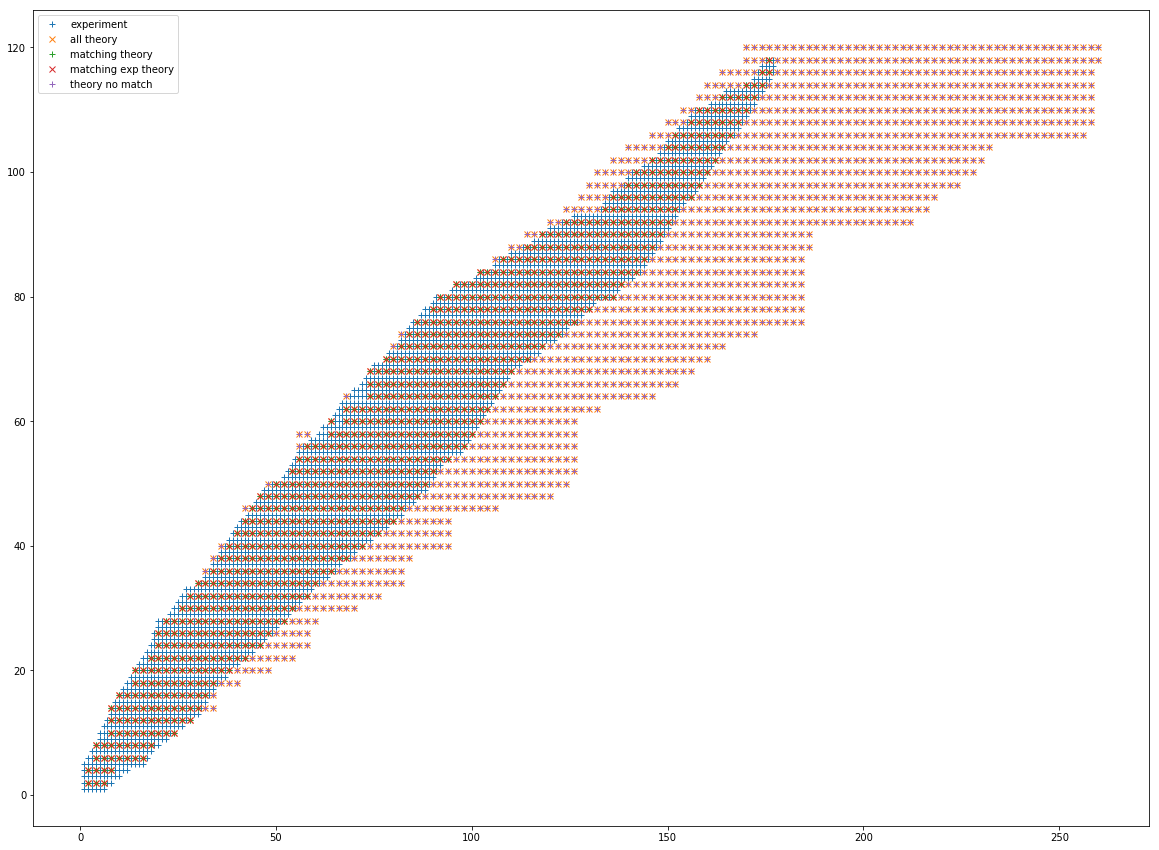

In [142]:
plt.plot(e_df.ix[:,"N"],e_df.ix[:,"Z"],"+", label="experiment")
plt.plot(df.ix[:,"N"],df.ix[:,"Z"],"x", label="all theory")
plt.plot(match_df.ix[:,"N"],match_df.ix[:,"Z"],"+", label="matching theory")
plt.plot(match_e_df.ix[:,"N"],match_e_df.ix[:,"Z"],"x", label="matching exp theory")
plt.plot(no_match_df.ix[:,"N"],no_match_df.ix[:,"Z"],"+", label="theory no match")
plt.legend()
plt.show()

Z


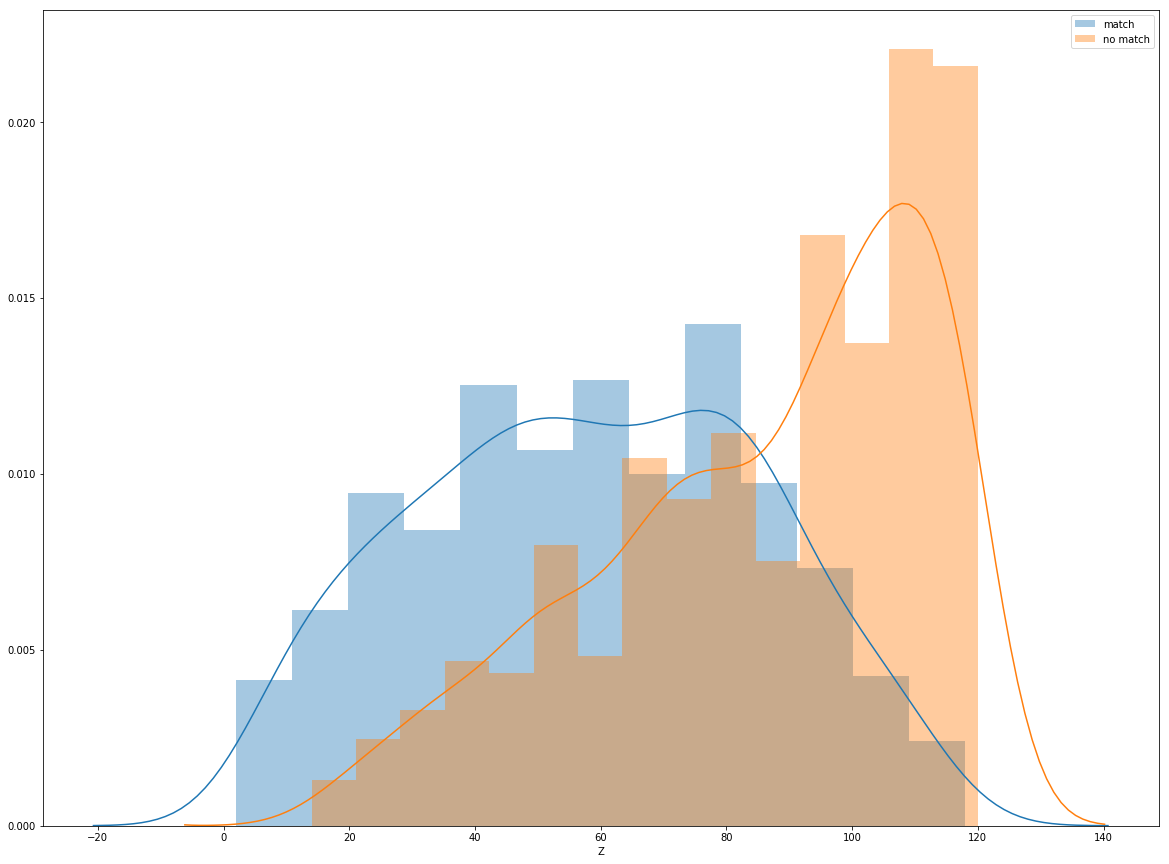




N


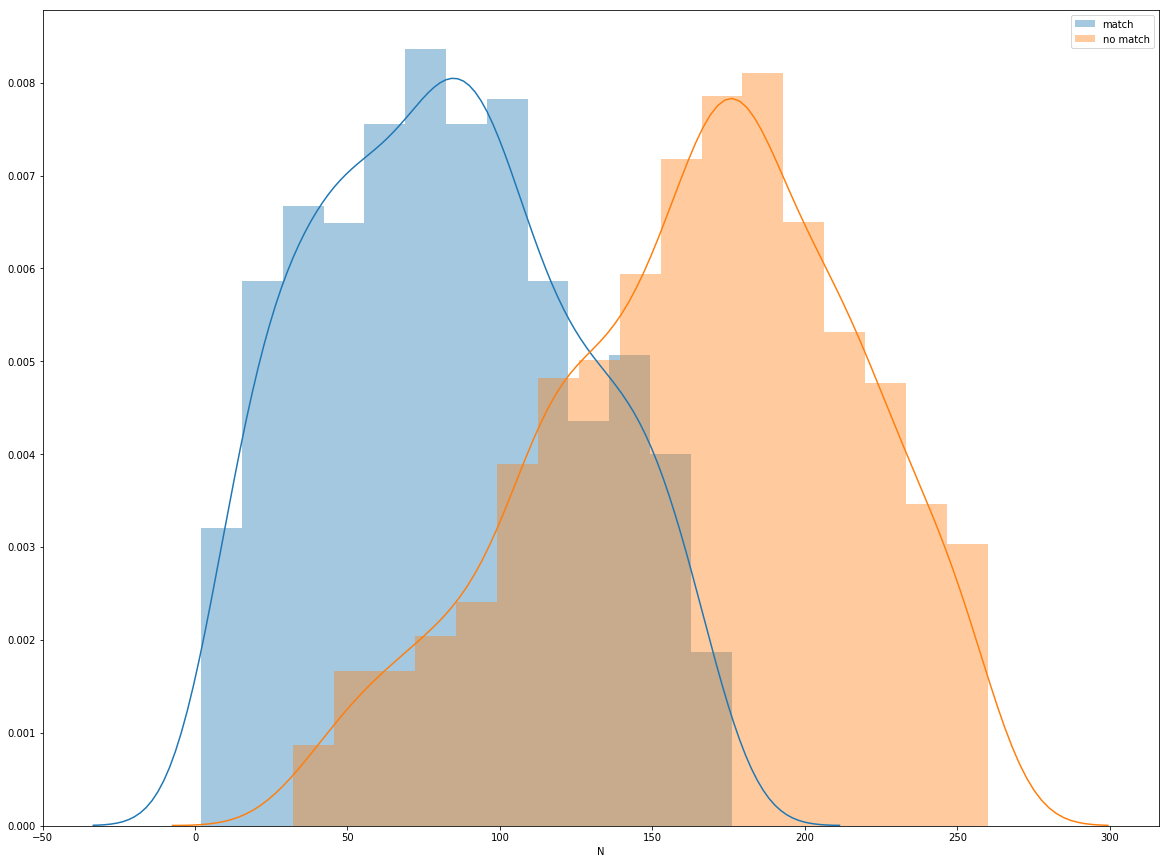




Energy


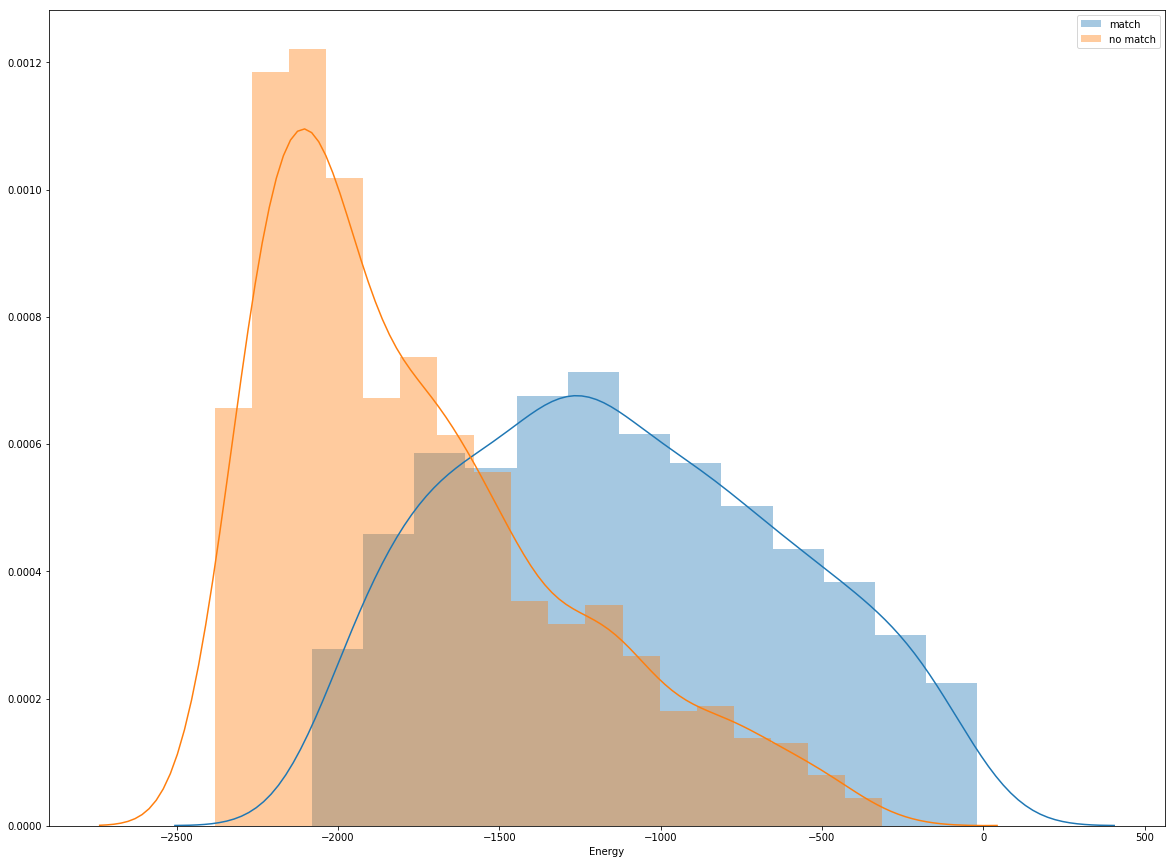




NShells


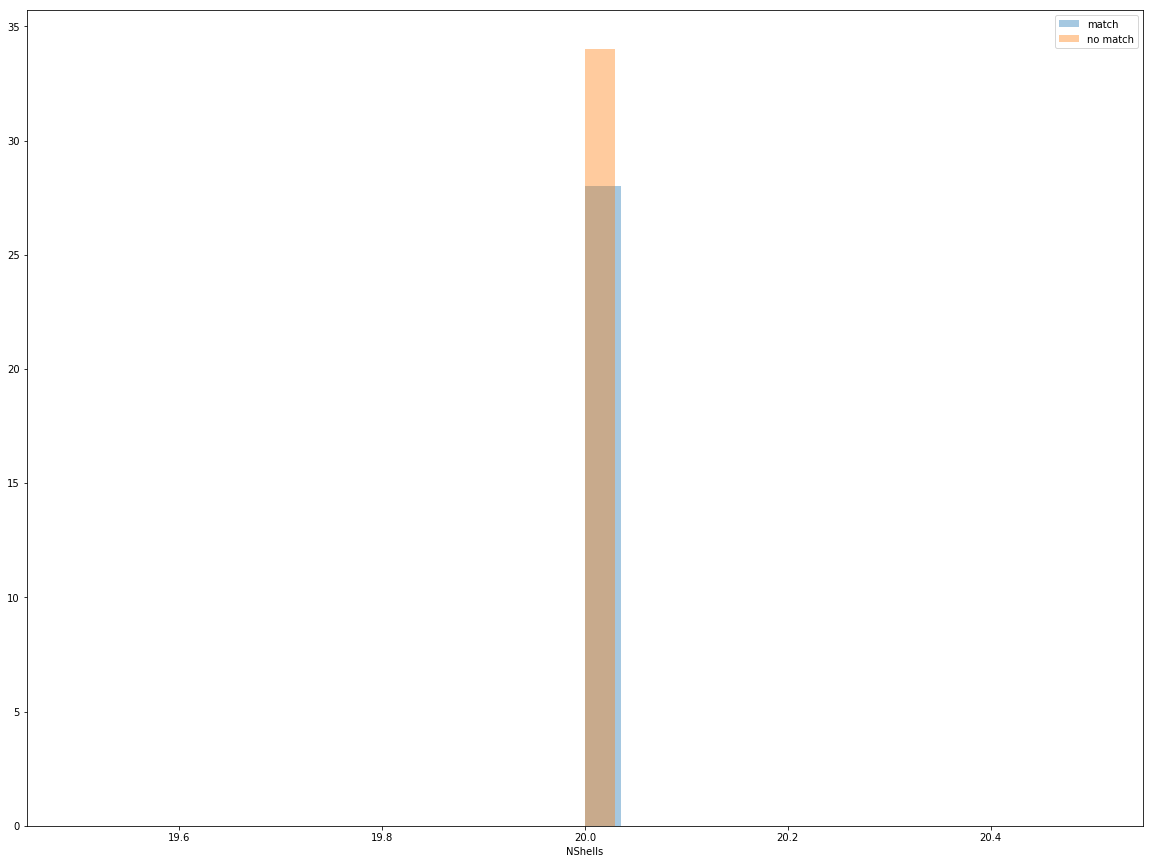




b0


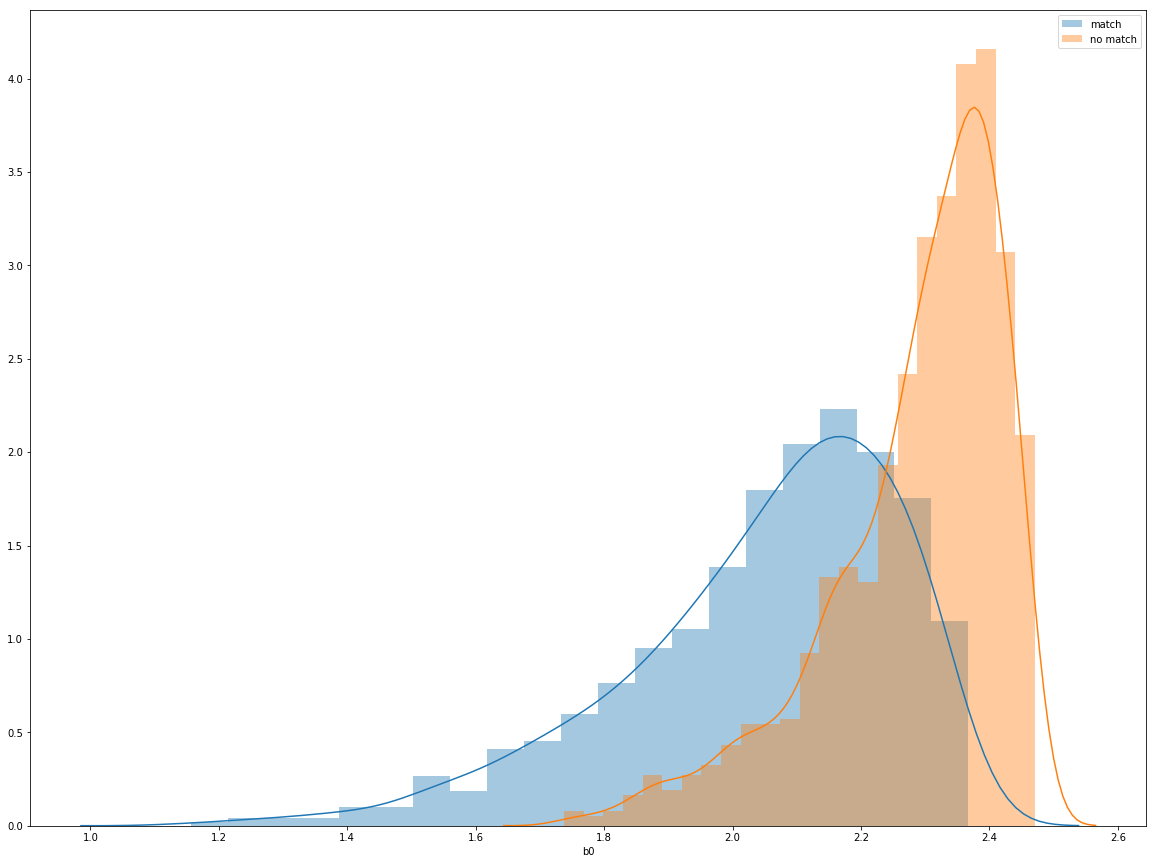




bz


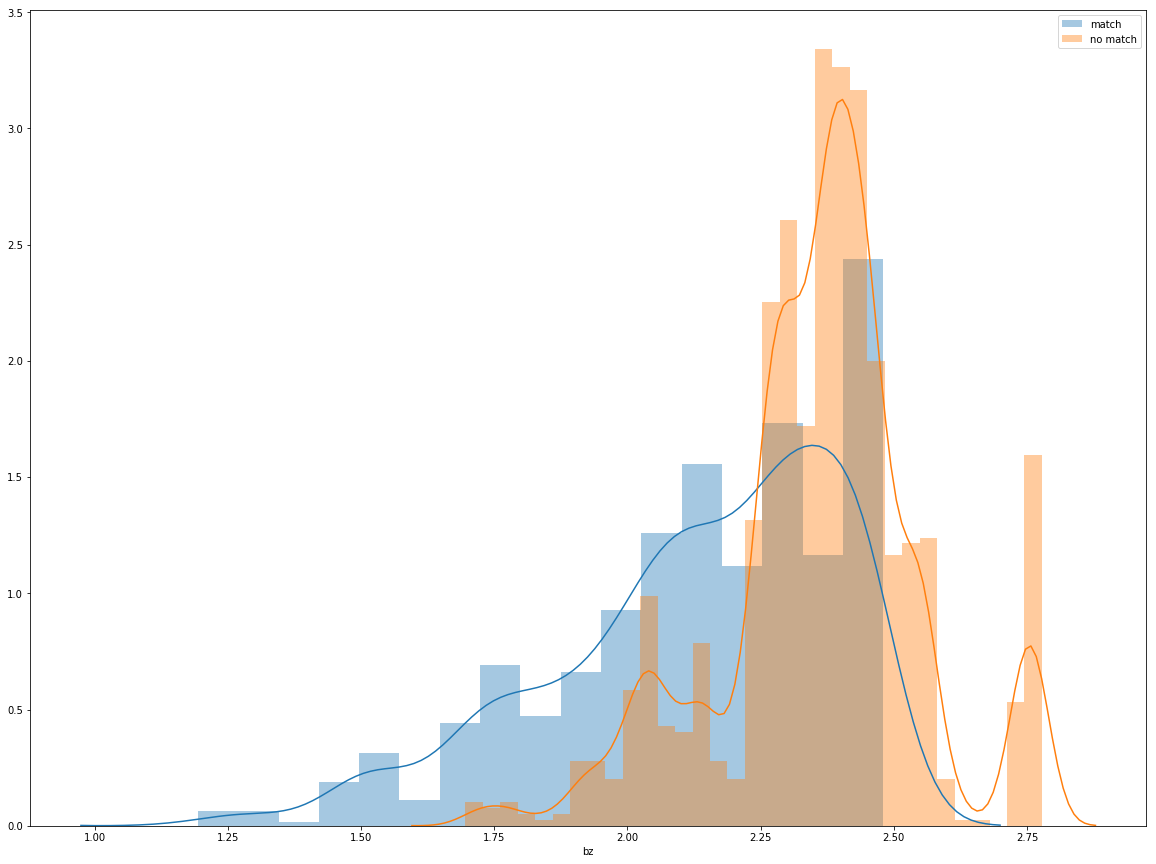




bp


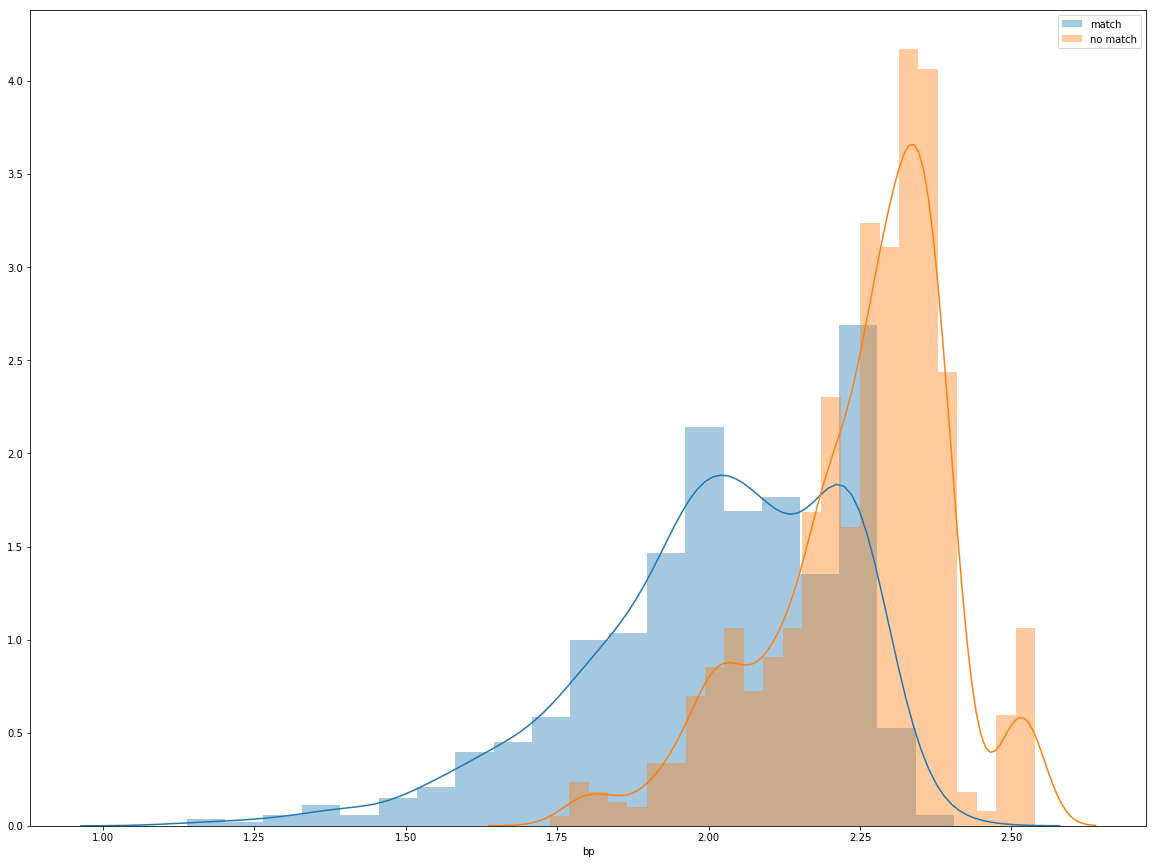




lambda_n


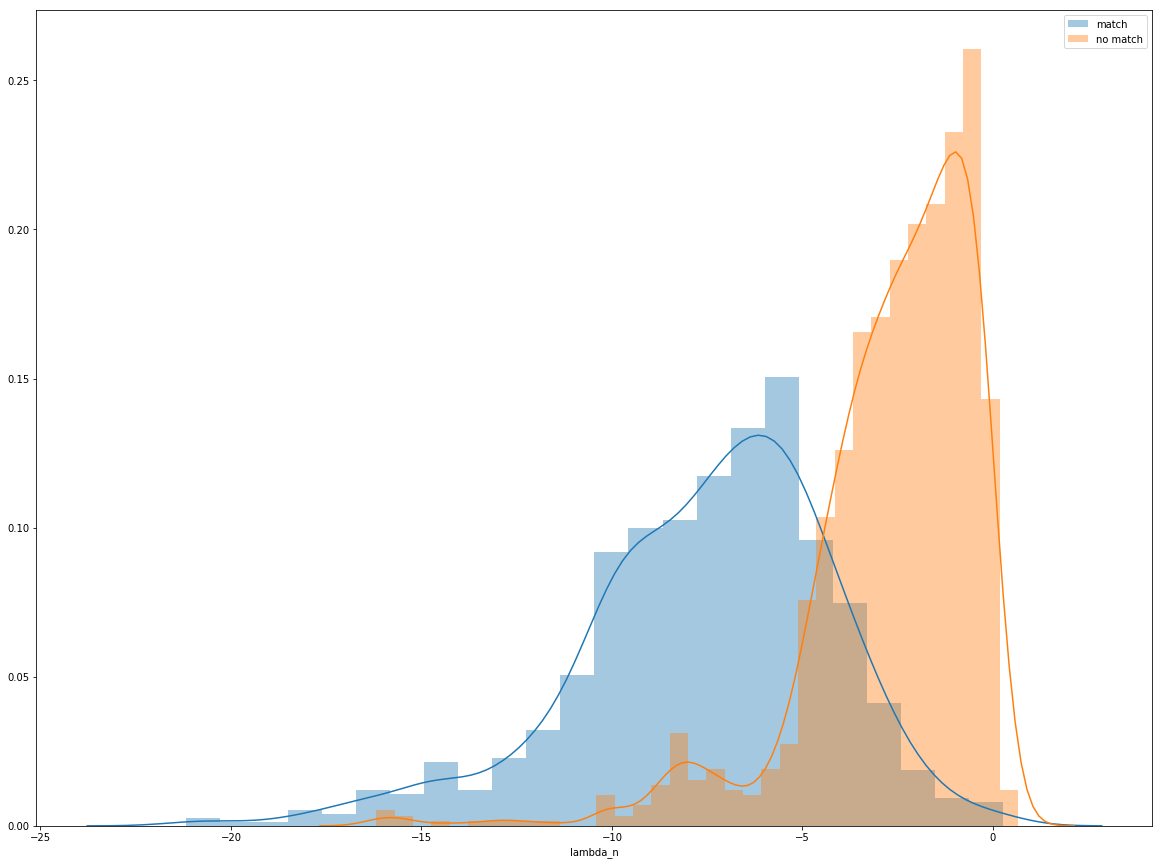




lambda_p


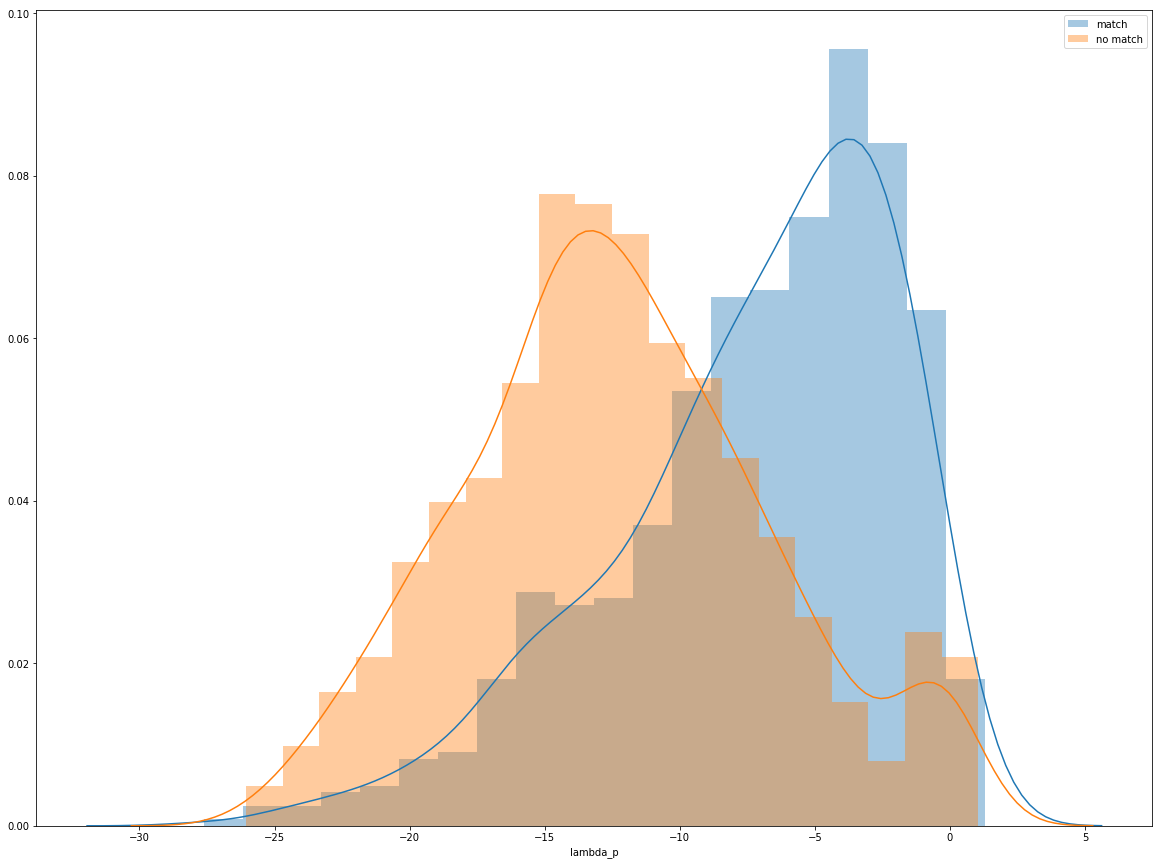




Lambda_n


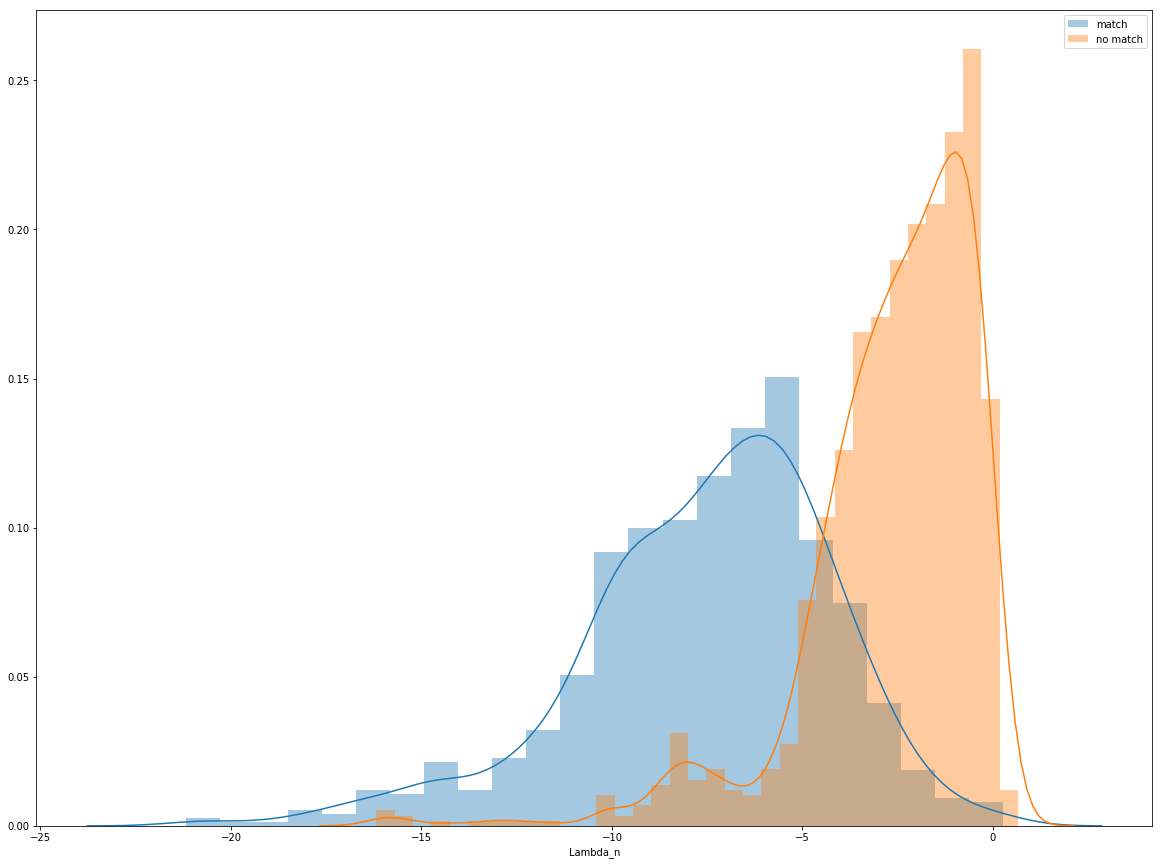




Lambda_p


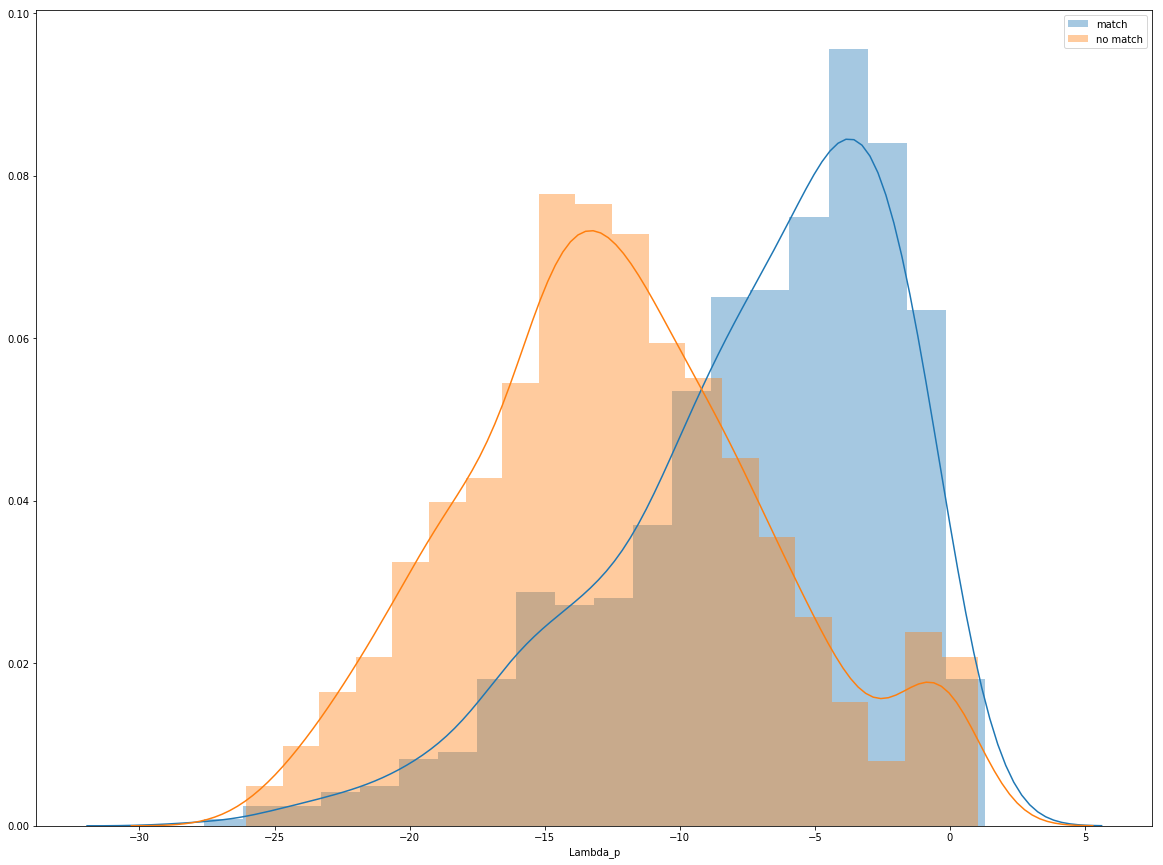




delta_n


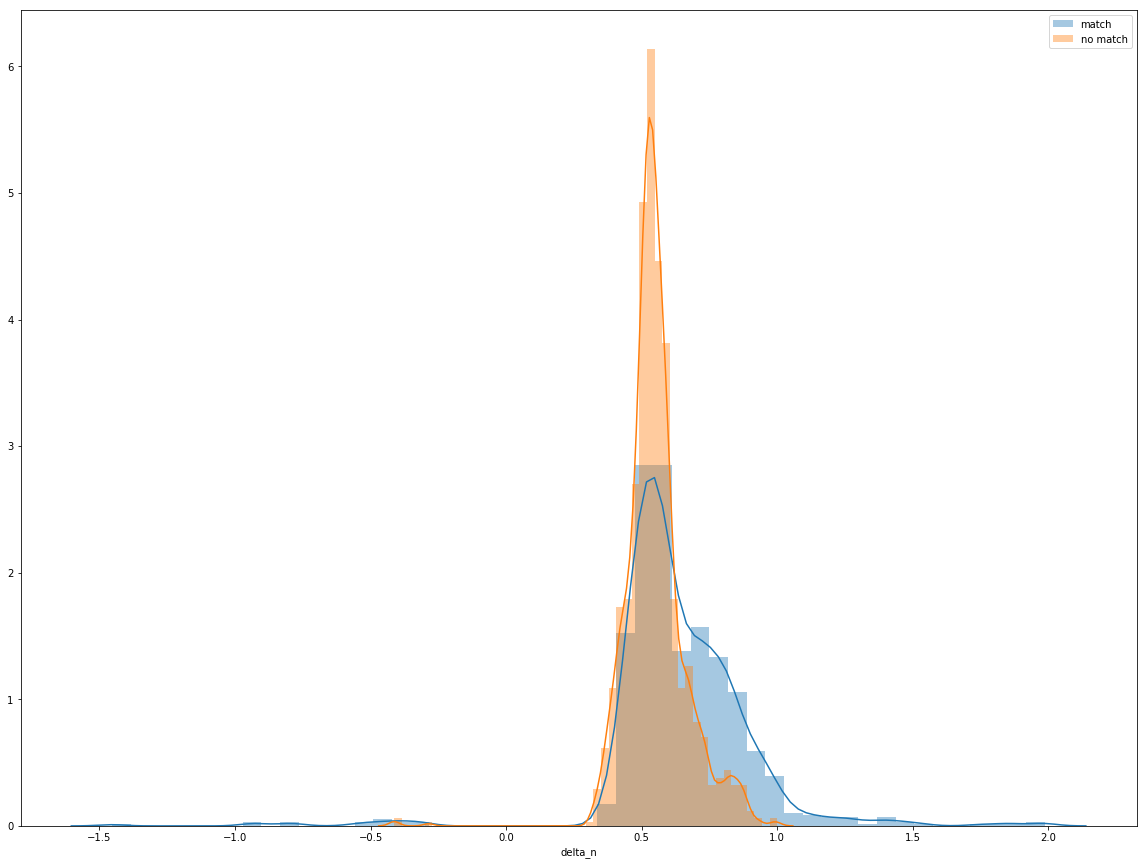




delta_p


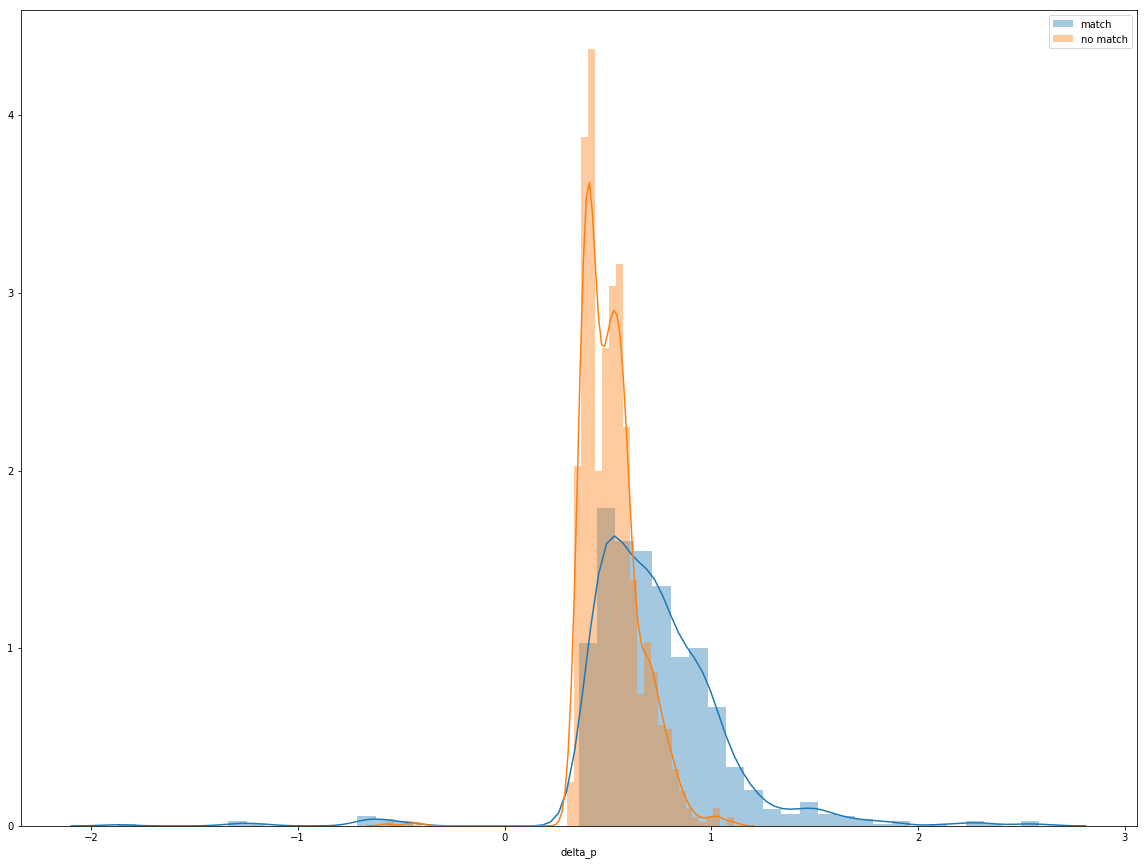




pwi


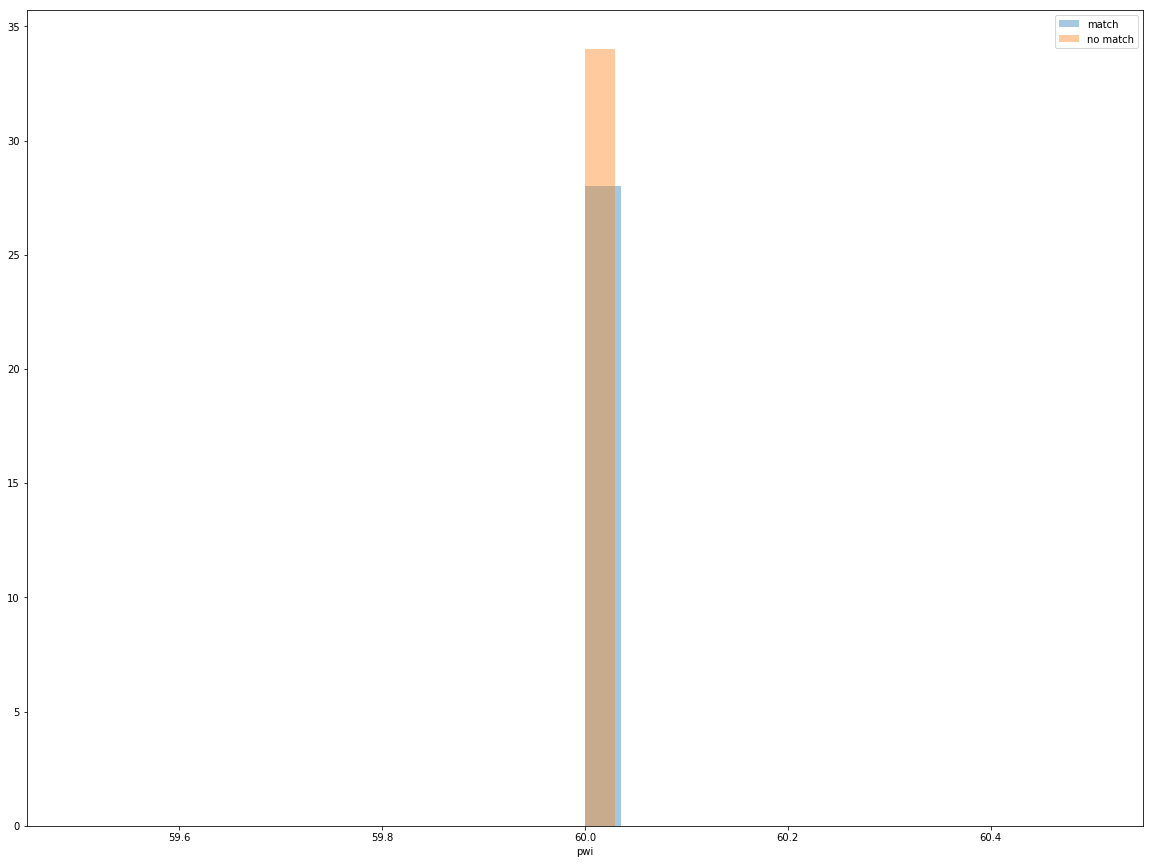




pairingE_n


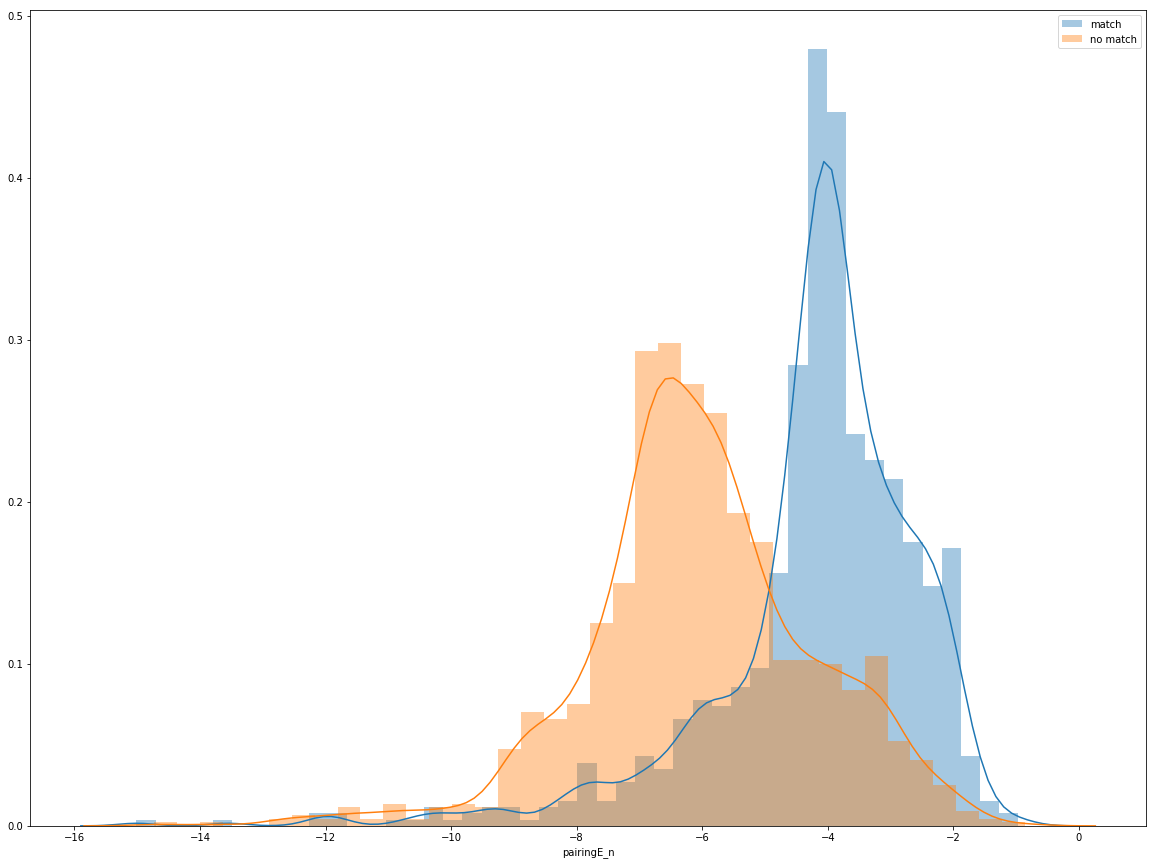




pairingE_p


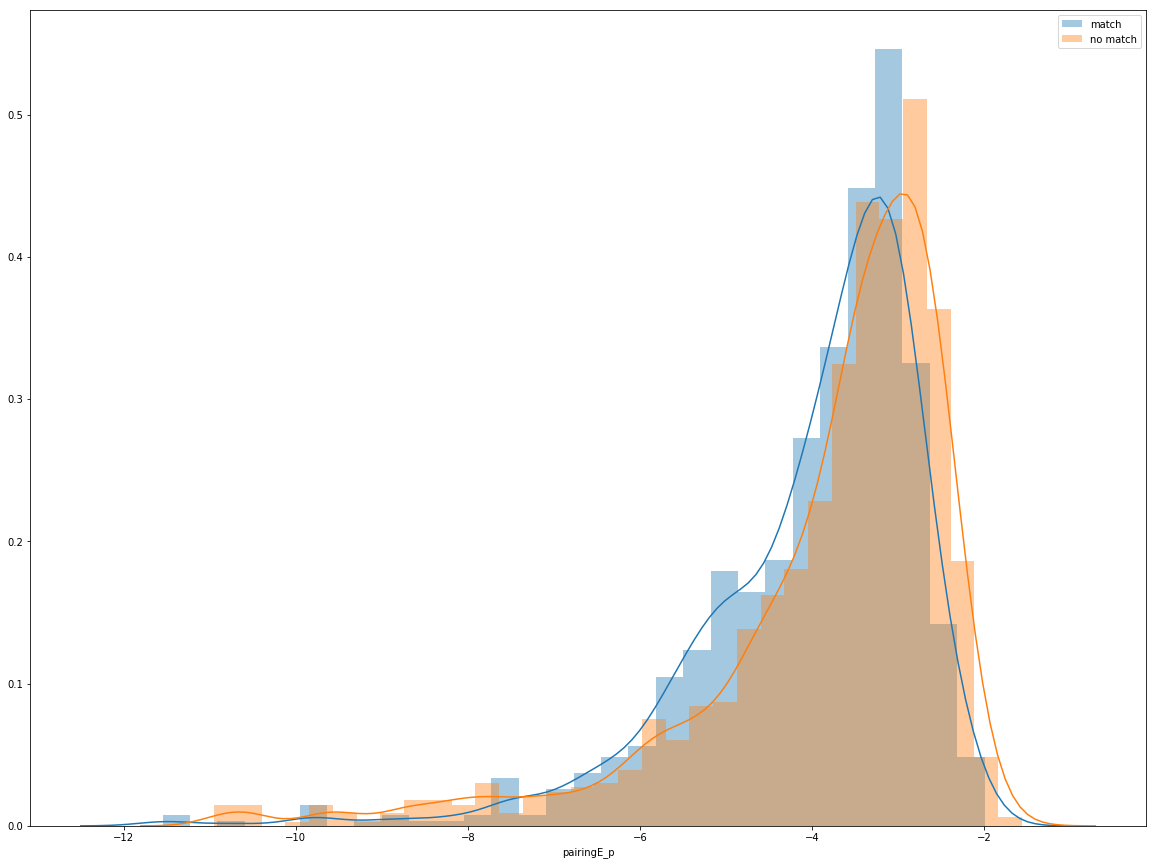




LNlambda_n


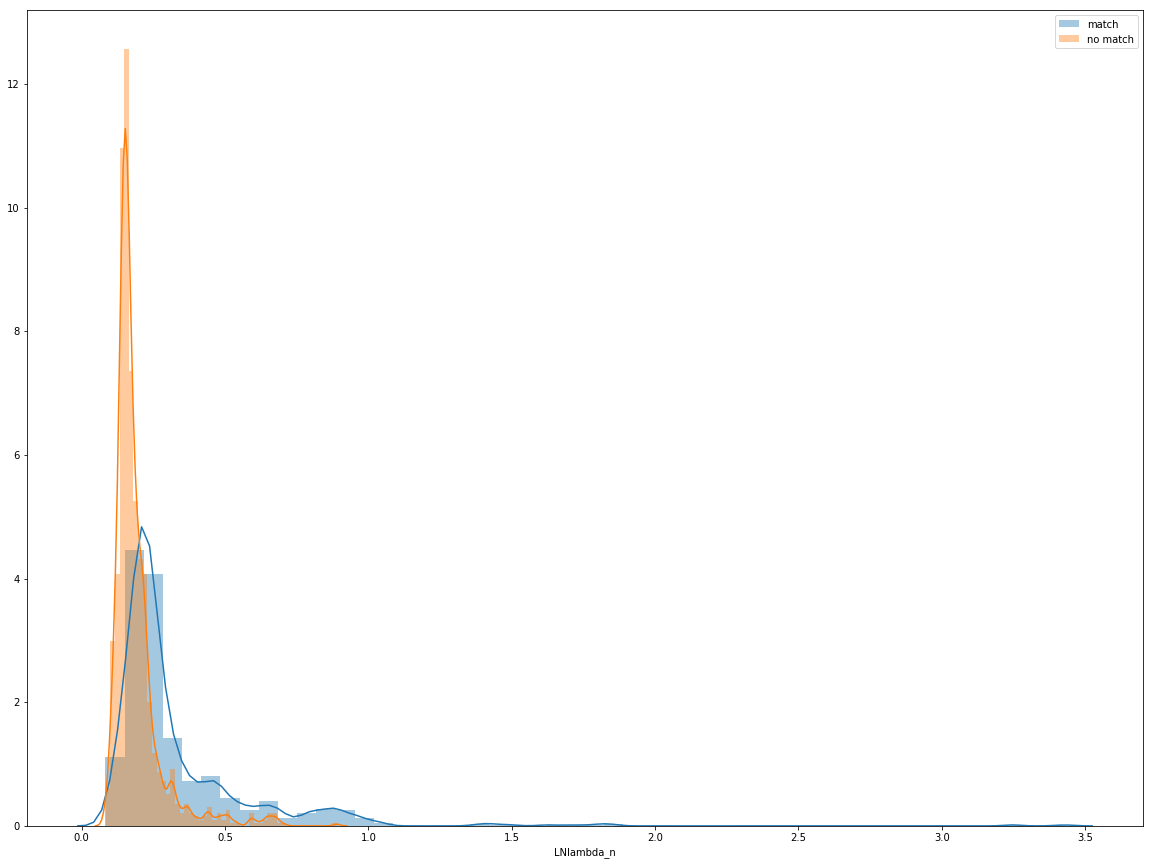




LNlambda_p


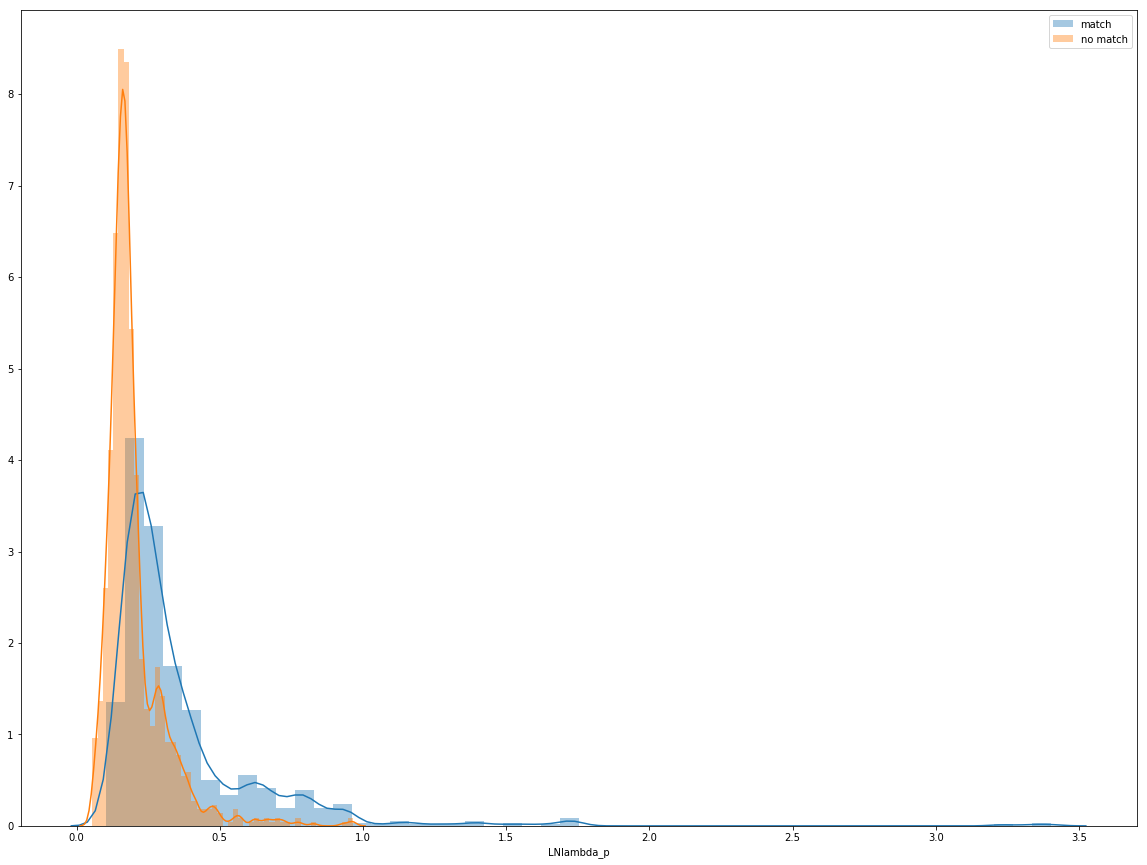




LNEnergy_n


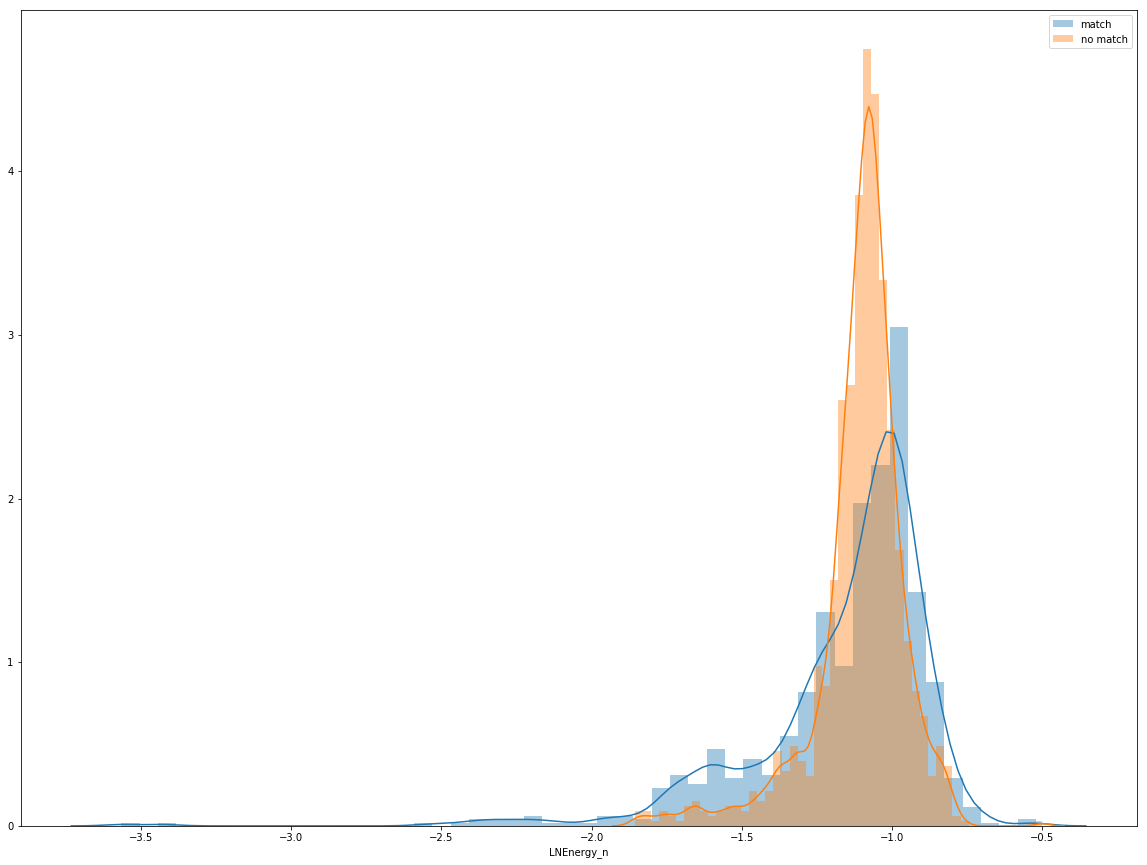




LNEnergy_p


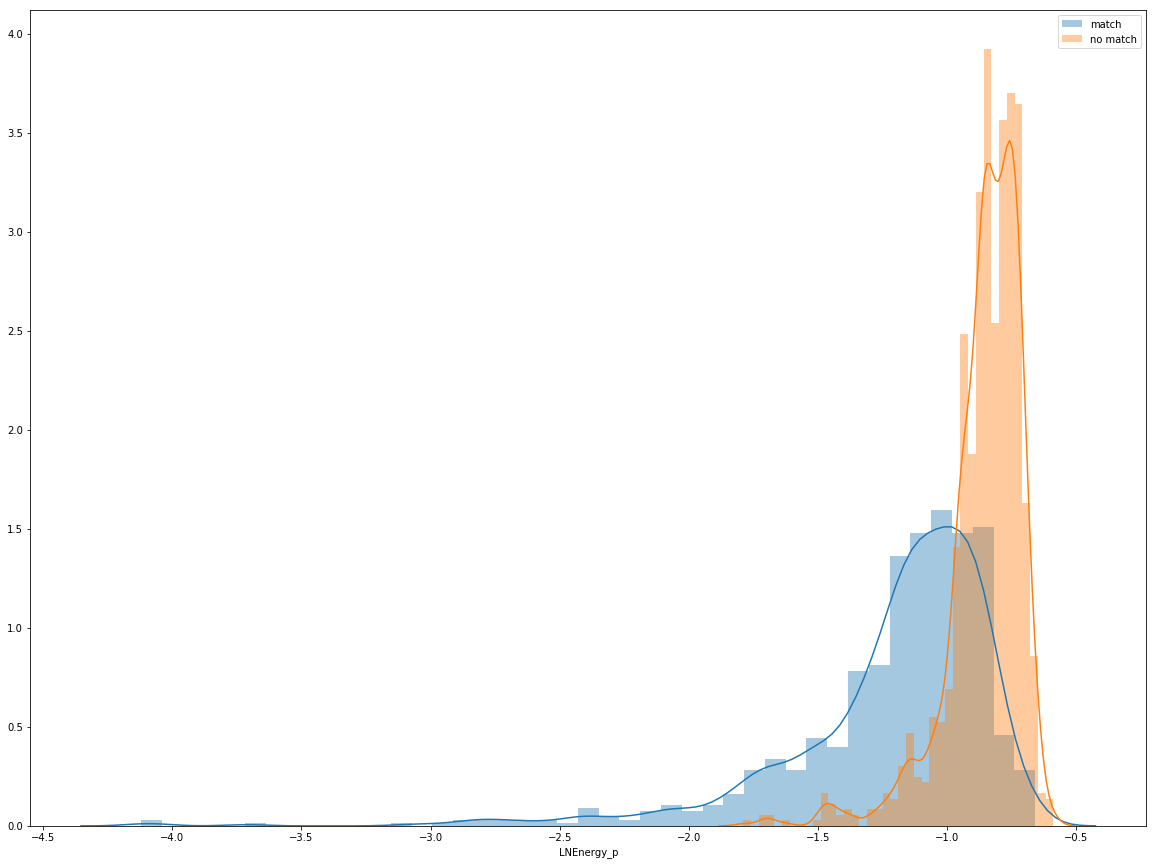




LNdelta_n


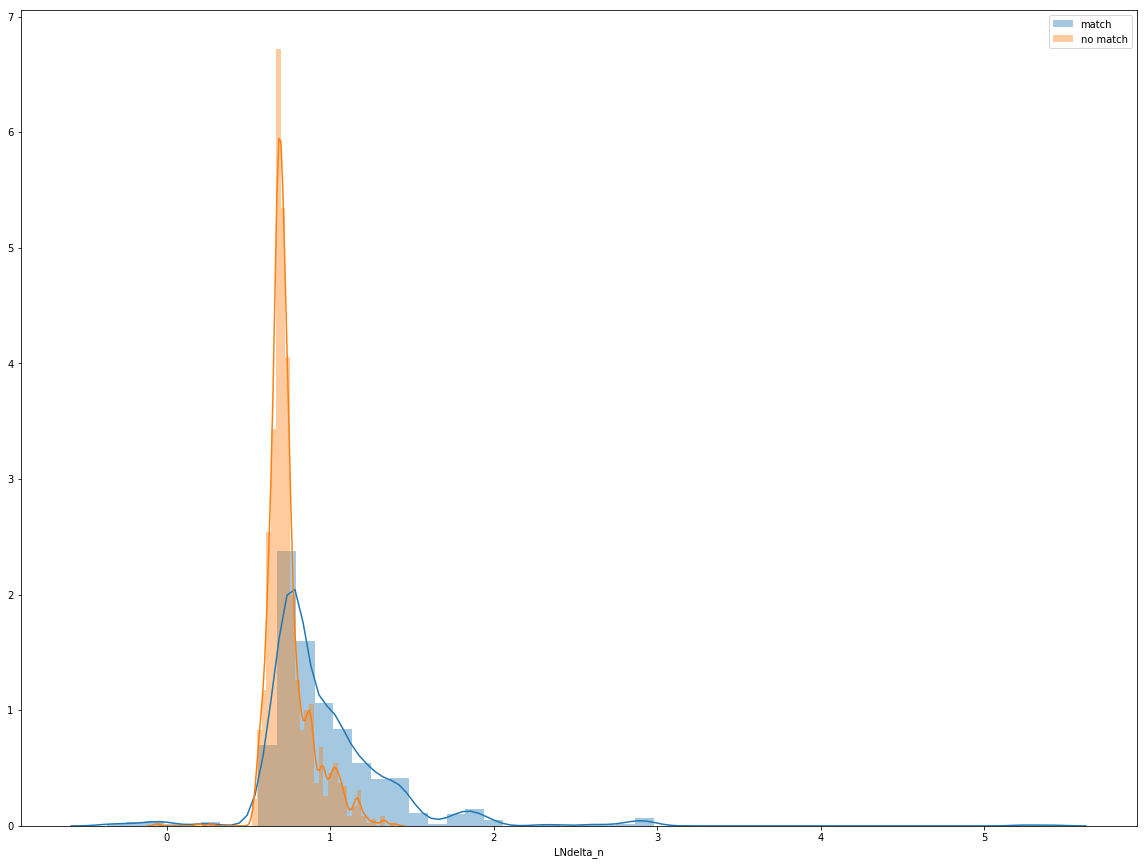




LNdelta_p


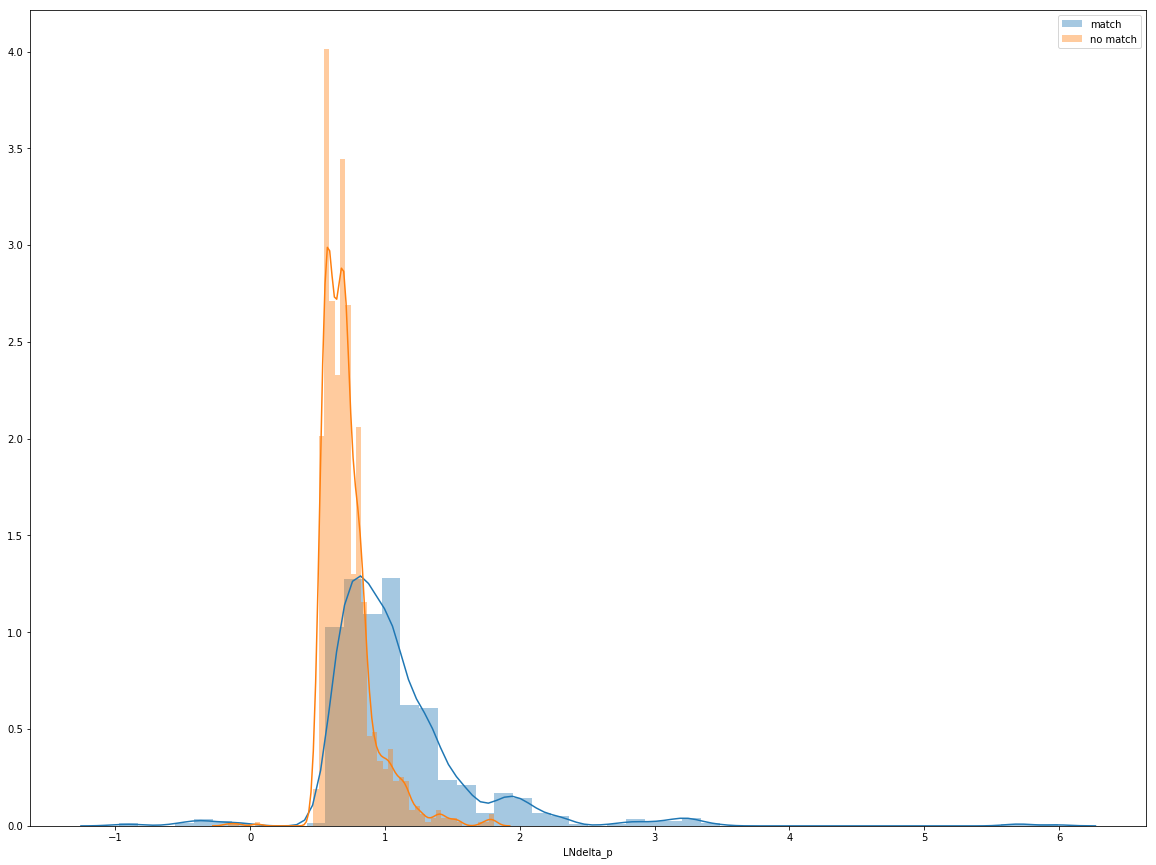




Geff_n


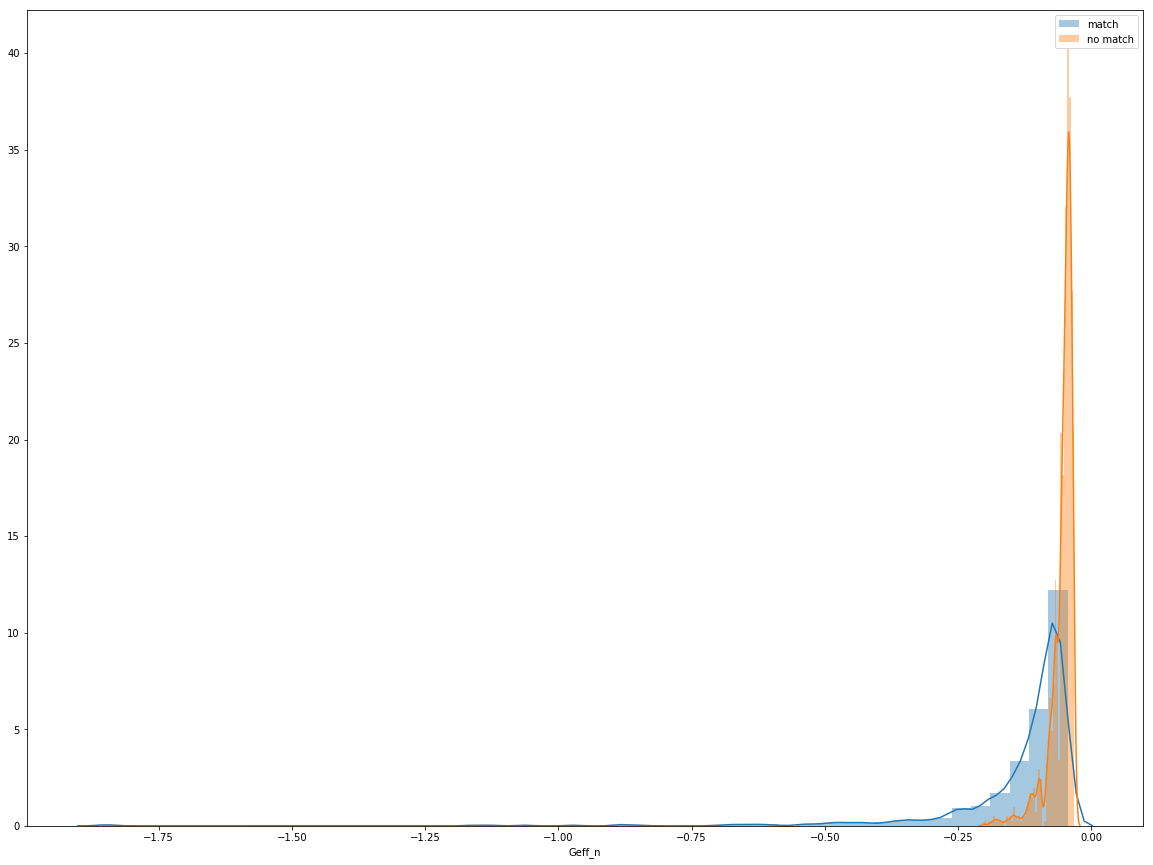




Geff_p


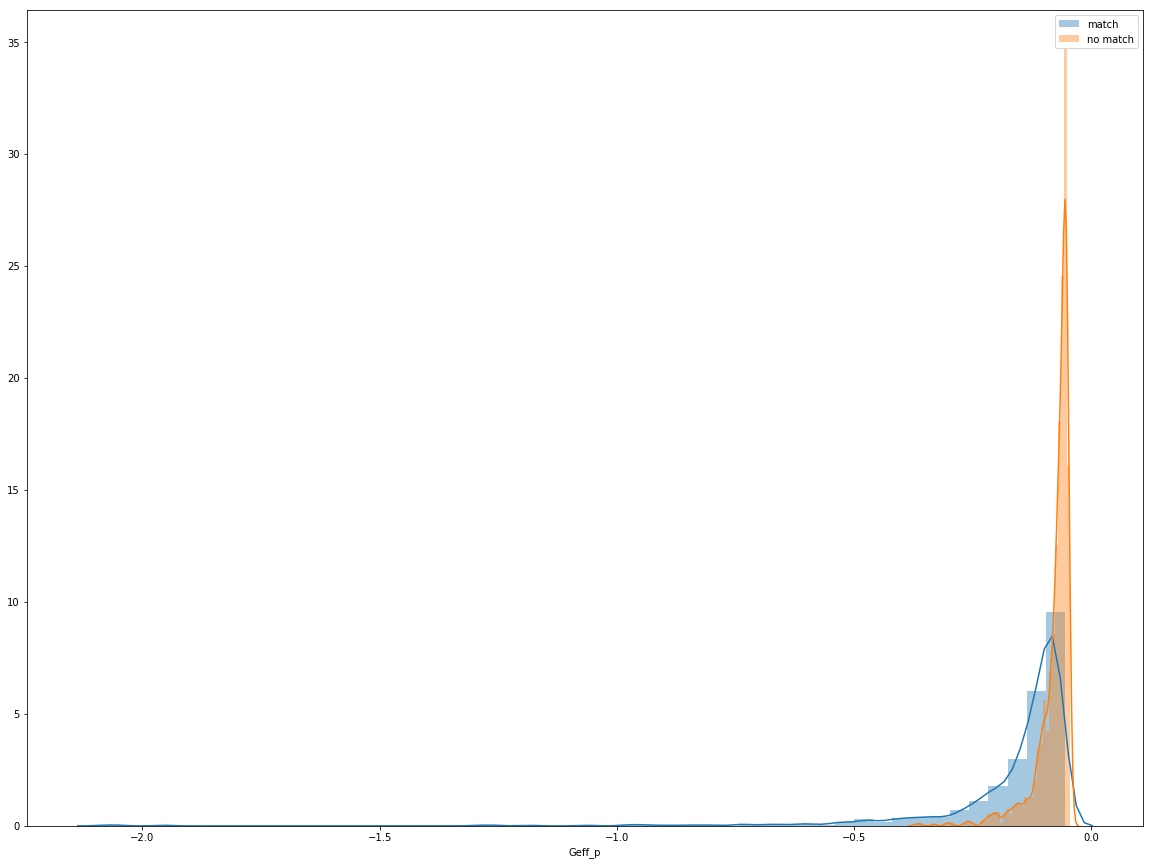




rms_r_n


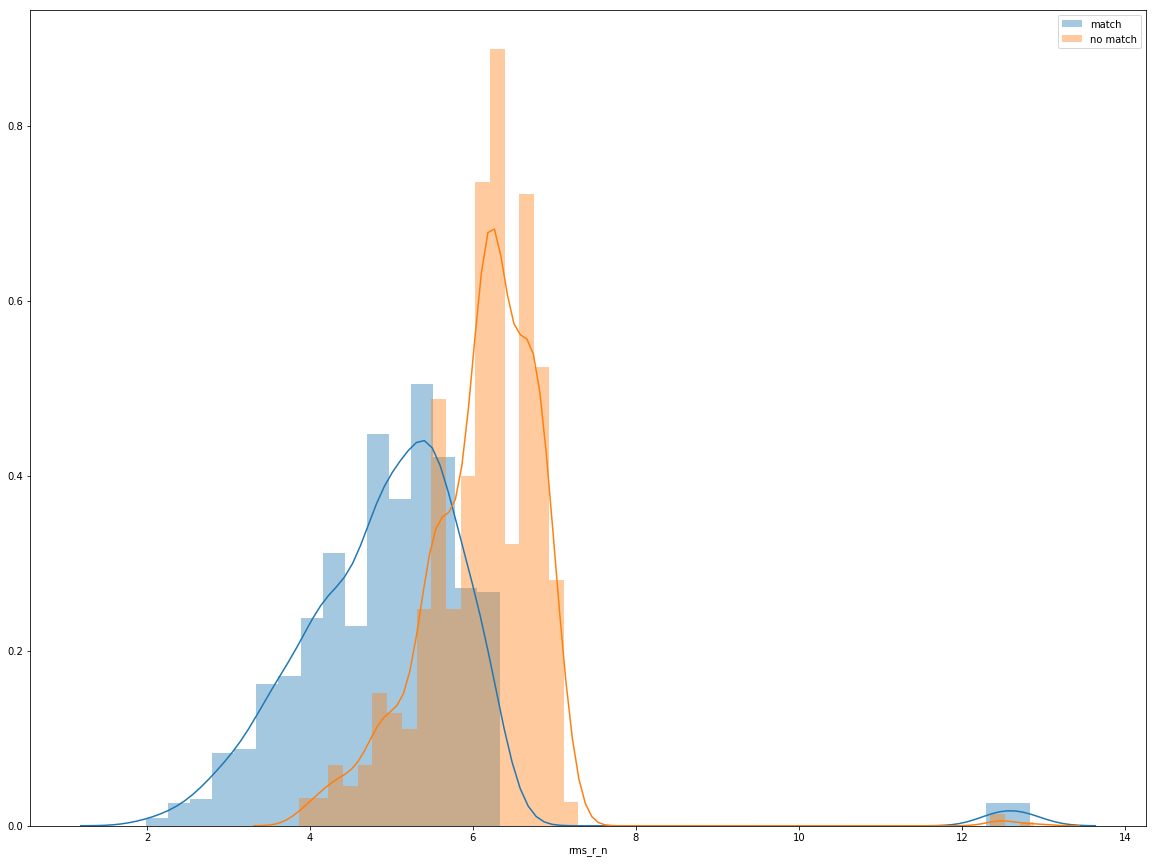




rms_r_p


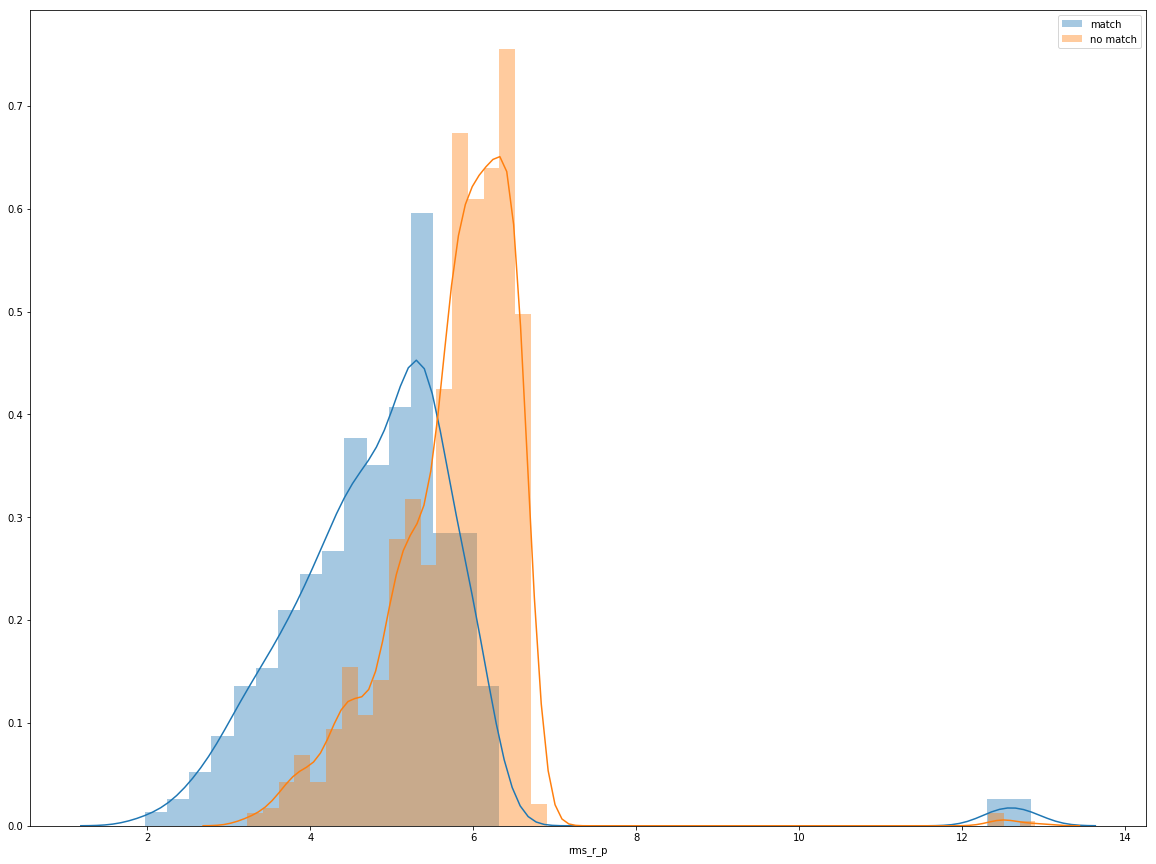




rms_r_t


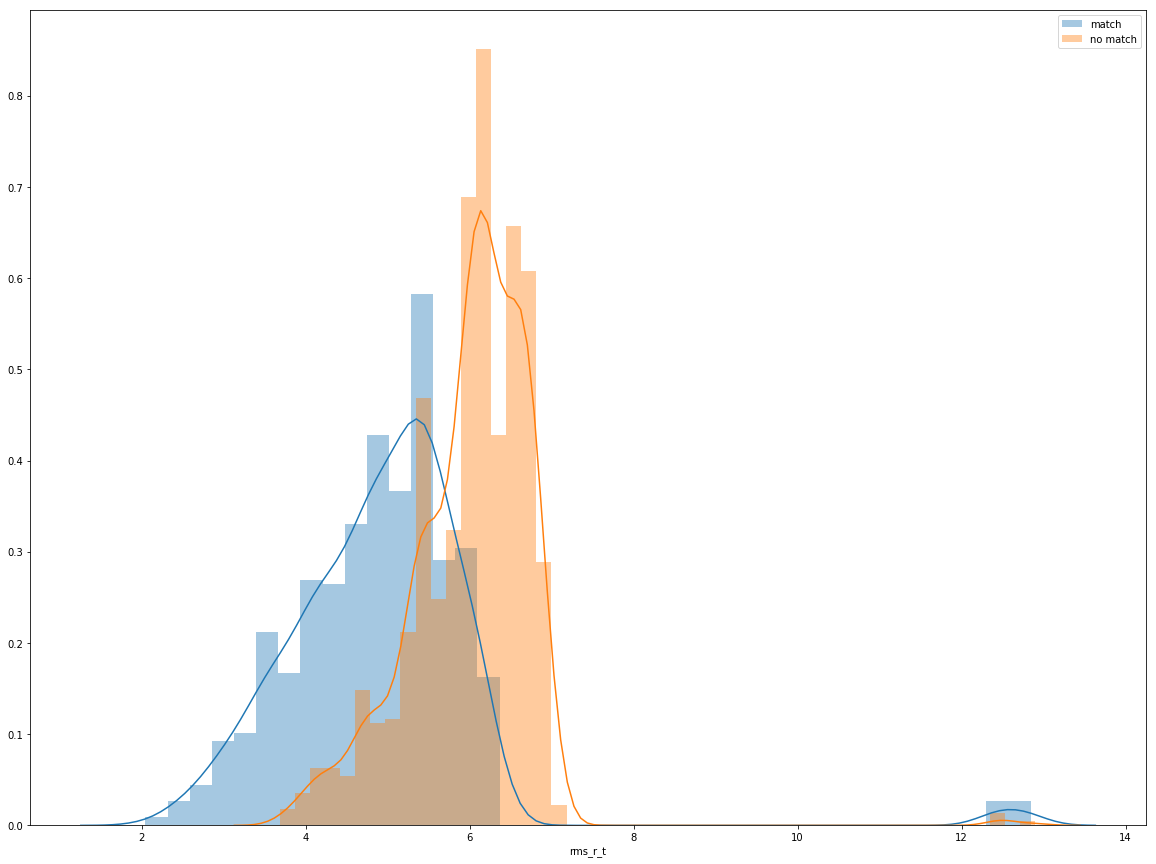




charge_r_p


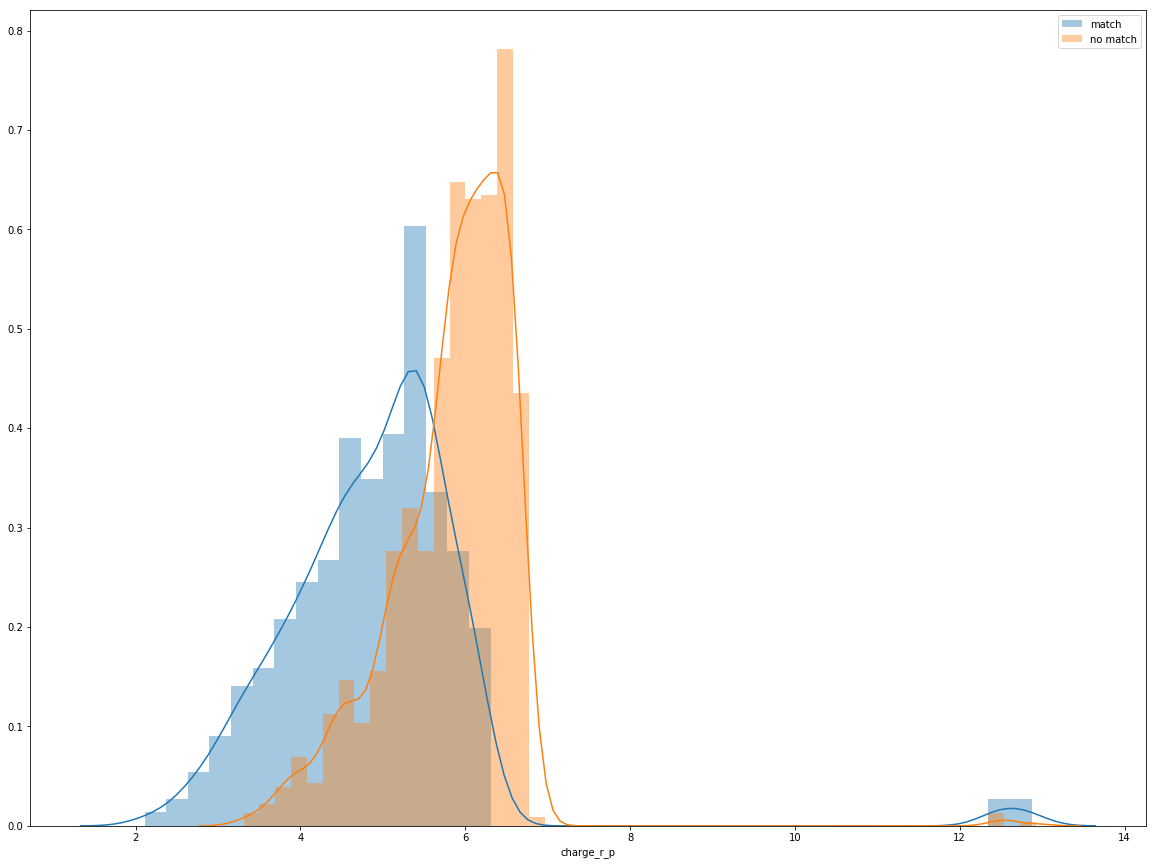




charge_r_t


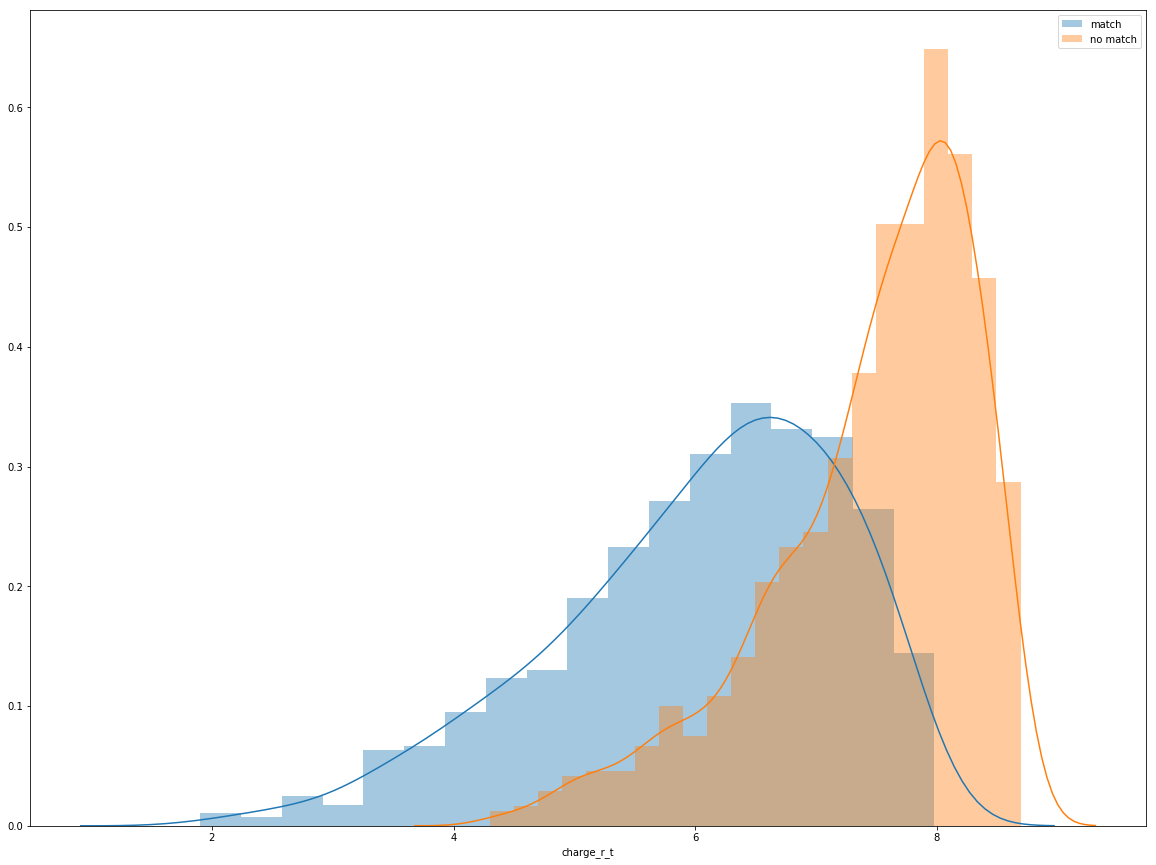




beta2_n


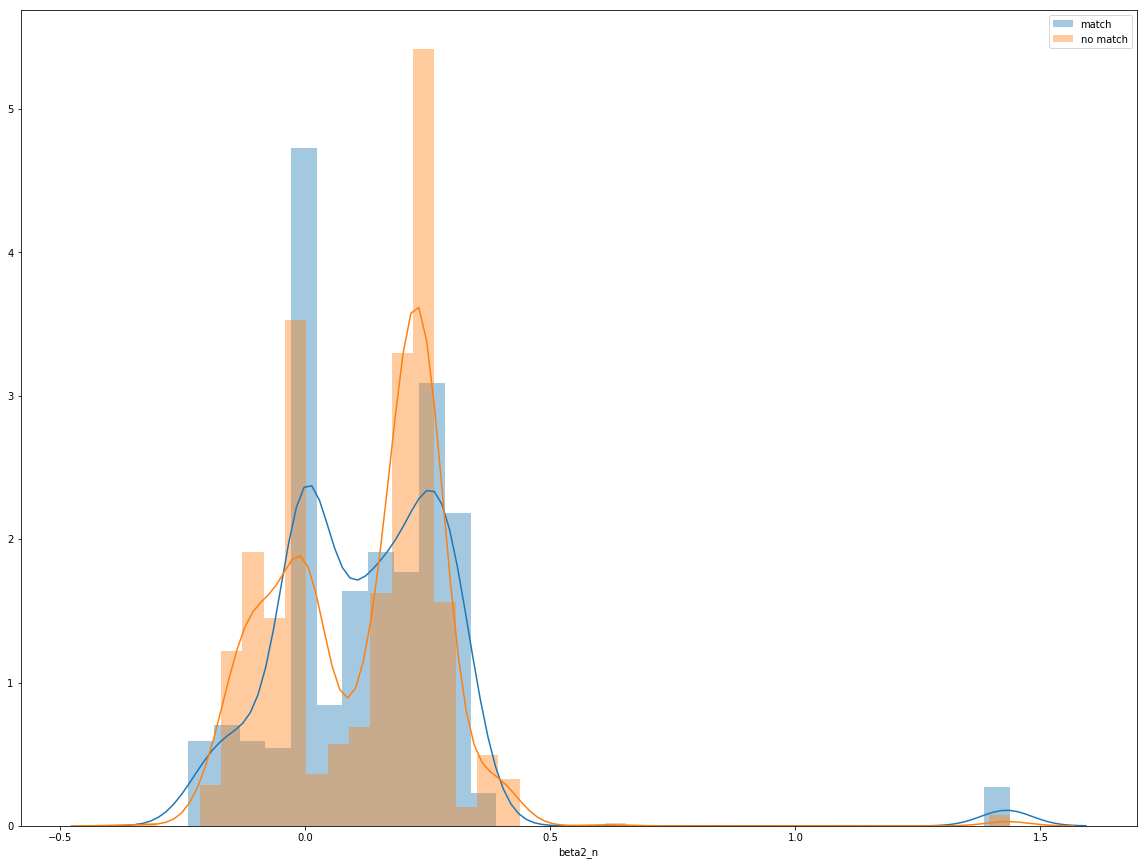




beta2_p


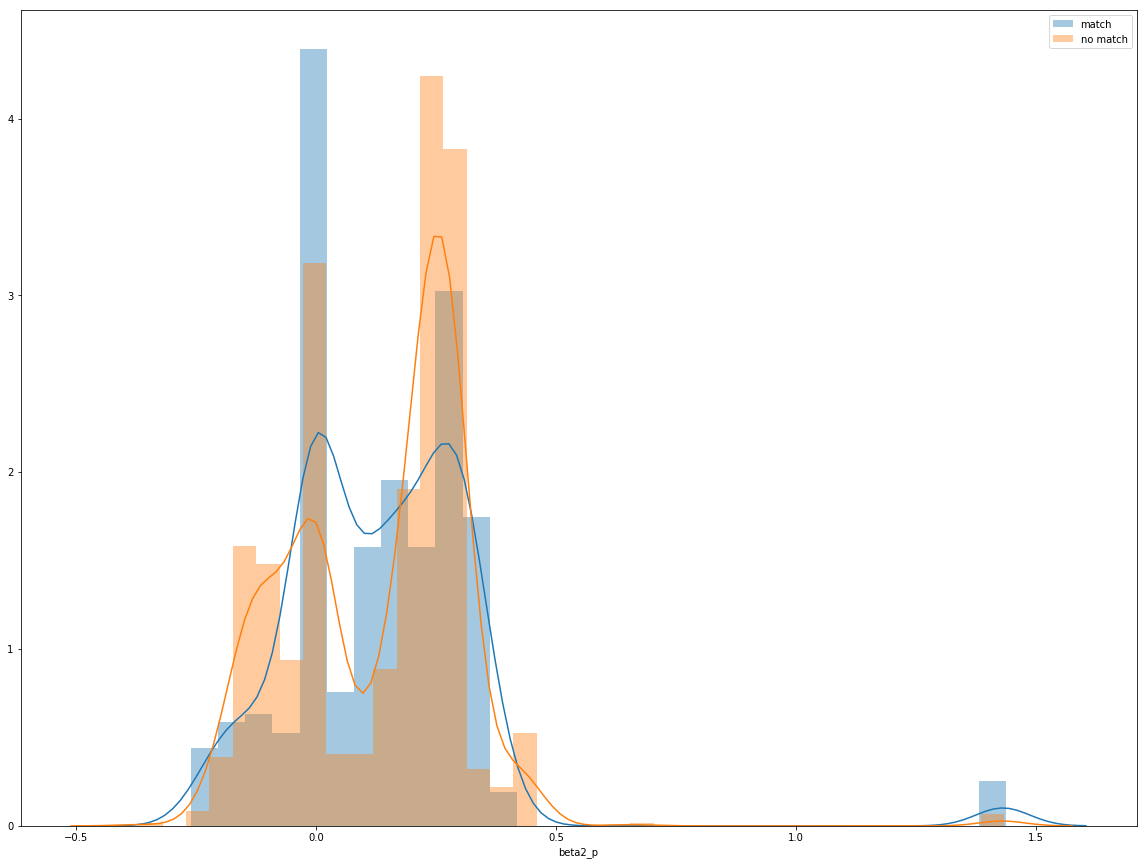




beta2_t


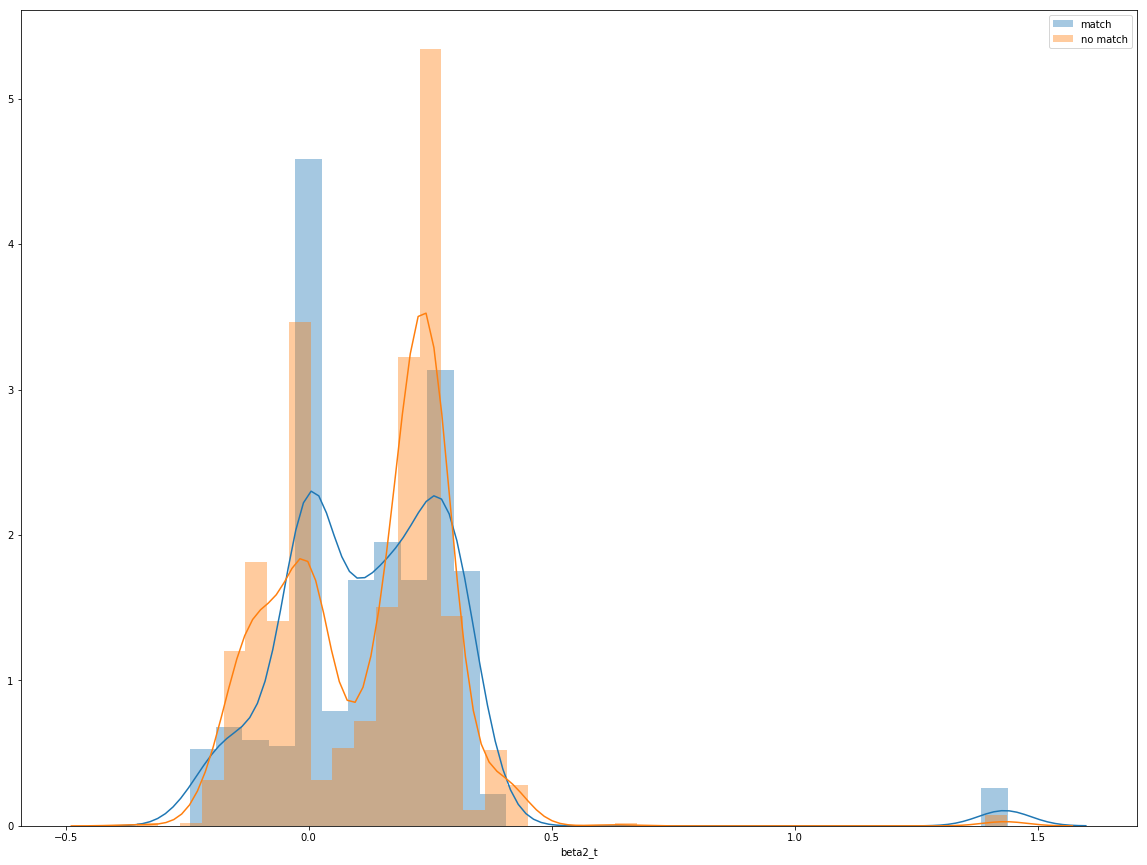




dipole_n


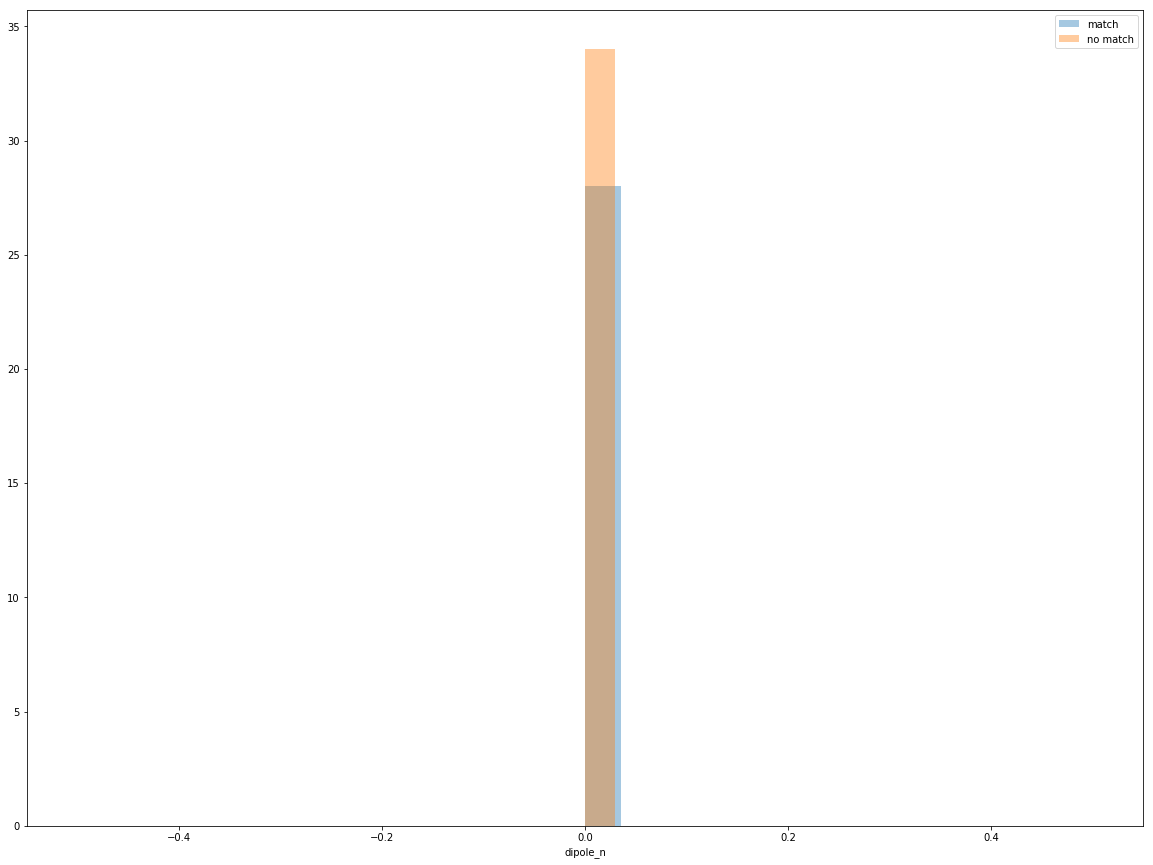




dipole_p


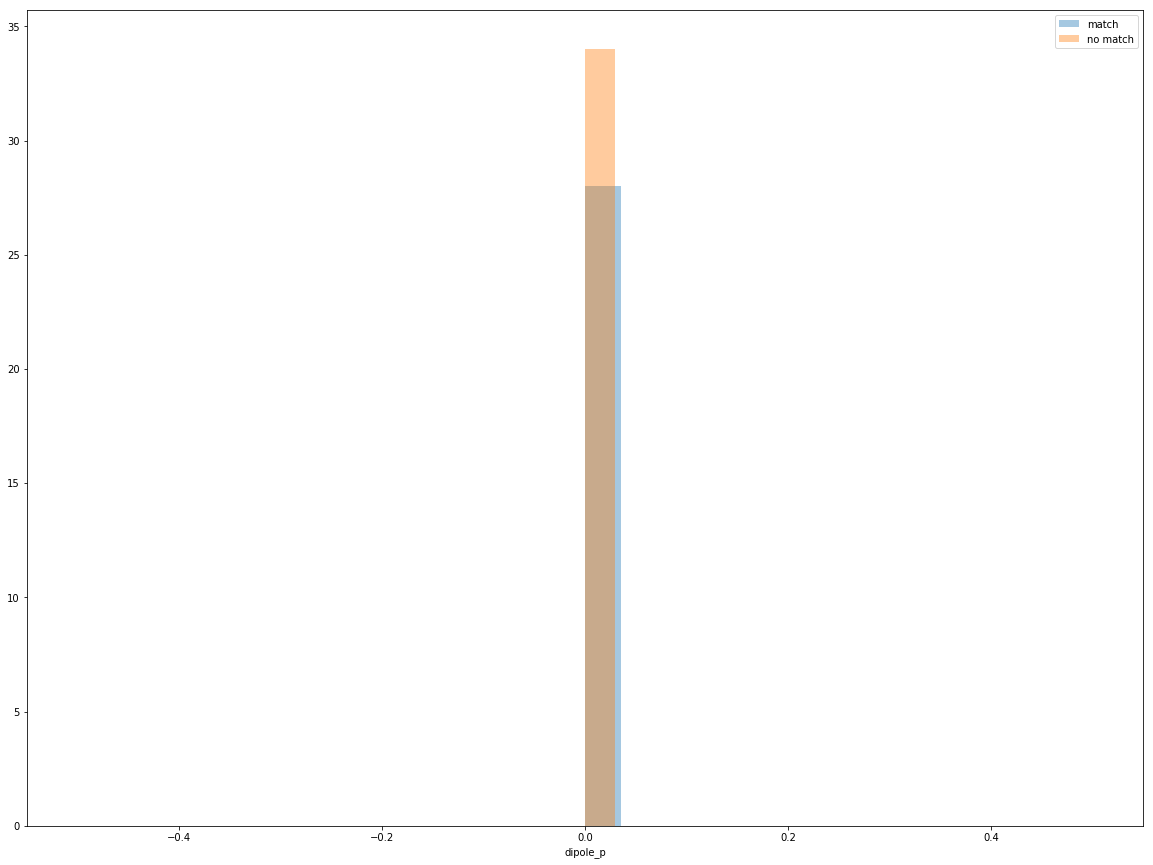




quadpole_n


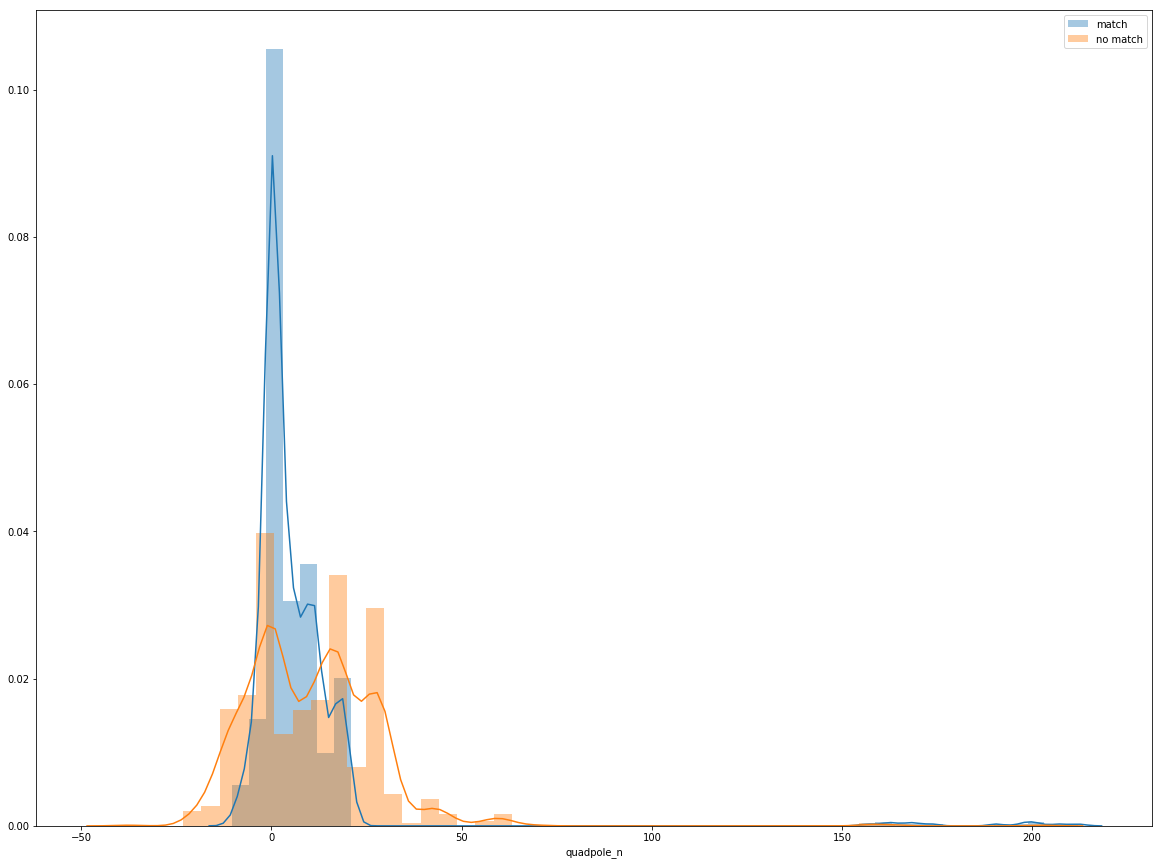




quadpole_p


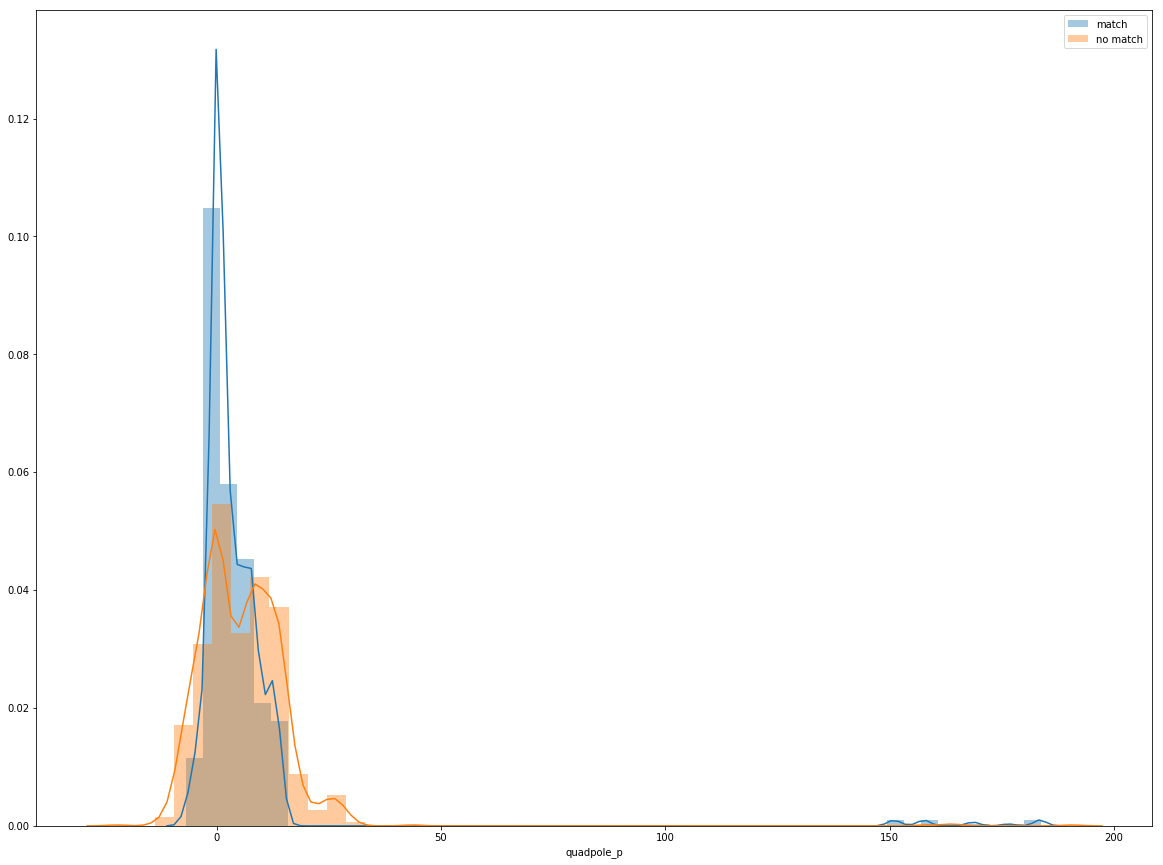




octpole_n


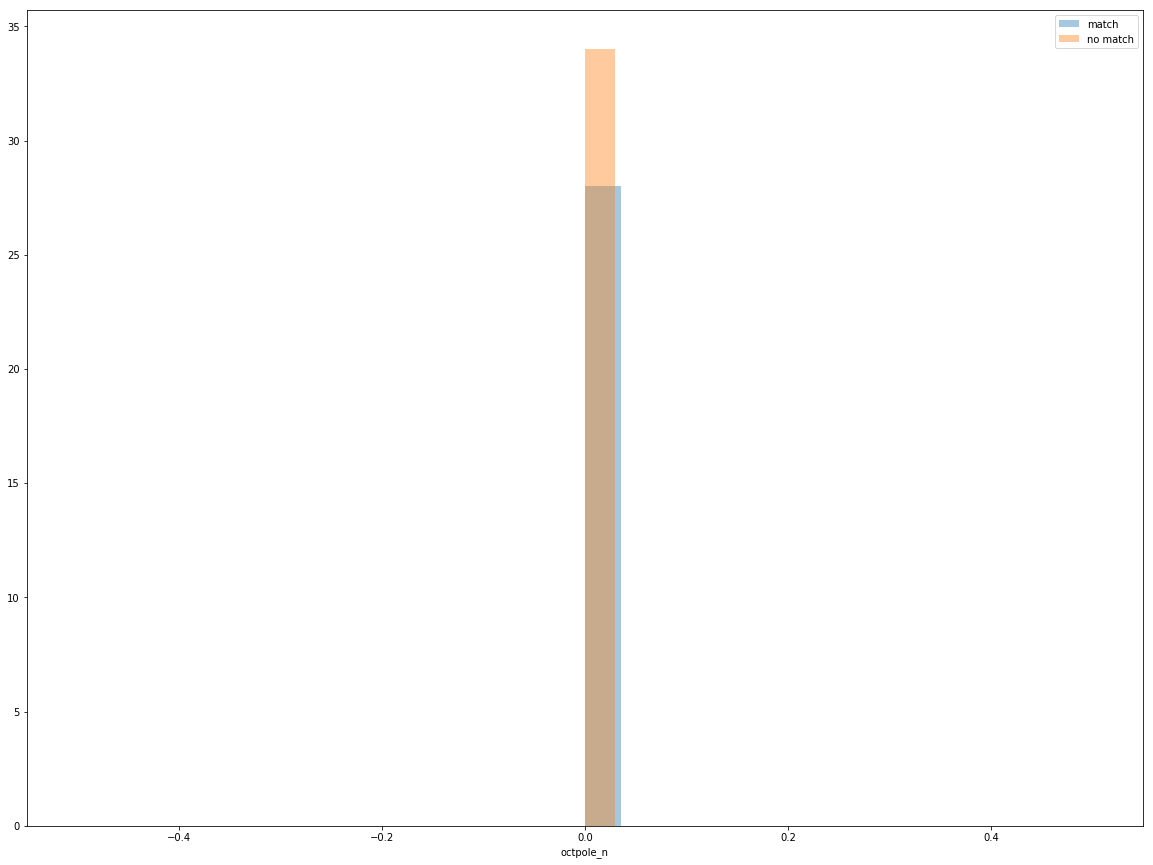




octpole_p


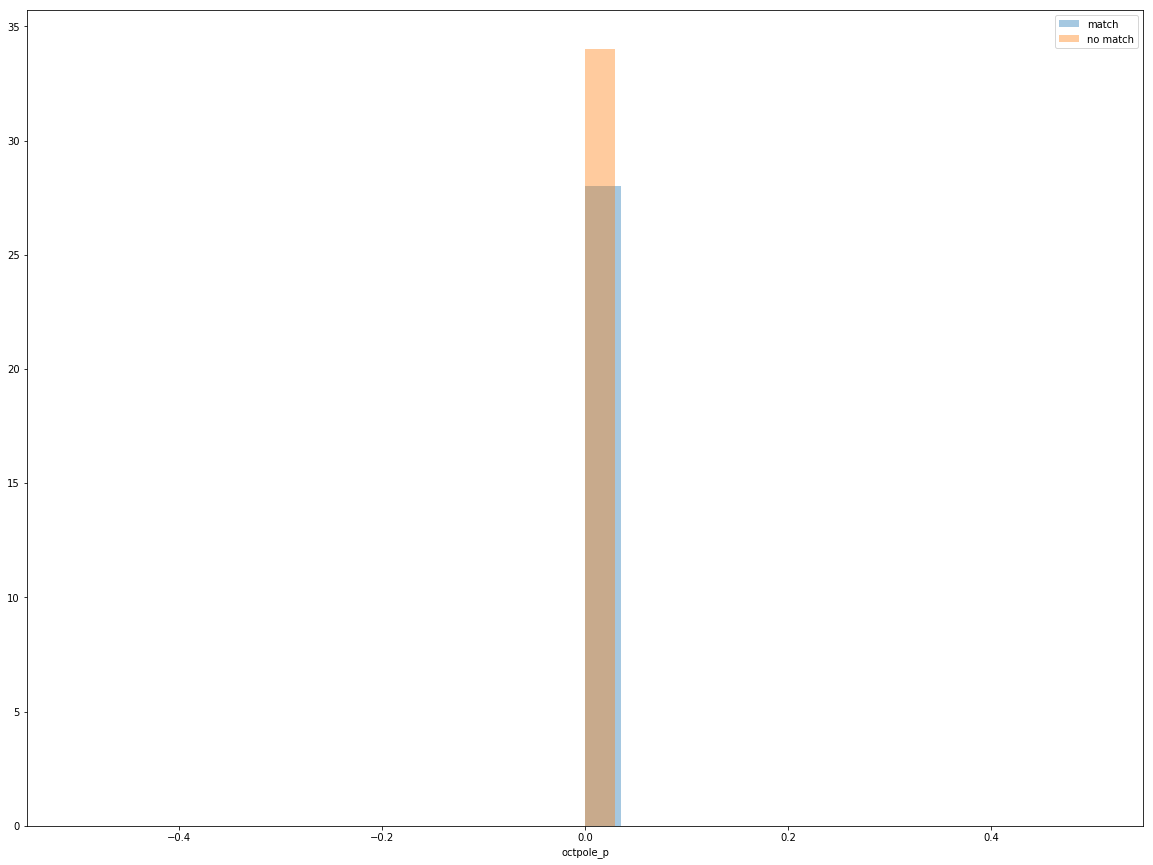




hexdpole_n


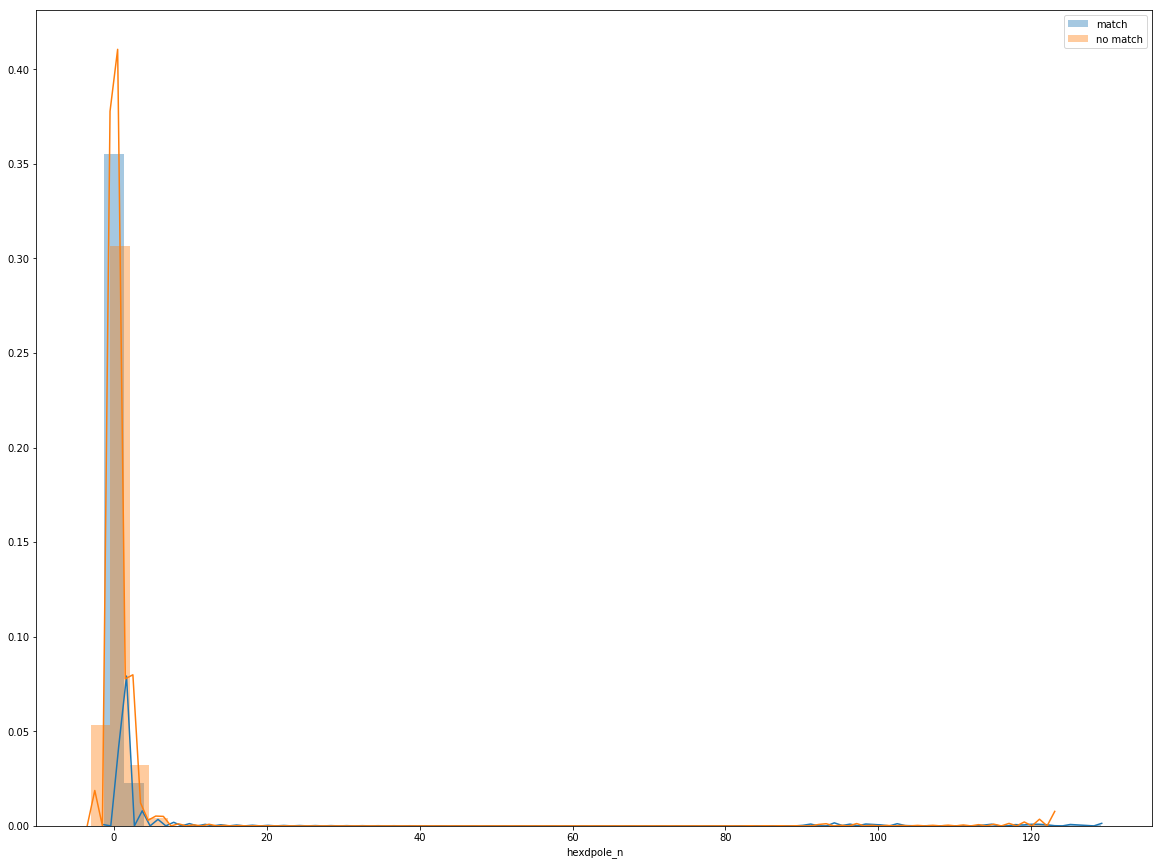




hexdpole_p


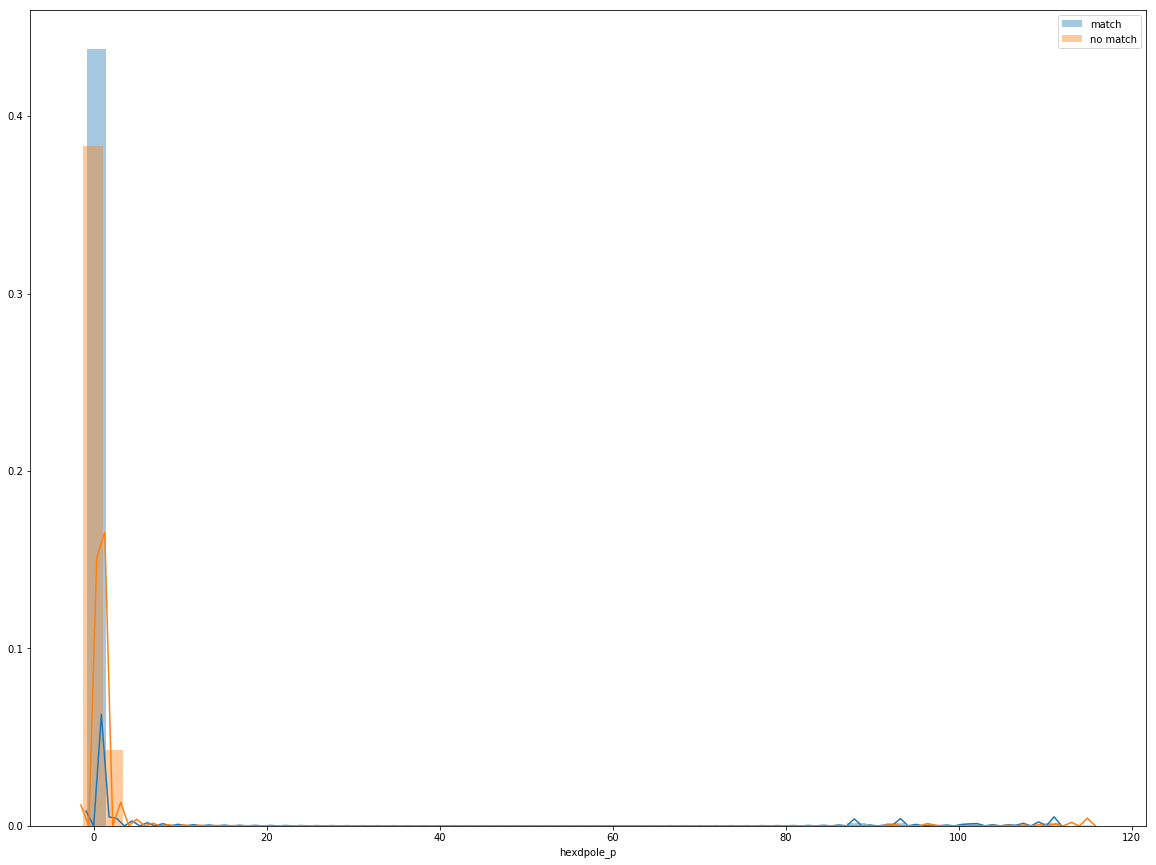




q5_n


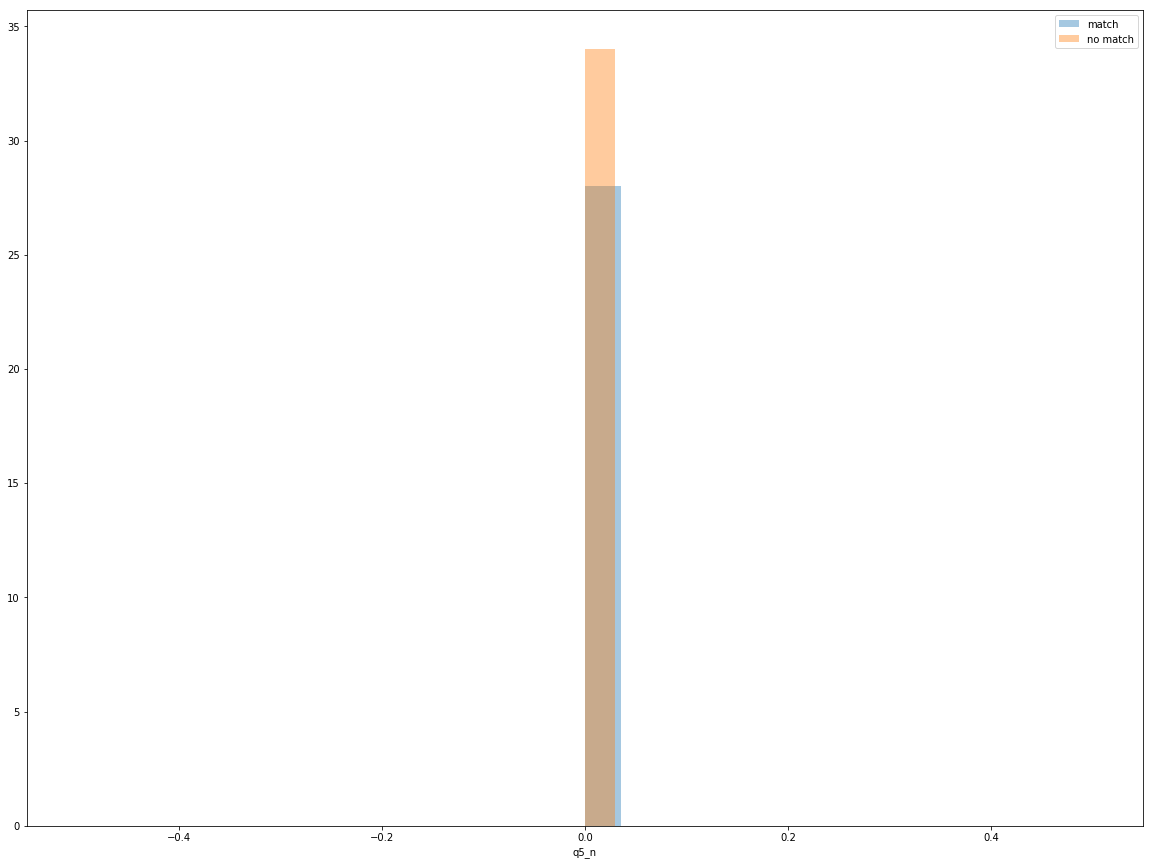




q5_p


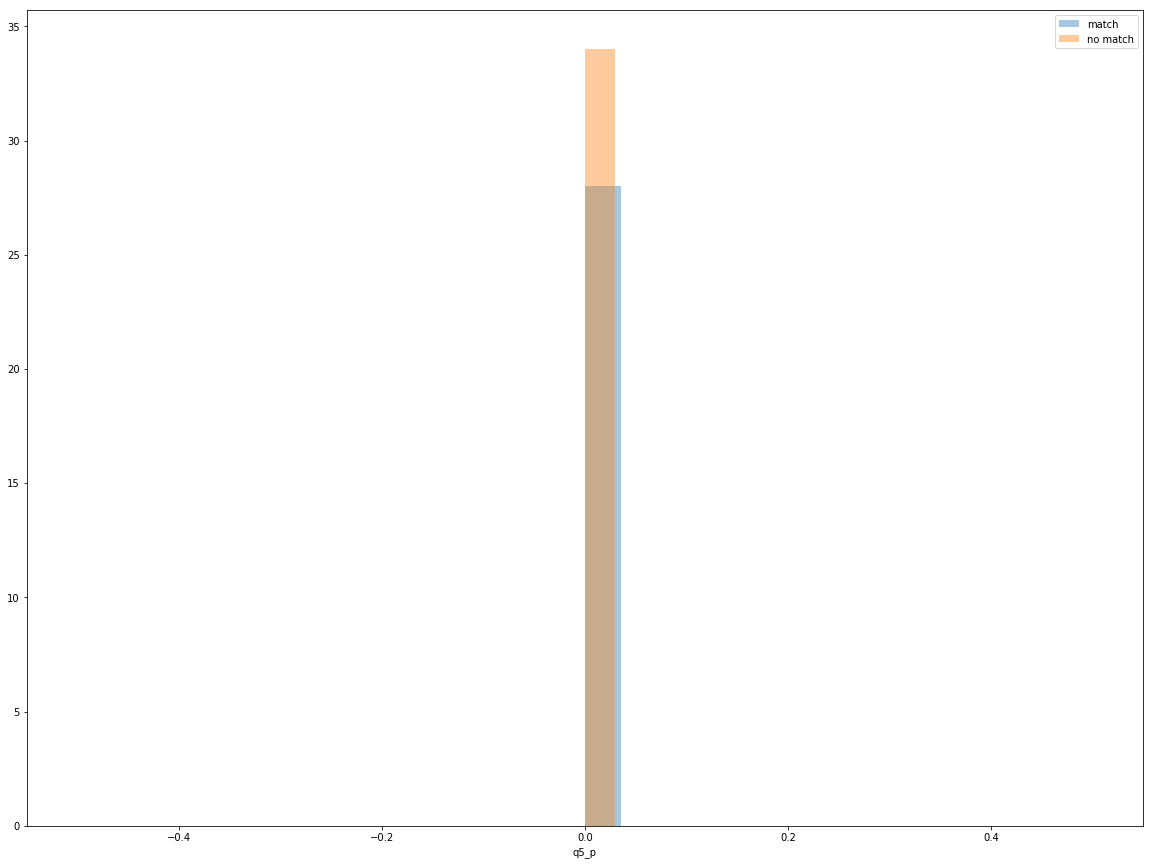




q6_n


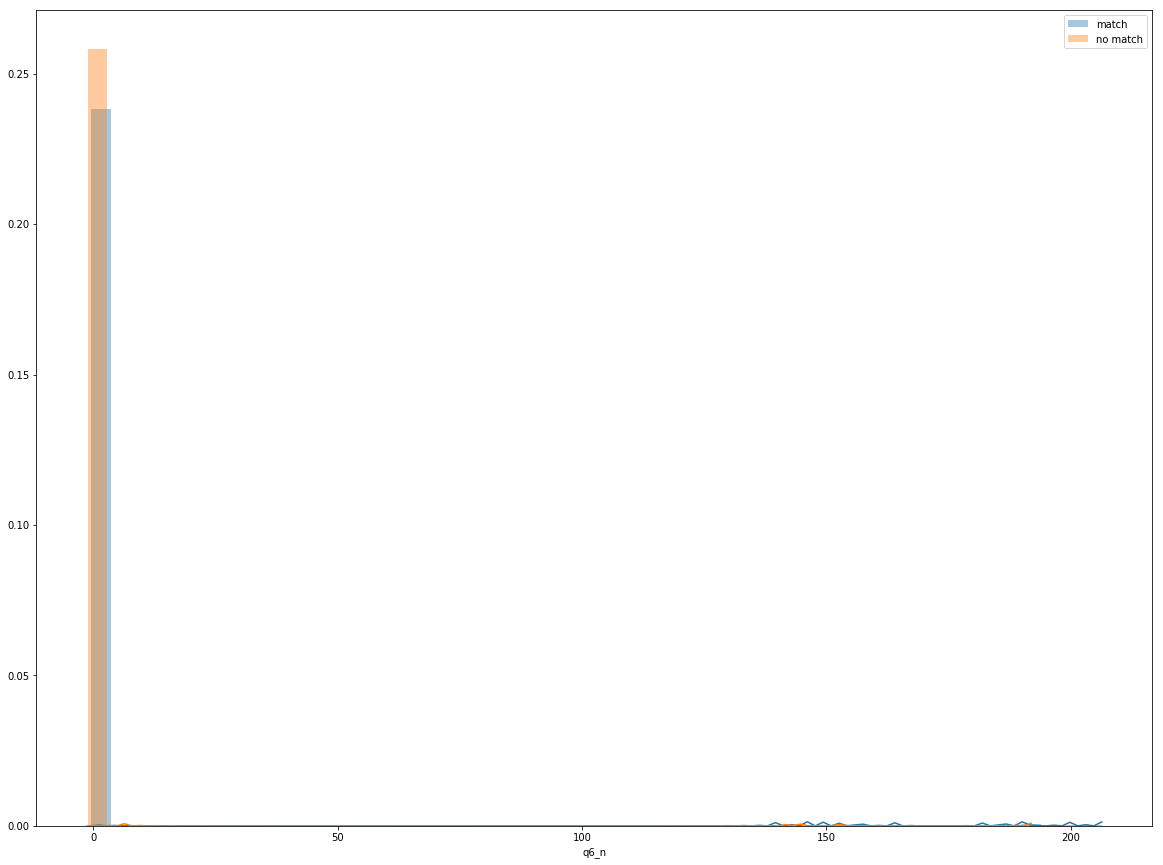




q6_p


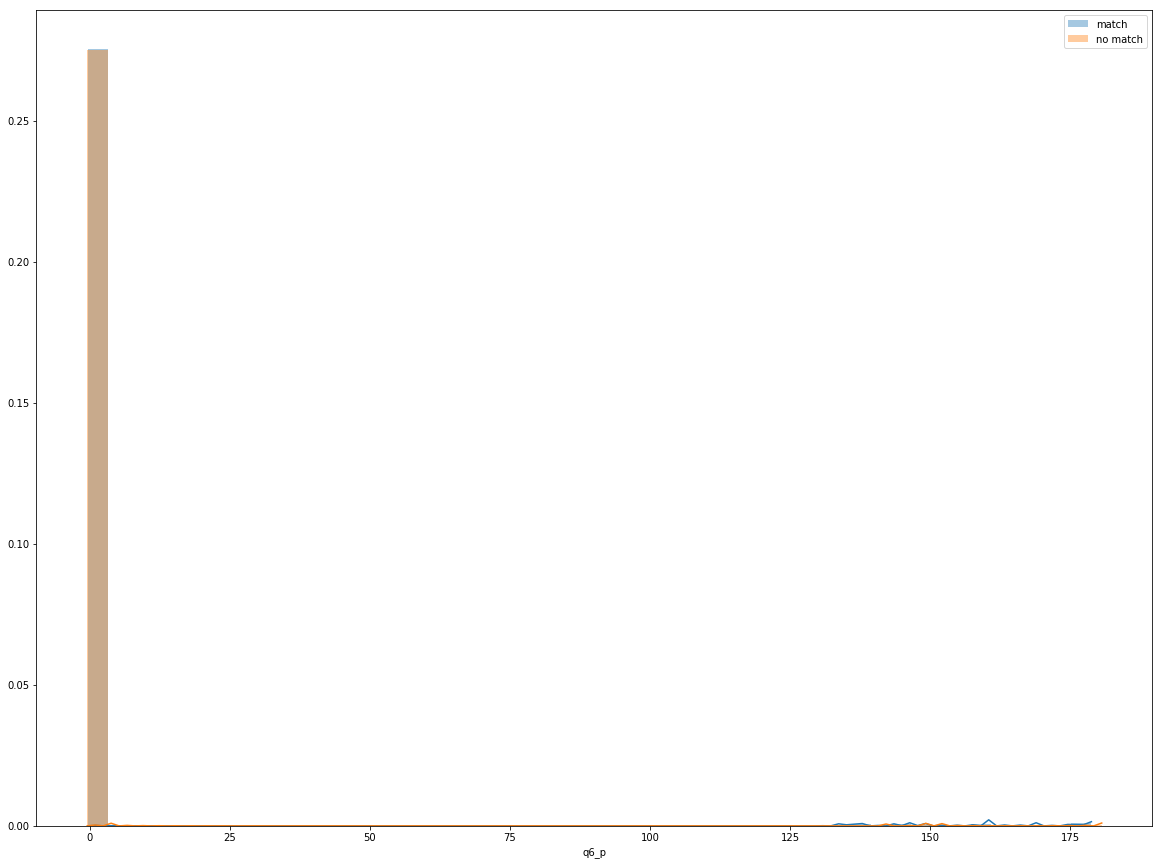




q7_n


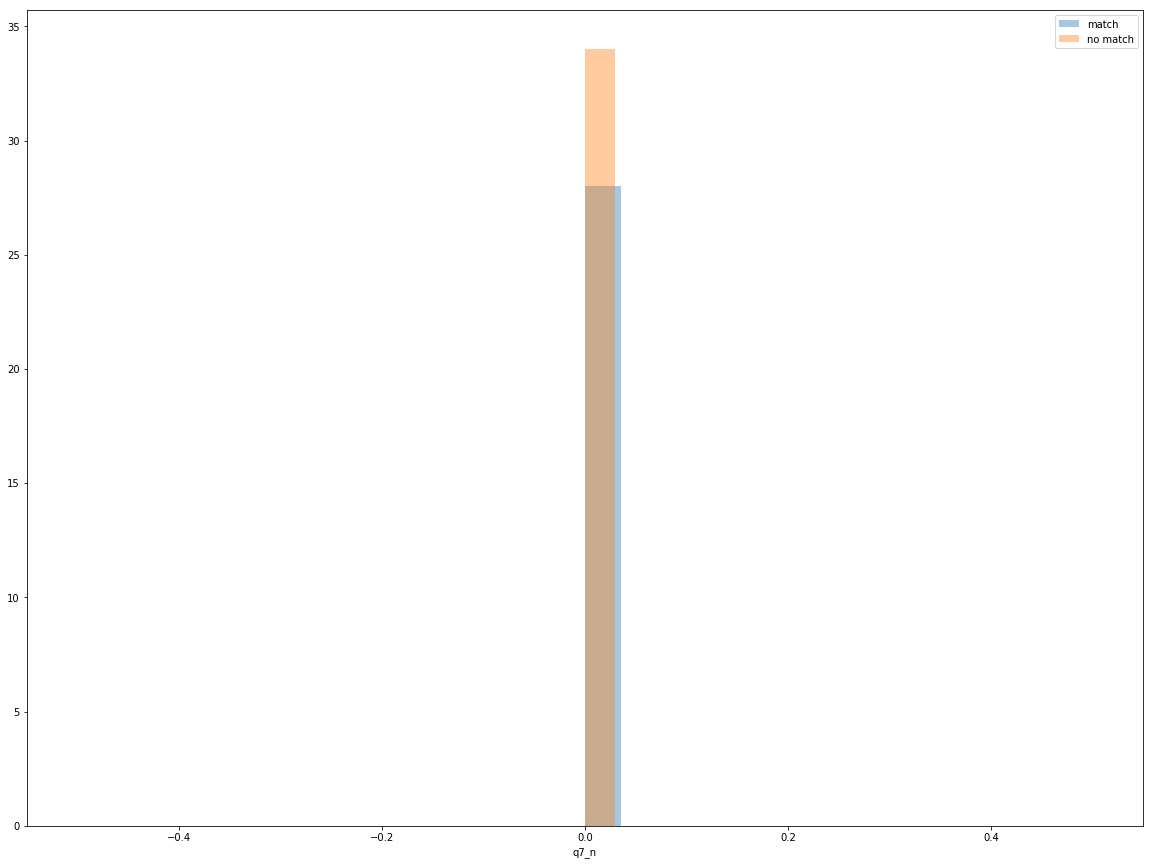




q7_p


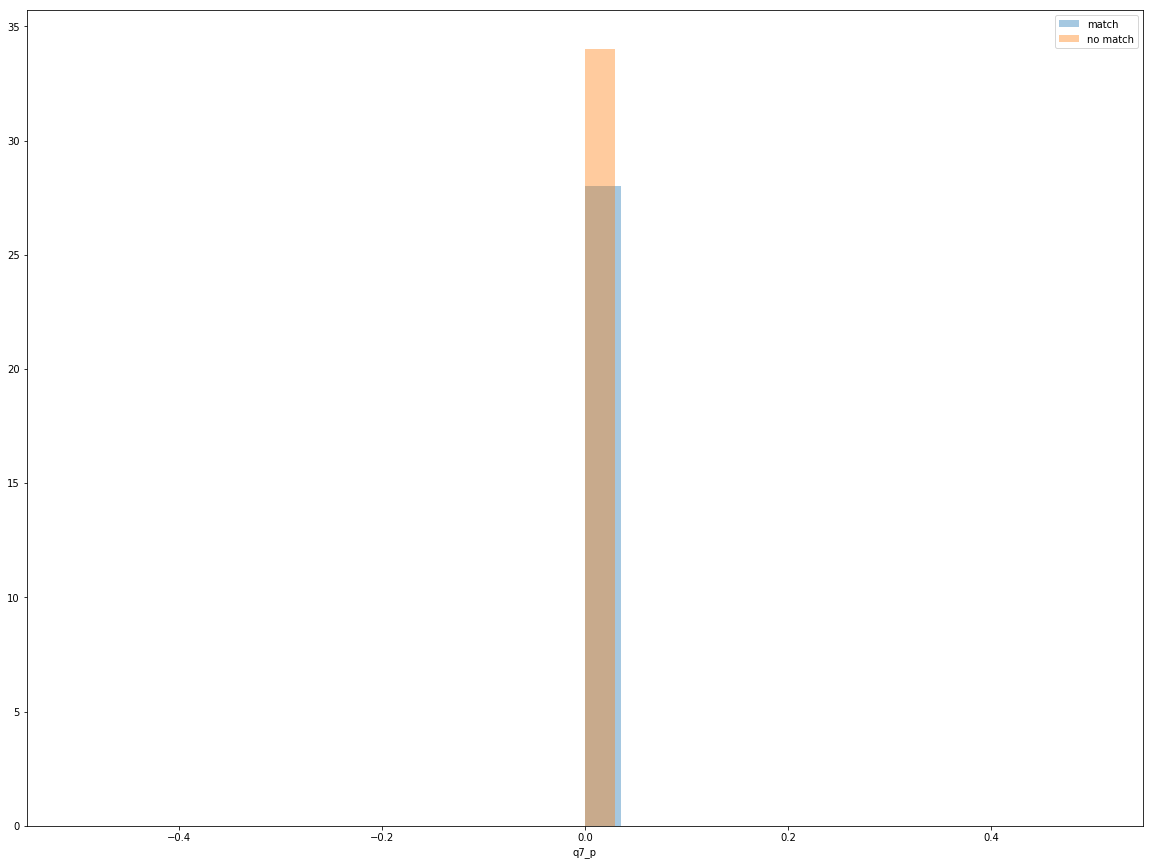




q8_n


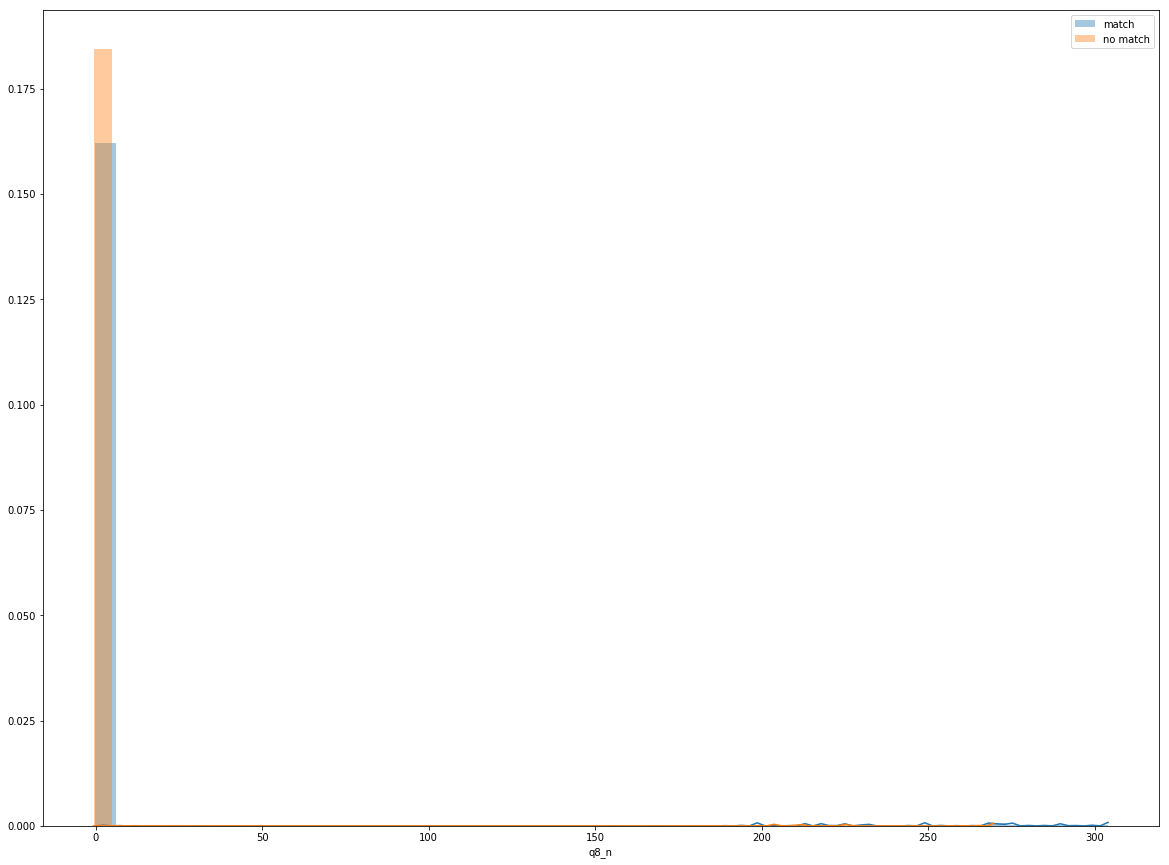




q8_p


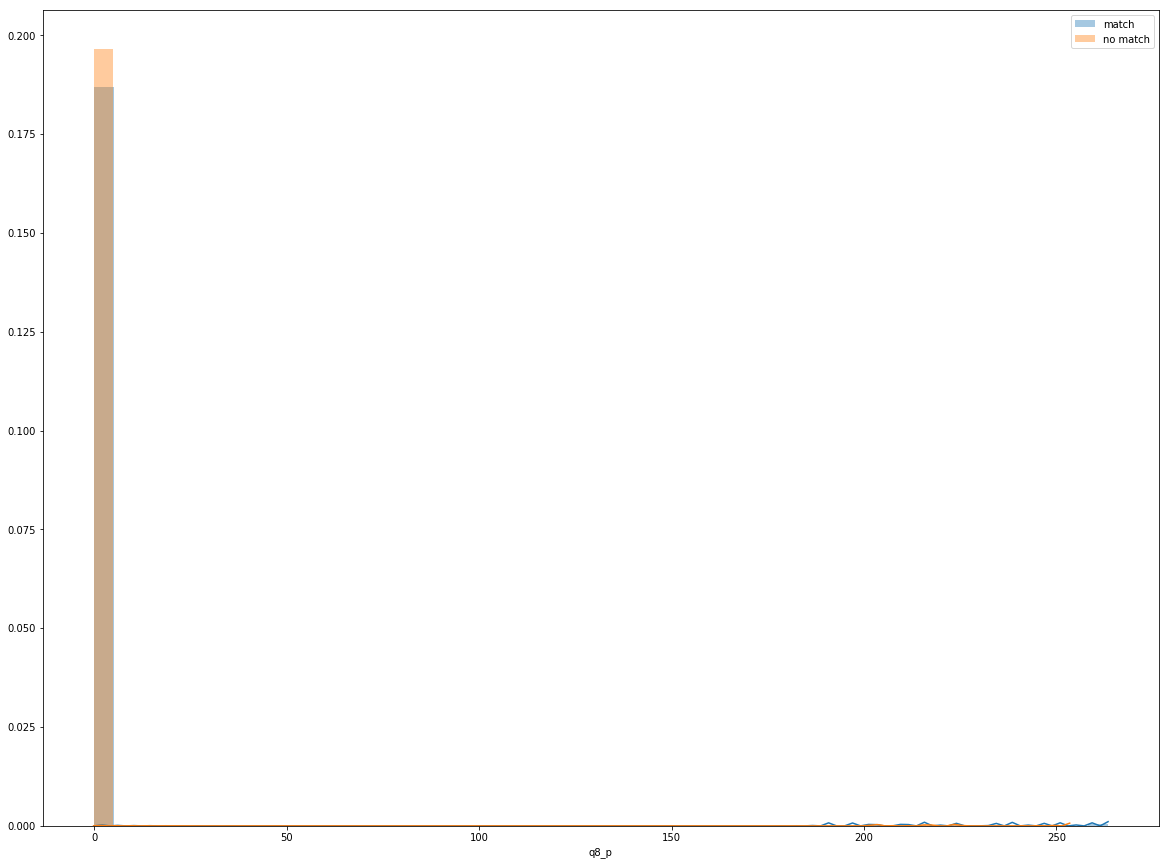




KineticE_n


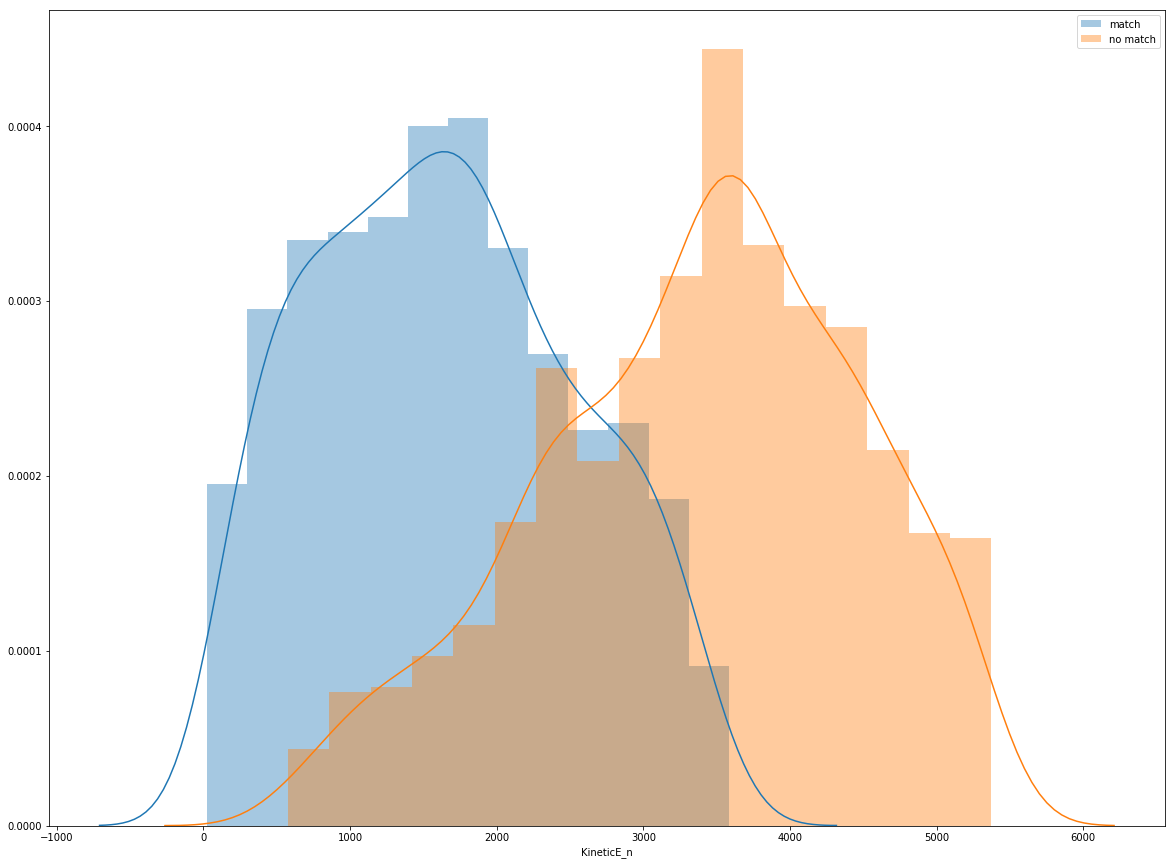




KineticE_p


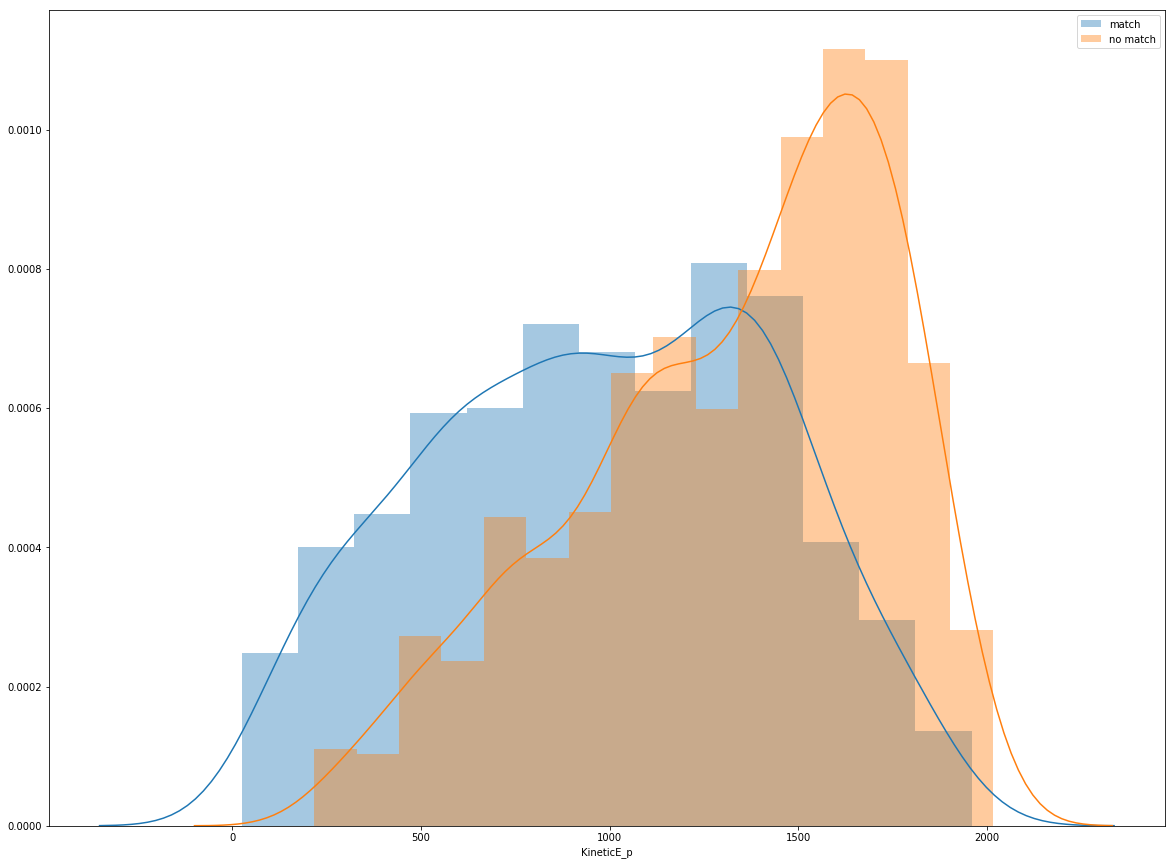




VolumeE


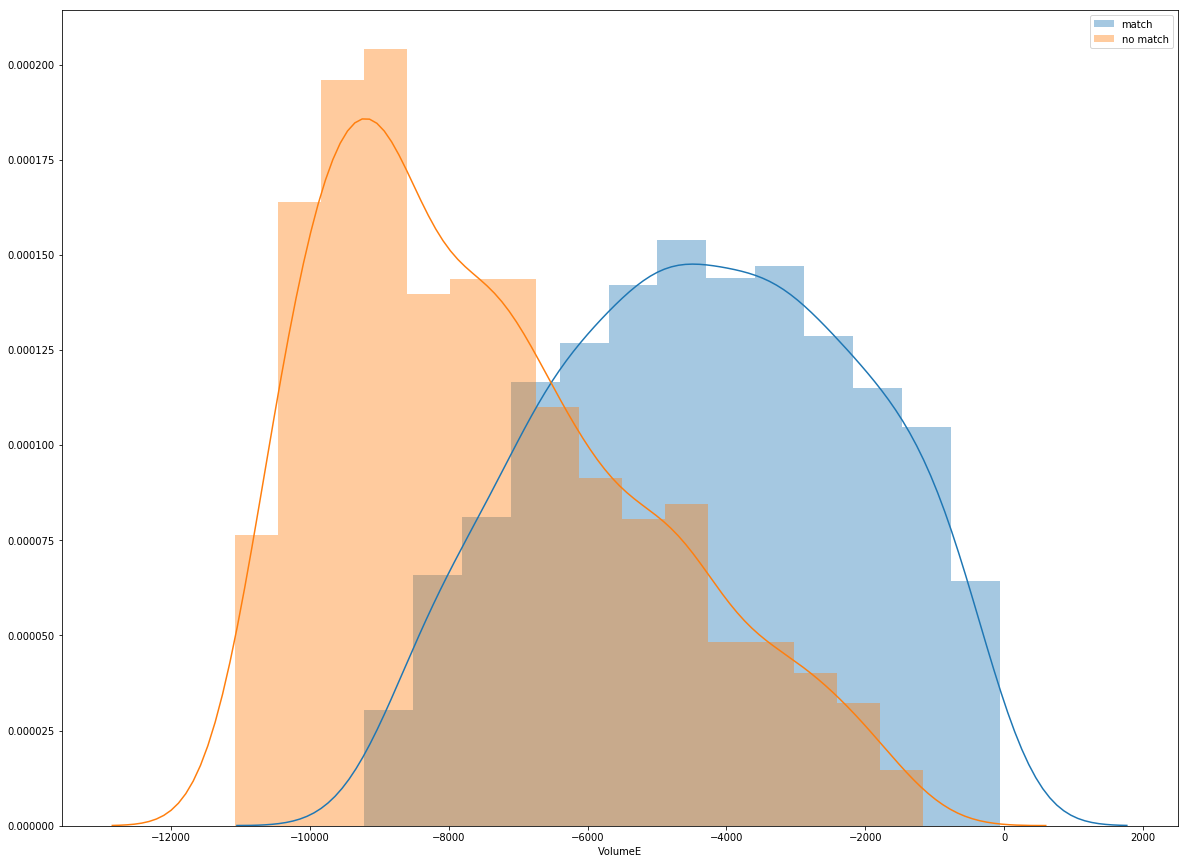




rho_tau


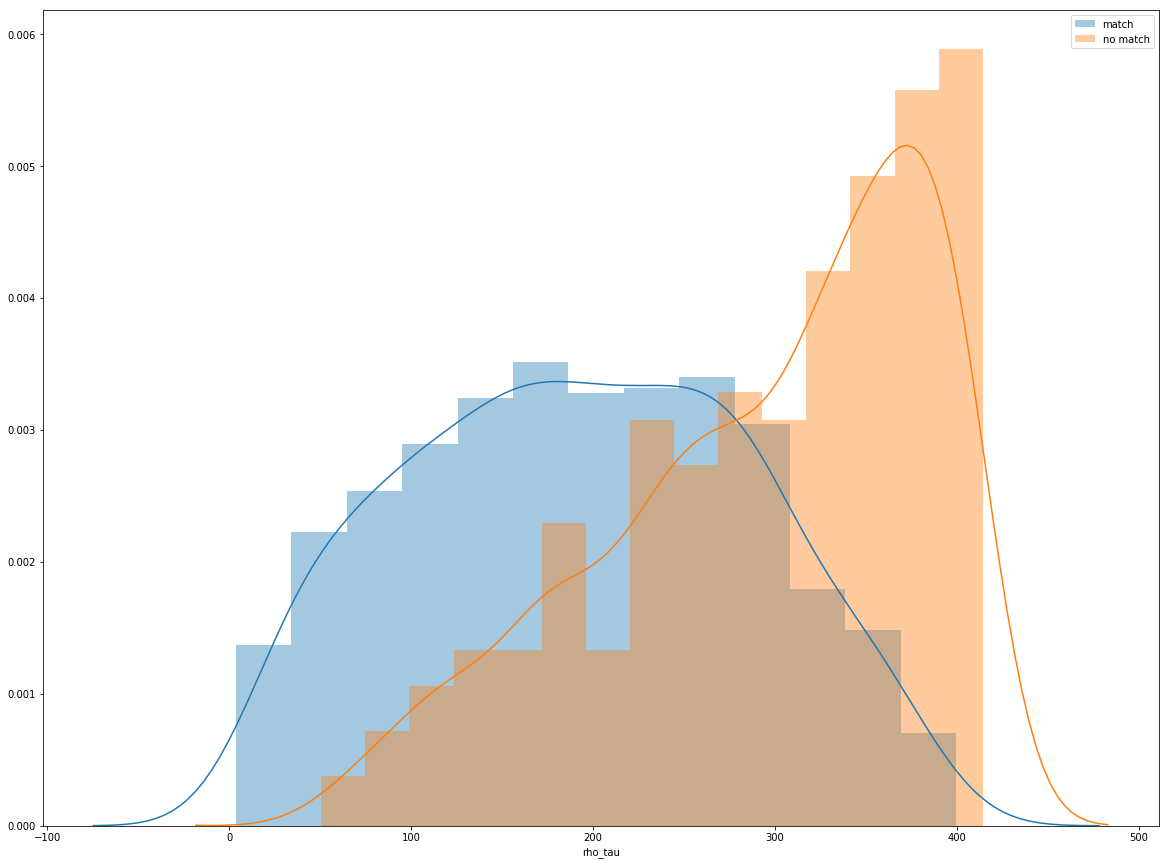




rho_rho


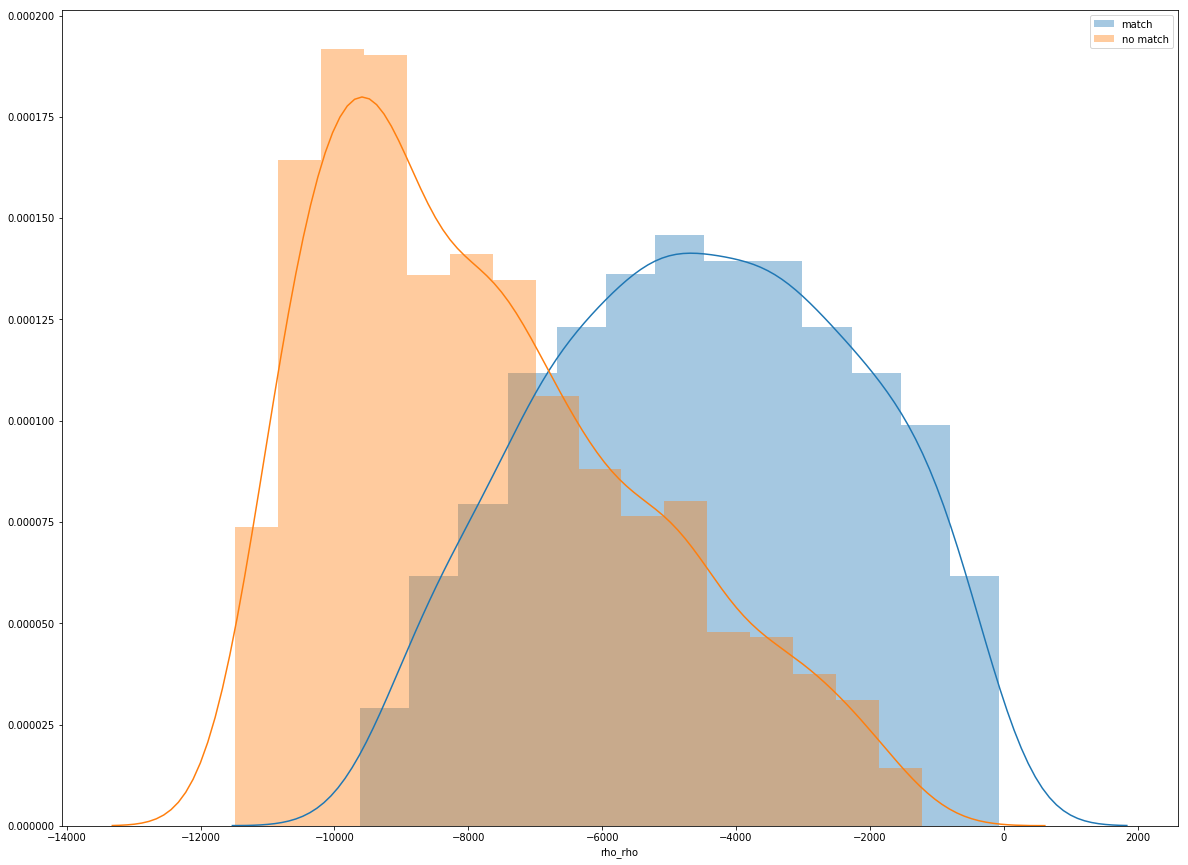




surfaceE


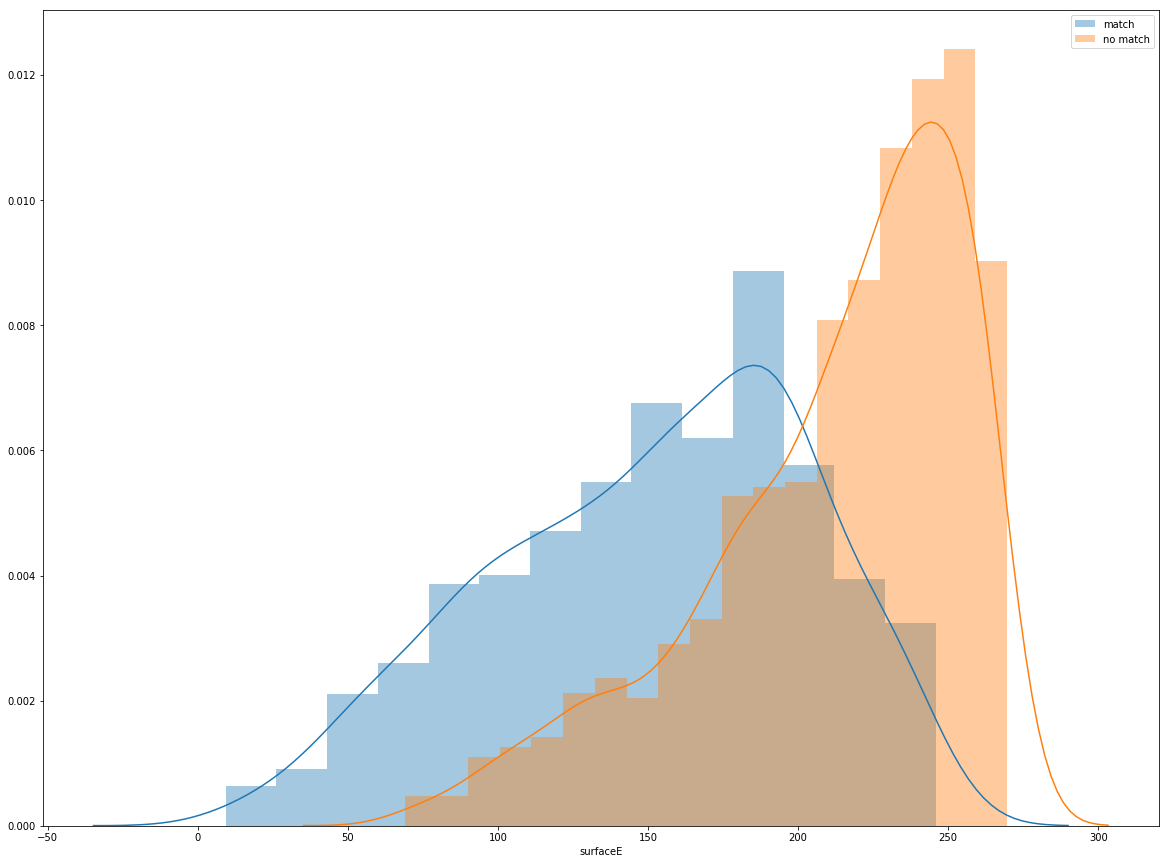




rhoDELrho


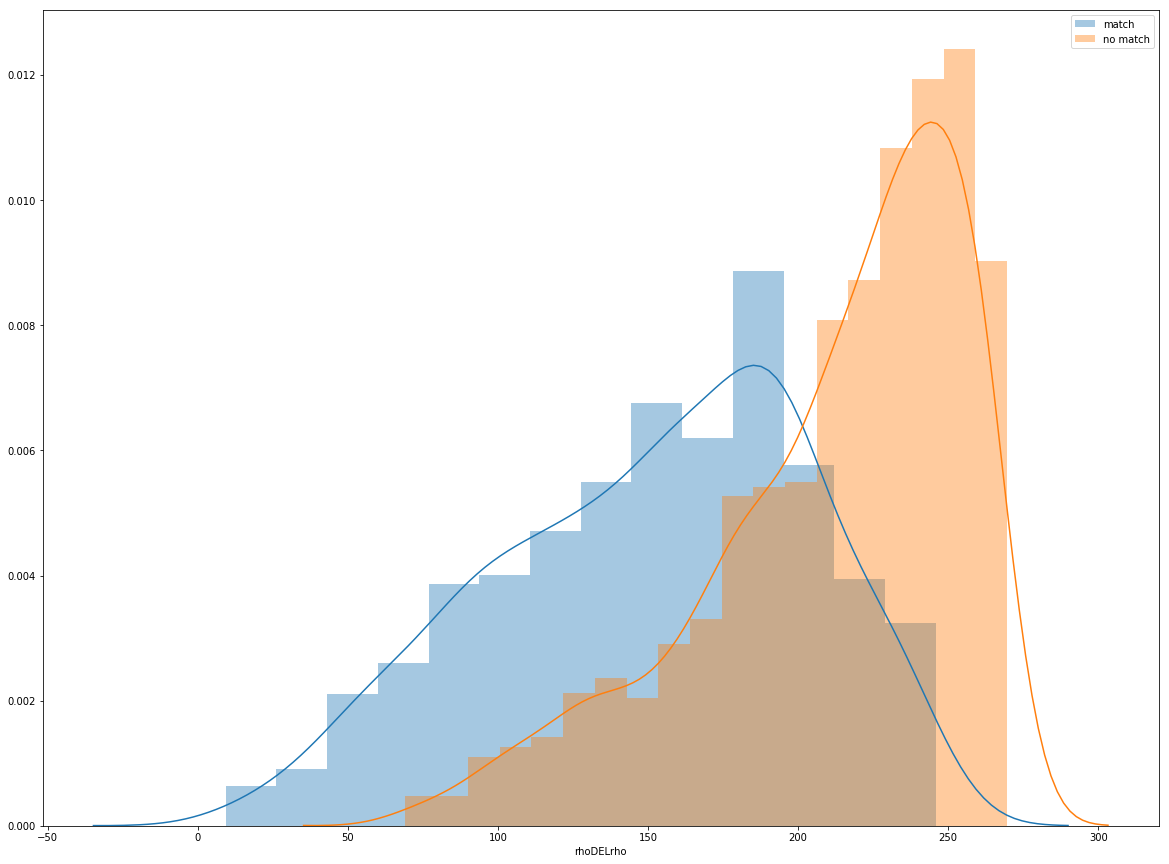




NABLArho^2


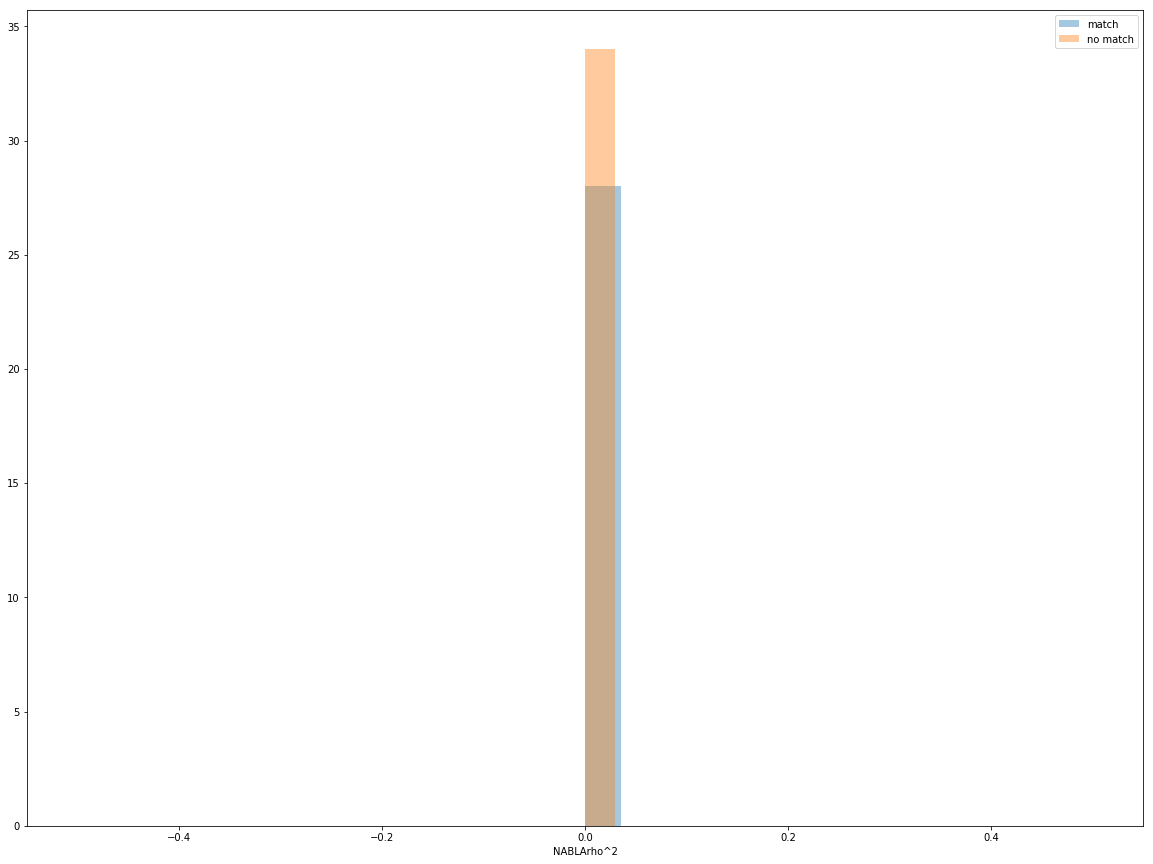




SpinOrbitE


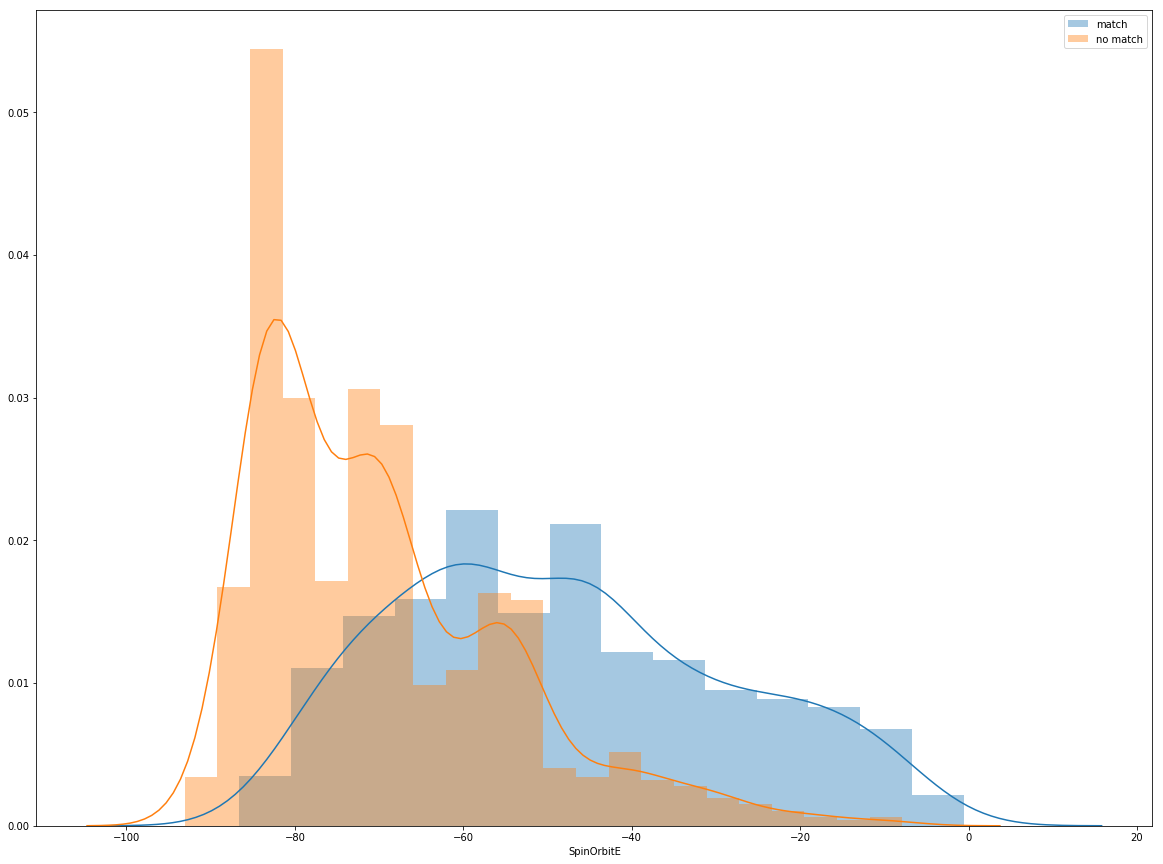




rhoNABLAJ


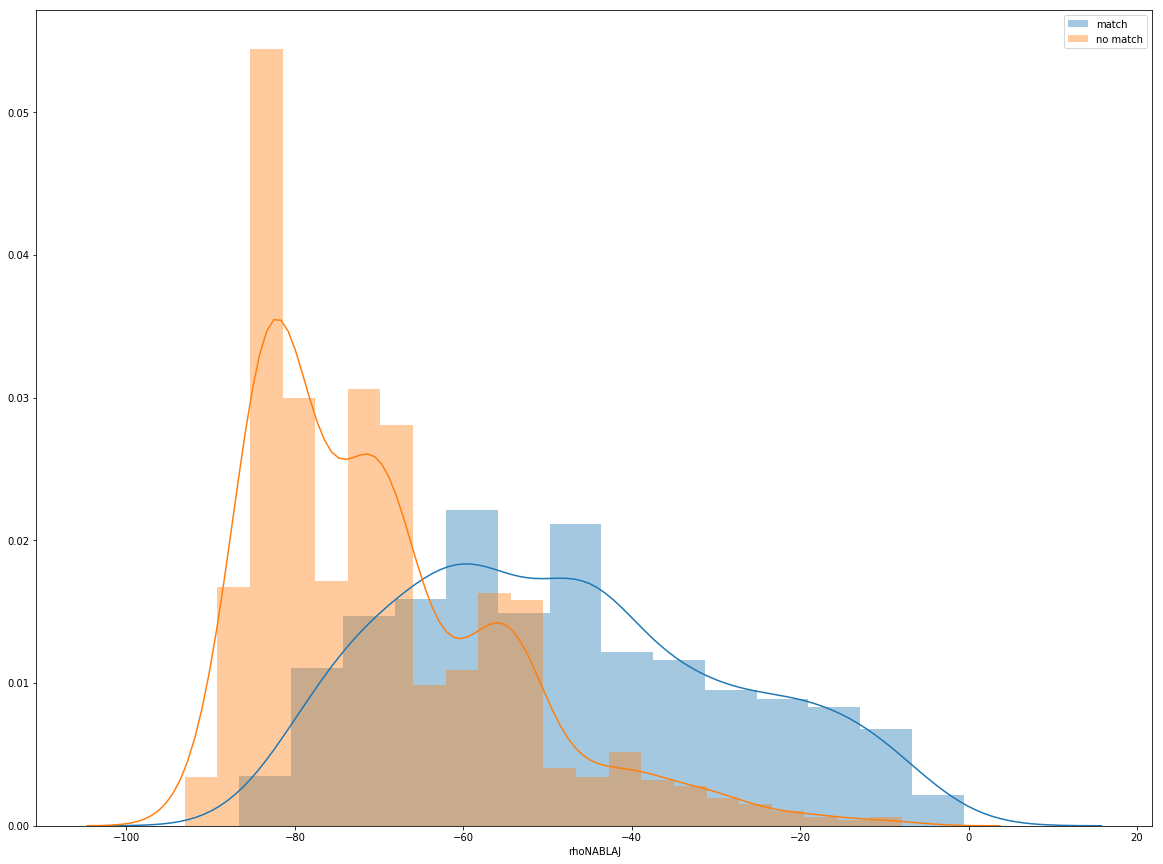




NABLArhoJ


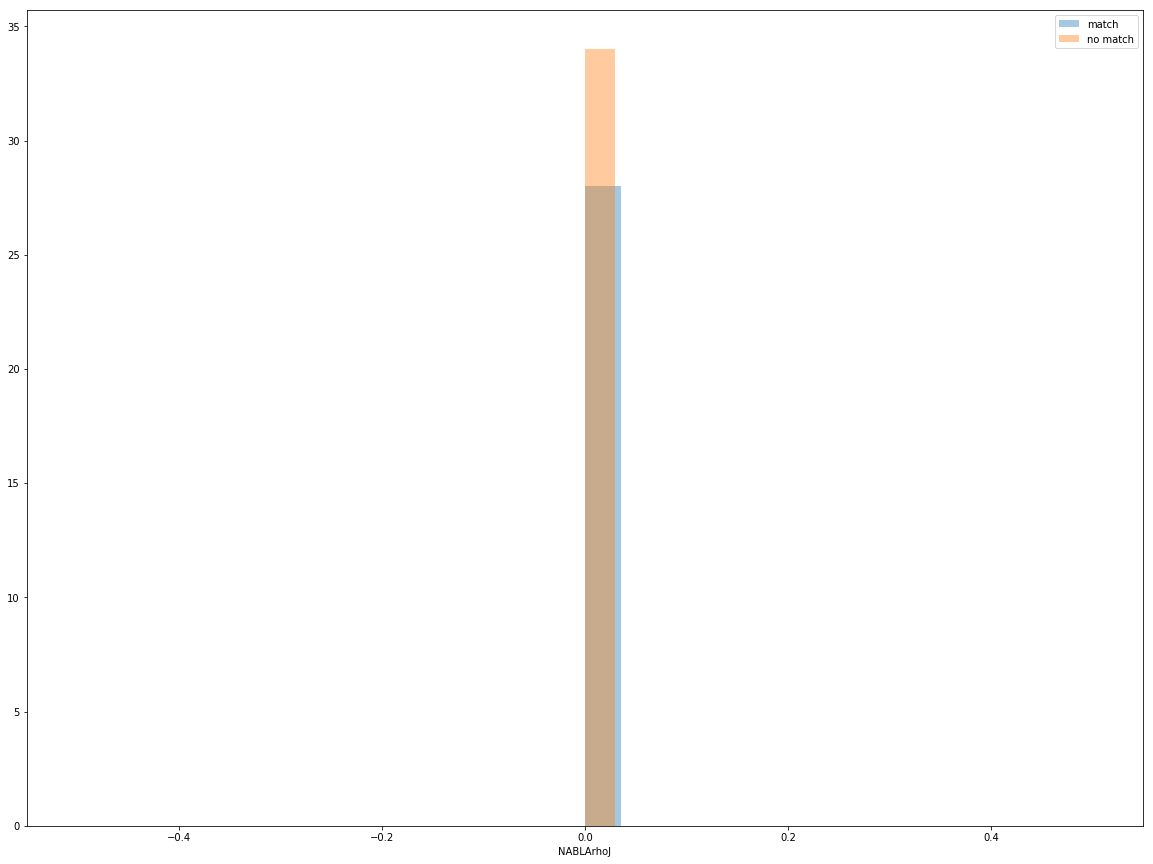




CoulombE


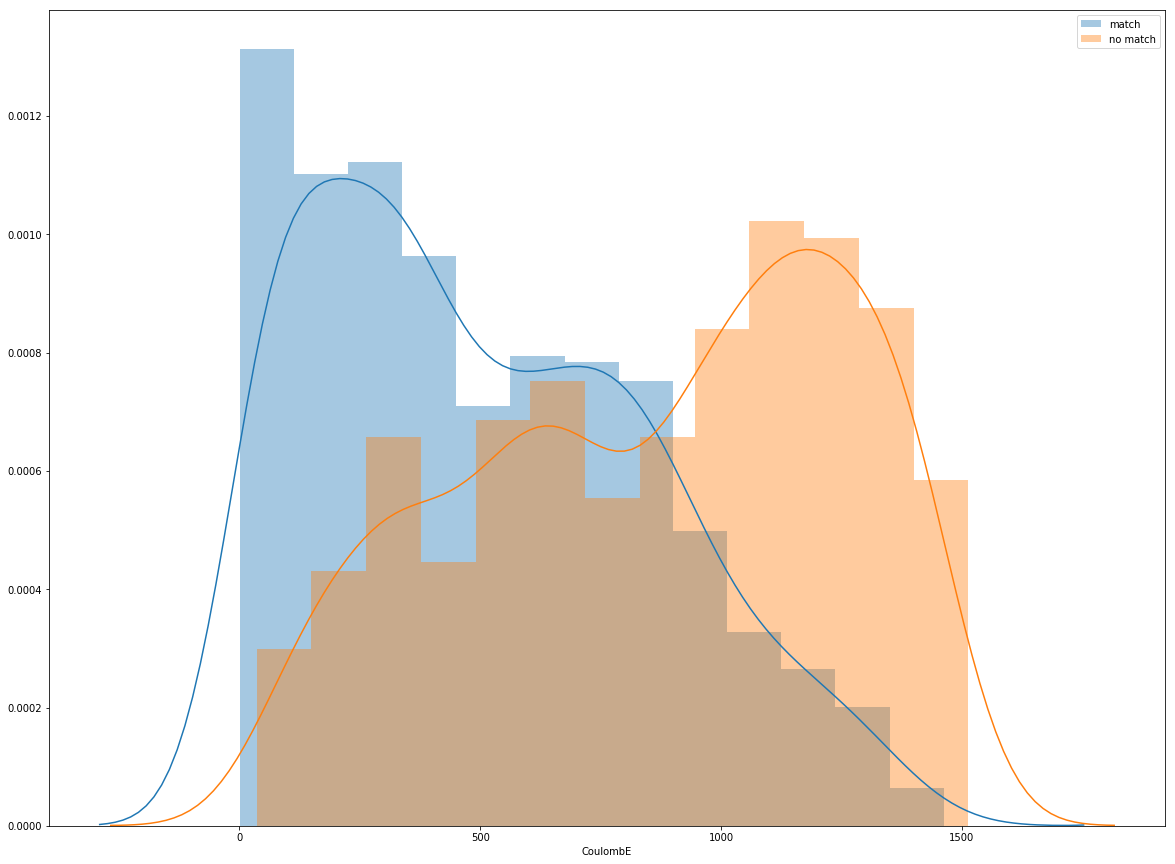




CoulombDir


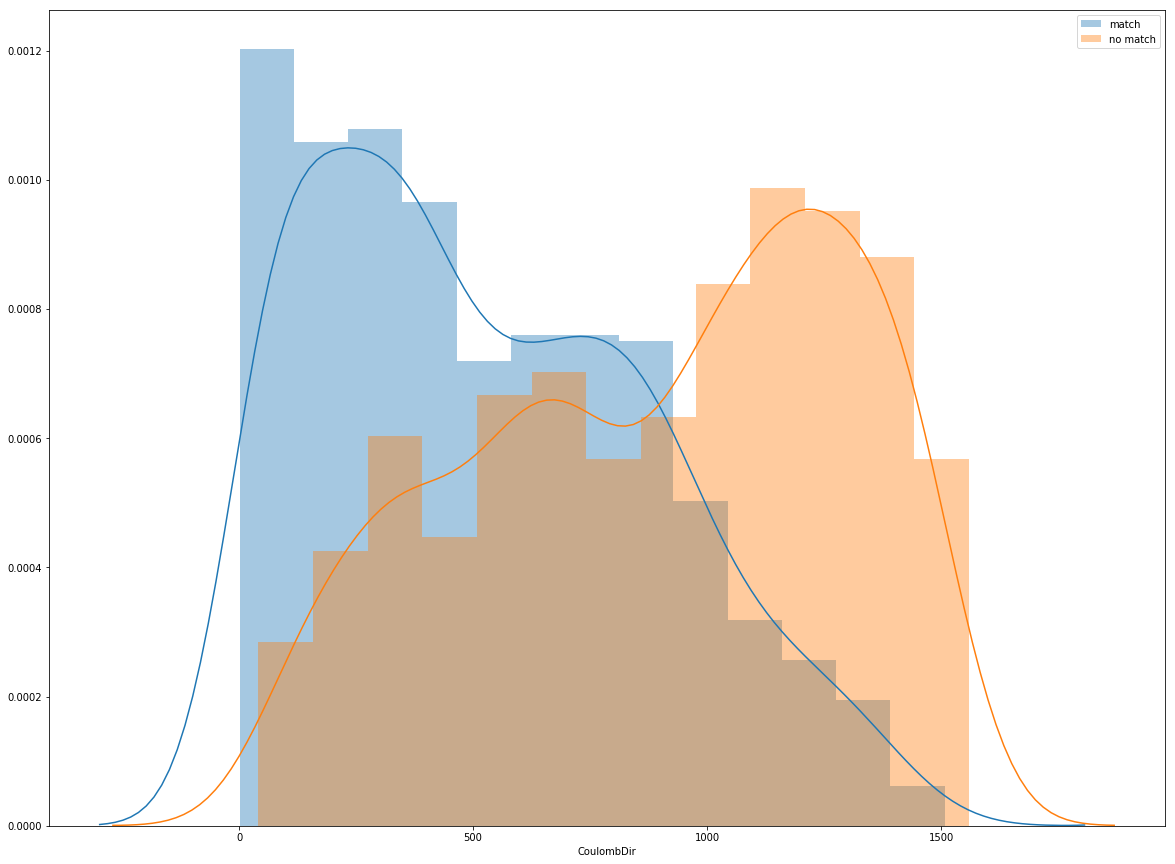




CoulombEx


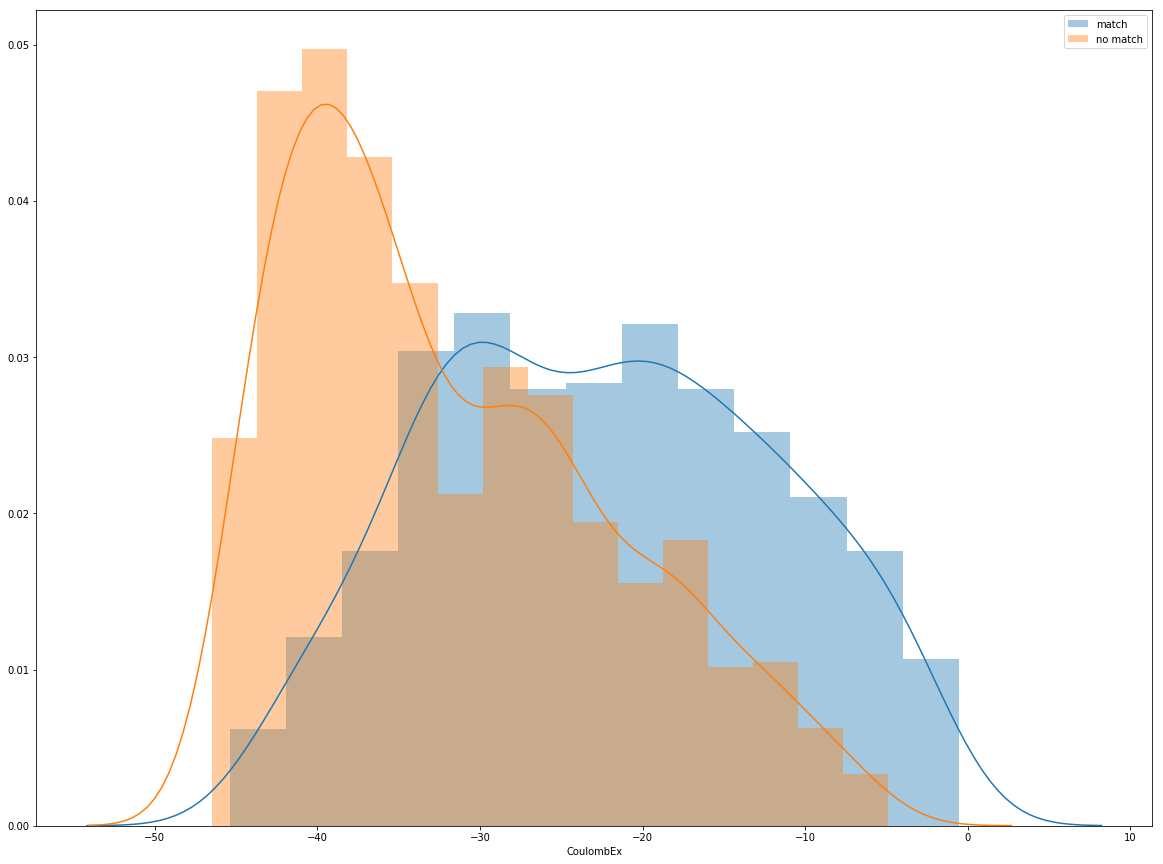




TensorE


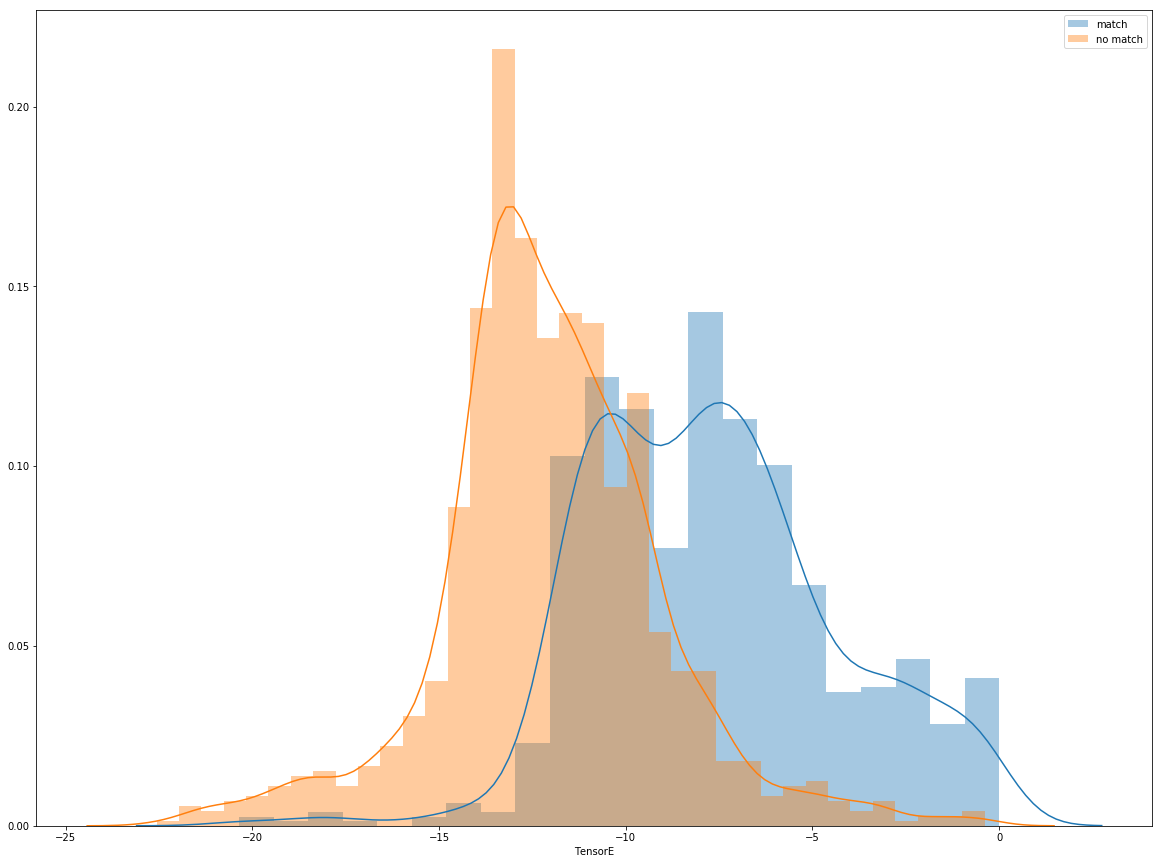




HartreeE


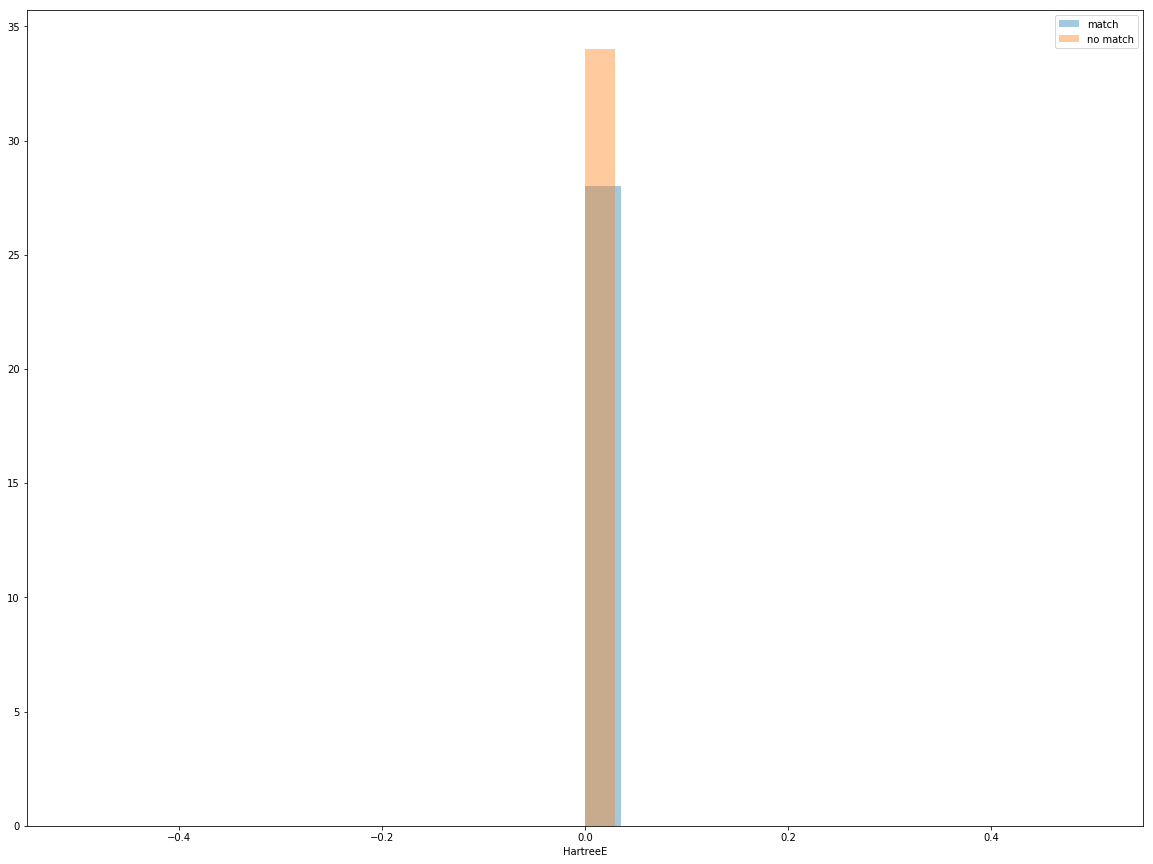




ExtraE


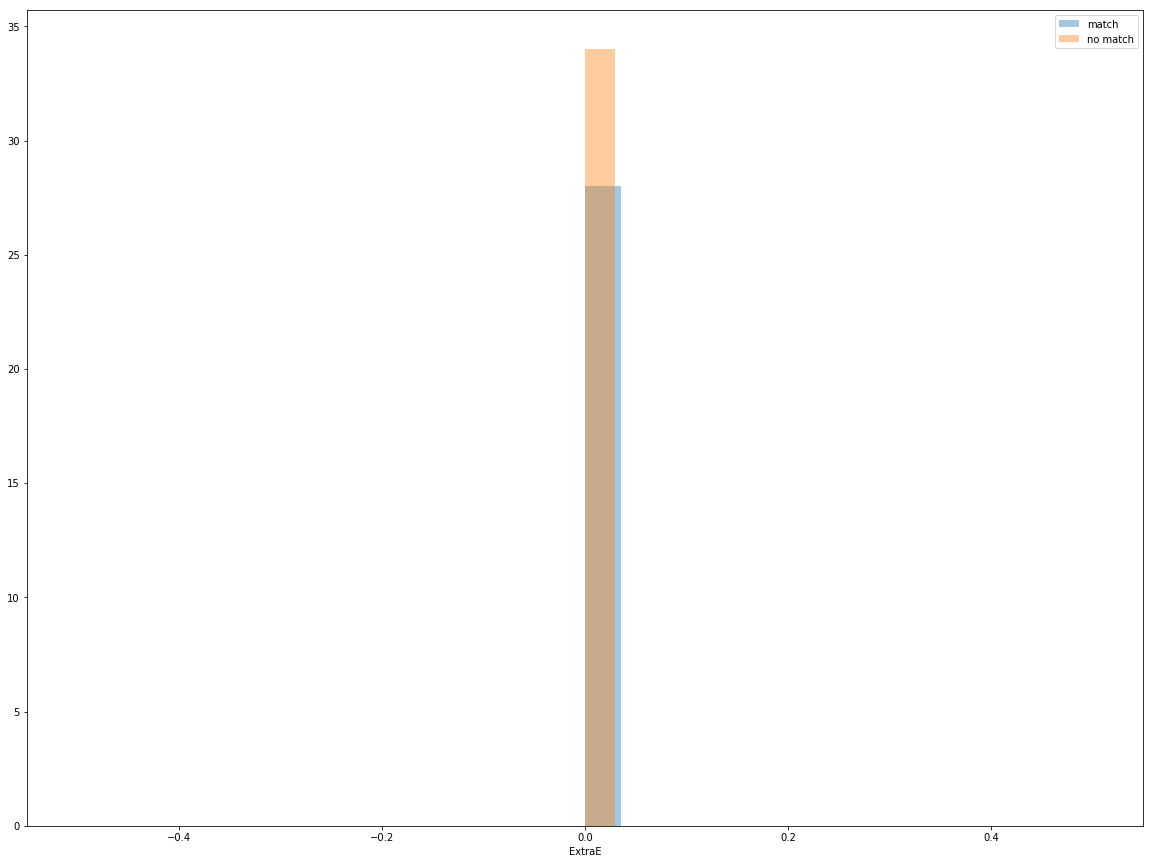




ExternalFE


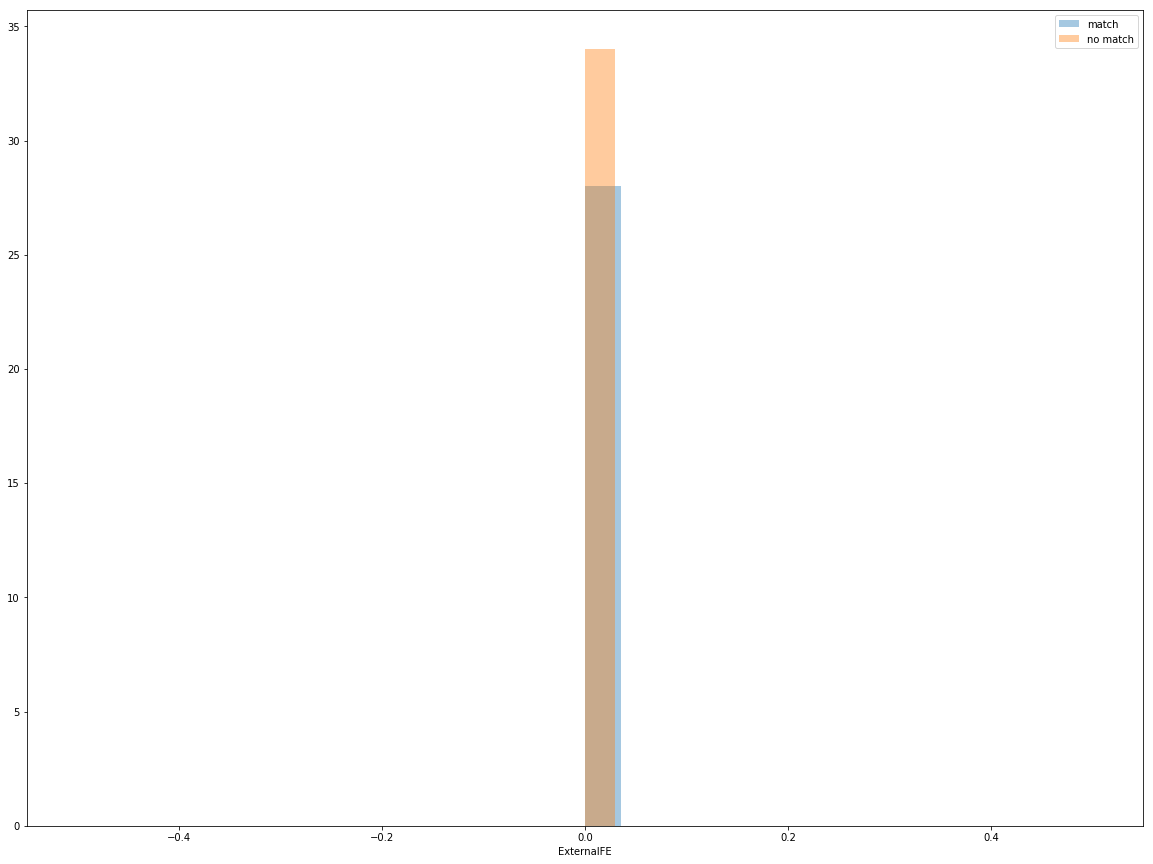




Entropy_n


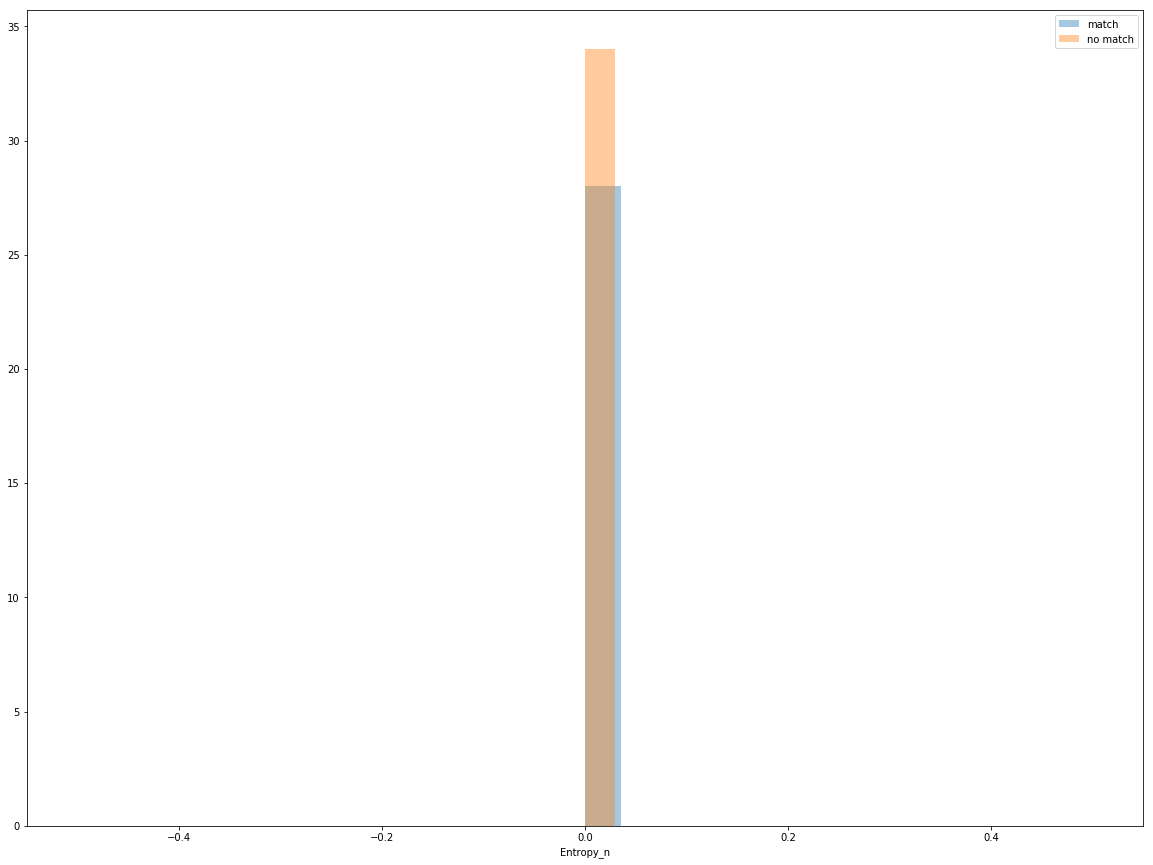




Entropy_p


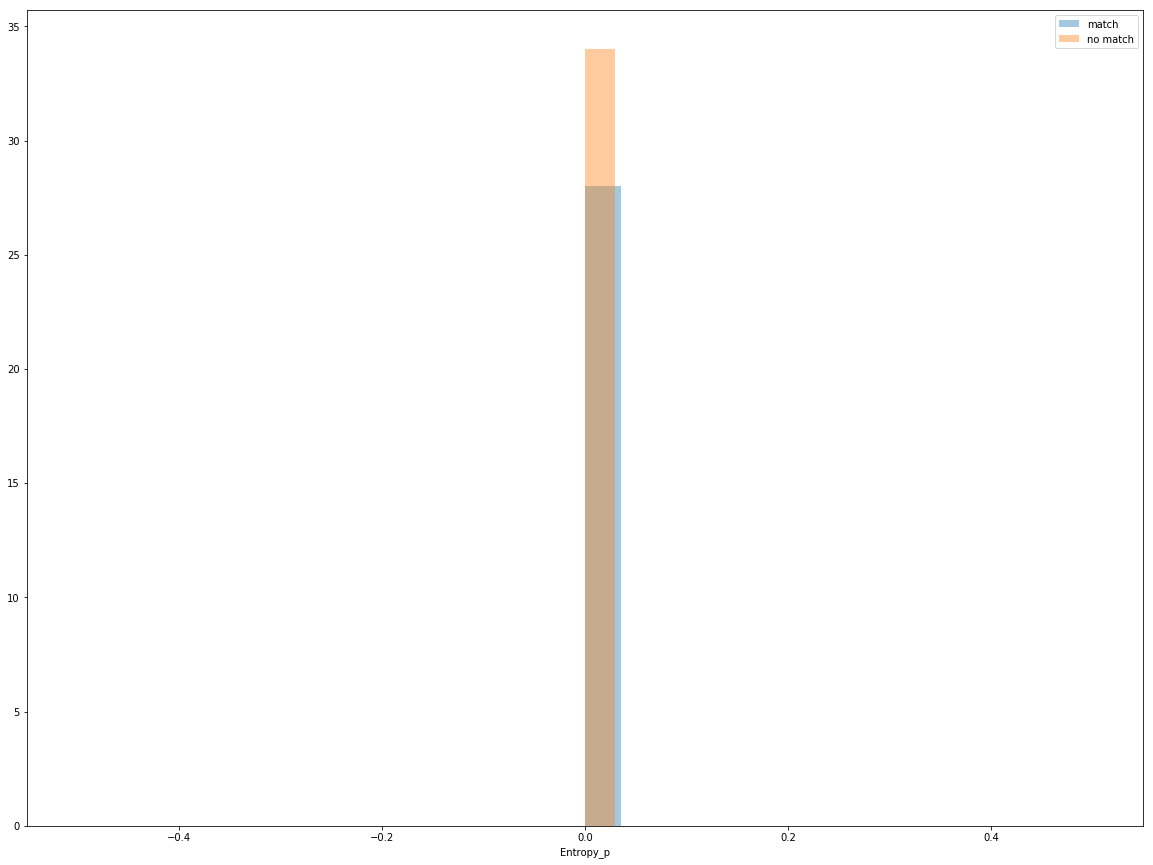

In [121]:
for j in df.columns:
    print(j)
  
    
    sns.distplot(match_df[j], label="match")
    sns.distplot(no_match_df[j], label="no match")
    plt.legend()
    plt.show()
    
    print("\n\n")
    

In [143]:
df.describe()

Z            N       Energy  NShells           b0  \
count  2045.000000  2045.000000  2045.000000   2045.0  2045.000000   
mean     74.604401   130.920293 -1493.323696     20.0     2.187839   
std      30.019278    62.509271   576.279145      0.0     0.210675   
min       2.000000     2.000000 -2381.981300     20.0     1.156730   
25%      52.000000    82.000000 -1986.062400     20.0     2.082000   
50%      78.000000   132.000000 -1589.249300     20.0     2.238340   
75%     100.000000   178.000000 -1093.523500     20.0     2.348280   
max     120.000000   260.000000   -18.907600     20.0     2.470890   

                bz           bp     lambda_n     lambda_p     Lambda_n  ...  \
count  2045.000000  2045.000000  2045.000000  2045.000000  2045.000000  ...   
mean      2.265490     2.152426    -4.647053   -10.242289    -4.647053  ...   
std       0.253674     0.213412     3.671046     6.063267     3.671046  ...   
min       1.193800     1.138640   -21.176000   -27.610260   -21.176000  ...   
25%       2.130150     2.020750    -6.887600   -14.650090    -6.887600  ...   
50%       2.319290     2.207960    -3.792500   -10.111270    -3.792500  ...   
75%       2.426400     2.311810    -1.745410    -5.338260    -1.745410  ...   
max       2.777980     2.538760     0.659680     1.283770     0.659680  ...   

       NABLArhoJ     CoulombE   CoulombDir    CoulombEx      TensorE  \
count     2045.0  2045.000000  2045.000000  2045.000000  2045.000000   
mean         0.0   718.477082   746.391564   -27.914481   -10.231653   
std          0.0   417.412212   428.461010    11.190498     3.793407   
min          0.0     0.759800     1.326000   -46.467000   -22.568300   
25%          0.0   348.172500   367.071900   -37.522900   -12.776400   
50%          0.0   704.671600   734.165000   -29.113300   -10.702600   
75%          0.0  1079.901100  1117.749600   -19.339800    -7.900900   
max          0.0  1513.210800  1559.677800    -0.566200     0.001800   

       HartreeE  ExtraE  ExternalFE  Entropy_n  Entropy_p  
count    2045.0  2045.0      2045.0     2045.0     2045.0  
mean        0.0     0.0         0.0        0.0        0.0  
std         0.0     0.0         0.0        0.0        0.0  
min         0.0     0.0         0.0        0.0        0.0  
25%         0.0     0.0         0.0        0.0        0.0  
50%         0.0     0.0         0.0        0.0        0.0  
75%         0.0     0.0         0.0        0.0        0.0  
max         0.0     0.0         0.0        0.0        0.0  

[8 rows x 68 columns]

In [144]:
match_df.describe()

Z           N       Energy  NShells          b0         bz  \
count  840.000000  840.000000   840.000000    840.0  840.000000  840.00000   
mean    58.266667   82.895238 -1119.776189     20.0    2.046657    2.12884   
std     27.476727   42.808312   513.666496      0.0    0.216527    0.26981   
min      2.000000    2.000000 -2080.744100     20.0    1.156730    1.19380   
25%     36.000000   48.000000 -1529.895975     20.0    1.928880    1.97799   
50%     58.000000   82.000000 -1159.270350     20.0    2.092080    2.16539   
75%     80.000000  114.000000  -729.952825     20.0    2.208970    2.33634   
max    118.000000  176.000000   -18.907600     20.0    2.367450    2.47988   

               bp    lambda_n    lambda_p    Lambda_n  ...  NABLArhoJ  \
count  840.000000  840.000000  840.000000  840.000000  ...      840.0   
mean     2.009242   -7.542471   -7.251526   -7.542471  ...        0.0   
std      0.211353    3.332471    5.282697    3.332471  ...        0.0   
min      1.138640  -21.176000  -27.610260  -21.176000  ...        0.0   
25%      1.890130   -9.504017  -10.223638   -9.504017  ...        0.0   
50%      2.032335   -7.121860   -6.107900   -7.121860  ...        0.0   
75%      2.198660   -5.266198   -3.159080   -5.266198  ...        0.0   
max      2.405080    0.258690    1.283770    0.258690  ...        0.0   

          CoulombE   CoulombDir   CoulombEx     TensorE  HartreeE  ExtraE  \
count   840.000000   840.000000  840.000000  840.000000     840.0   840.0   
mean    503.963076   526.349030  -22.385952   -7.659142       0.0     0.0   
std     351.559007   362.023756   10.642448    3.322694       0.0     0.0   
min       0.759800     1.326000  -45.374400  -20.357200       0.0     0.0   
25%     204.055300   218.114425  -30.970700  -10.204150       0.0     0.0   
50%     444.044350   466.269700  -22.485600   -7.879400       0.0     0.0   
75%     768.808825   799.819950  -14.059125   -5.701550       0.0     0.0   
max    1462.059100  1507.433600   -0.566200    0.001800       0.0     0.0   

       ExternalFE  Entropy_n  Entropy_p  
count       840.0      840.0      840.0  
mean          0.0        0.0        0.0  
std           0.0        0.0        0.0  
min           0.0        0.0        0.0  
25%           0.0        0.0        0.0  
50%           0.0        0.0        0.0  
75%           0.0        0.0        0.0  
max           0.0        0.0        0.0  

[8 rows x 68 columns]

In [145]:
no_match_df.describe()

Z            N       Energy  NShells           b0  \
count  1205.000000  1205.000000  1205.000000   1205.0  1205.000000   
mean     85.993361   164.398340 -1753.721959     20.0     2.286257   
std      26.224686    51.241342   463.372071      0.0     0.138125   
min      14.000000    32.000000 -2381.981300     20.0     1.737870   
25%      68.000000   128.000000 -2118.184400     20.0     2.220220   
50%      92.000000   170.000000 -1877.089600     20.0     2.322420   
75%     108.000000   202.000000 -1487.318600     20.0     2.385880   
max     120.000000   260.000000  -313.577400     20.0     2.470890   

                bz           bp     lambda_n     lambda_p     Lambda_n  ...  \
count  1205.000000  1205.000000  1205.000000  1205.000000  1205.000000  ...   
mean      2.360748     2.252239    -2.628670   -12.327137    -2.628670  ...   
std       0.190810     0.148045     2.283412     5.689864     2.283412  ...   
min       1.695900     1.737870   -16.182320   -26.057570   -16.182320  ...   
25%       2.278070     2.175680    -3.590800   -16.098960    -3.590800  ...   
50%       2.380280     2.283160    -2.176580   -12.651230    -2.176580  ...   
75%       2.454270     2.351080    -0.993250    -8.660080    -0.993250  ...   
max       2.777980     2.538760     0.659680     1.044630     0.659680  ...   

       NABLArhoJ     CoulombE   CoulombDir    CoulombEx      TensorE  \
count     1205.0  1205.000000  1205.000000  1205.000000  1205.000000   
mean         0.0   868.013816   899.782211   -31.768394   -12.024939   
std          0.0   393.930351   403.731559     9.873207     2.983361   
min          0.0    35.998200    40.903800   -46.467000   -22.568300   
25%          0.0   556.445900   581.493800   -39.828600   -13.598300   
50%          0.0   933.515900   967.870800   -34.226000   -12.187700   
75%          0.0  1198.790100  1238.358800   -25.048000   -10.338600   
max          0.0  1513.210800  1559.677800    -4.905600    -0.385800   

       HartreeE  ExtraE  ExternalFE  Entropy_n  Entropy_p  
count    1205.0  1205.0      1205.0     1205.0     1205.0  
mean        0.0     0.0         0.0        0.0        0.0  
std         0.0     0.0         0.0        0.0        0.0  
min         0.0     0.0         0.0        0.0        0.0  
25%         0.0     0.0         0.0        0.0        0.0  
50%         0.0     0.0         0.0        0.0        0.0  
75%         0.0     0.0         0.0        0.0        0.0  
max         0.0     0.0         0.0        0.0        0.0  

[8 rows x 68 columns]

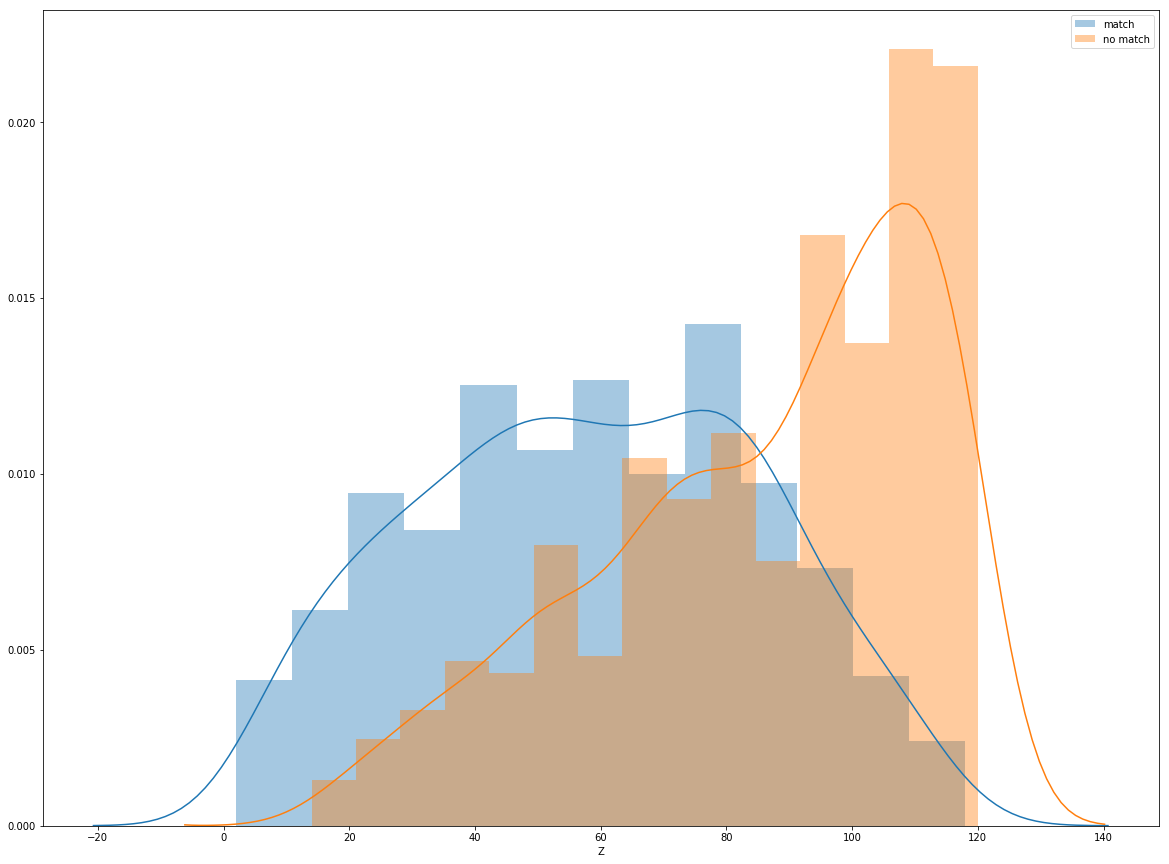

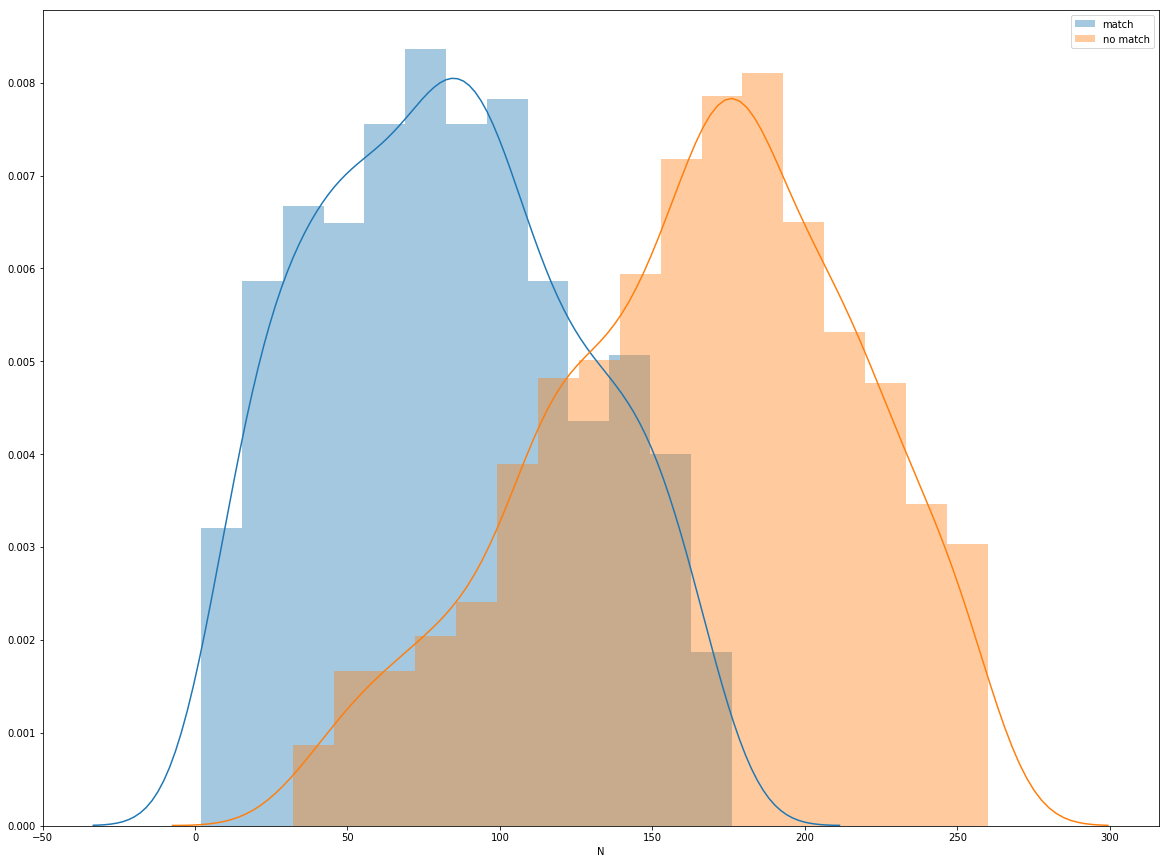

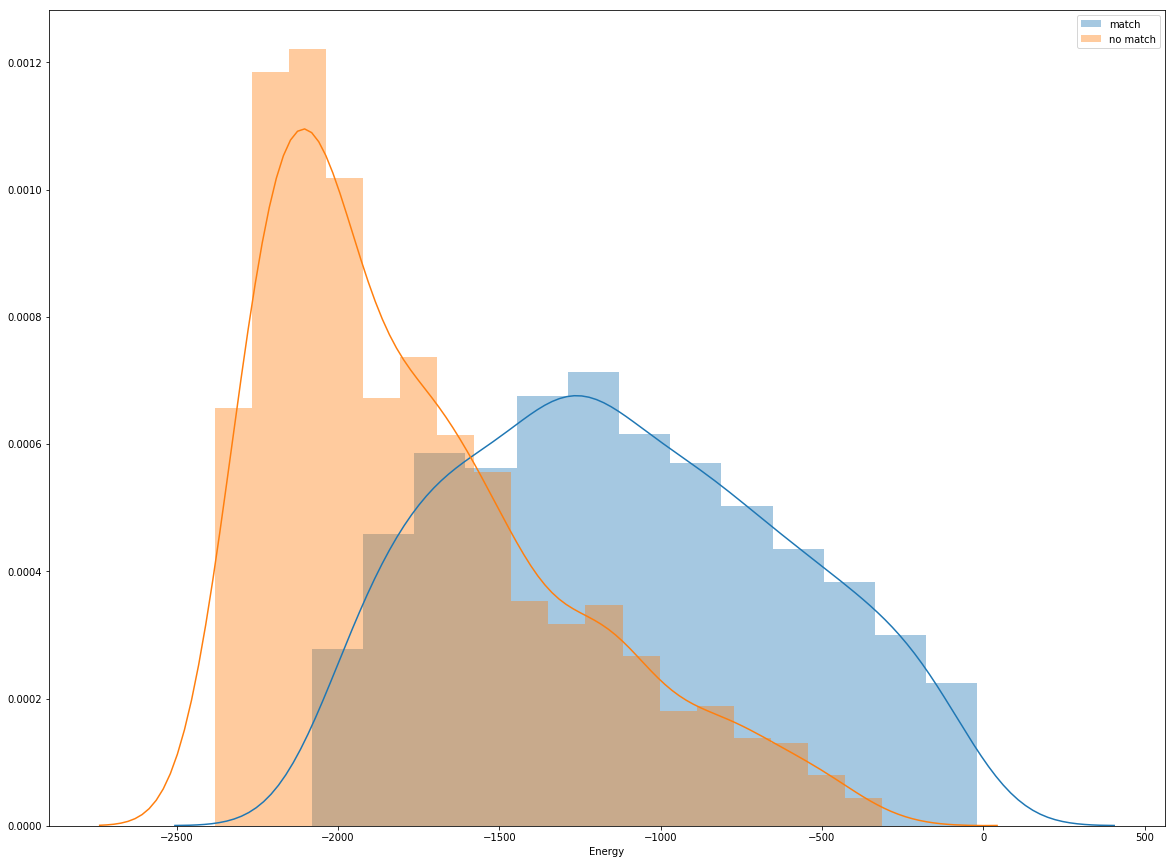

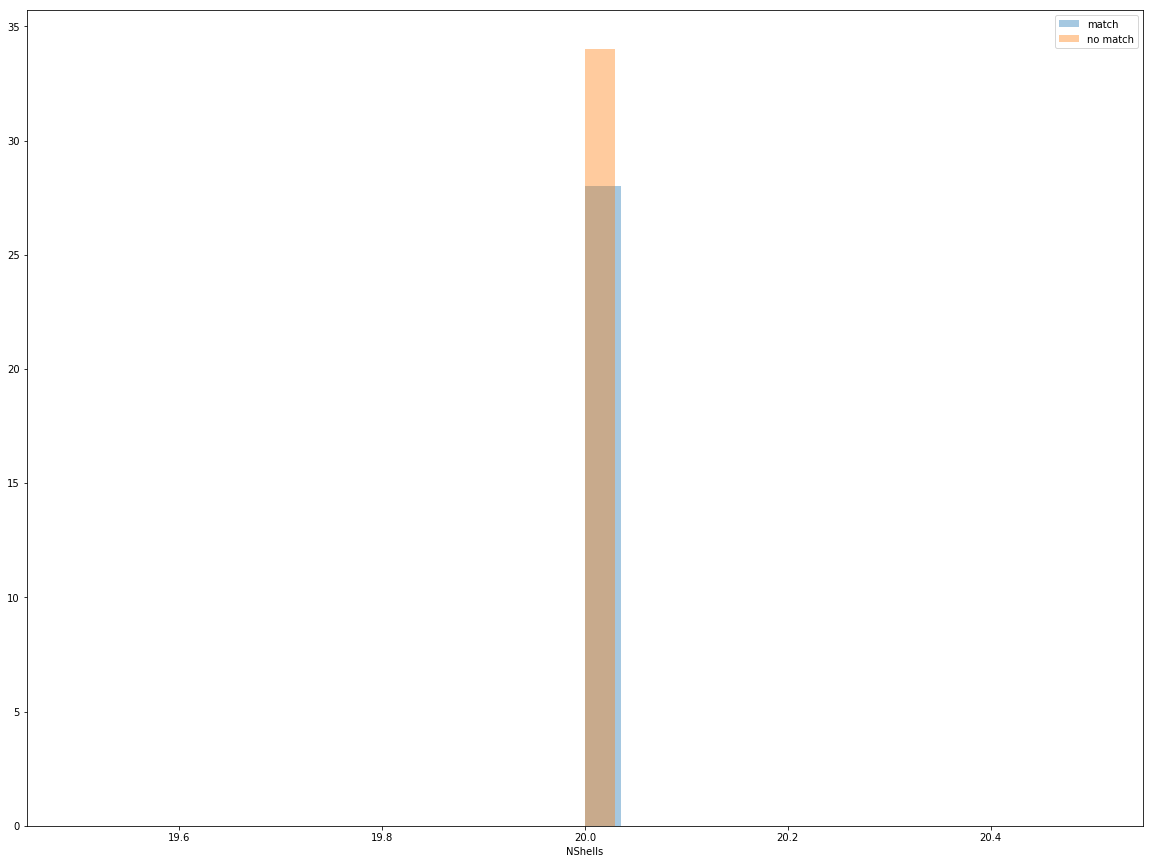

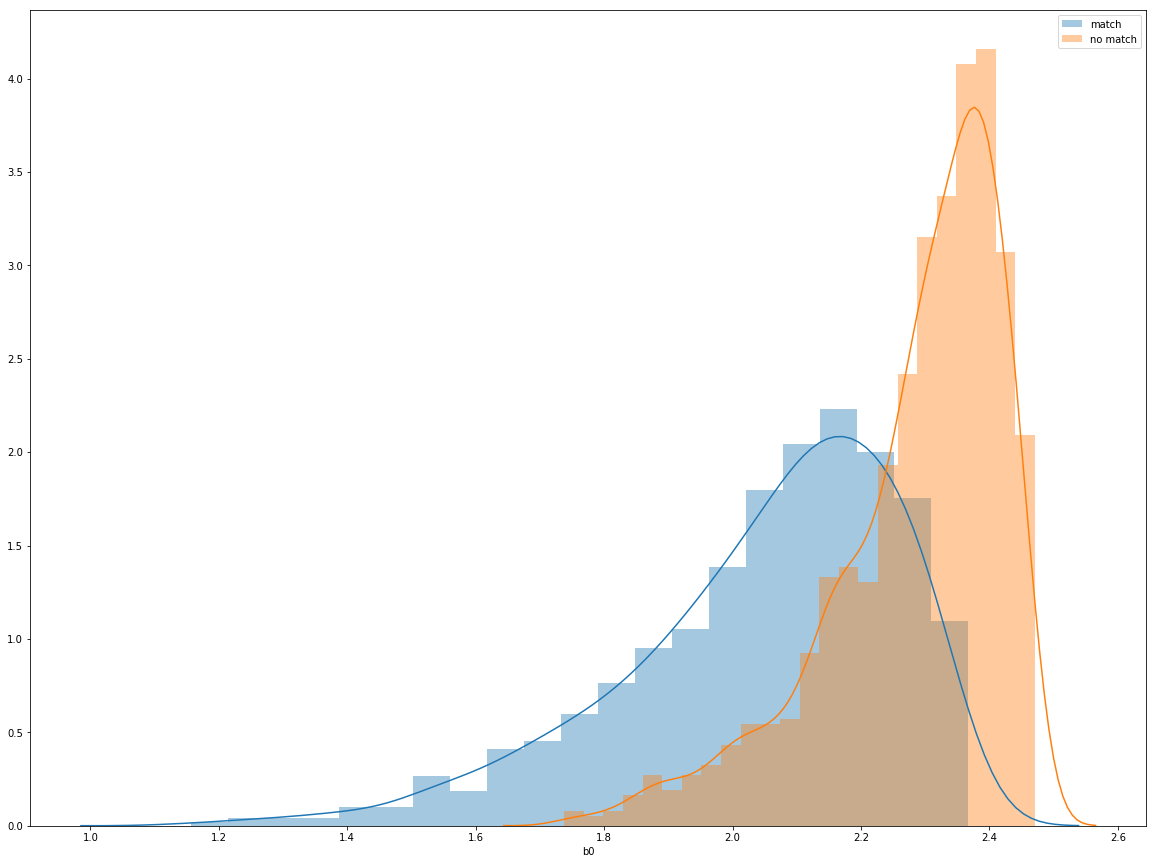

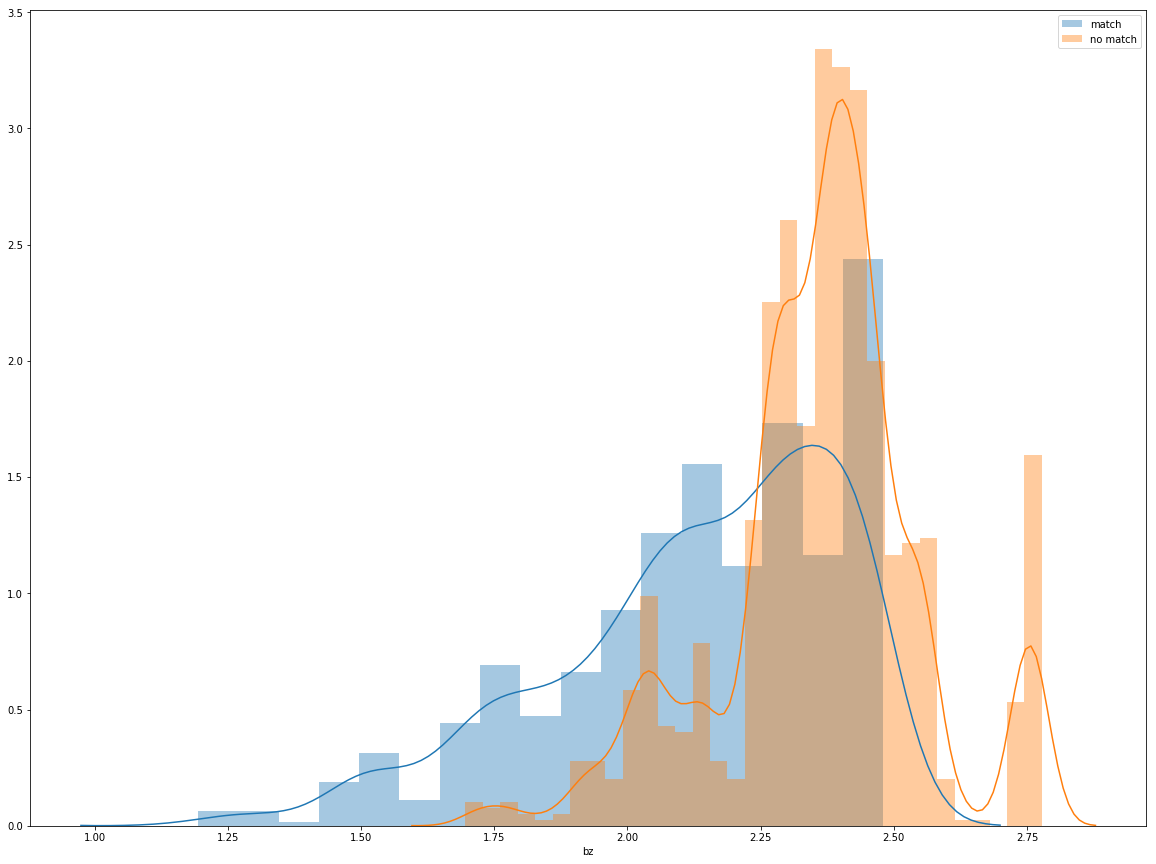

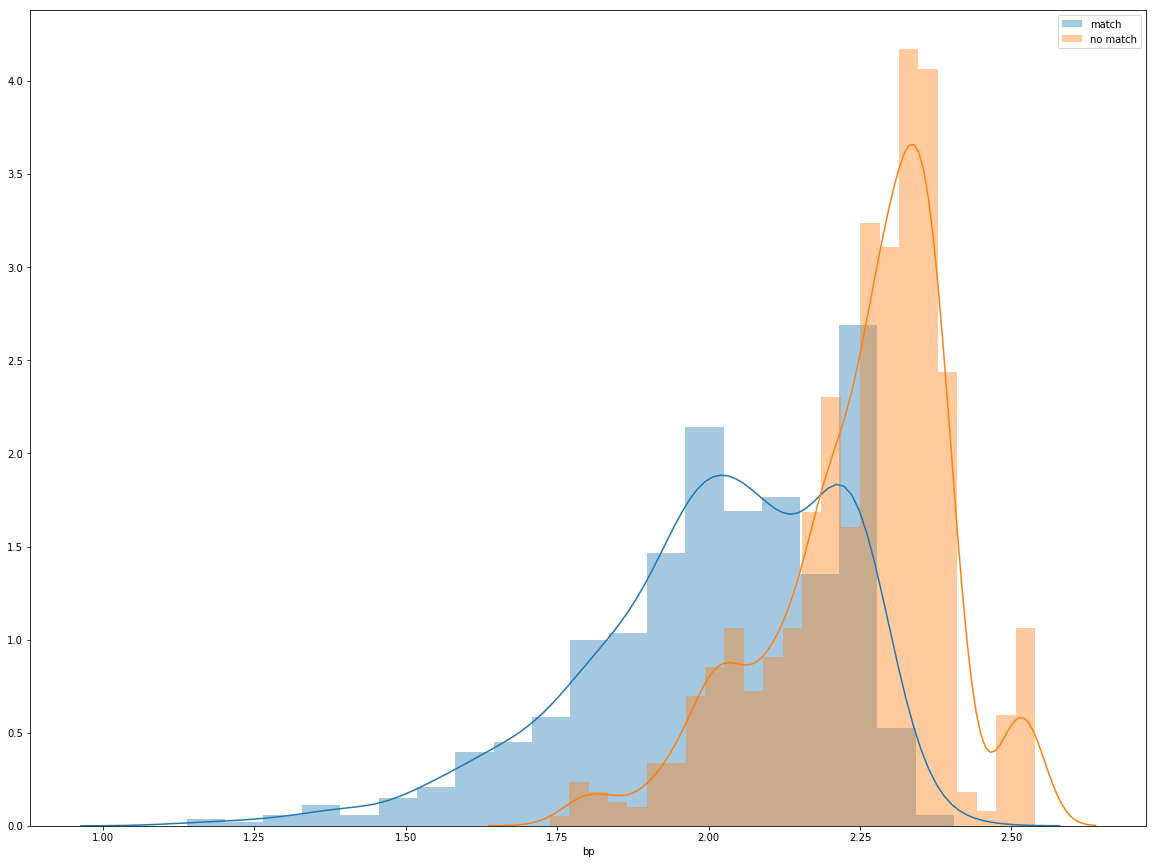

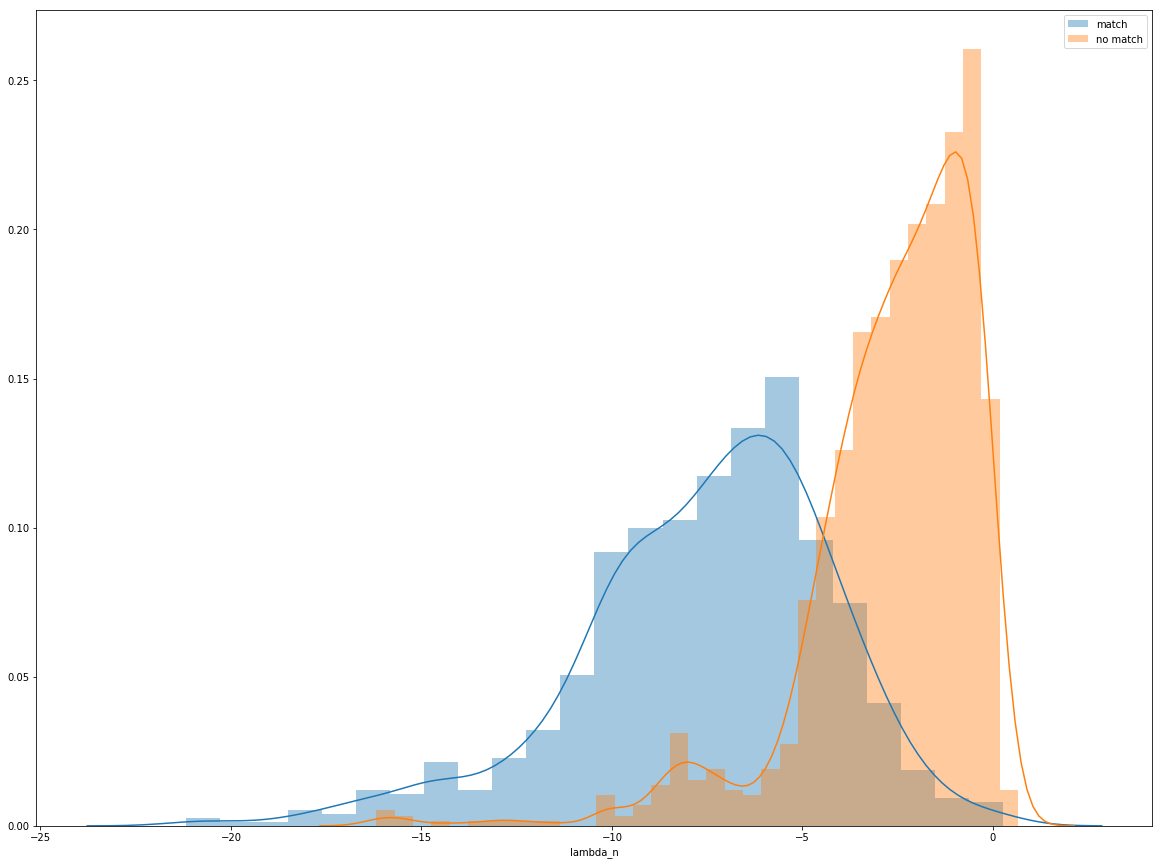

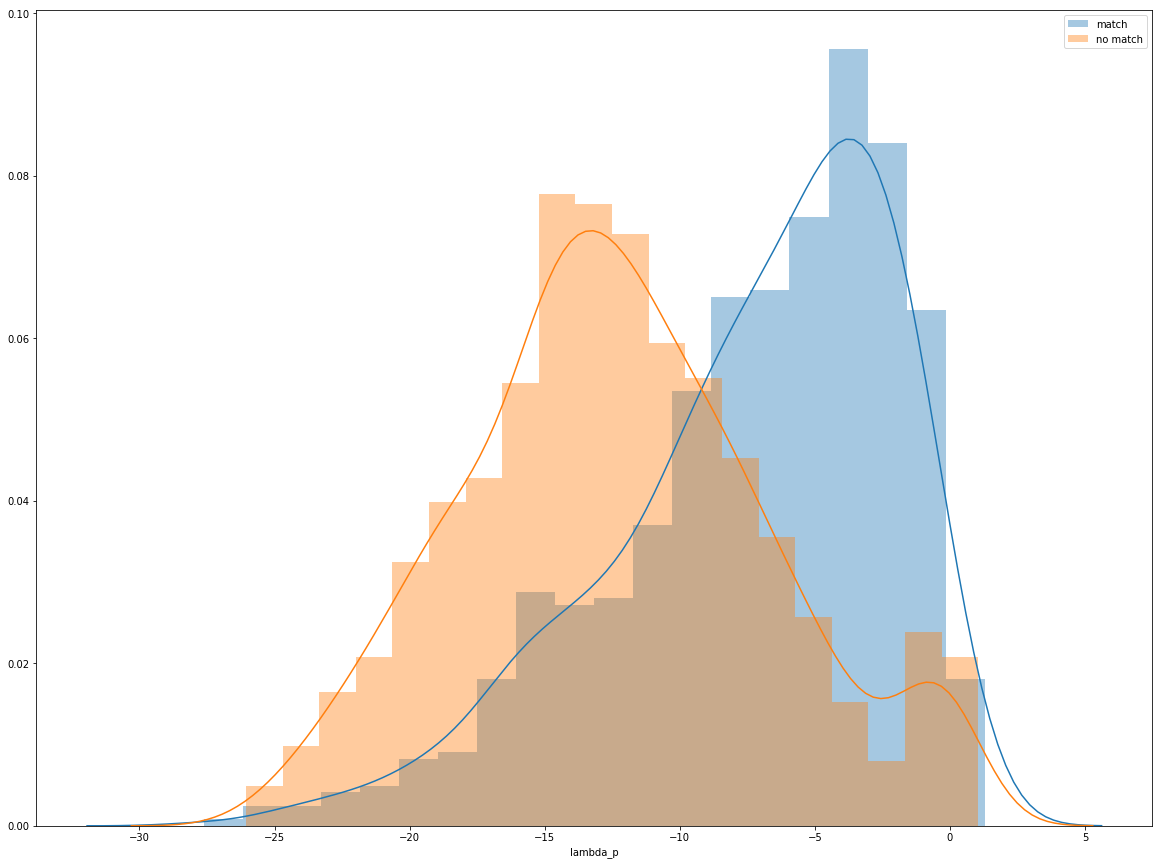

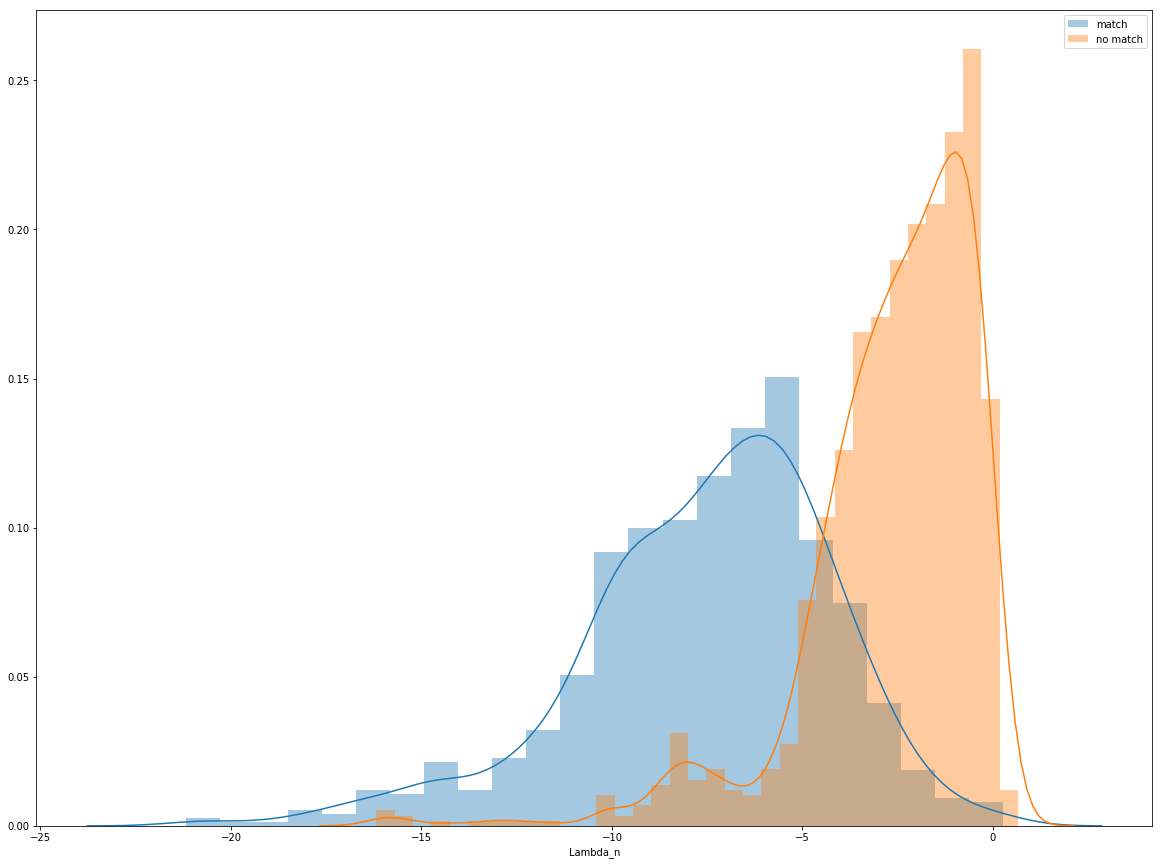

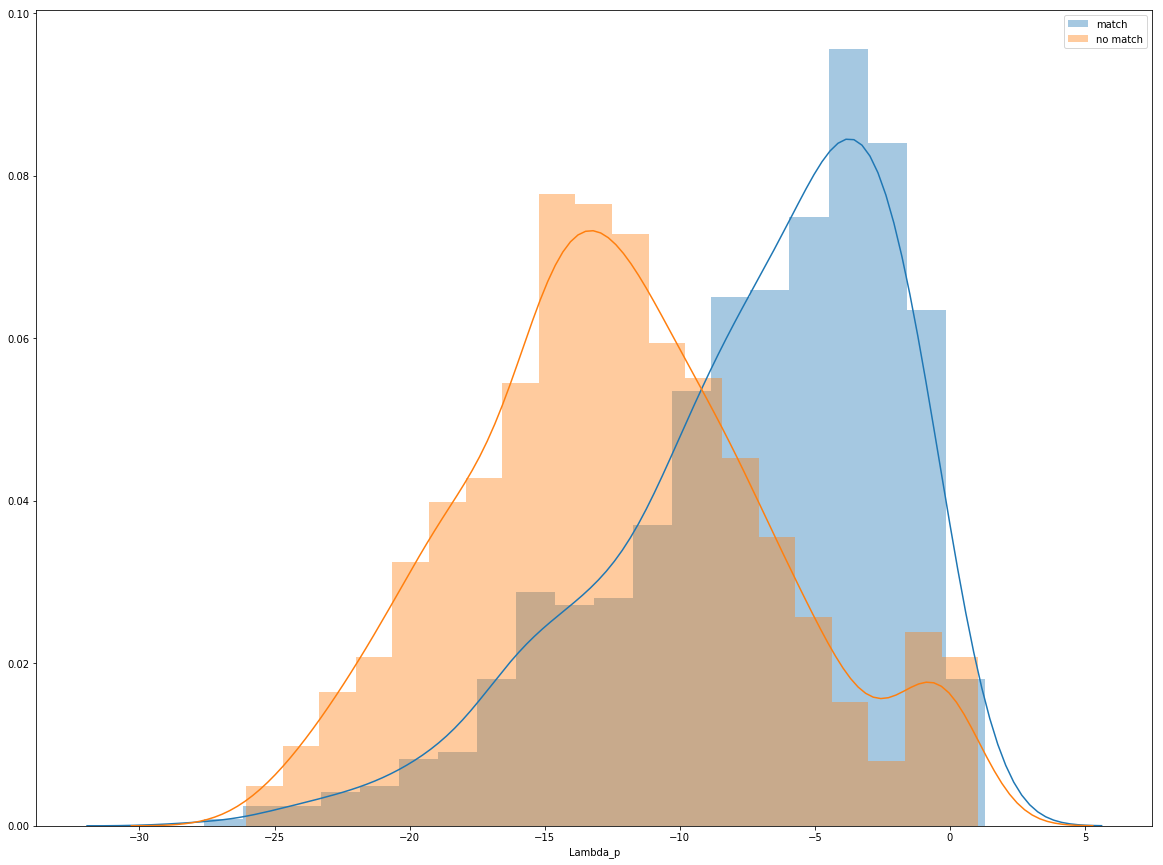

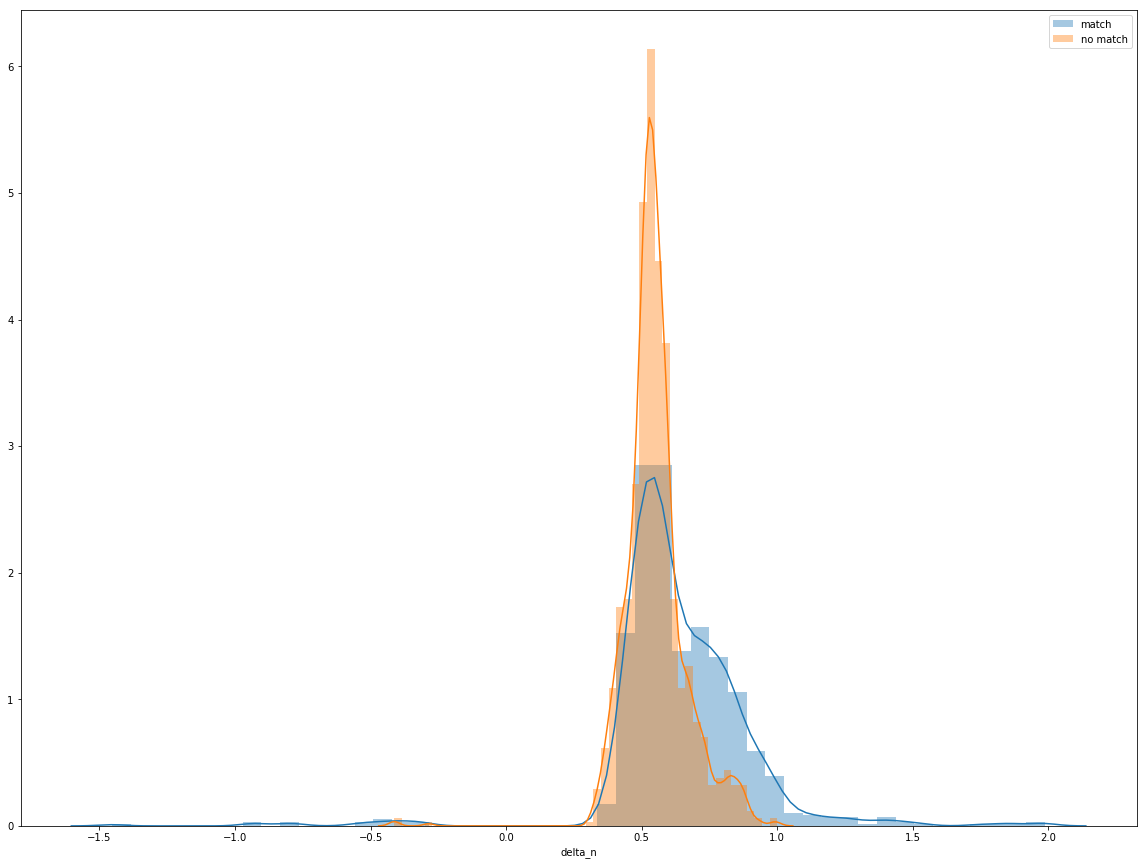

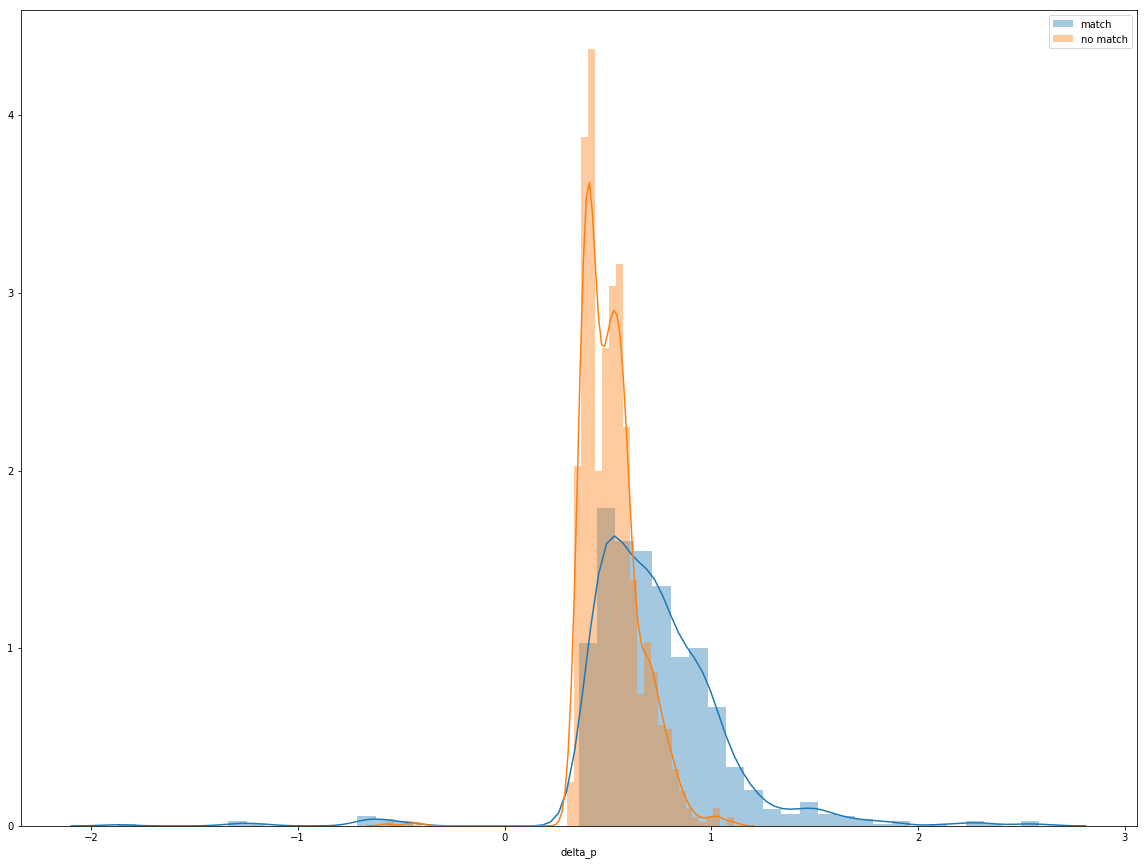

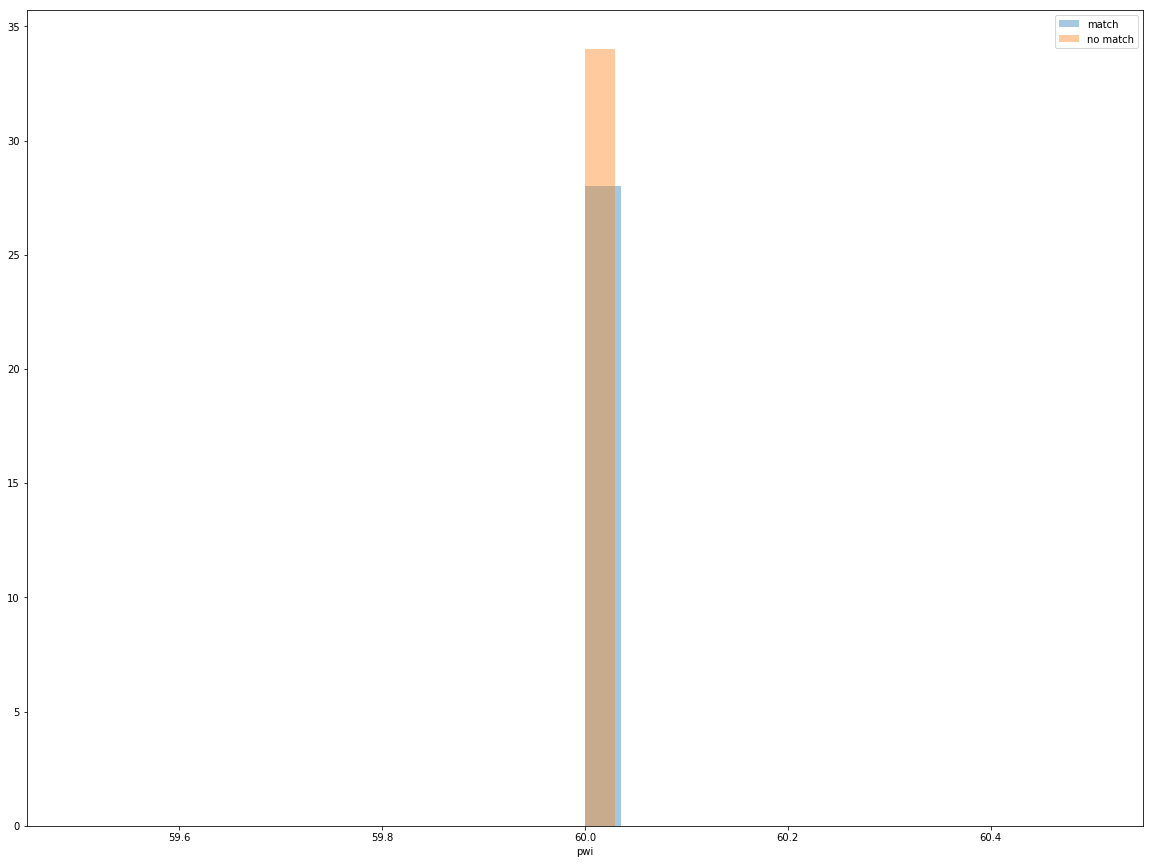

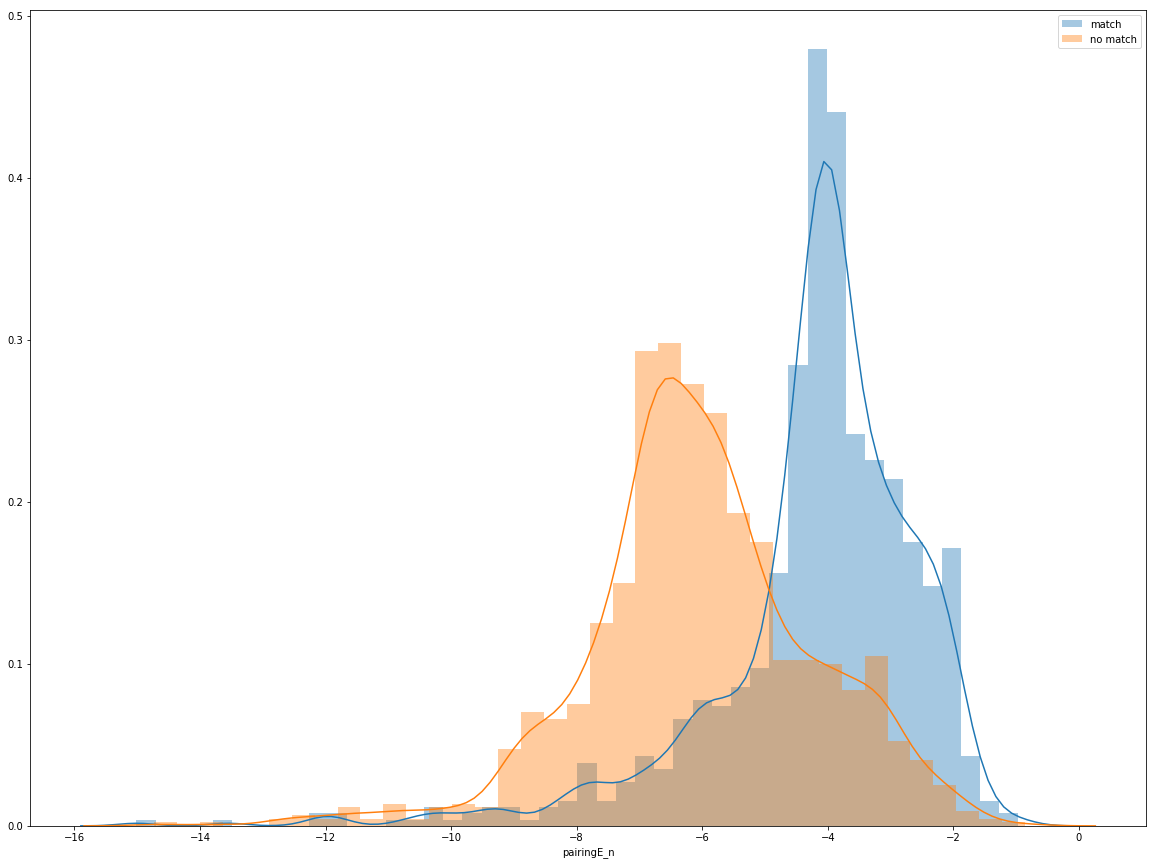

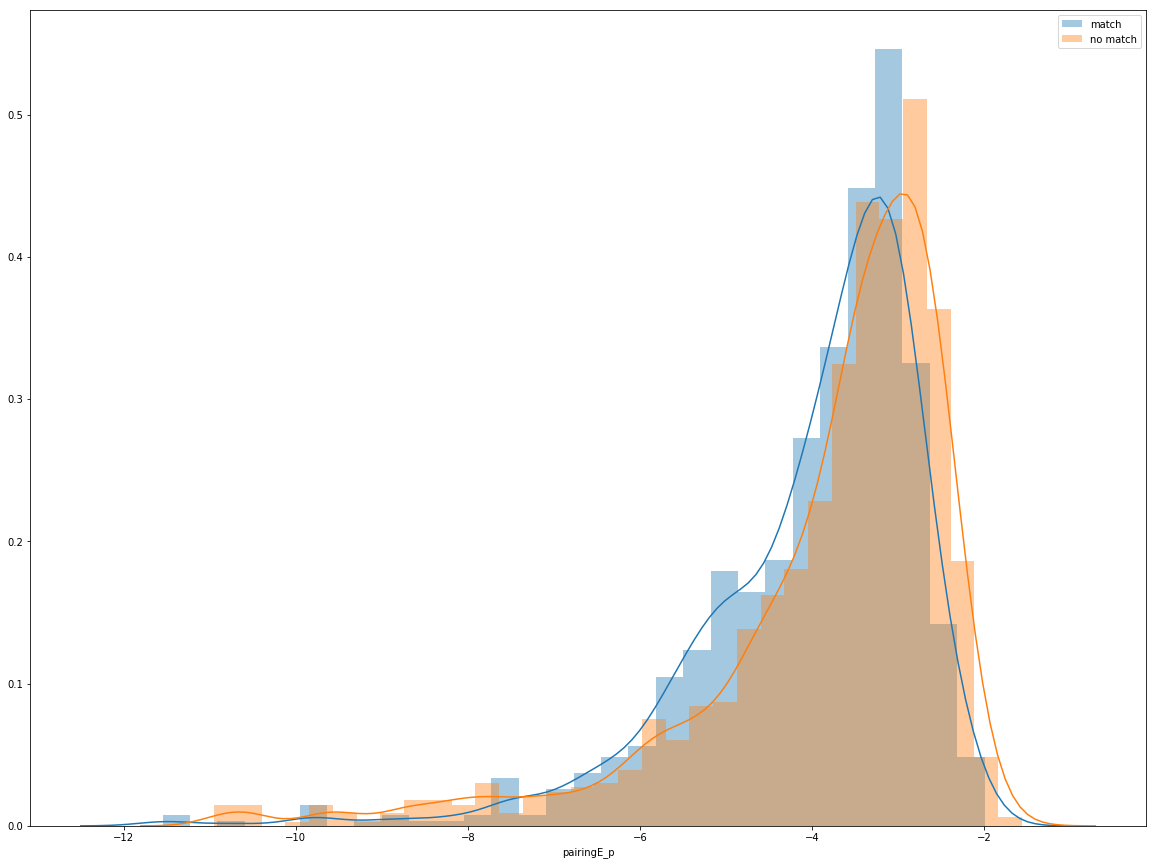

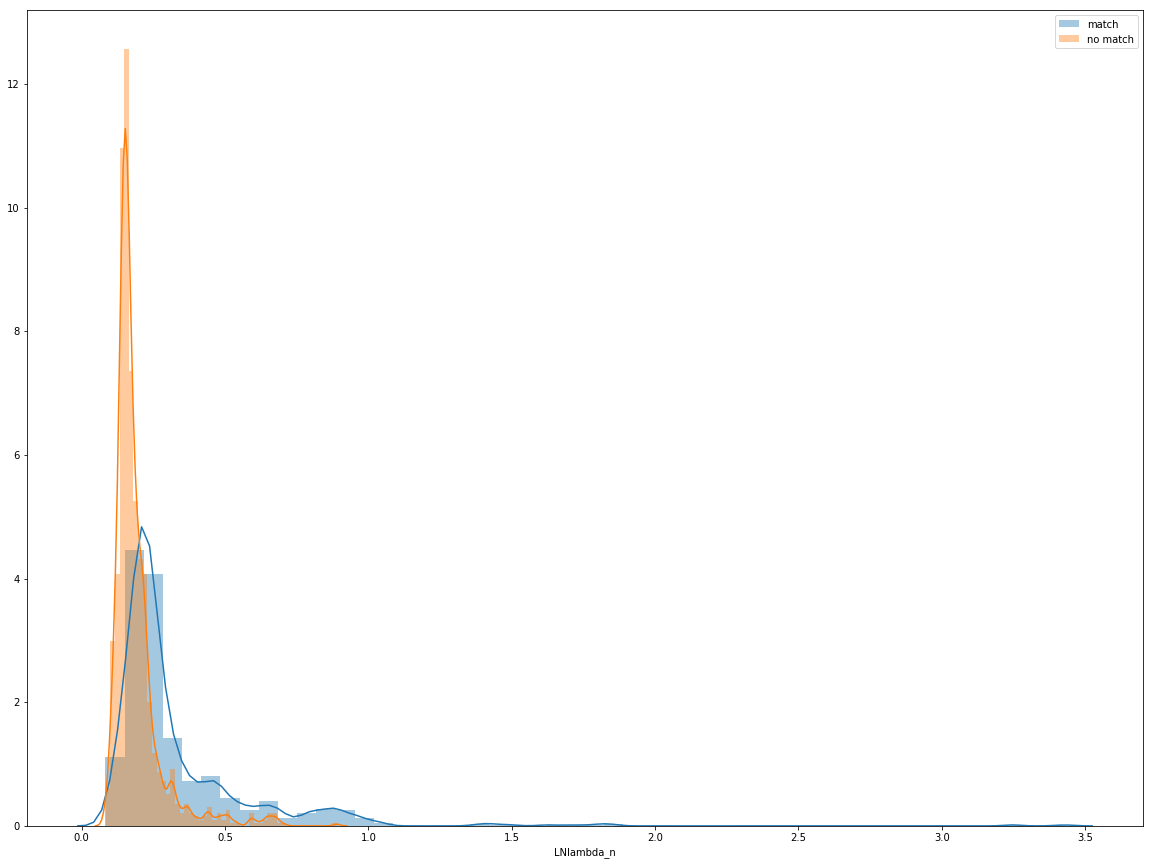

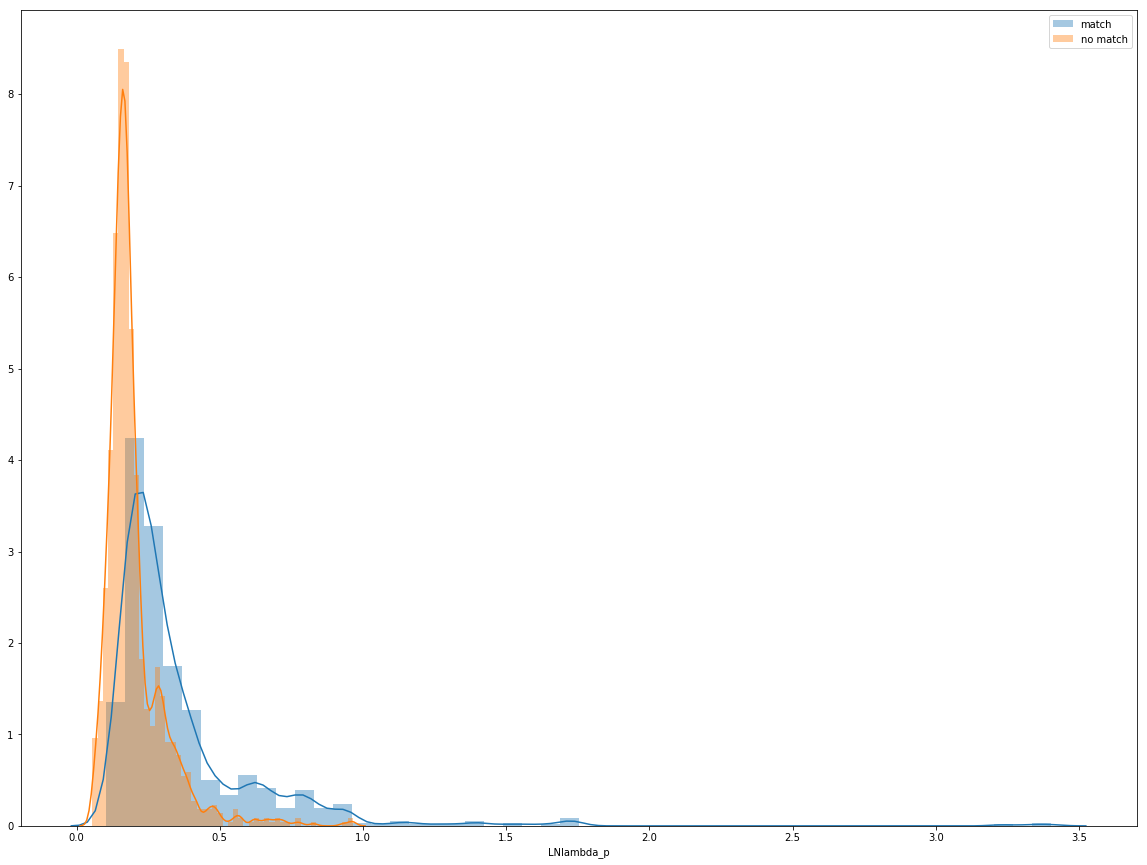

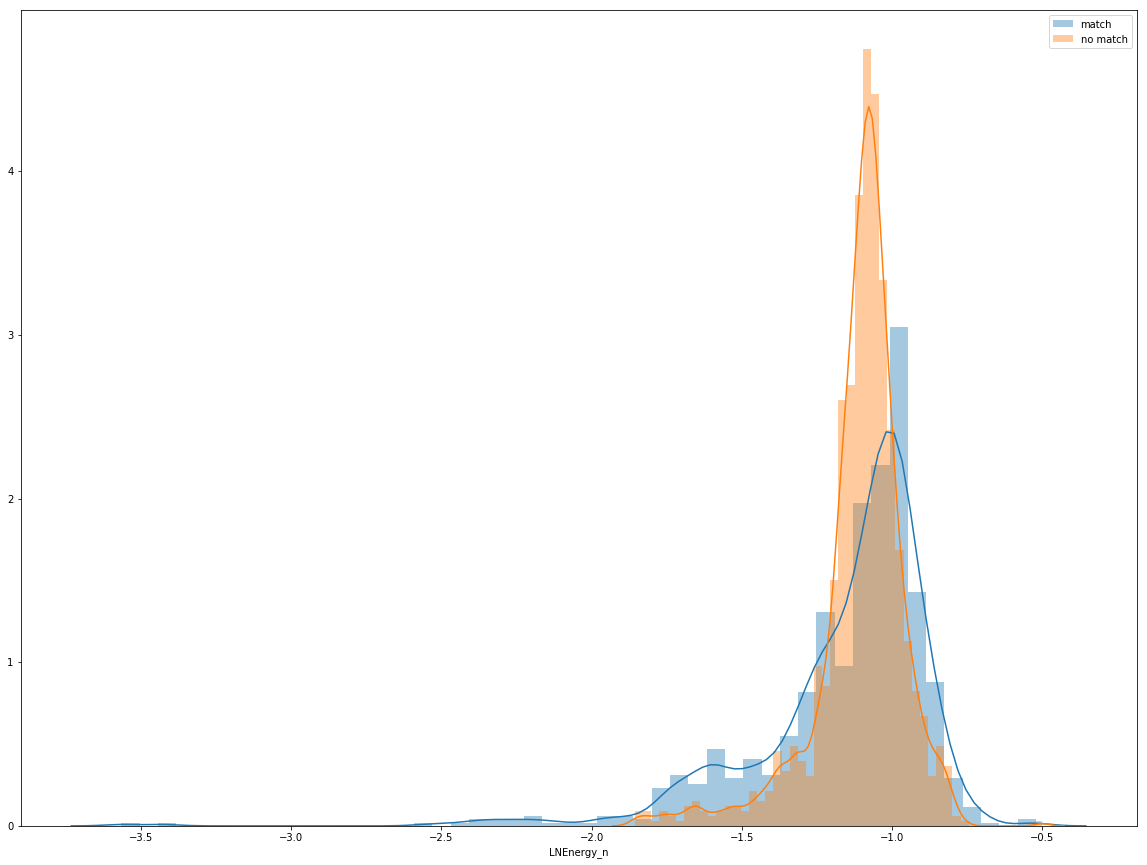

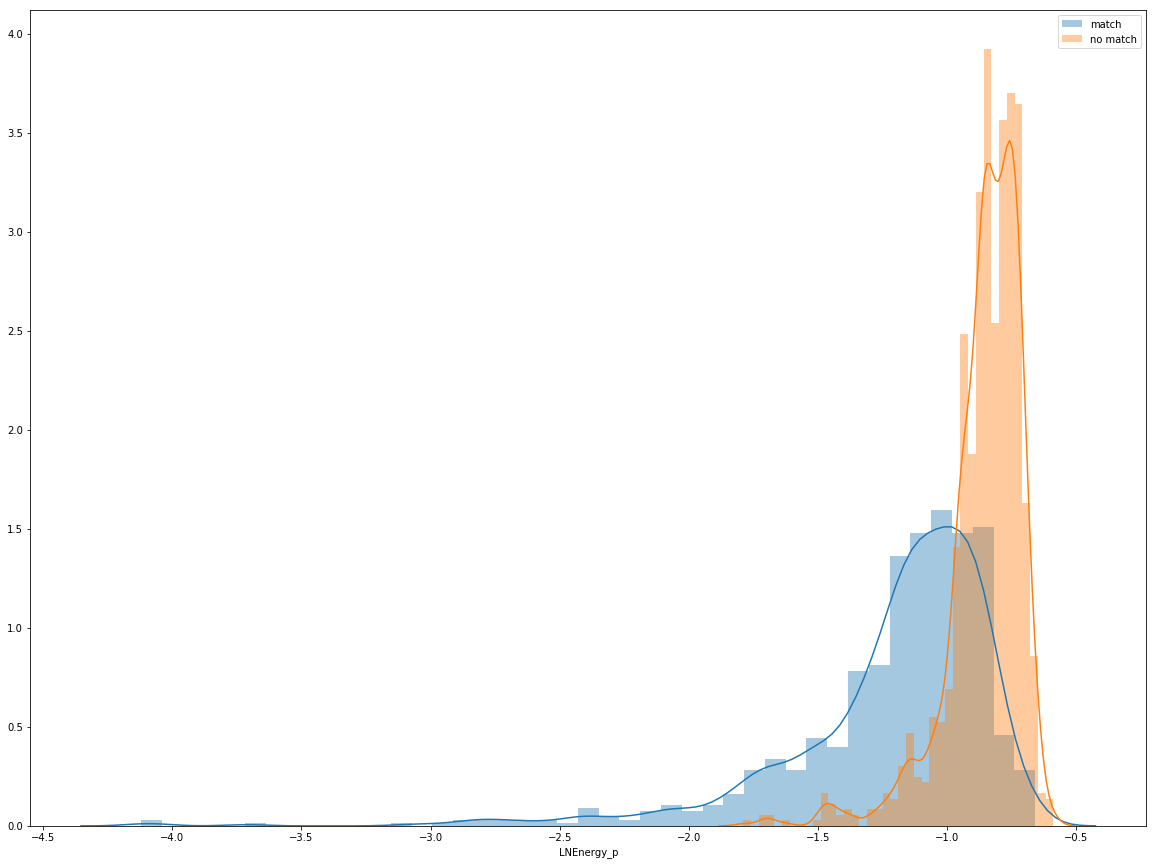

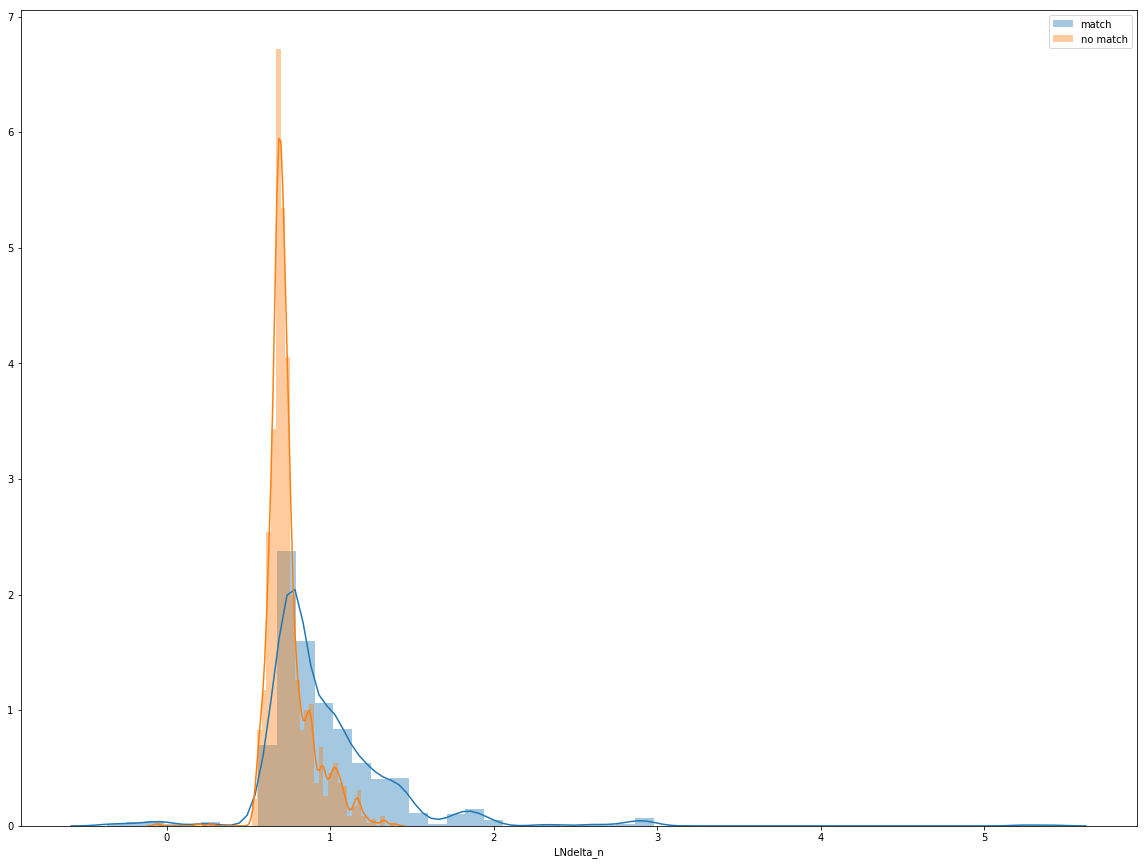

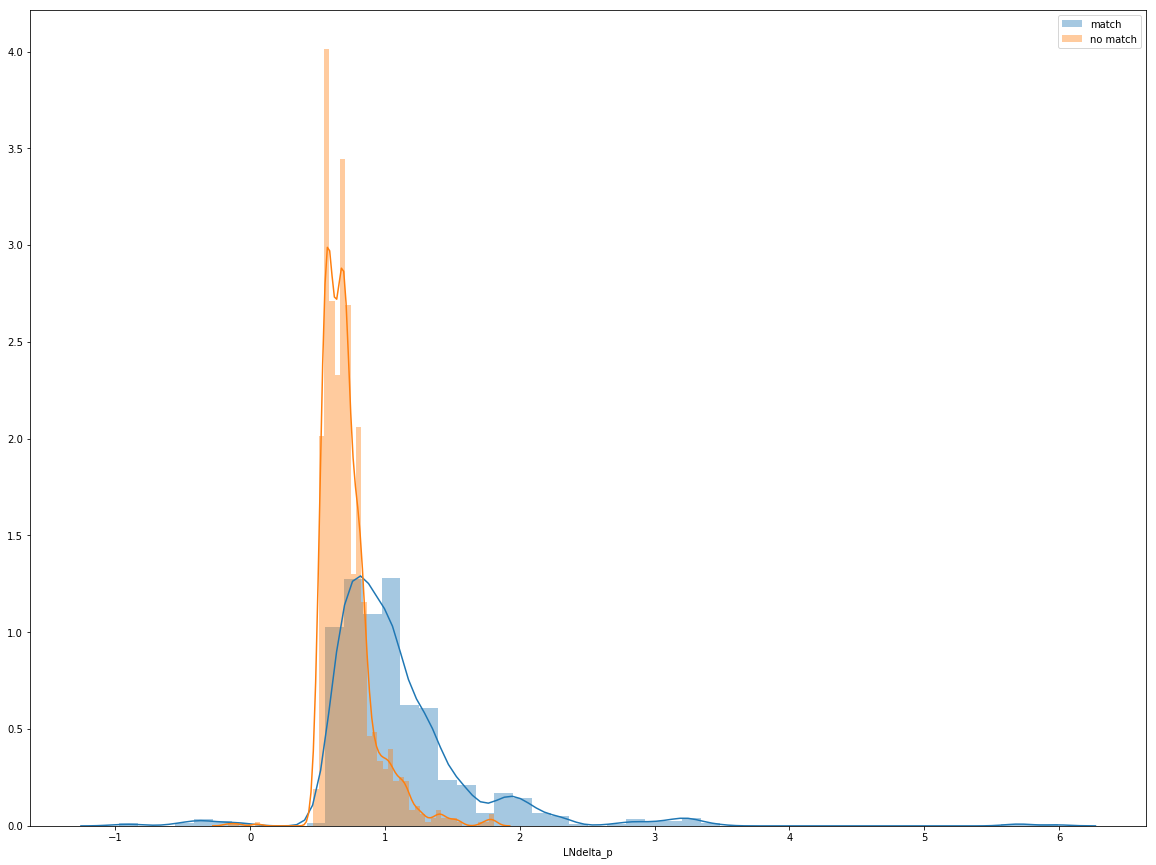

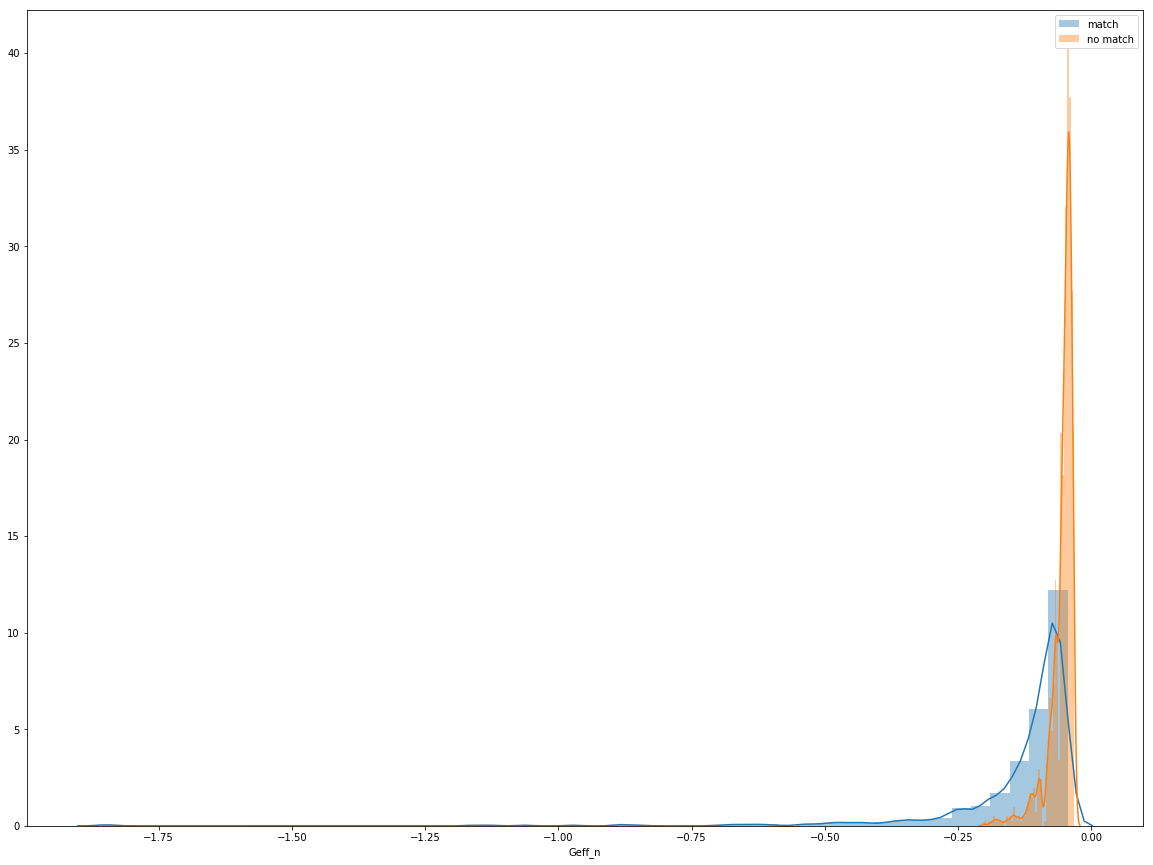

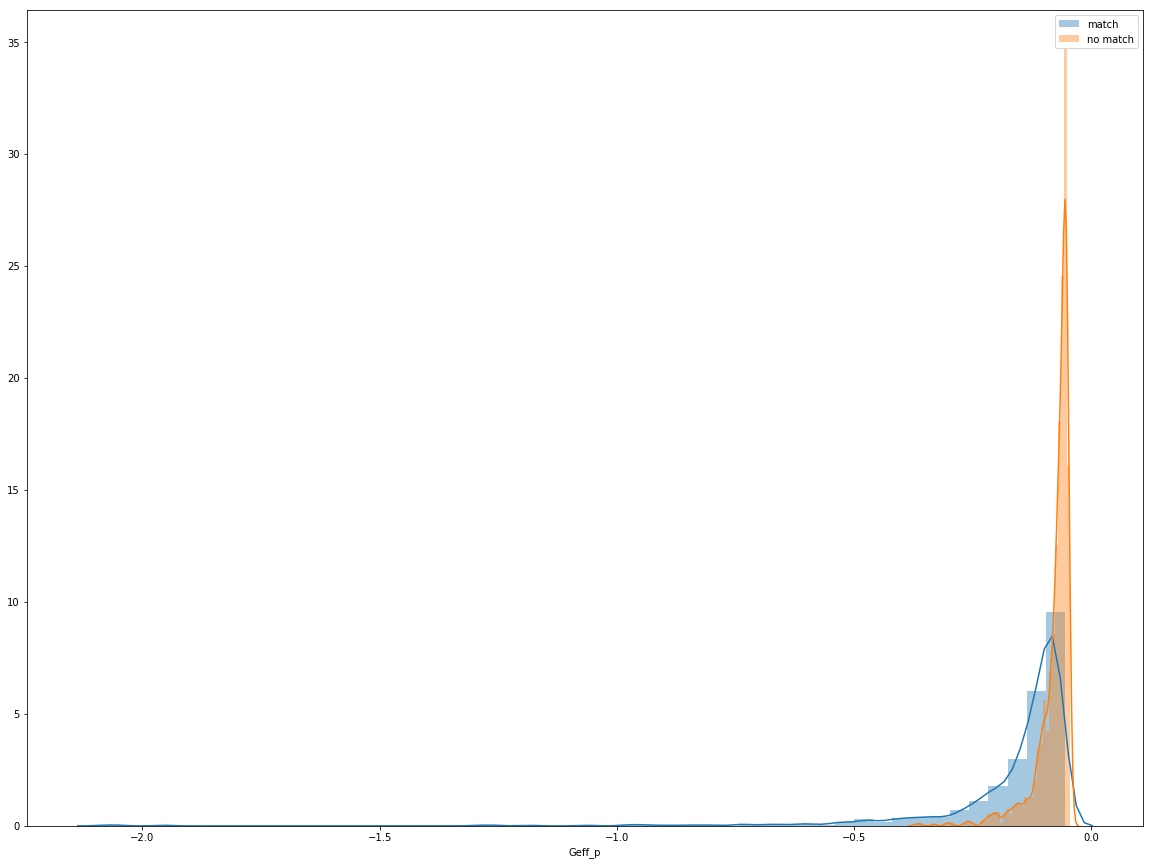

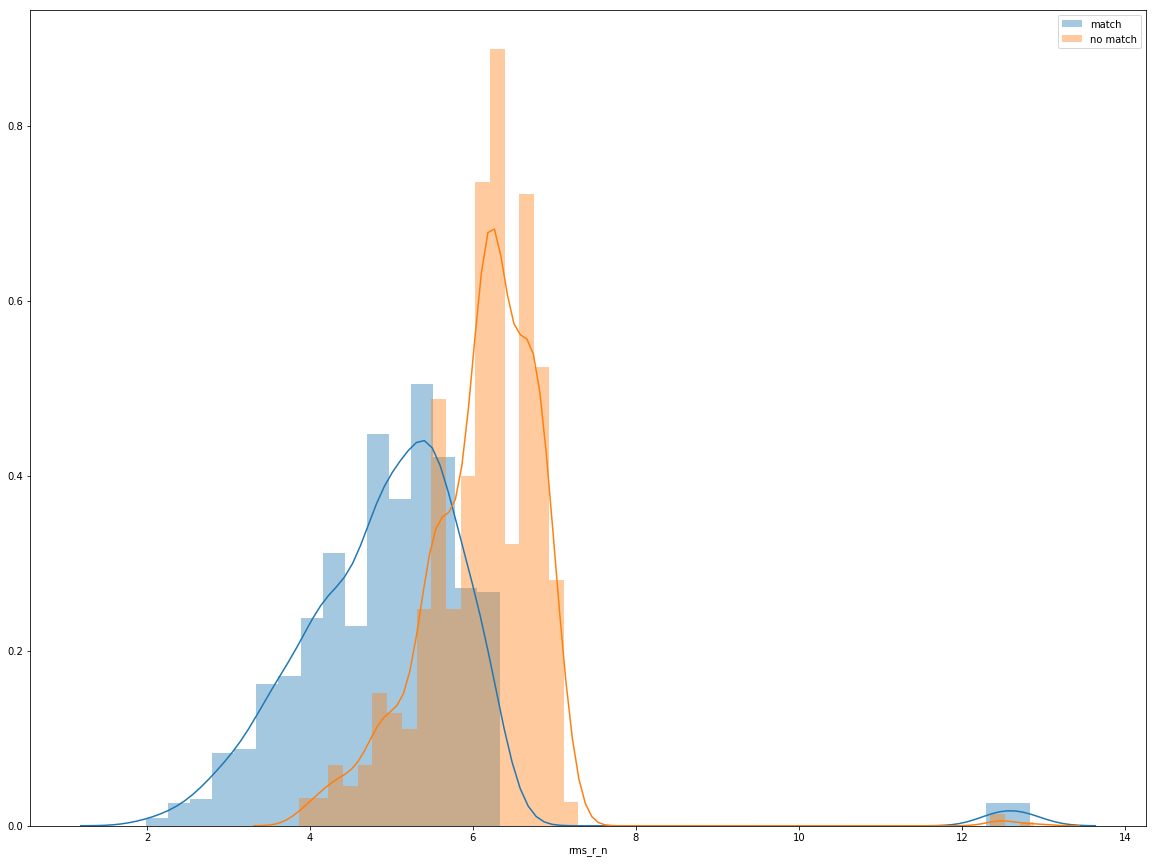

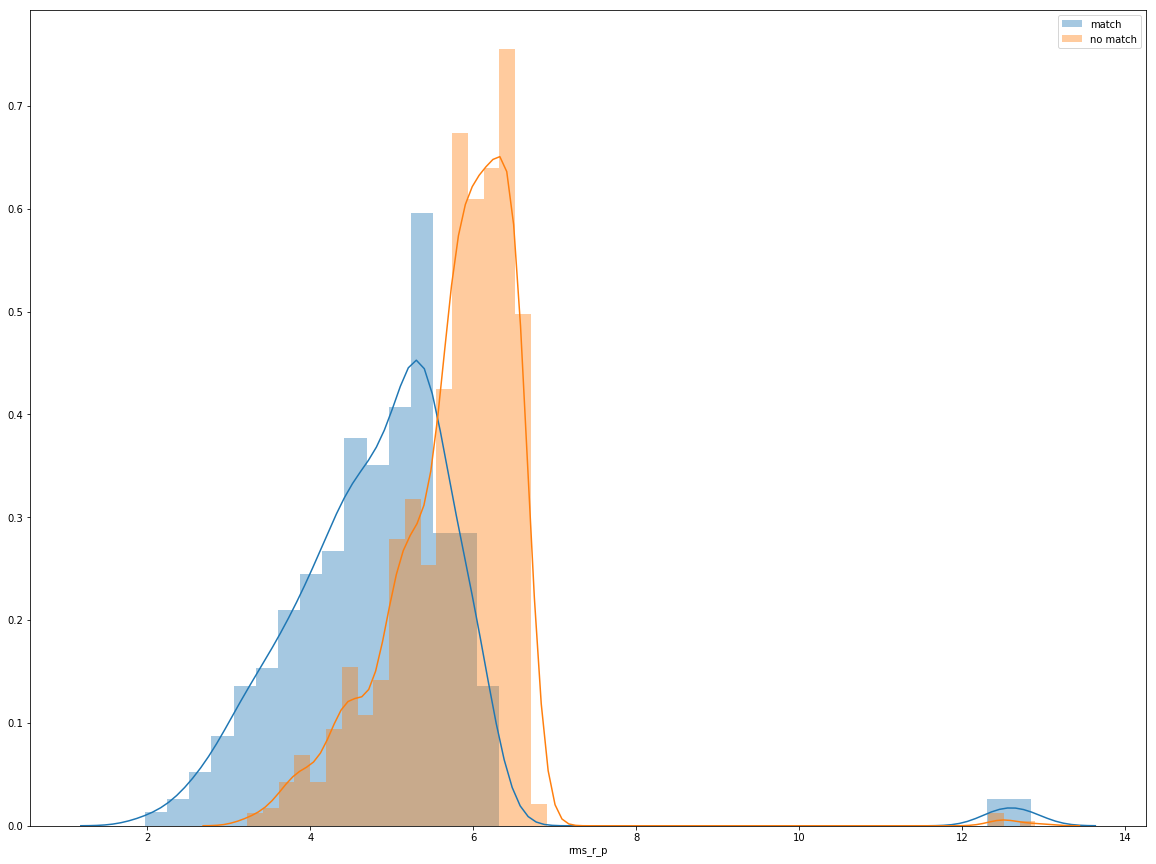

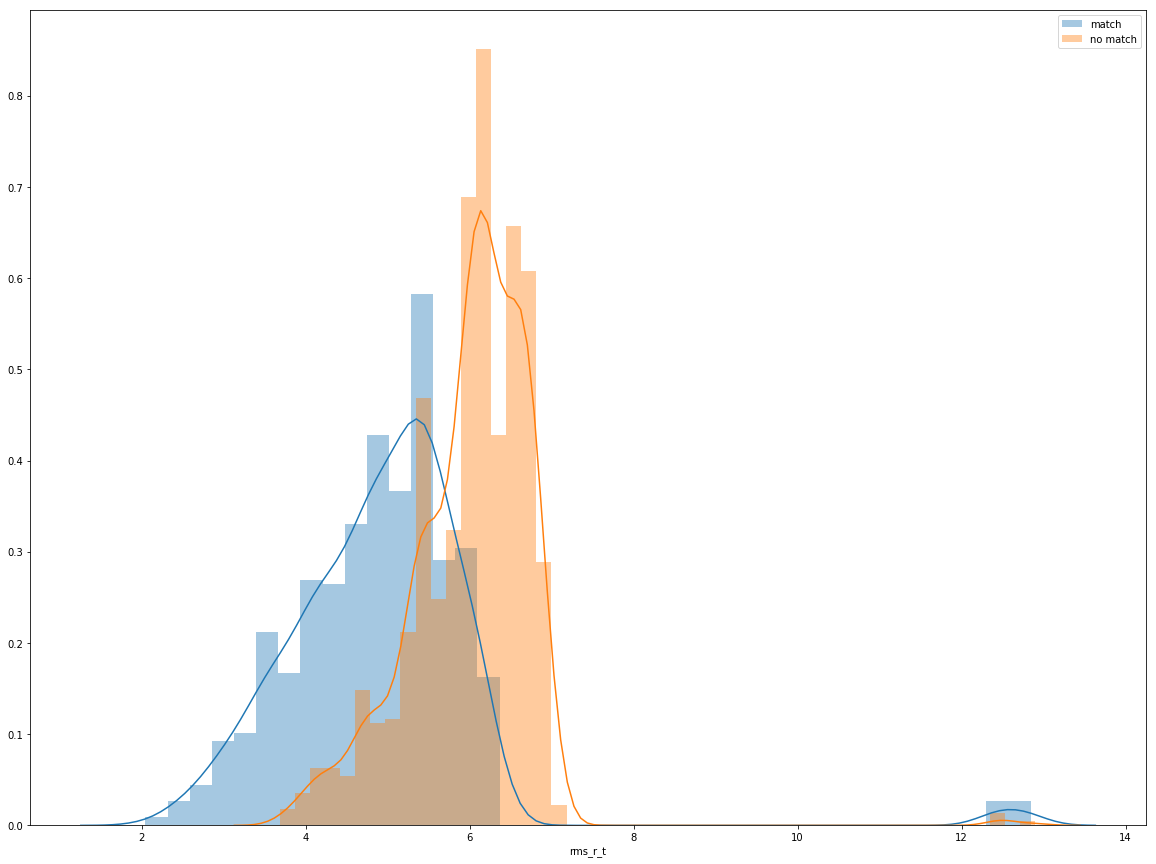

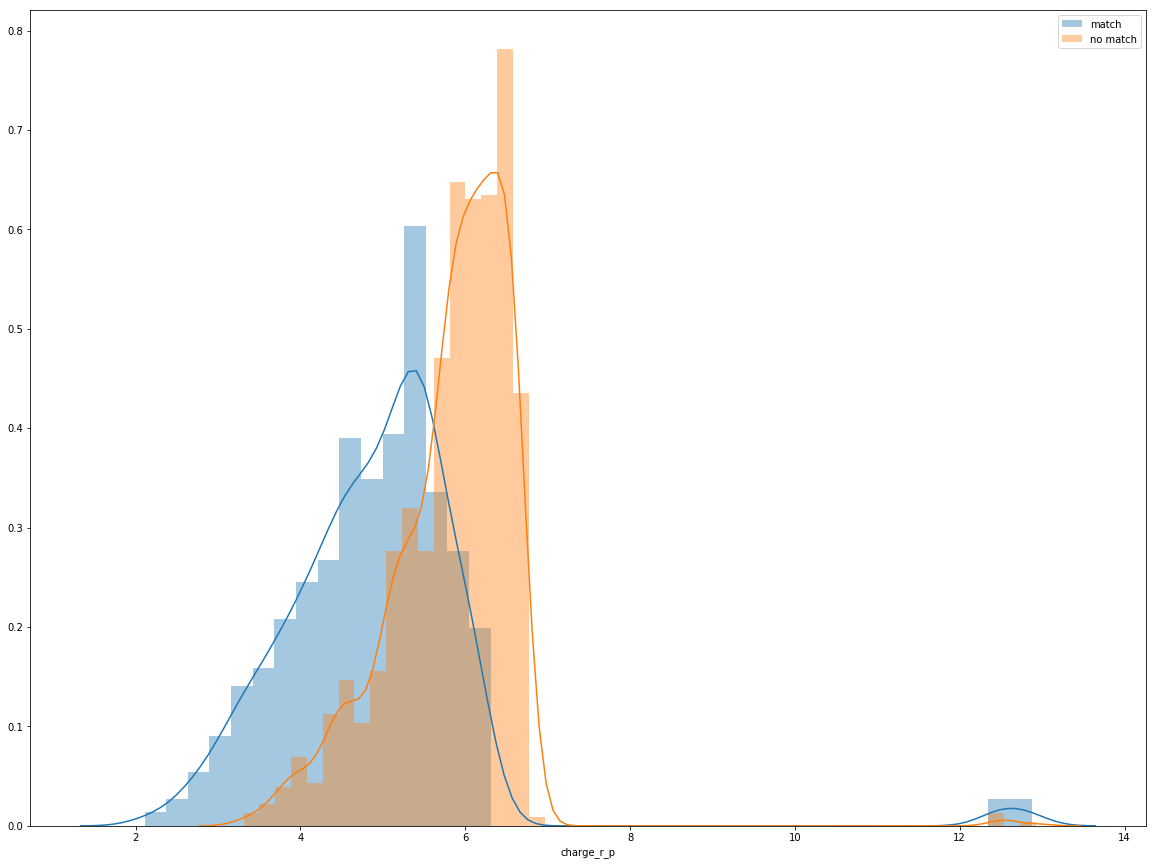

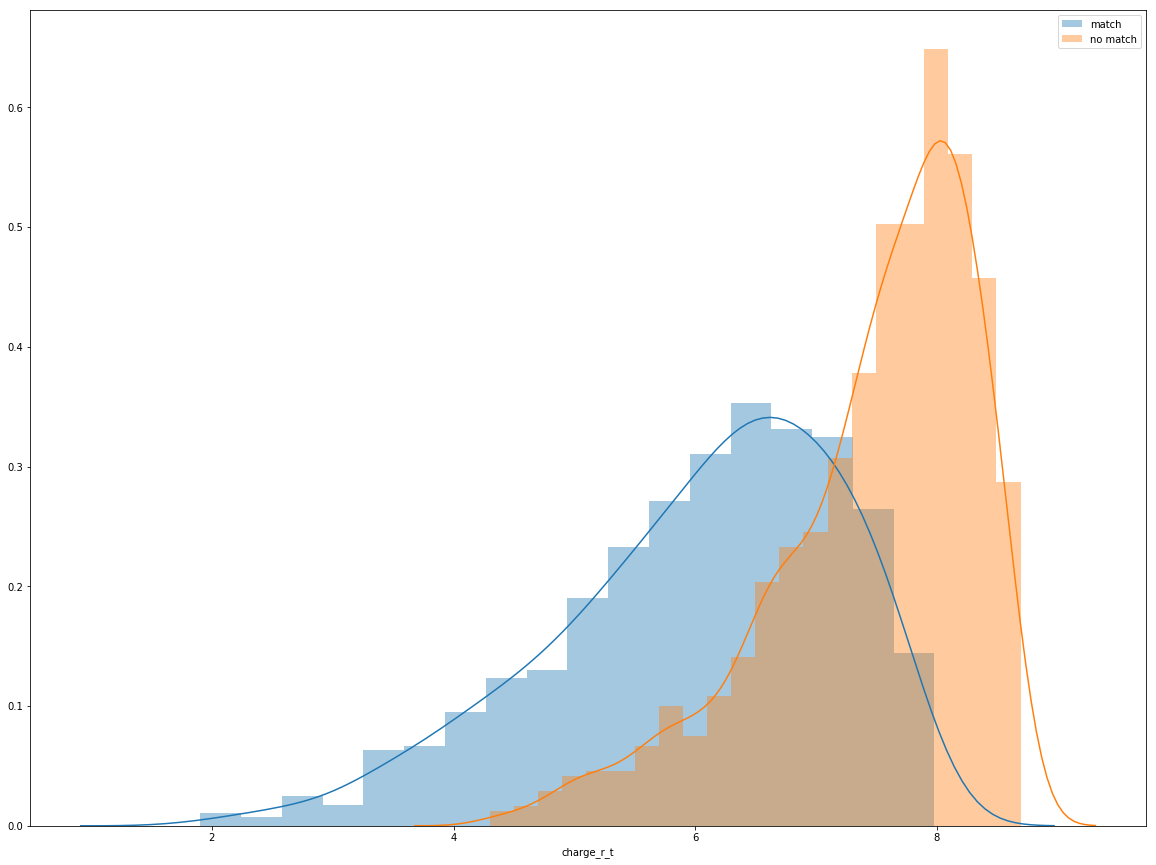

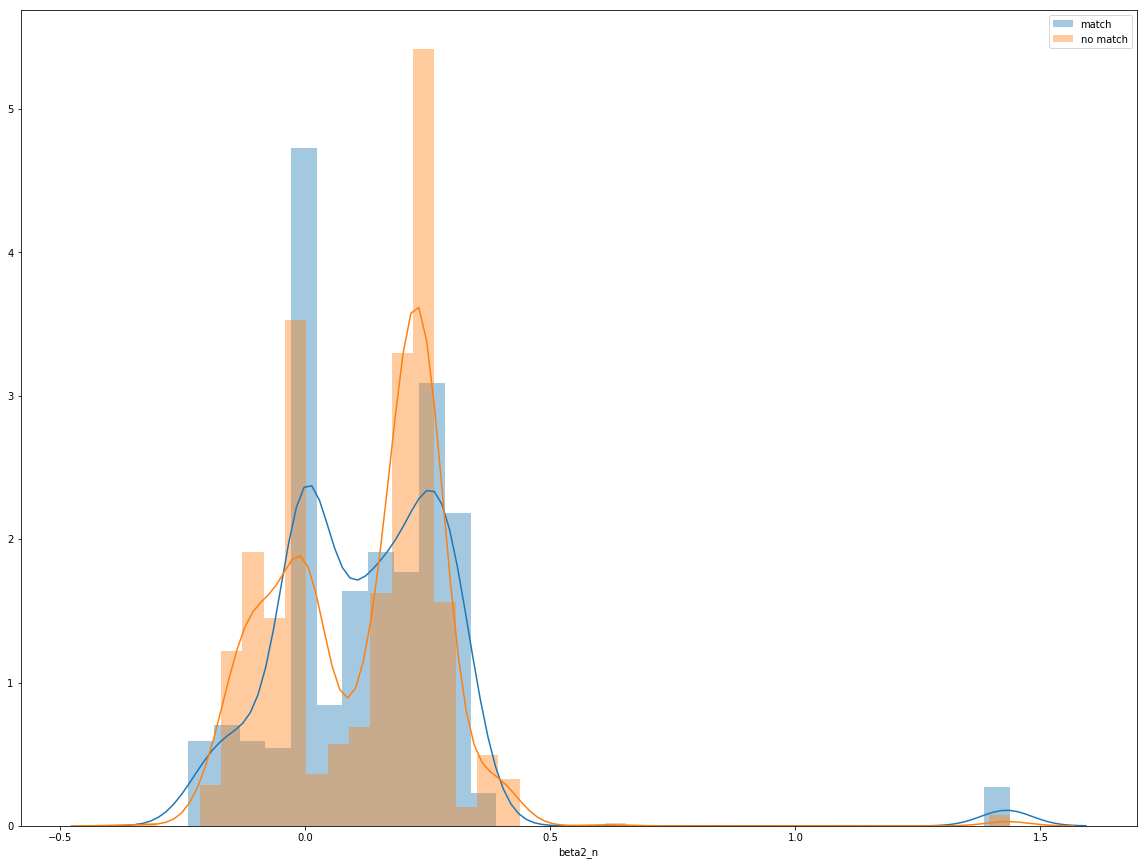

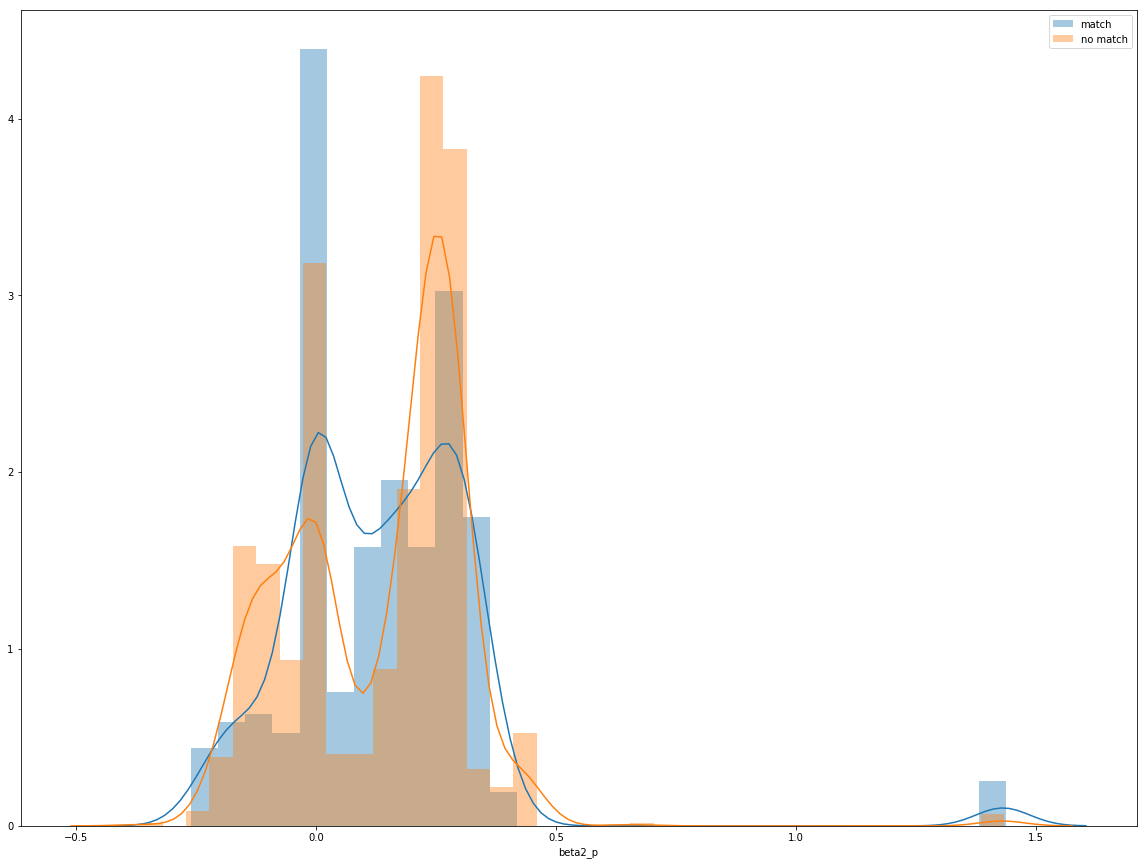

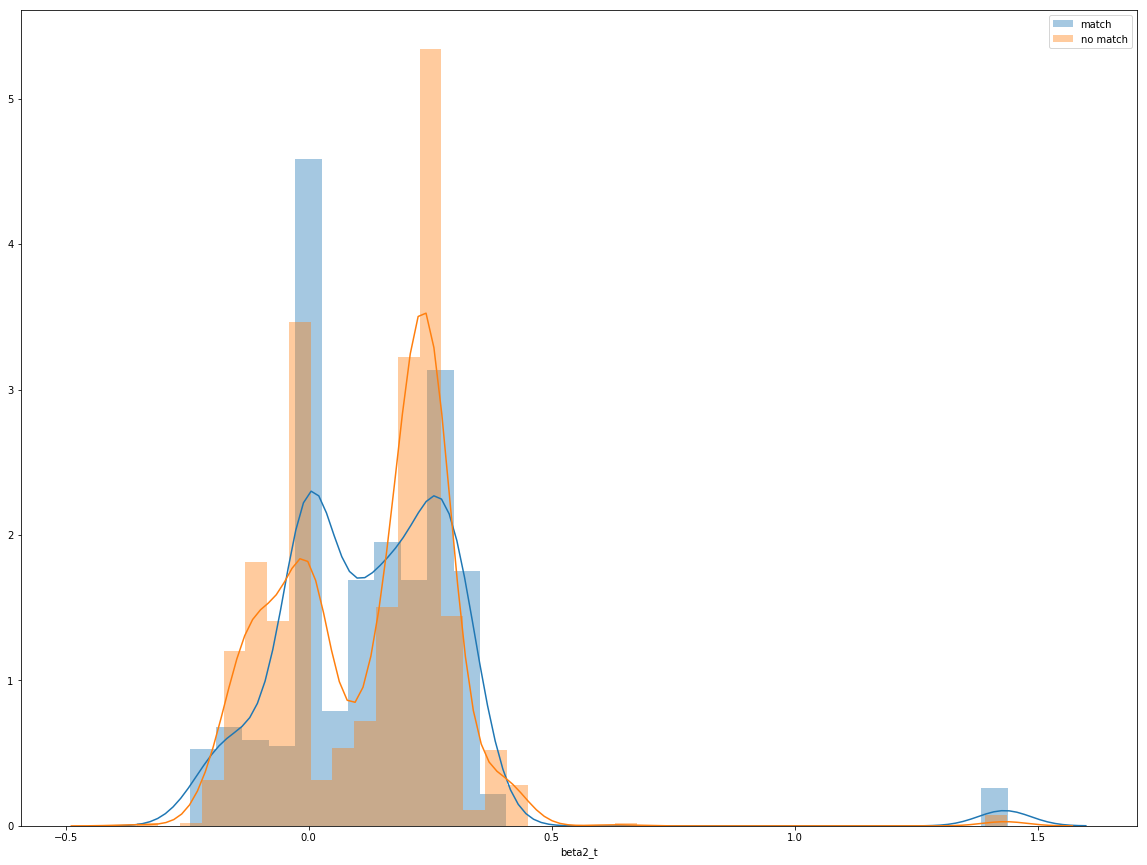

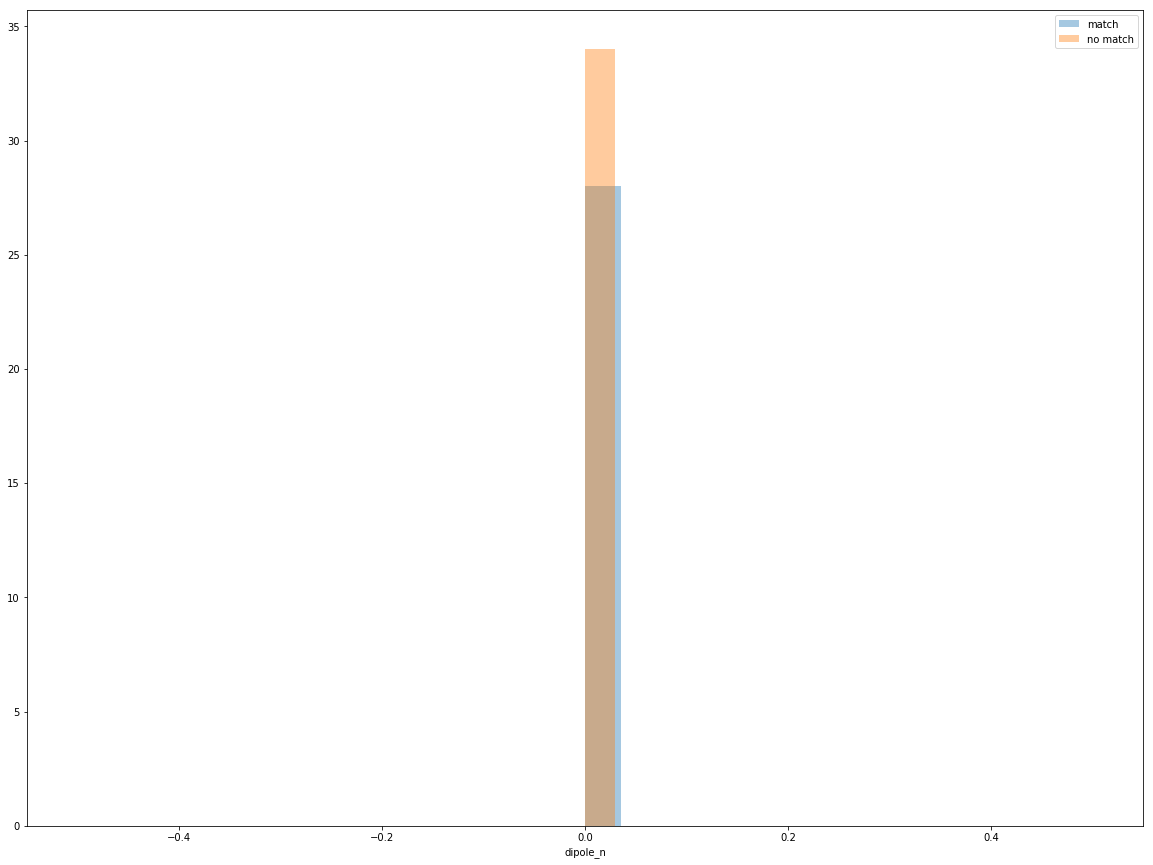

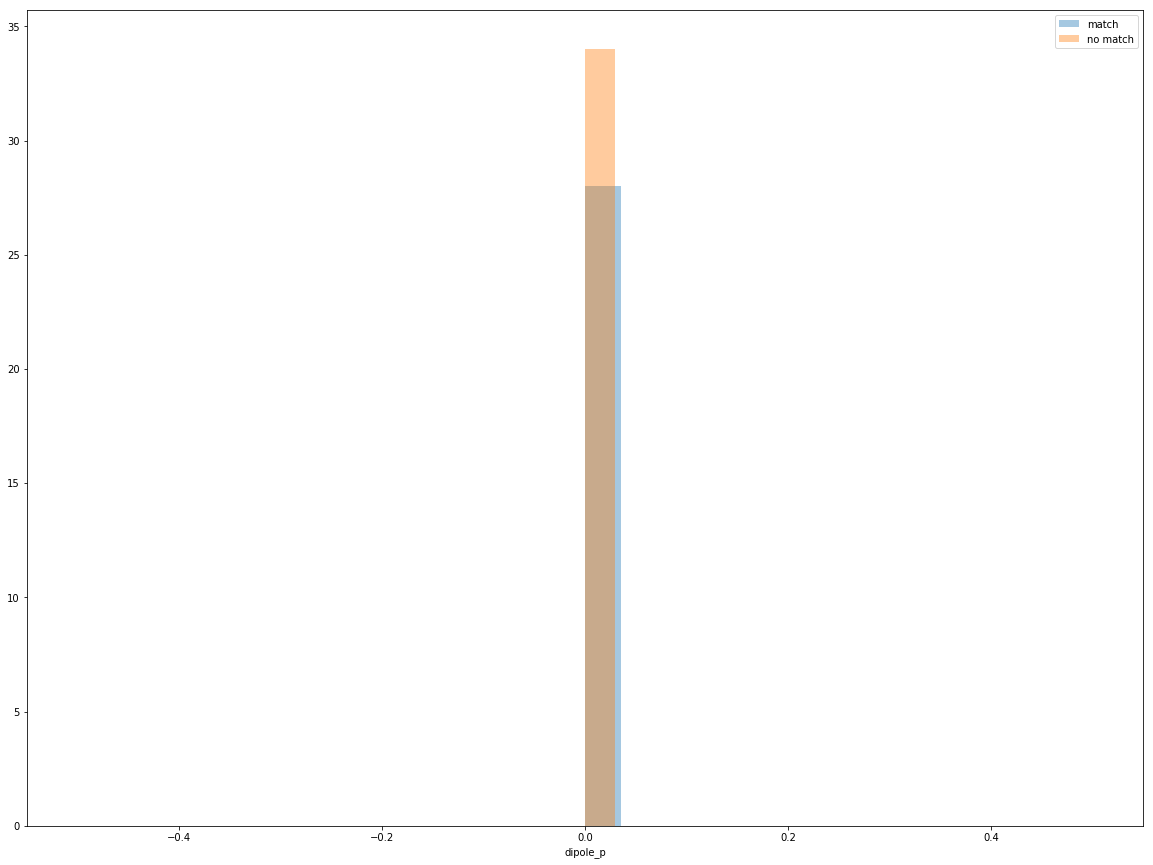

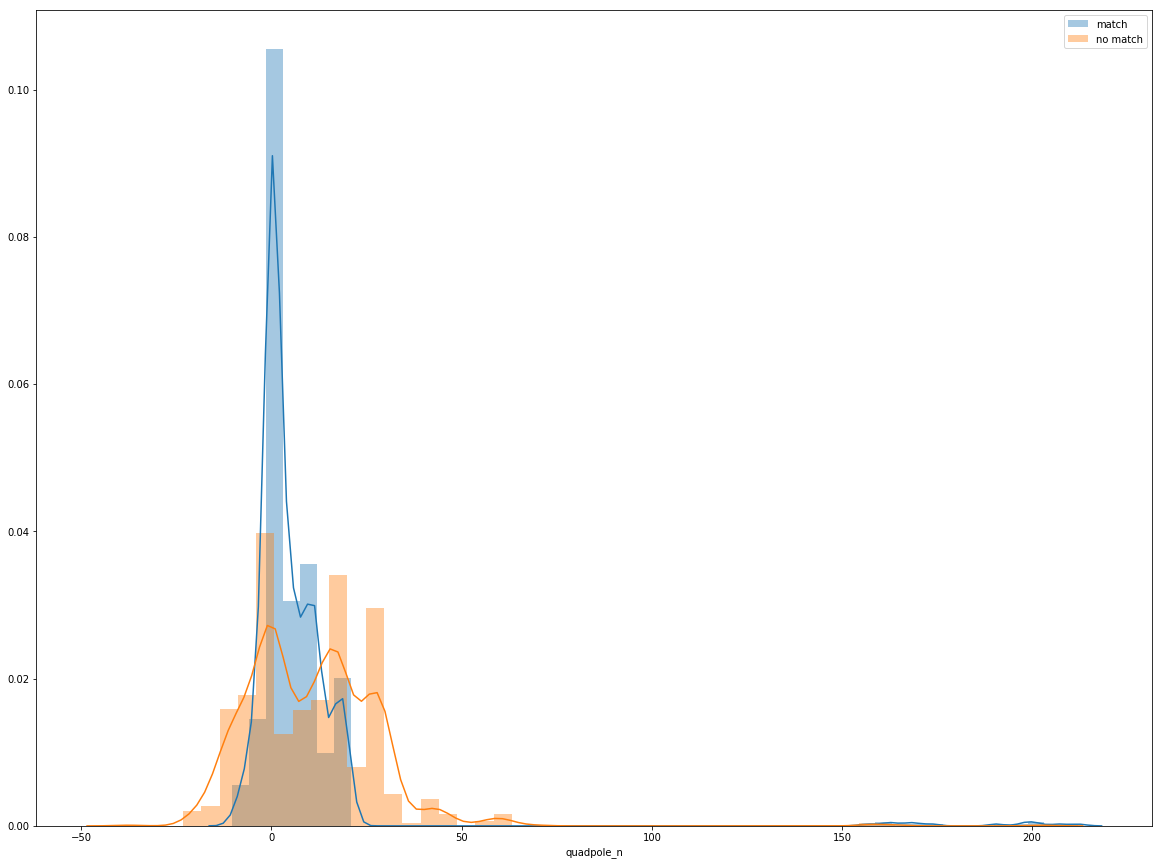

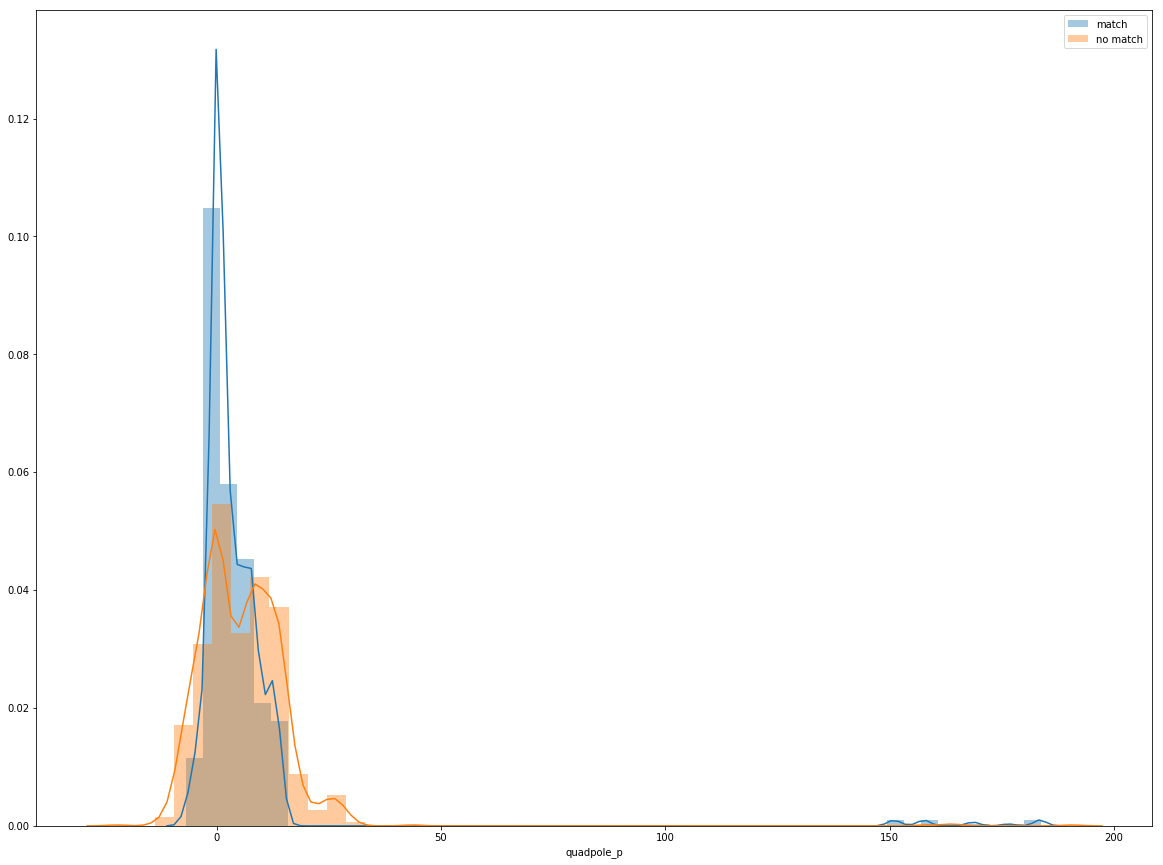

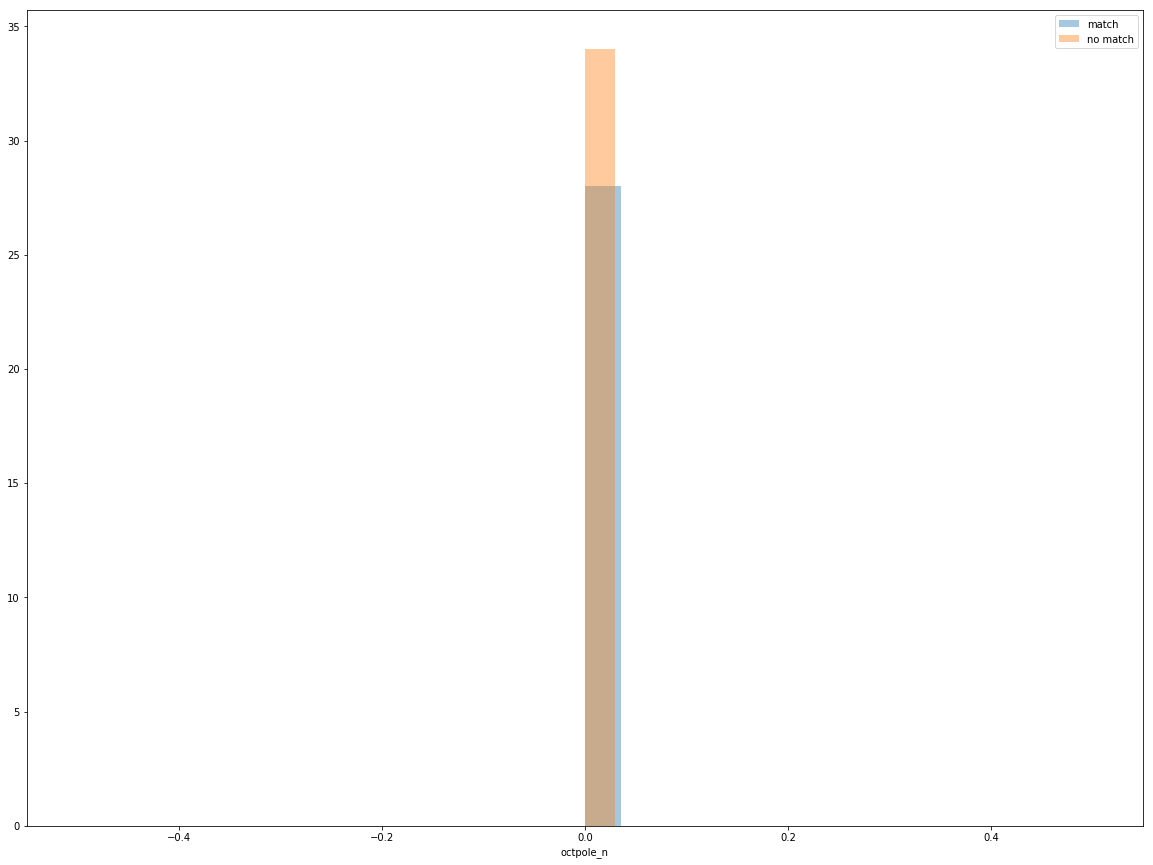

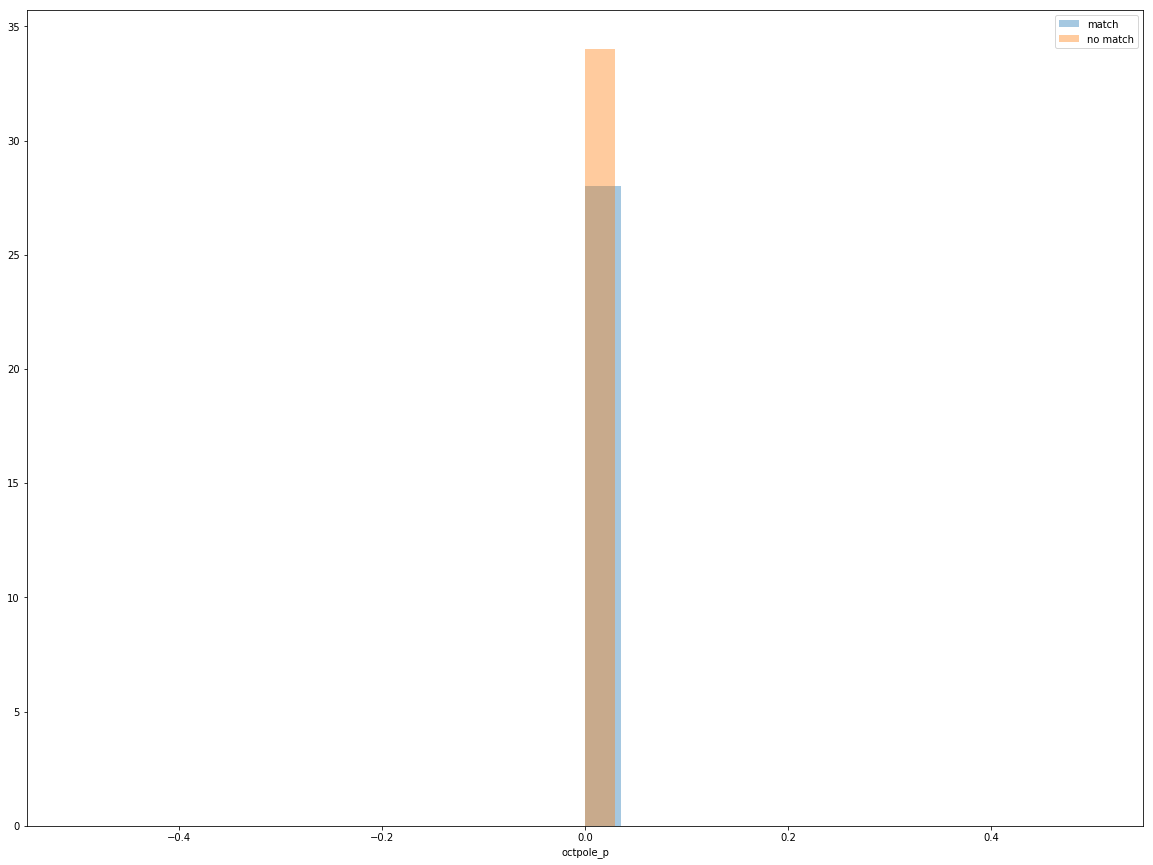

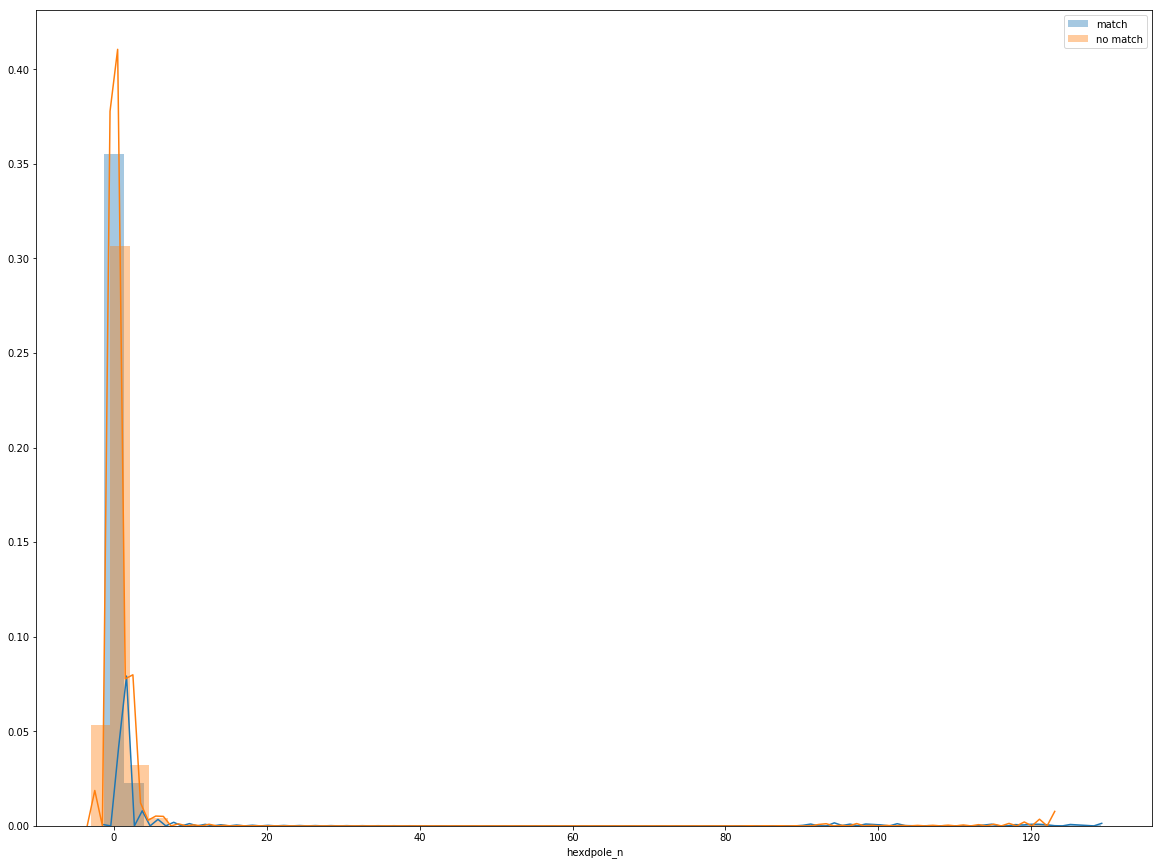

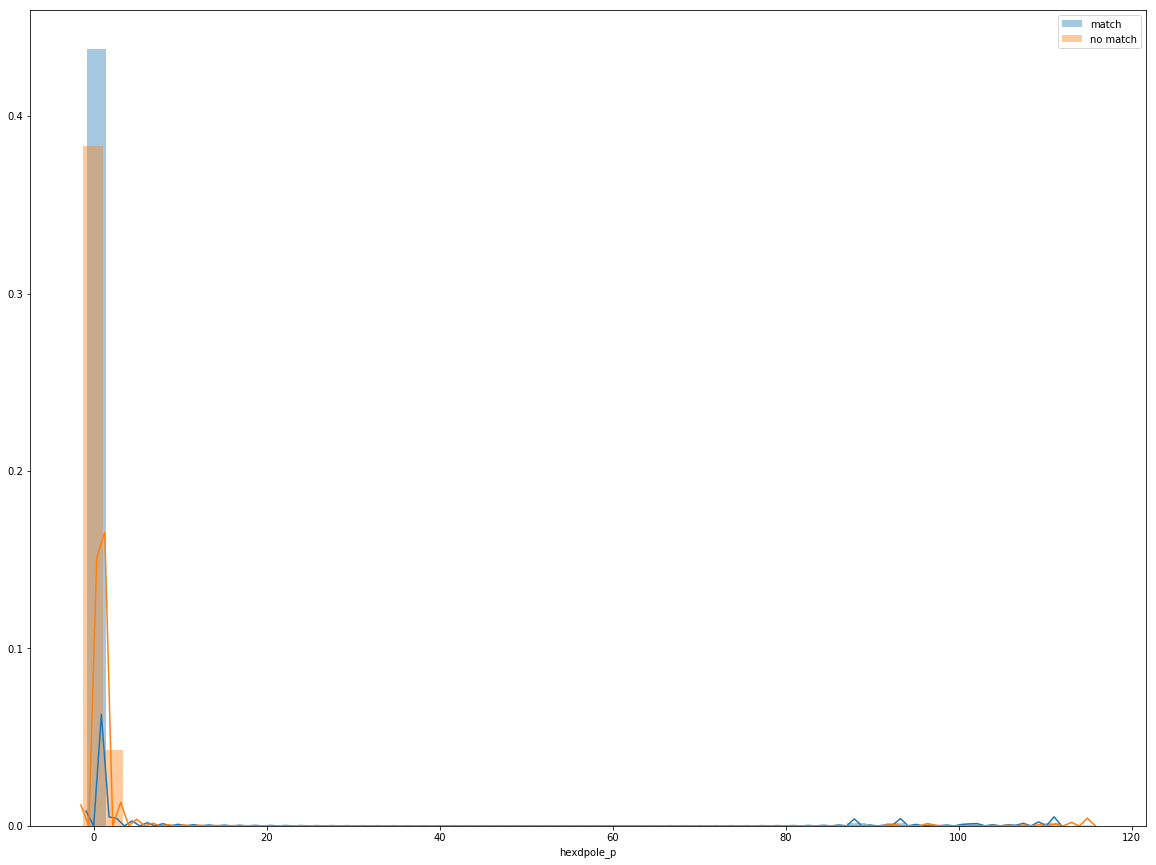

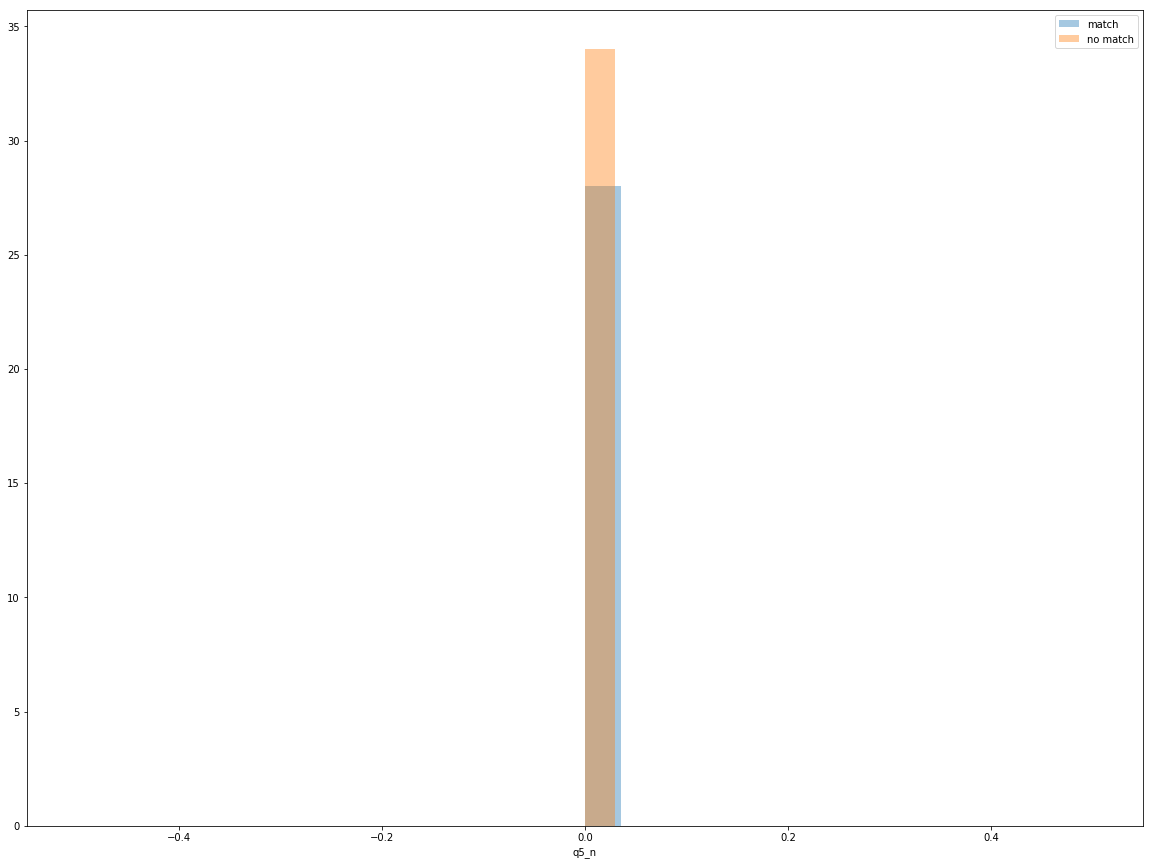

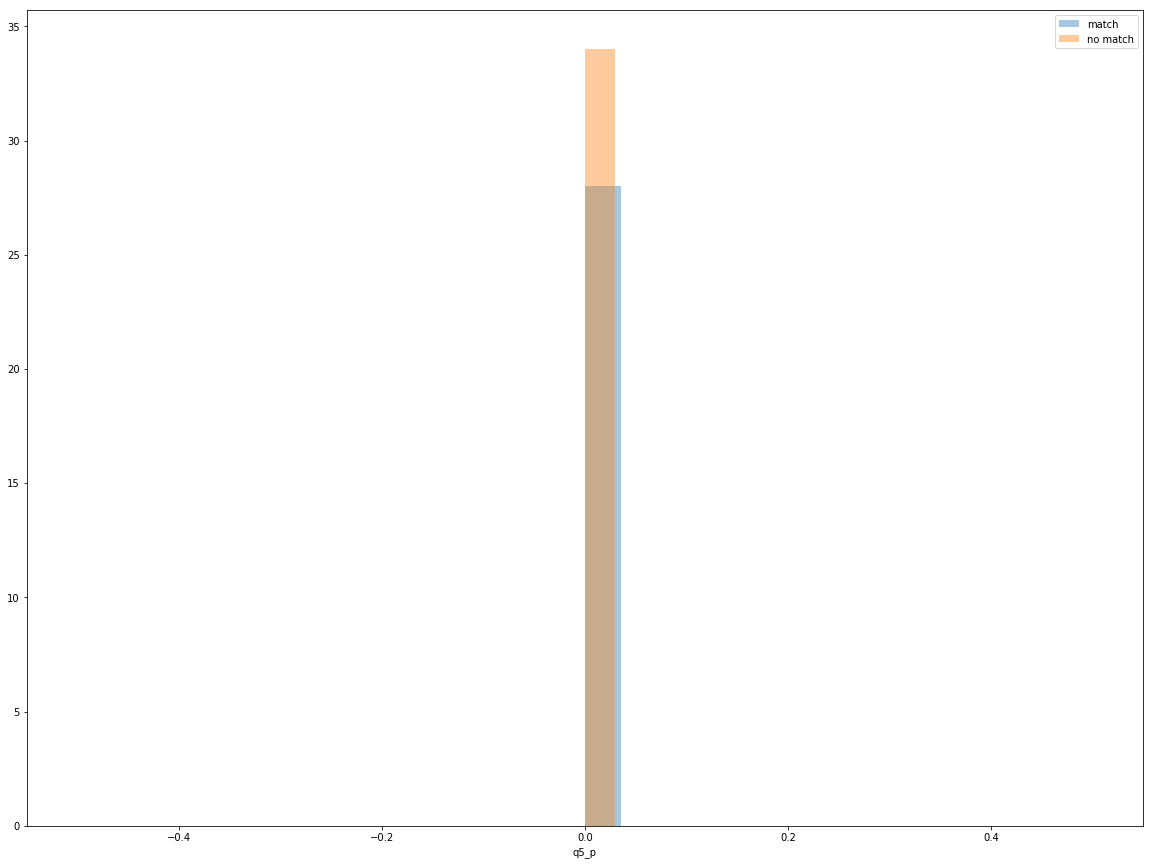

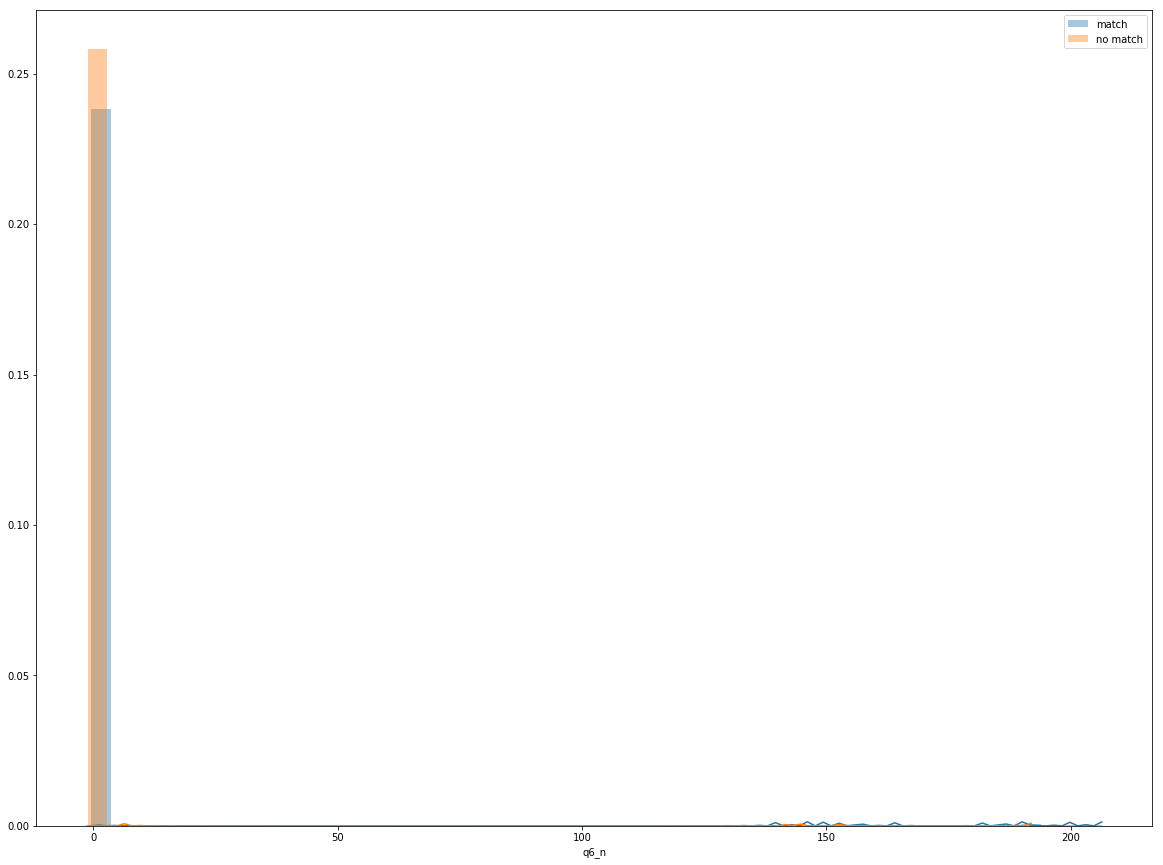

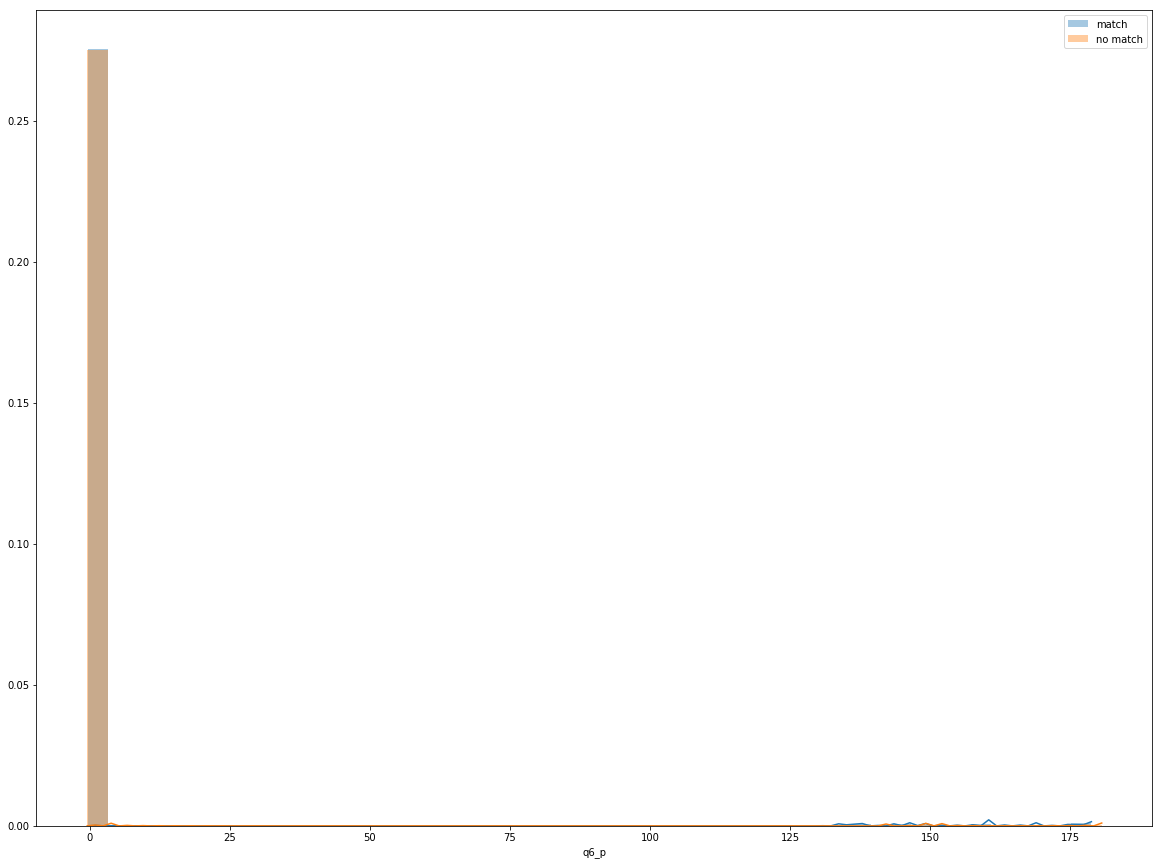

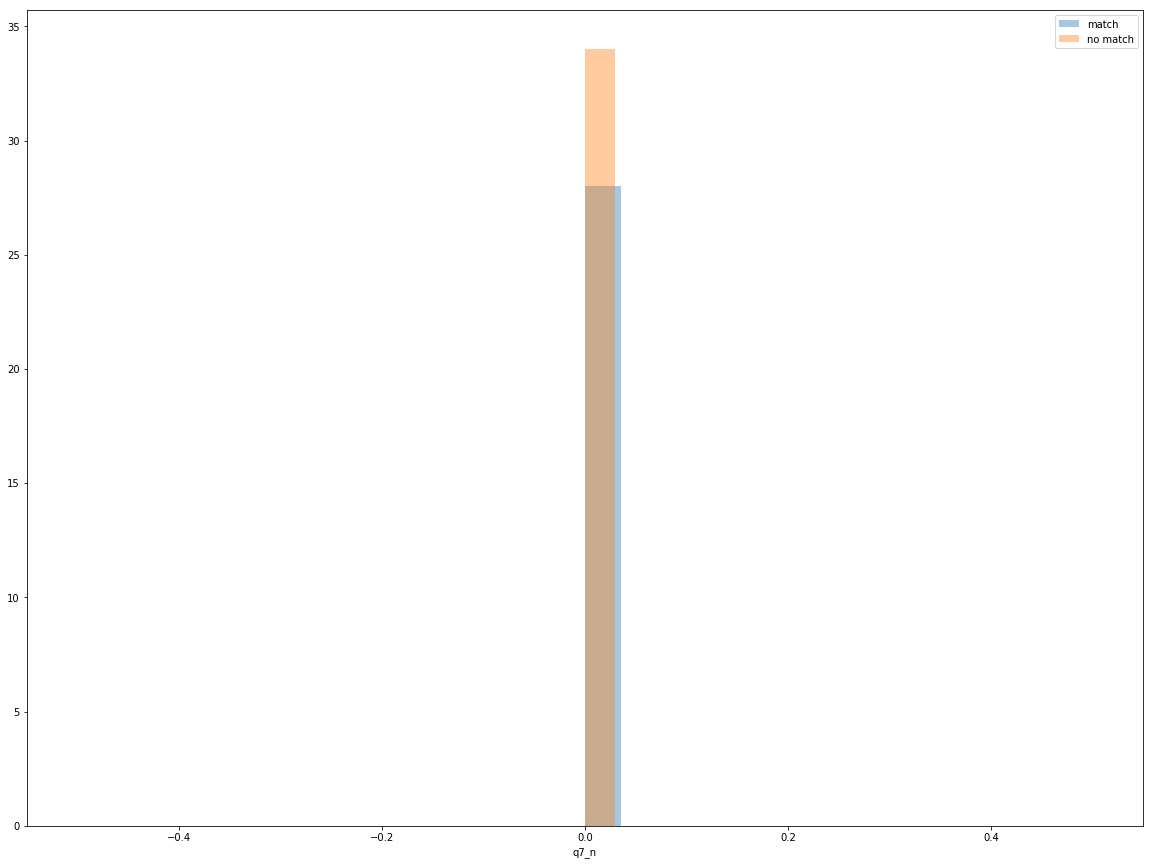

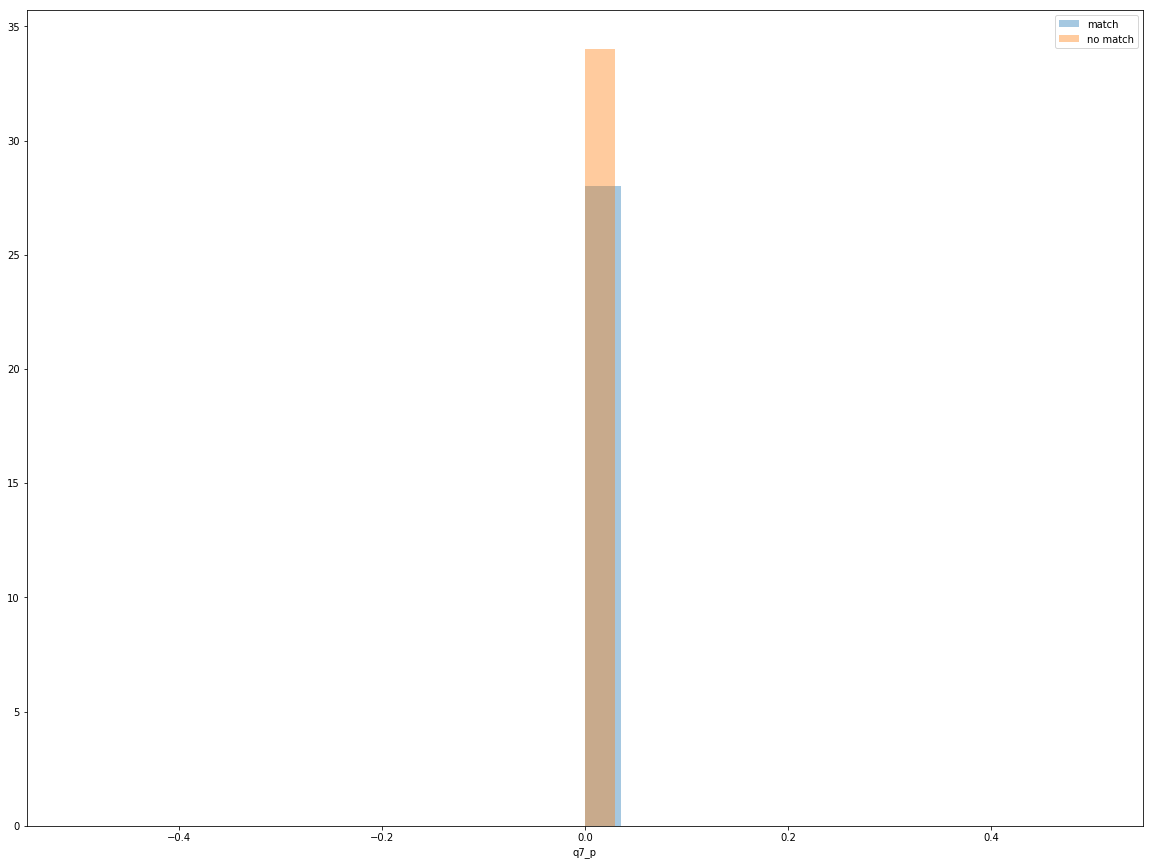

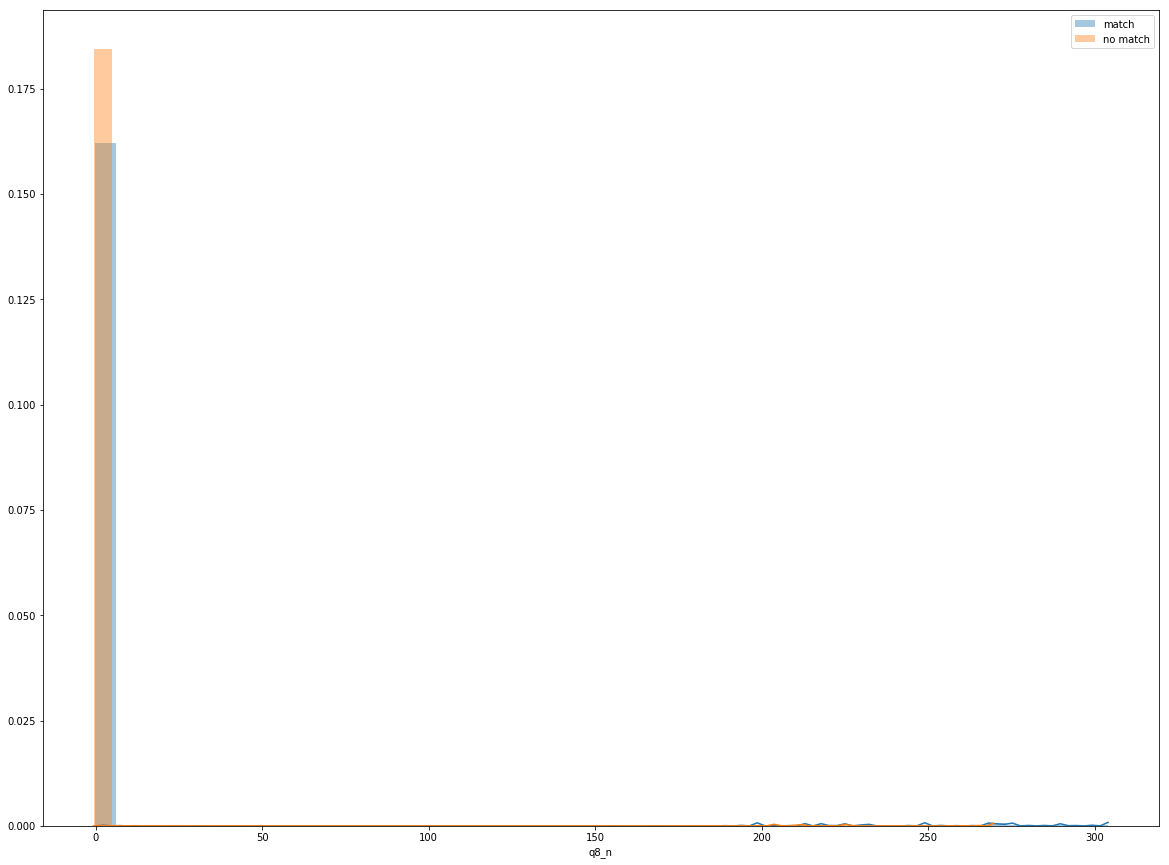

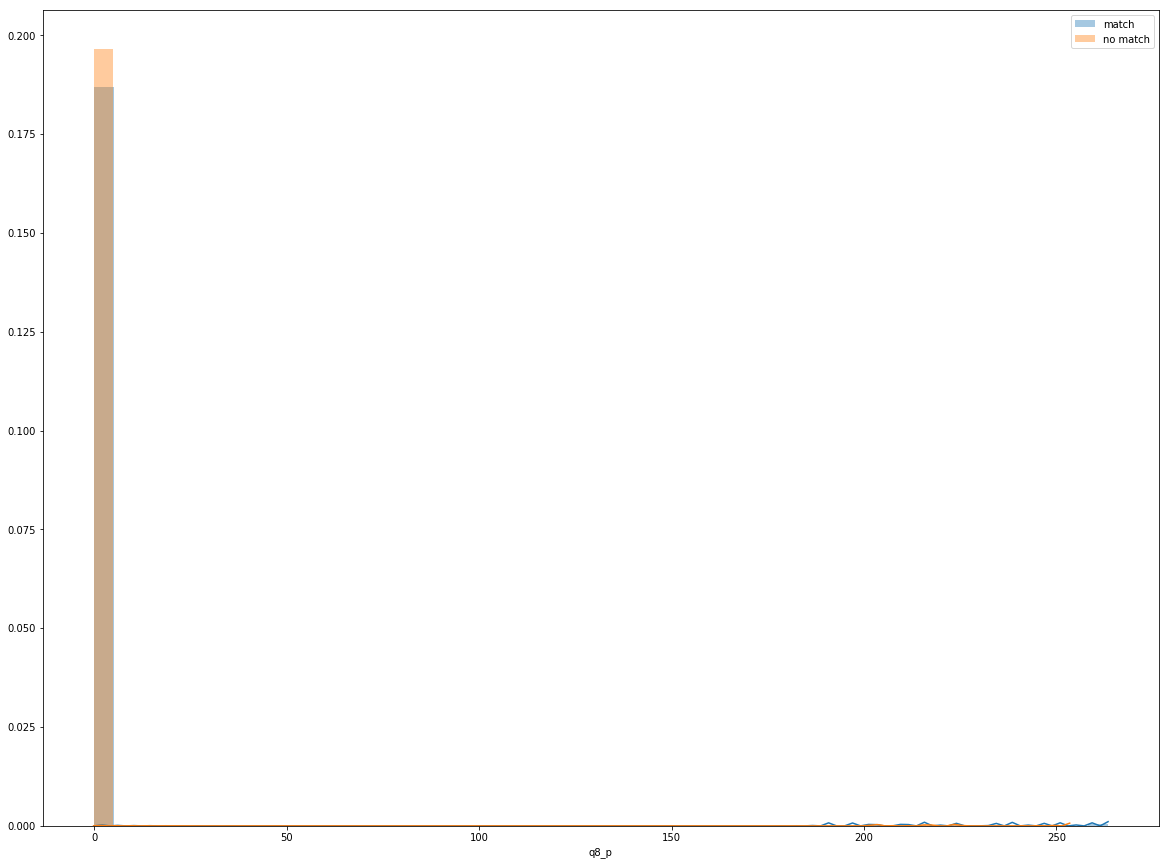

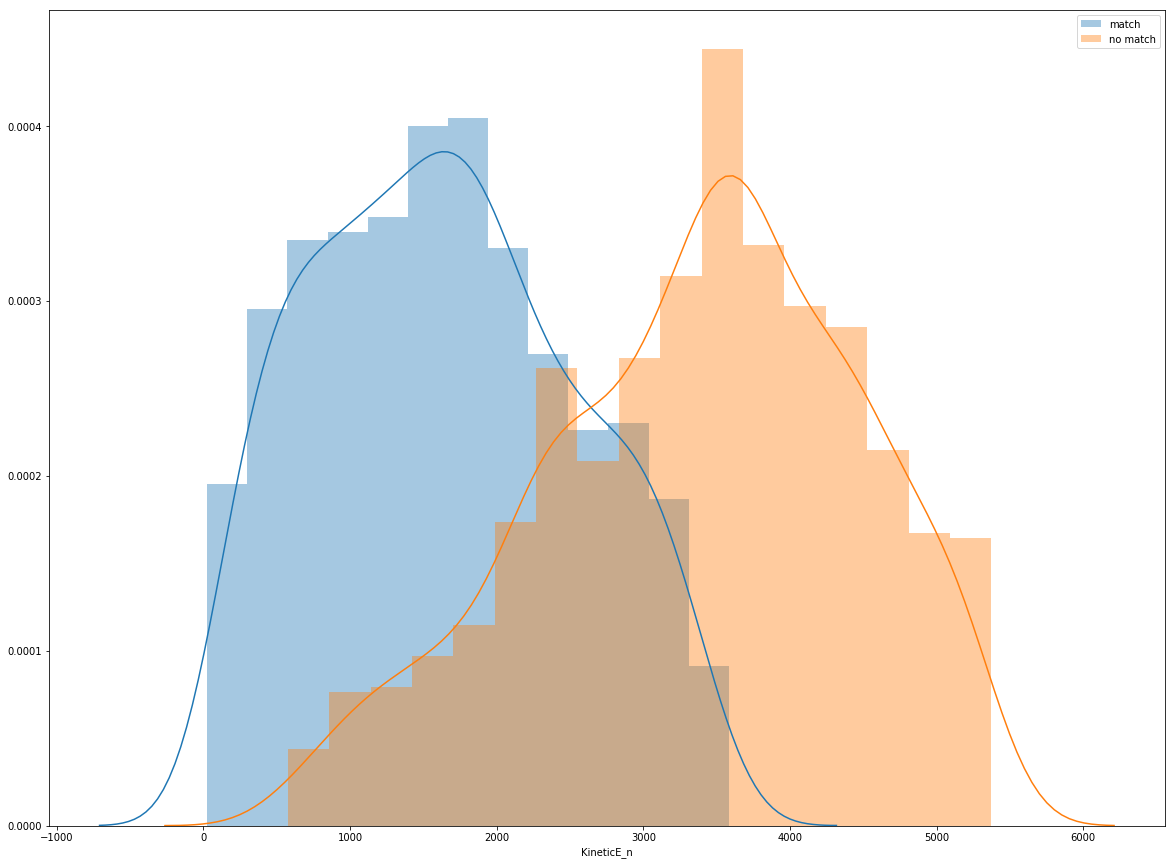

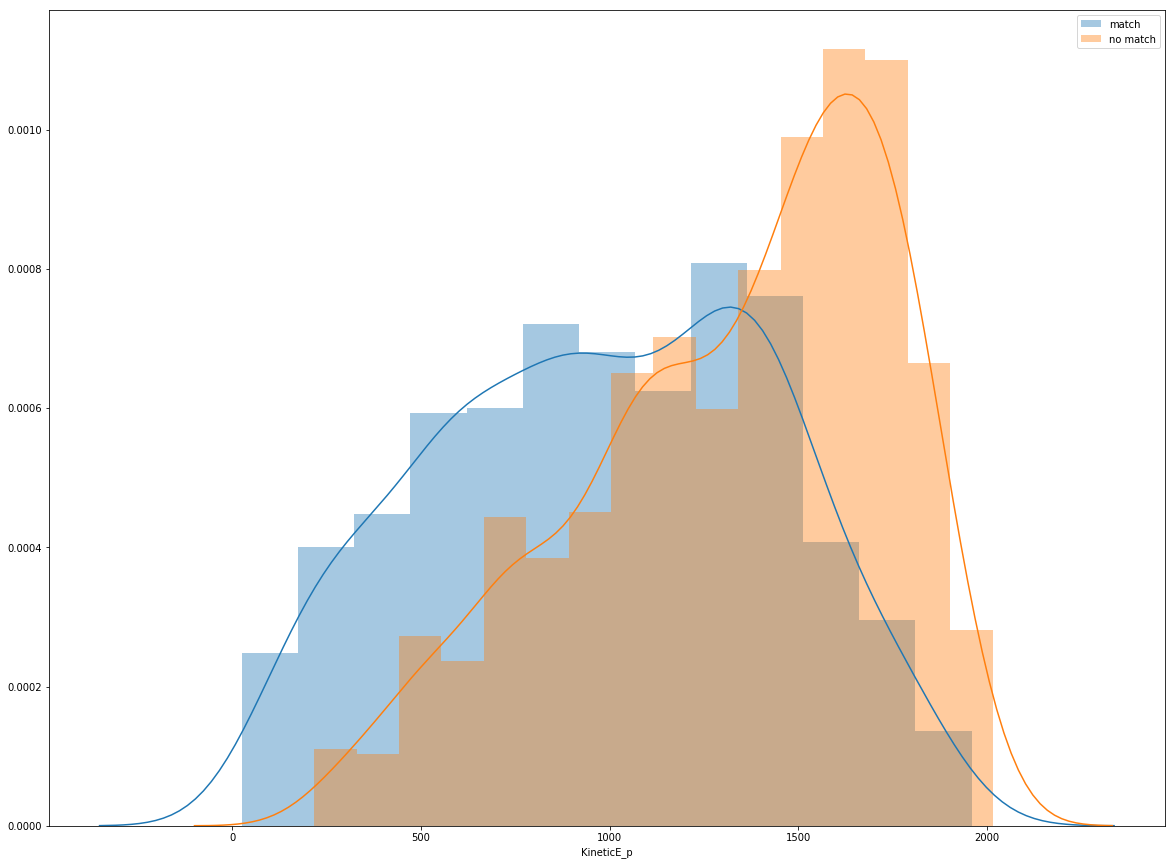

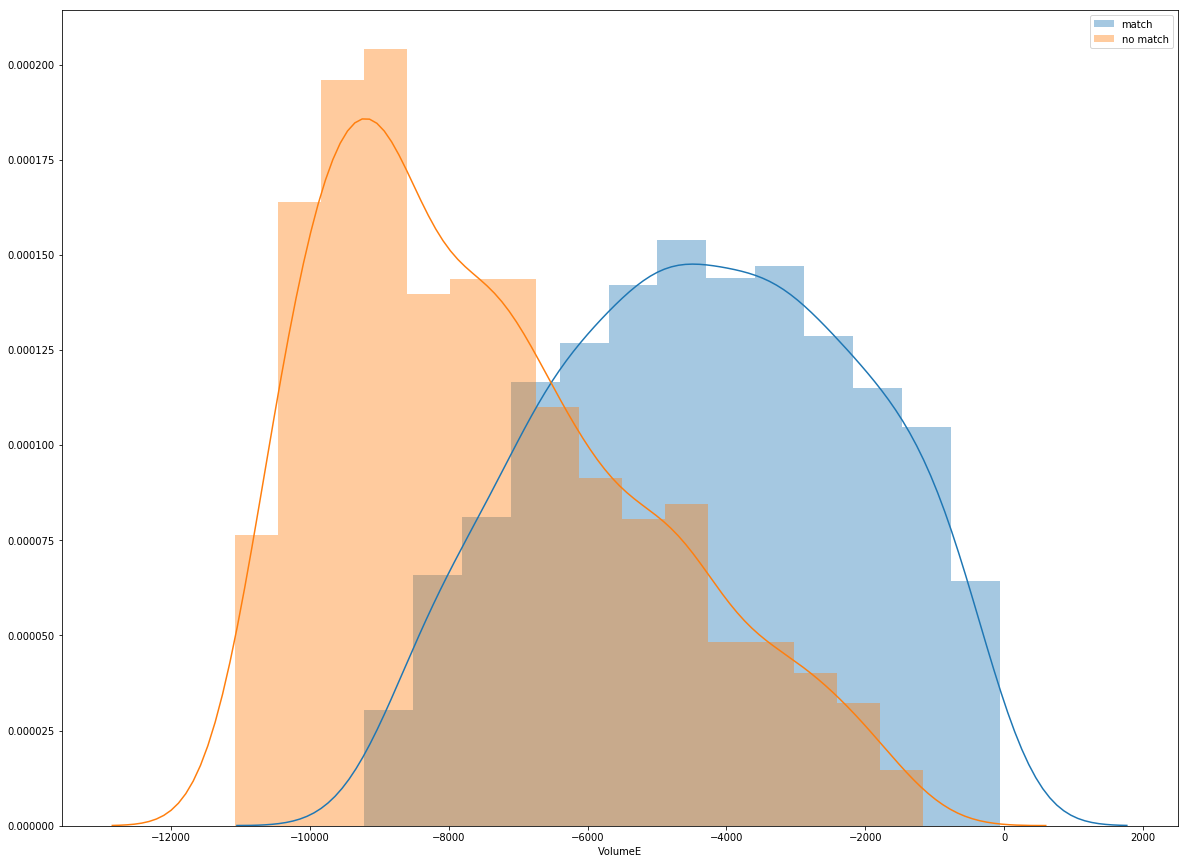

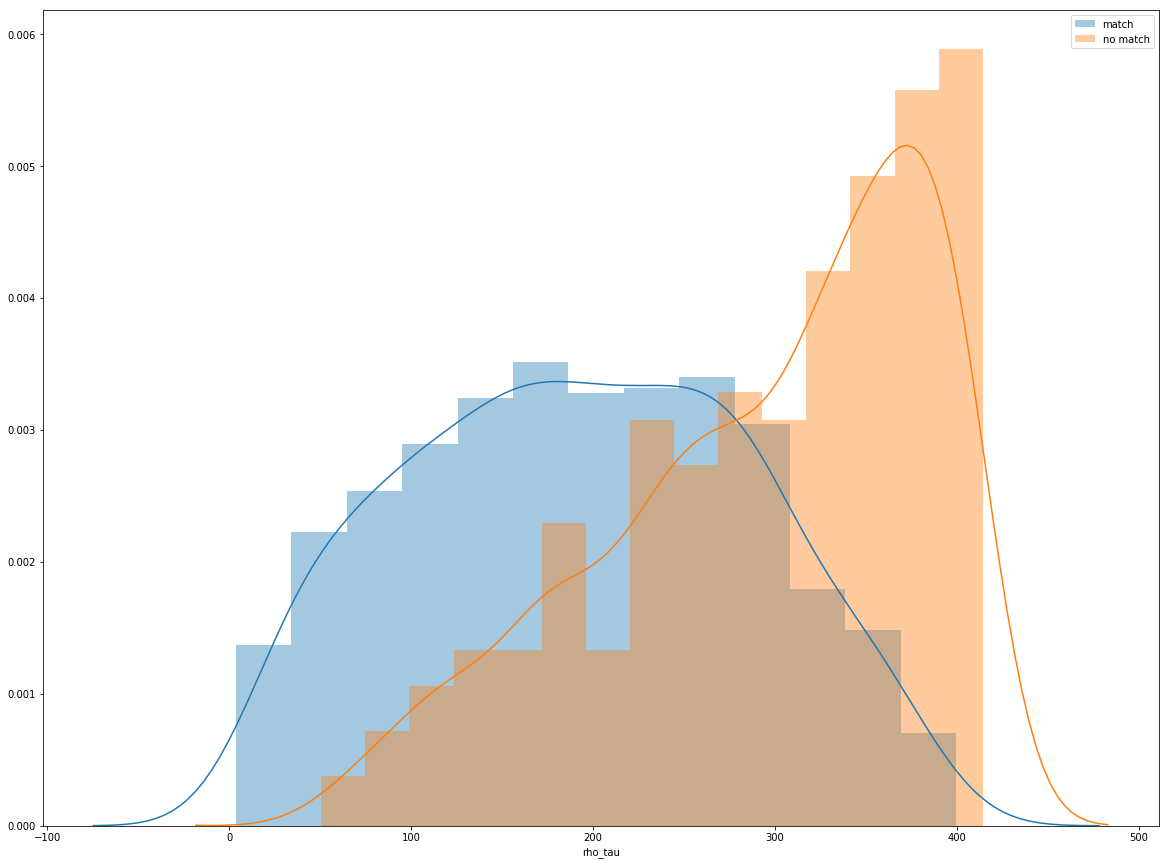

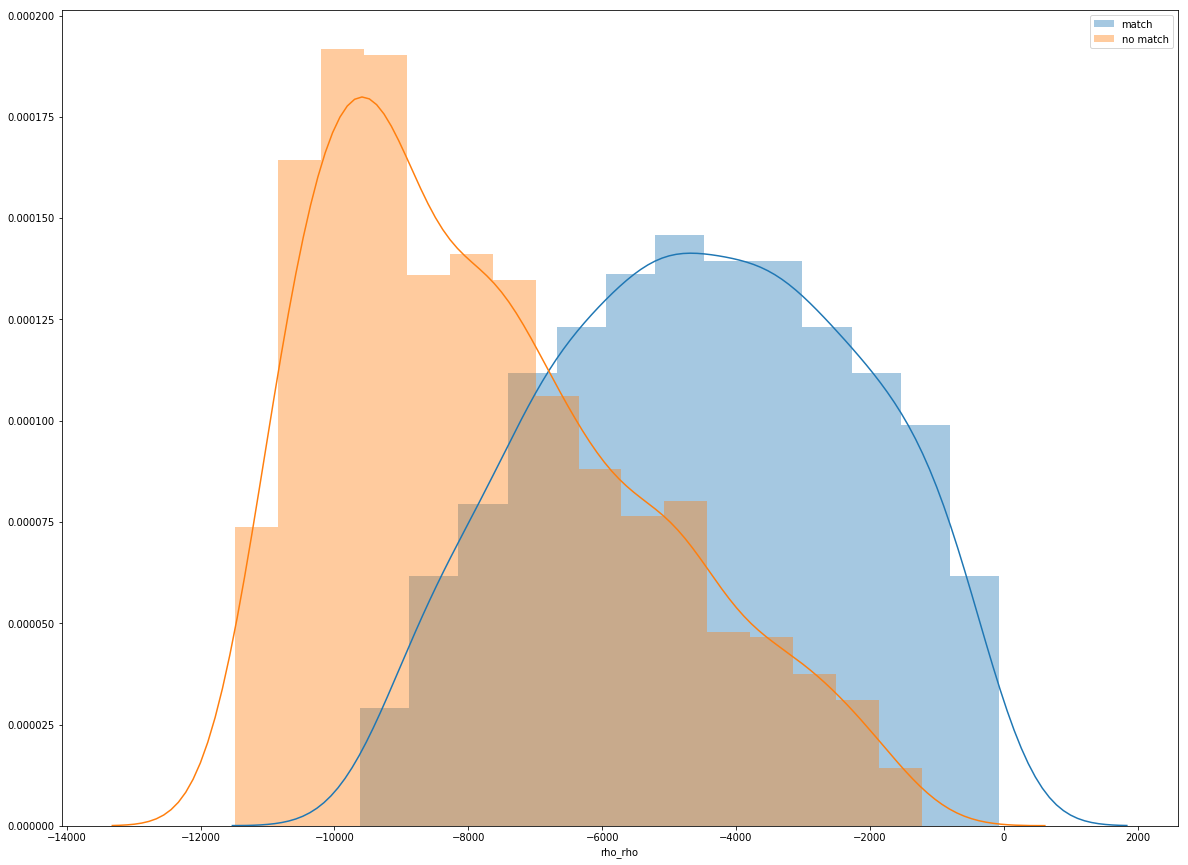

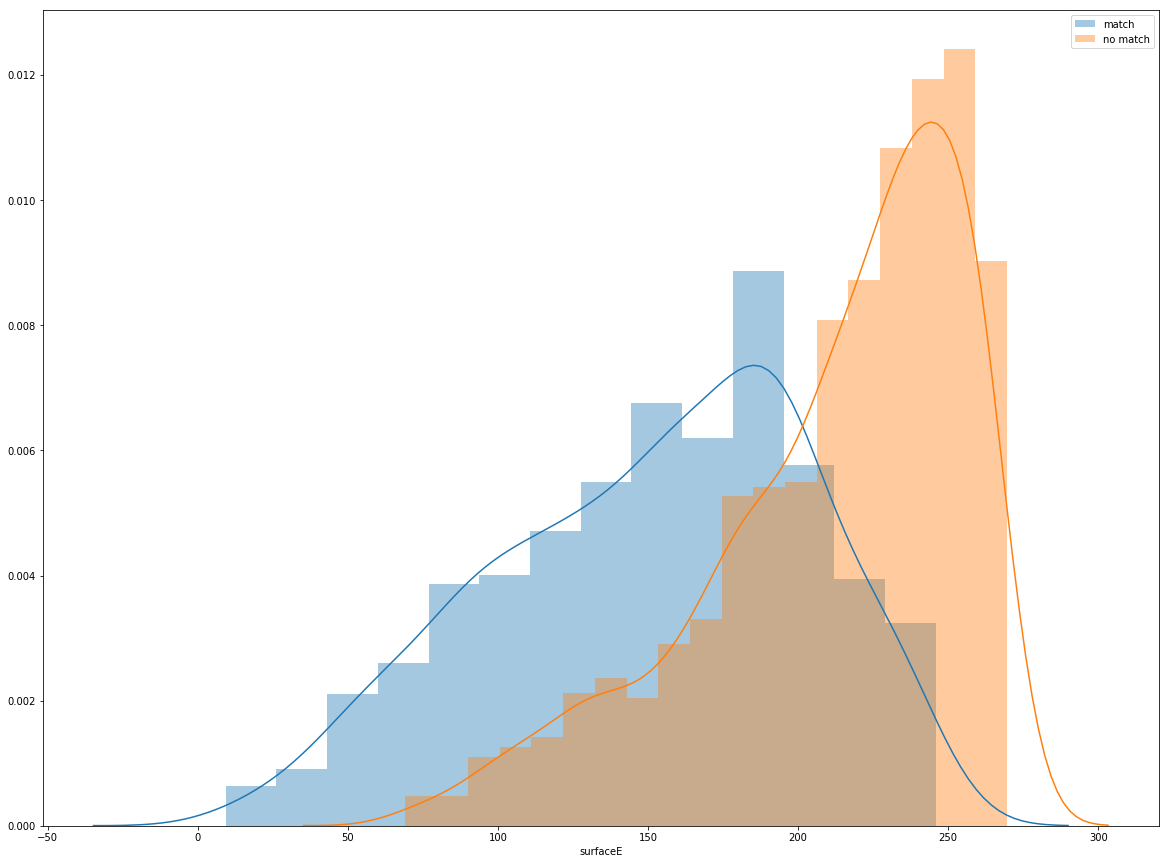

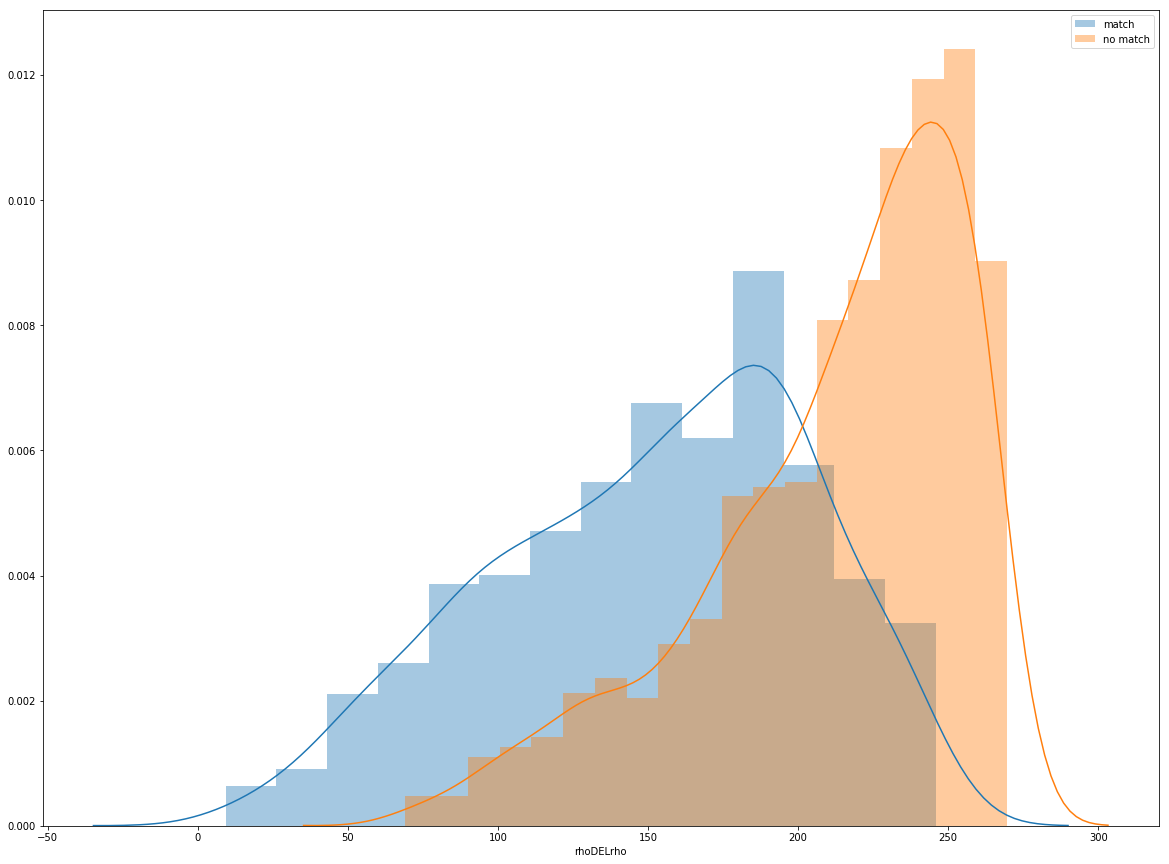

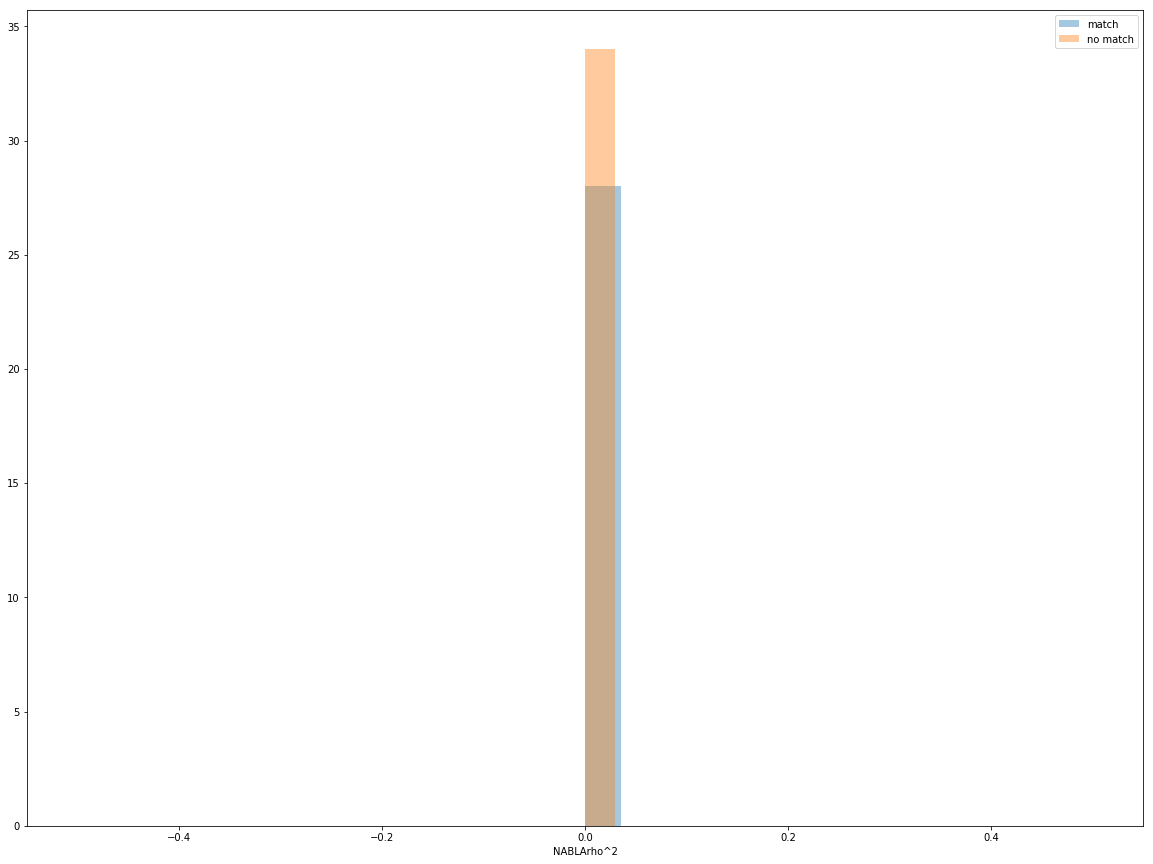

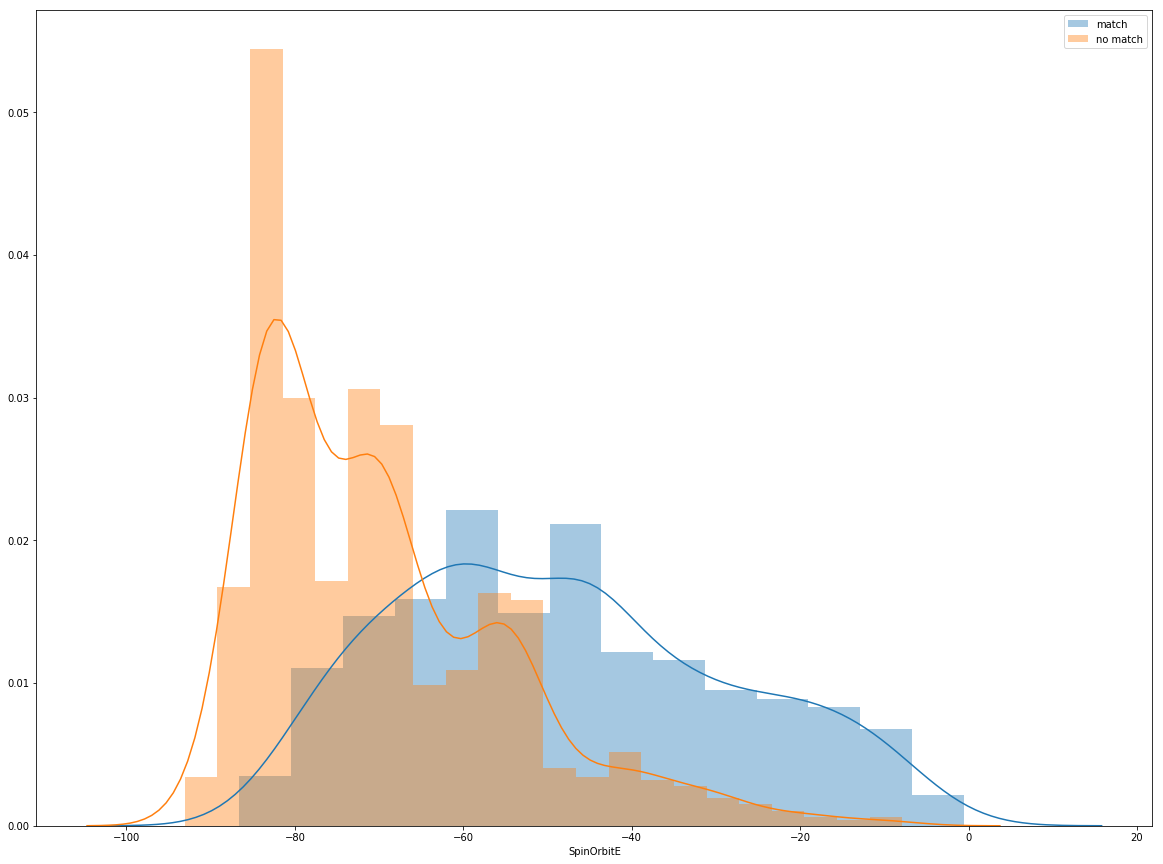

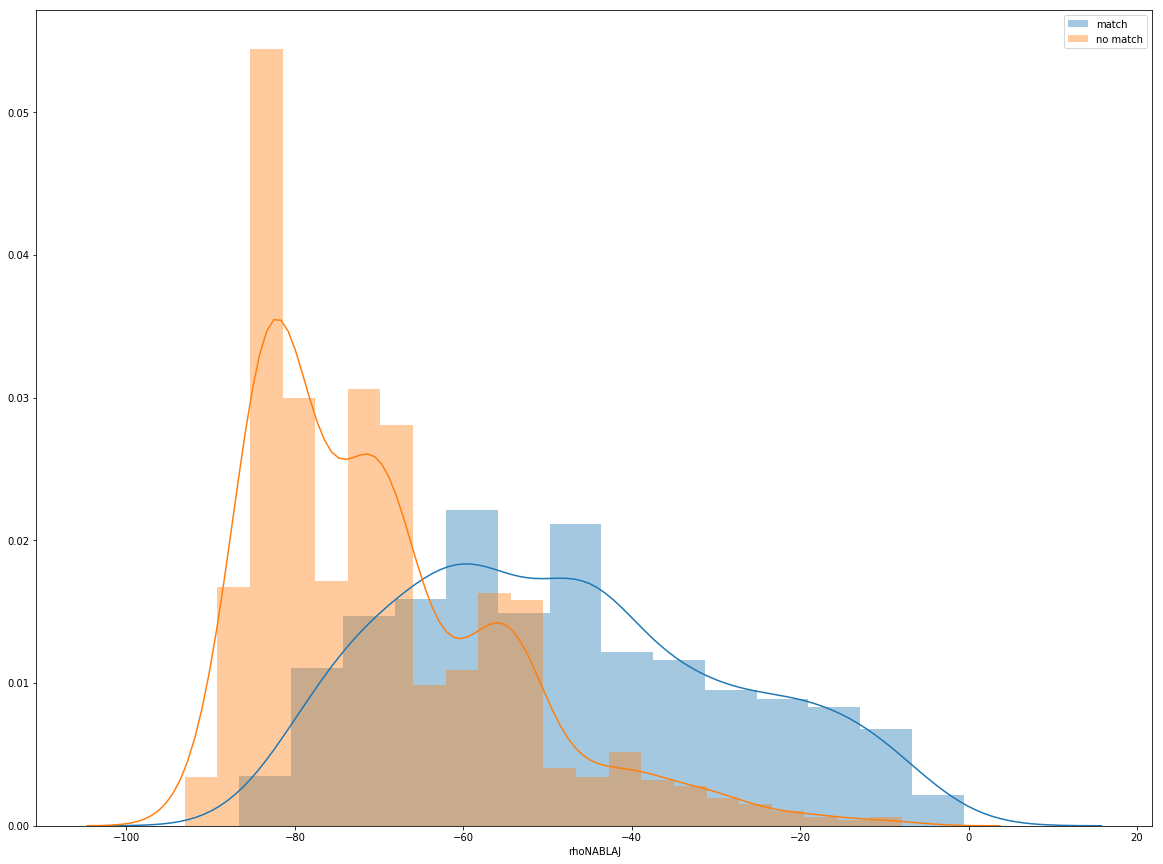

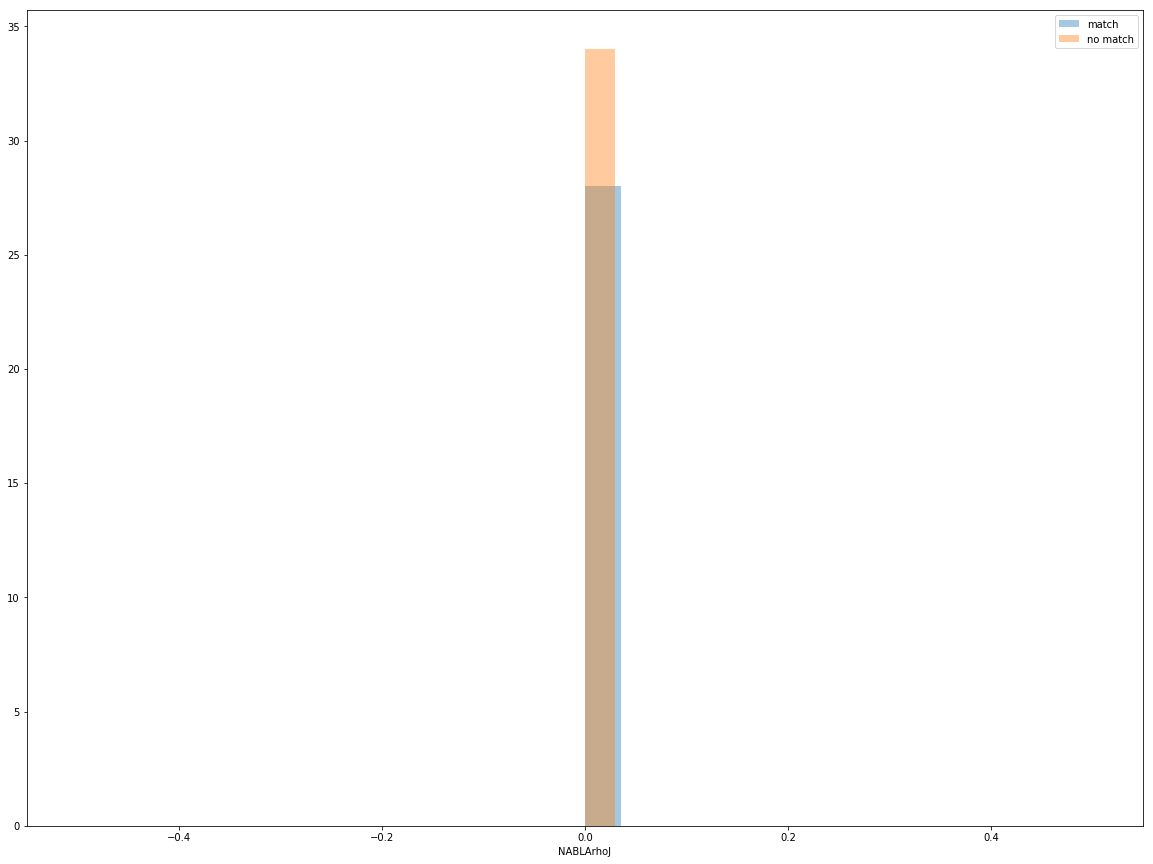

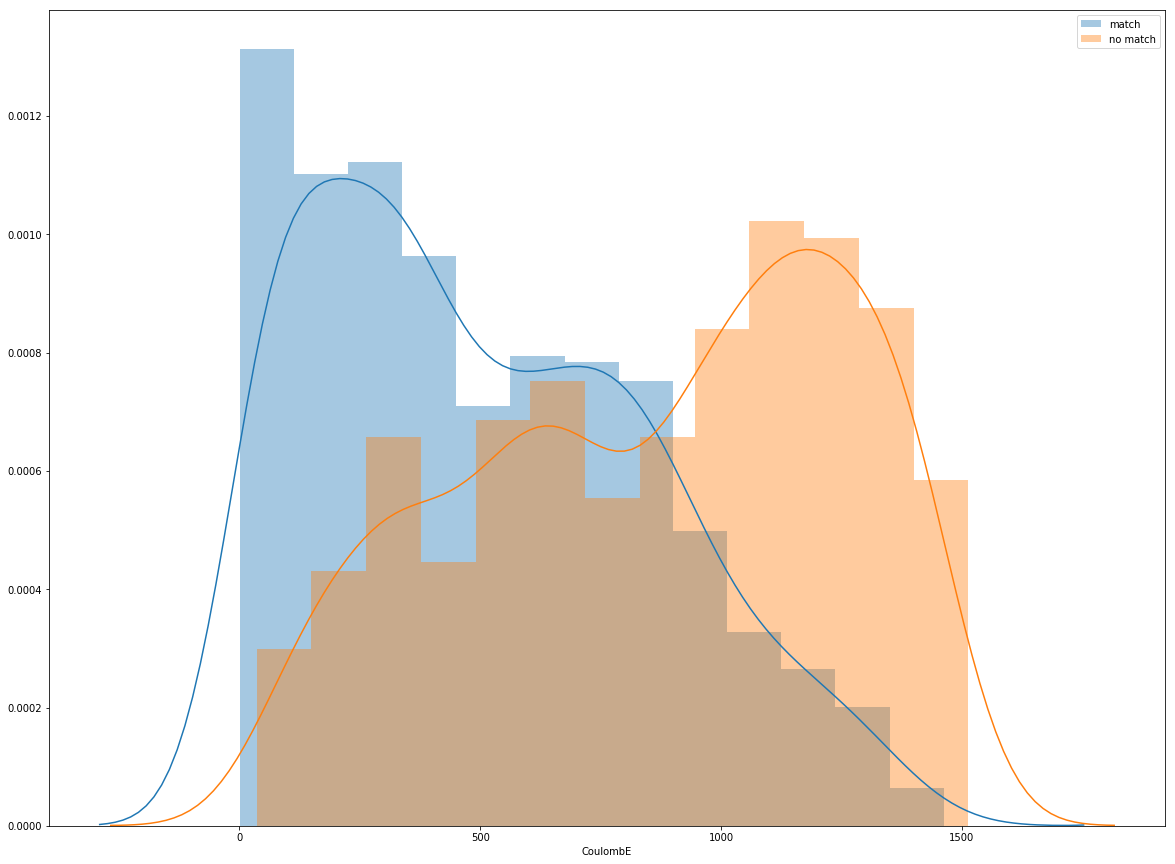

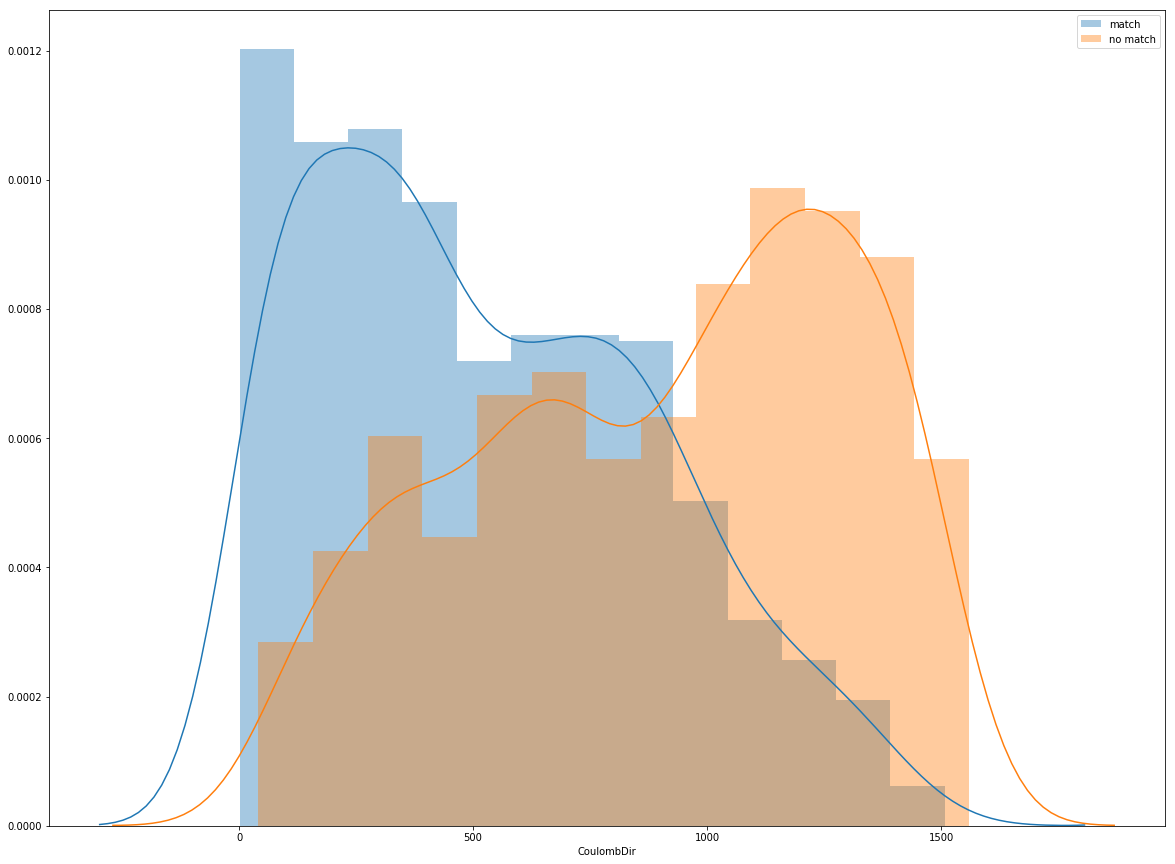

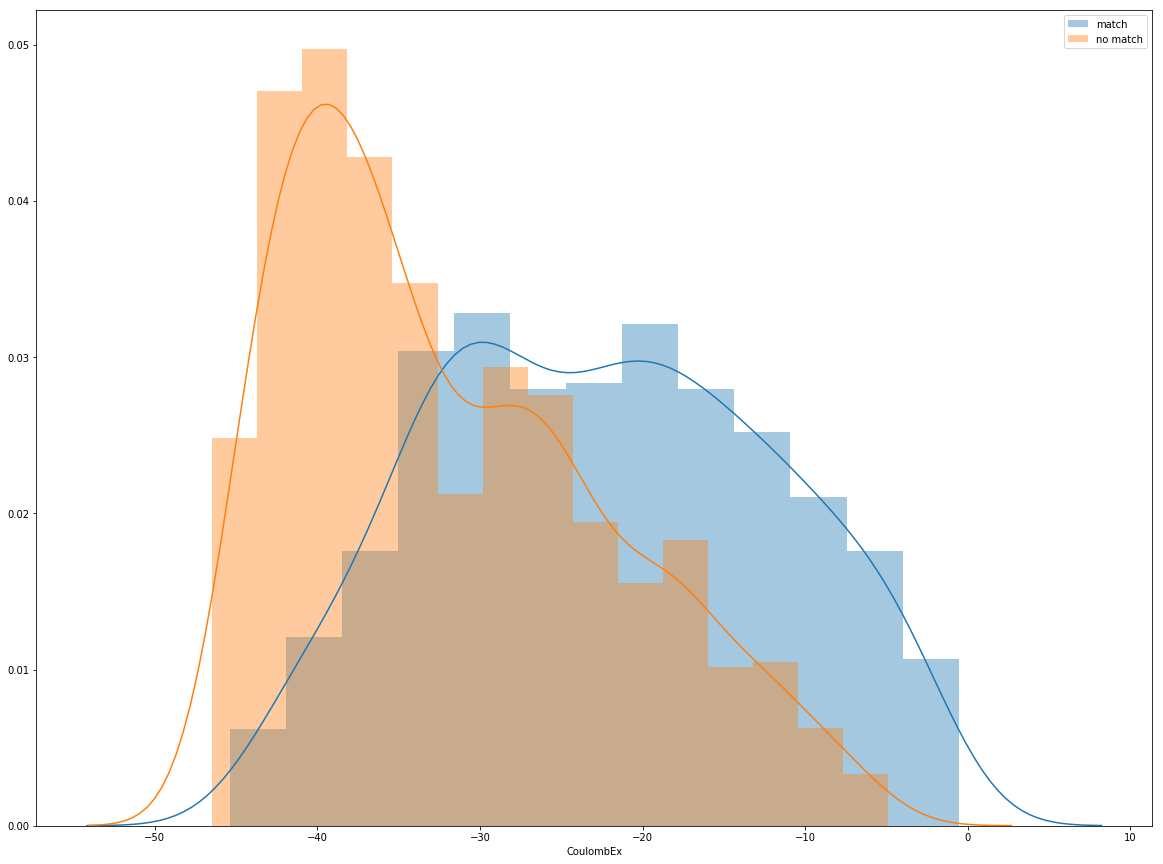

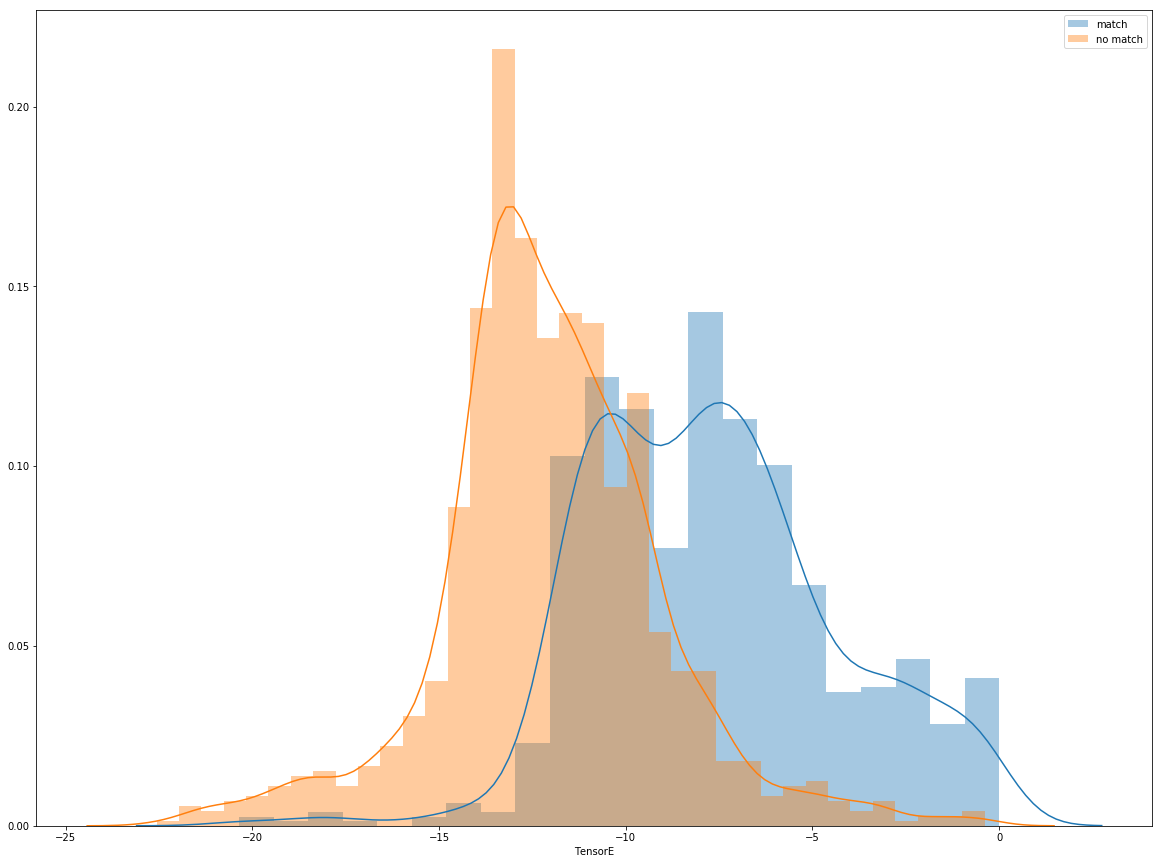

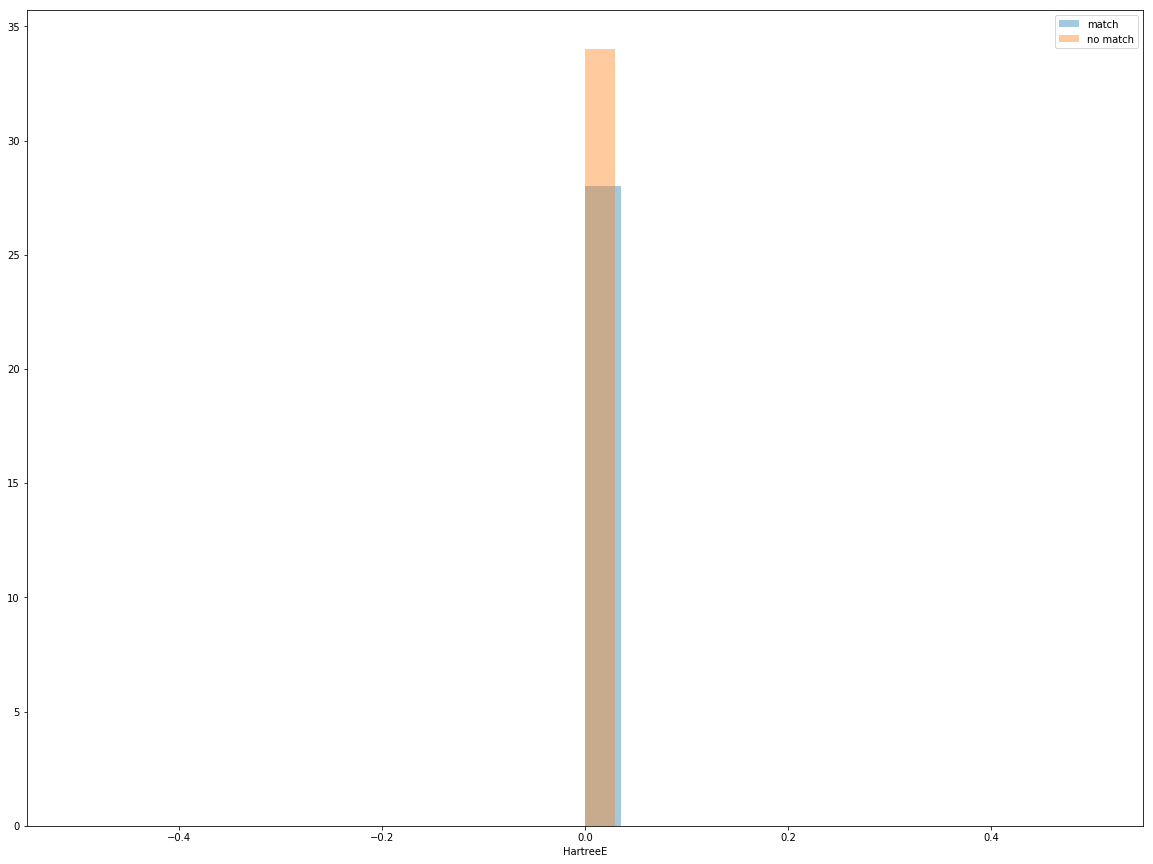

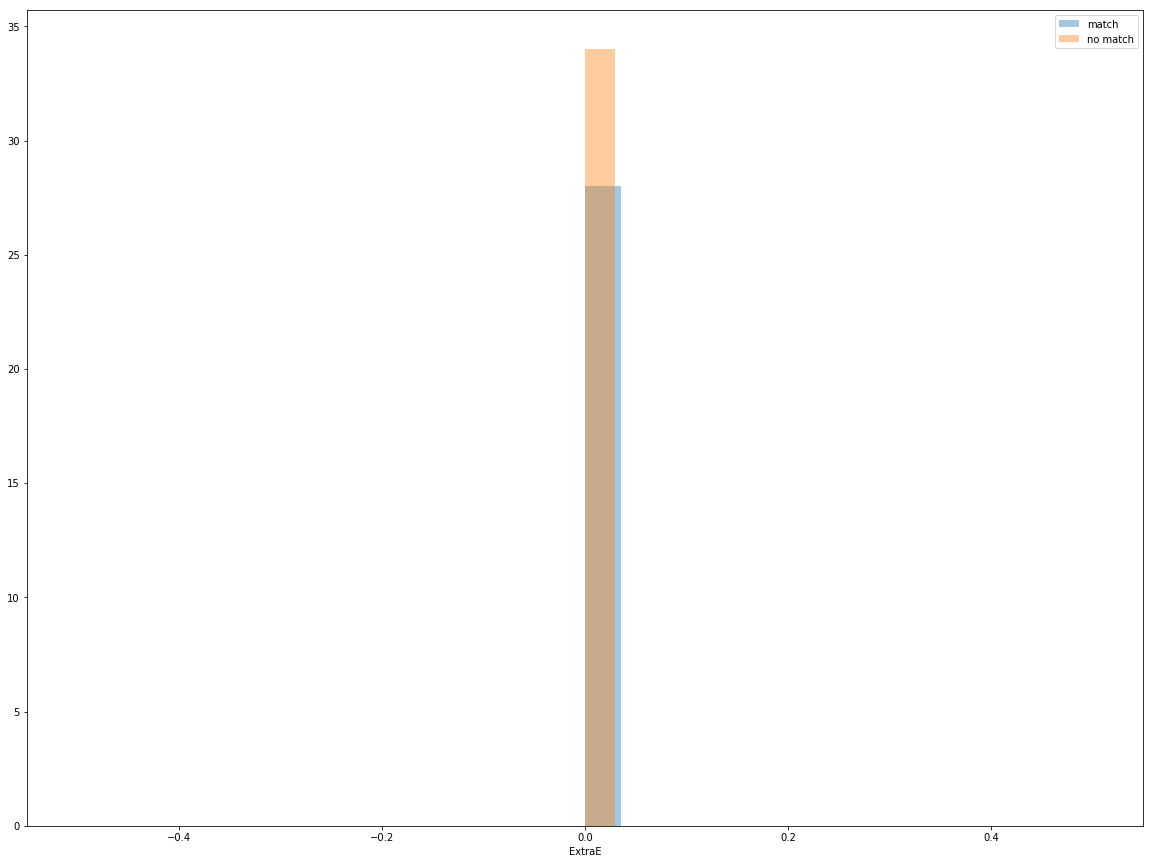

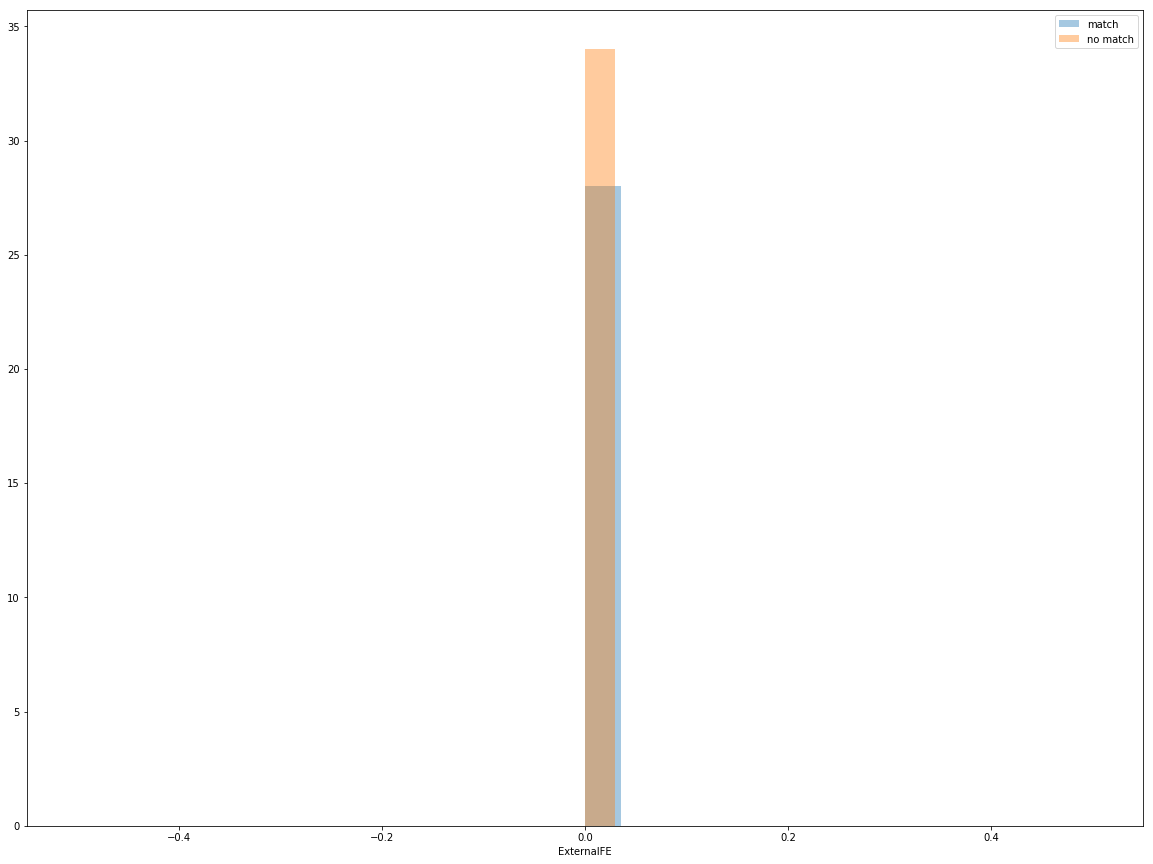

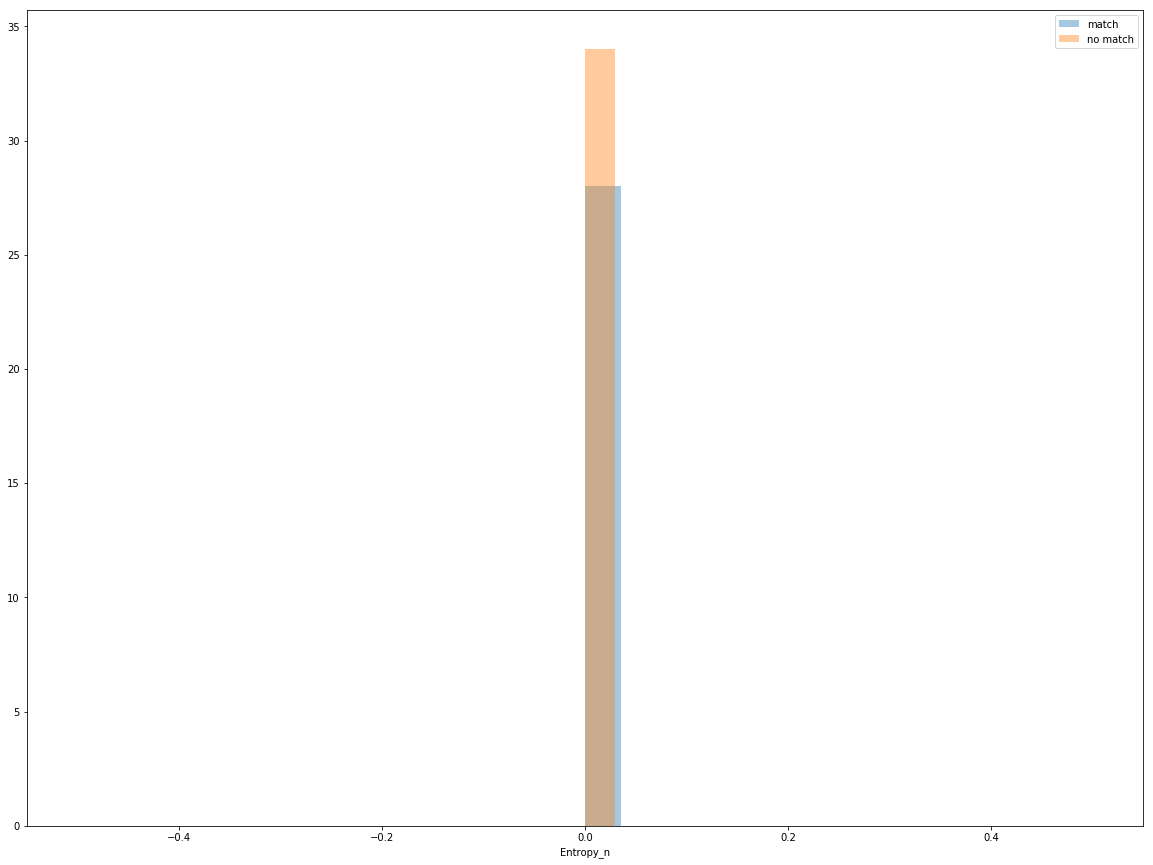

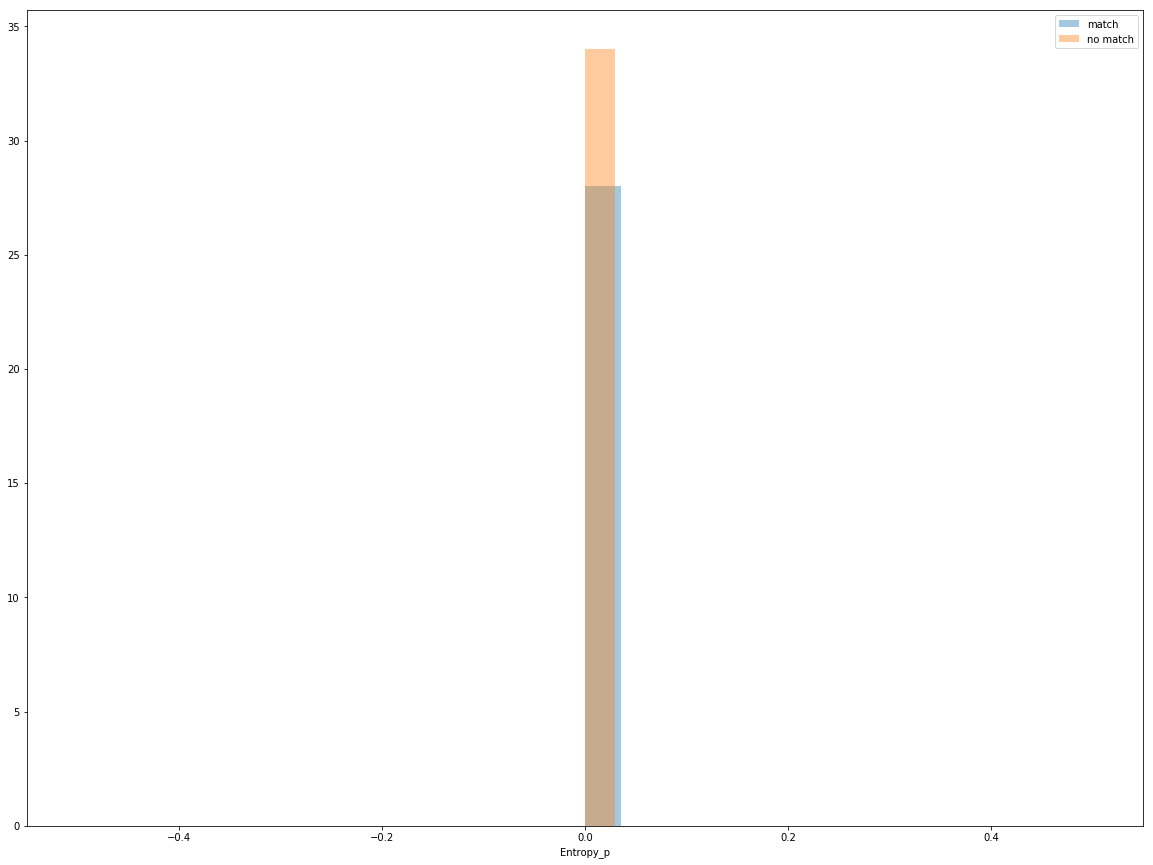

In [152]:
for j in match_df.columns:
    sns.distplot(match_df[j],    label="match")
    sns.distplot(no_match_df[j], label="no match")
    plt.legend()
    plt.show()
    

# Don't Go Past this point

In [ ]:
# Create x, where x the 'scores' column's values as floats
x = df[['score']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [44]:
df1=match_df.values.astype(float)


min_max_scaler = preprocessing.MinMaxScaler()


df1_scaled=min_max_scaler.fit_transform(df1)


df1_normalized=pd.DataFrame(df1_scaled)

In [52]:
df2=no_match_df.values.astype(float)


min_max_scaler = preprocessing.MinMaxScaler()


df2_scaled=min_max_scaler.fit_transform(df2)


df2_normalized=pd.DataFrame(df2_scaled)

In [47]:
df1_normalized.describe()

0           1           2           3      4      5      6   \
count  840.000000  840.000000  840.000000  840.000000  840.0  840.0  840.0   
mean     0.348596    0.344353    0.513041    0.466074    0.0    0.0    0.0   
std      0.240370    0.240580    0.237511    0.249131    0.0    0.0    0.0   
min      0.000000    0.000000    0.000000    0.000000    0.0    0.0    0.0   
25%      0.143940    0.139120    0.321452    0.267164    0.0    0.0    0.0   
50%      0.308706    0.303350    0.510817    0.446919    0.0    0.0    0.0   
75%      0.530171    0.525593    0.698874    0.655140    0.0    0.0    0.0   
max      1.000000    1.000000    1.000000    1.000000    0.0    0.0    0.0   

          7           8           9   ...          58          59          60  \
count  840.0  840.000000  840.000000  ...  840.000000  840.000000  840.000000   
mean     0.0    0.950709    0.944836  ...    0.077730    0.064685    0.599294   
std      0.0    0.083294    0.091633  ...    0.100483    0.104409    0.225130   
min      0.0    0.000000    0.000000  ...    0.000000    0.000000    0.000000   
25%      0.0    0.946501    0.940811  ...    0.046132    0.036216    0.435986   
50%      0.0    0.975602    0.973036  ...    0.053491    0.042081    0.628636   
75%      0.0    0.987980    0.986854  ...    0.091055    0.071993    0.775578   
max      0.0    1.000000    1.000000  ...    1.000000    1.000000    1.000000   

               61          62          63          64          65          66  \
count  840.000000  840.000000  840.000000  840.000000  840.000000  840.000000   
mean     0.445933    0.533231    0.476428    0.275018    0.264262    0.266715   
std      0.230714    0.242134    0.239831    0.118065    0.118939    0.118492   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.265136    0.346895    0.284481    0.207986    0.199843    0.200452   
50%      0.423457    0.534433    0.476947    0.276976    0.269040    0.270127   
75%      0.610105    0.725874    0.666133    0.327819    0.318115    0.319700   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               67  
count  840.000000  
mean     0.599294  
std      0.225130  
min      0.000000  
25%      0.435986  
50%      0.628636  
75%      0.775578  
max      1.000000  

[8 rows x 68 columns]

0


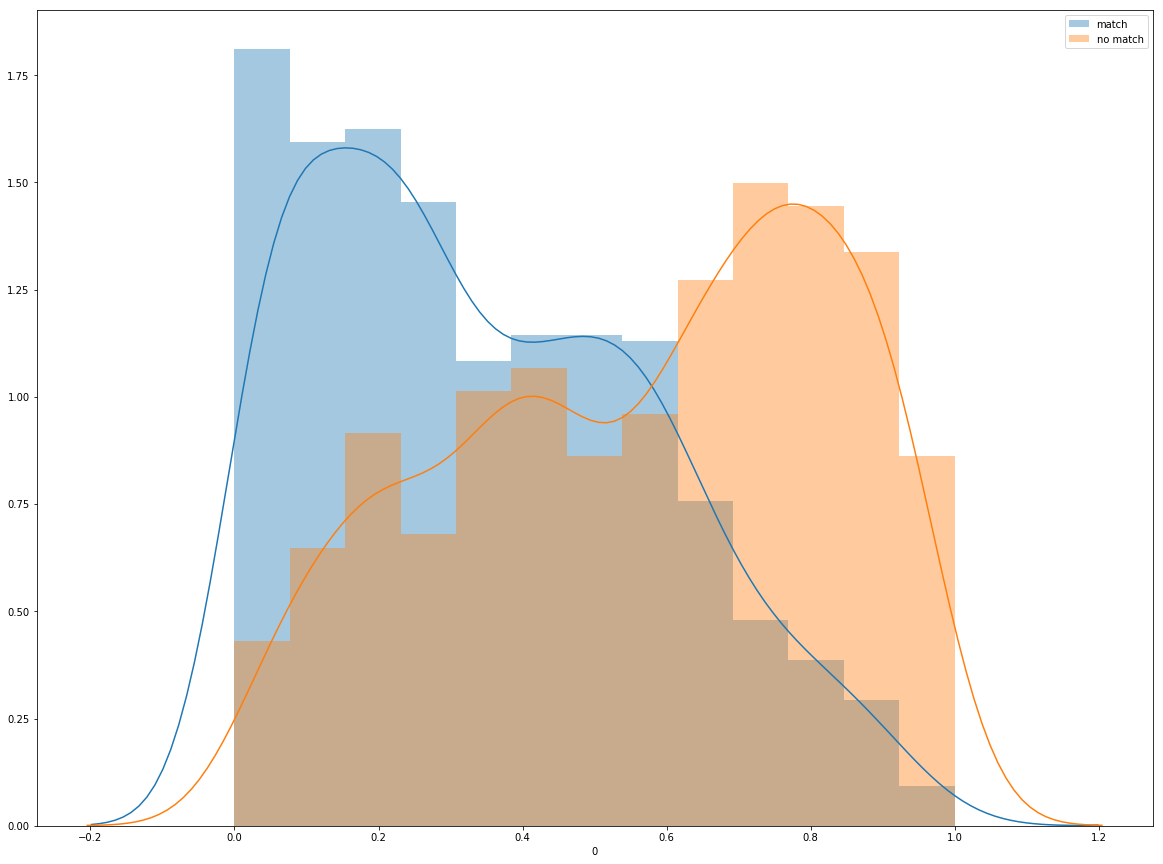




1


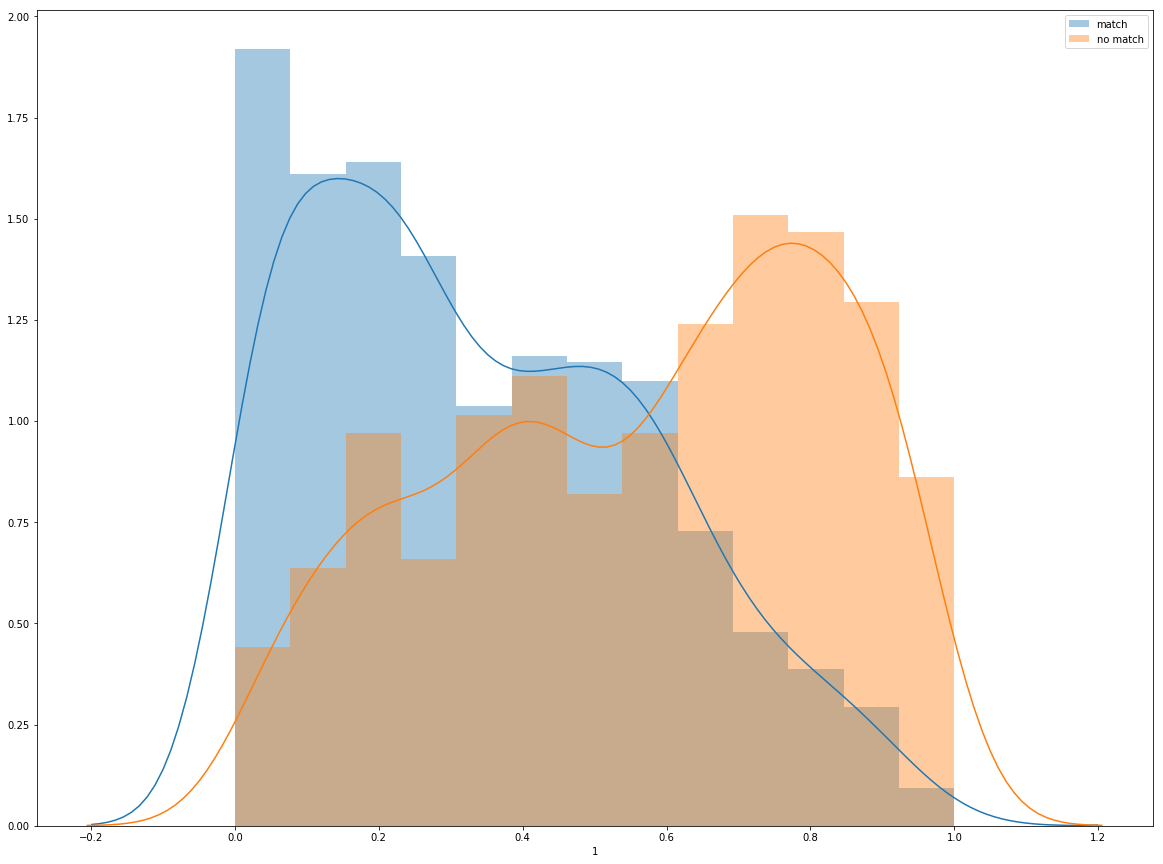




2


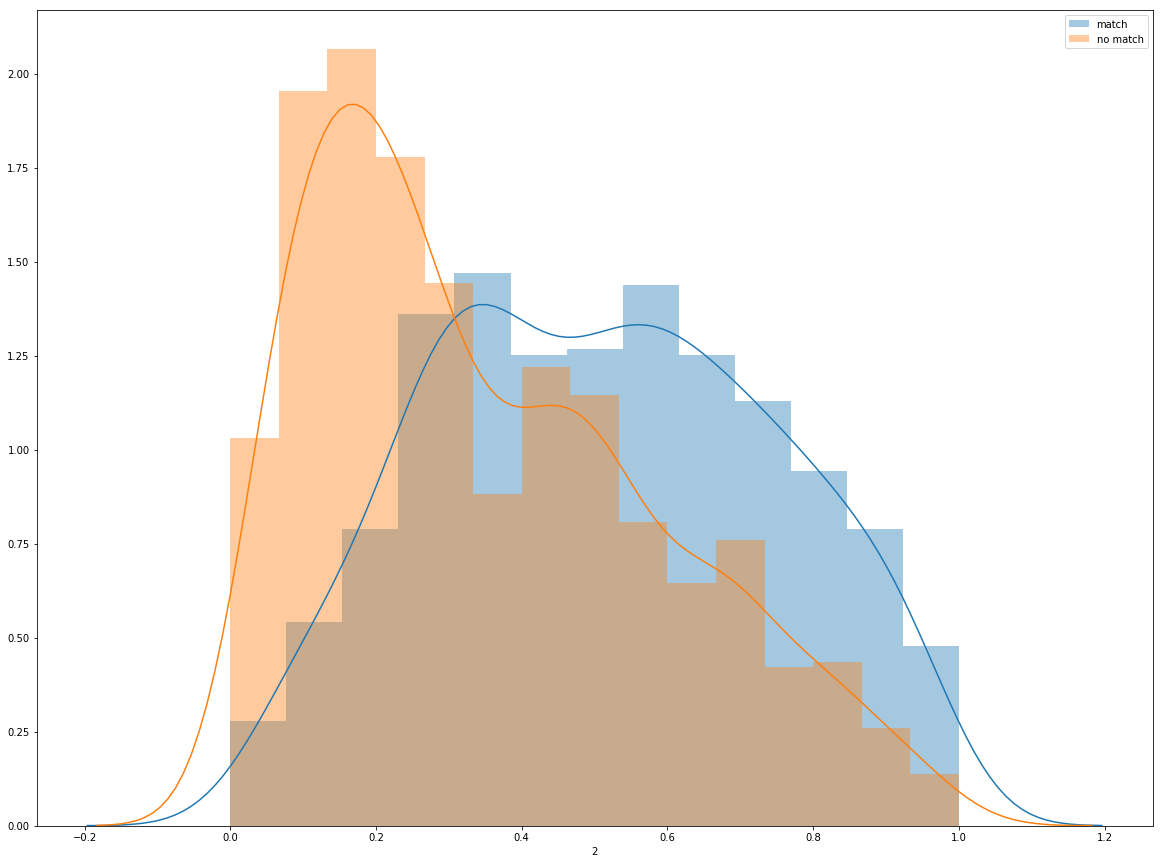




3


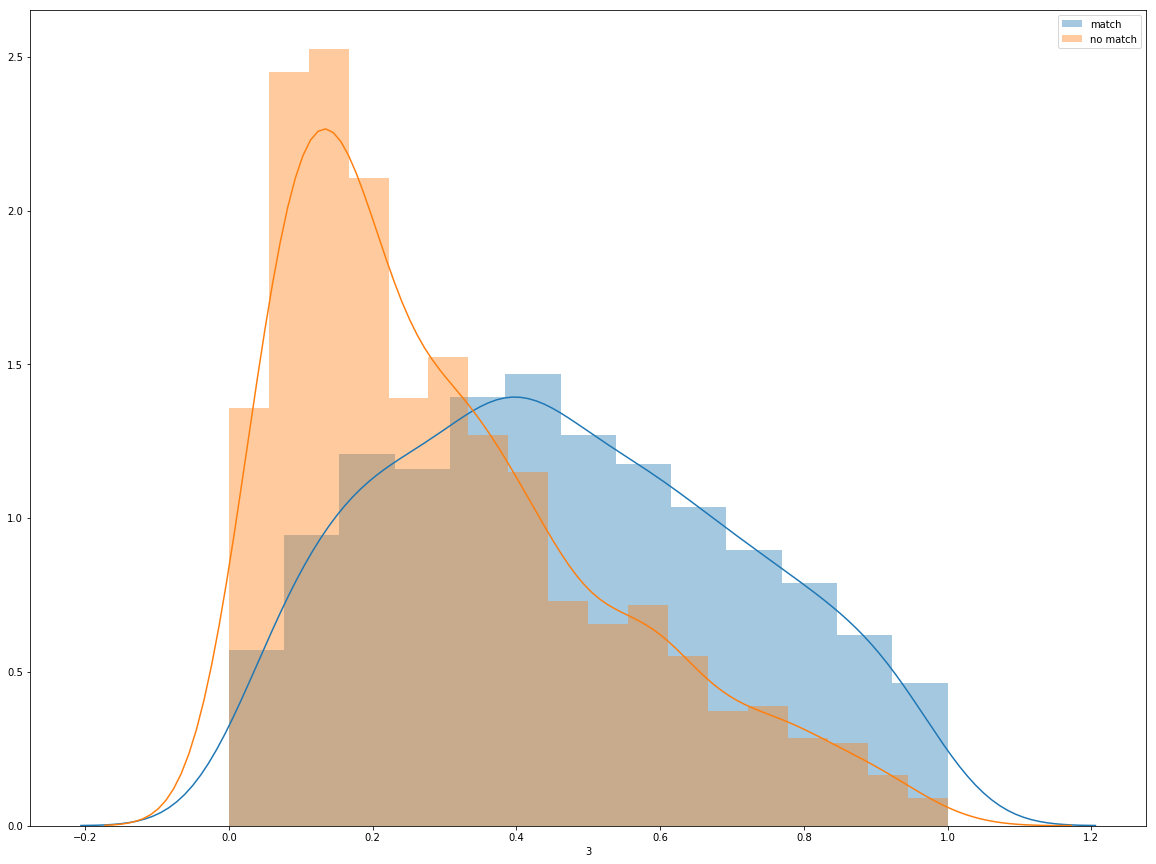




4


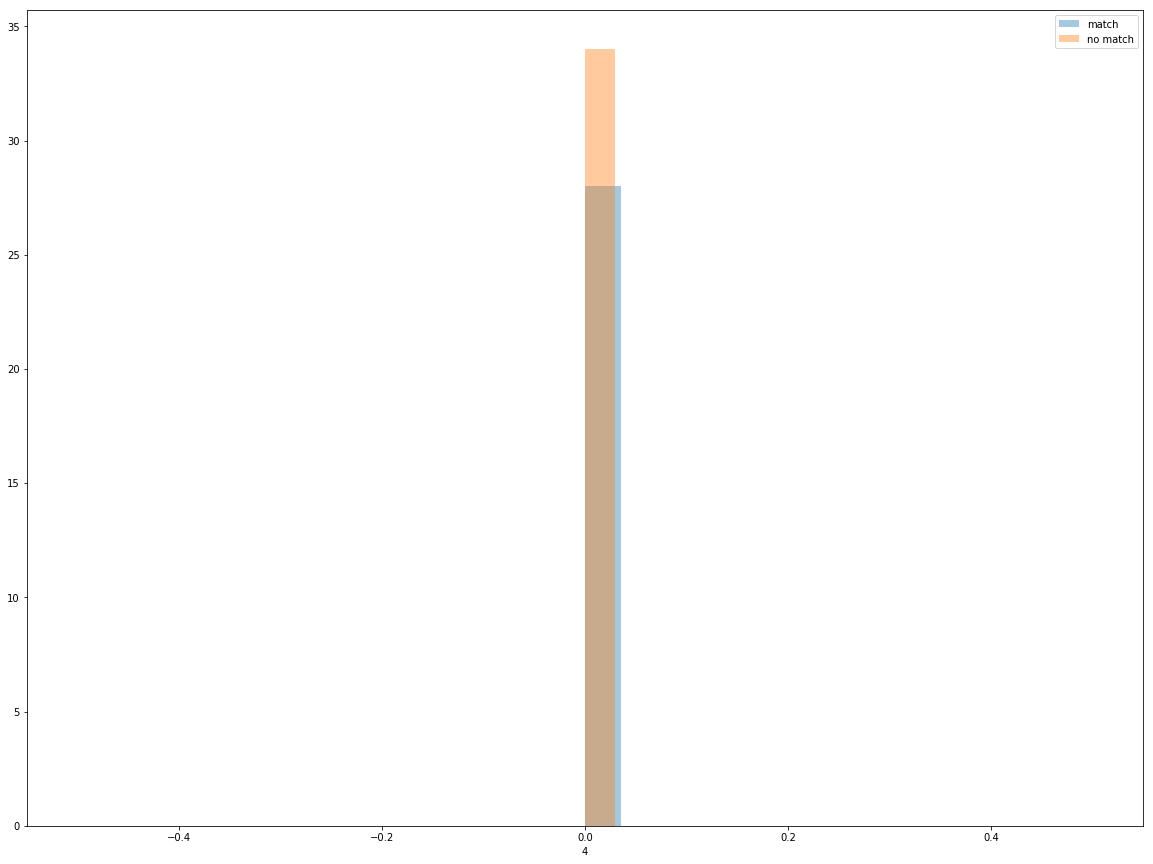




5


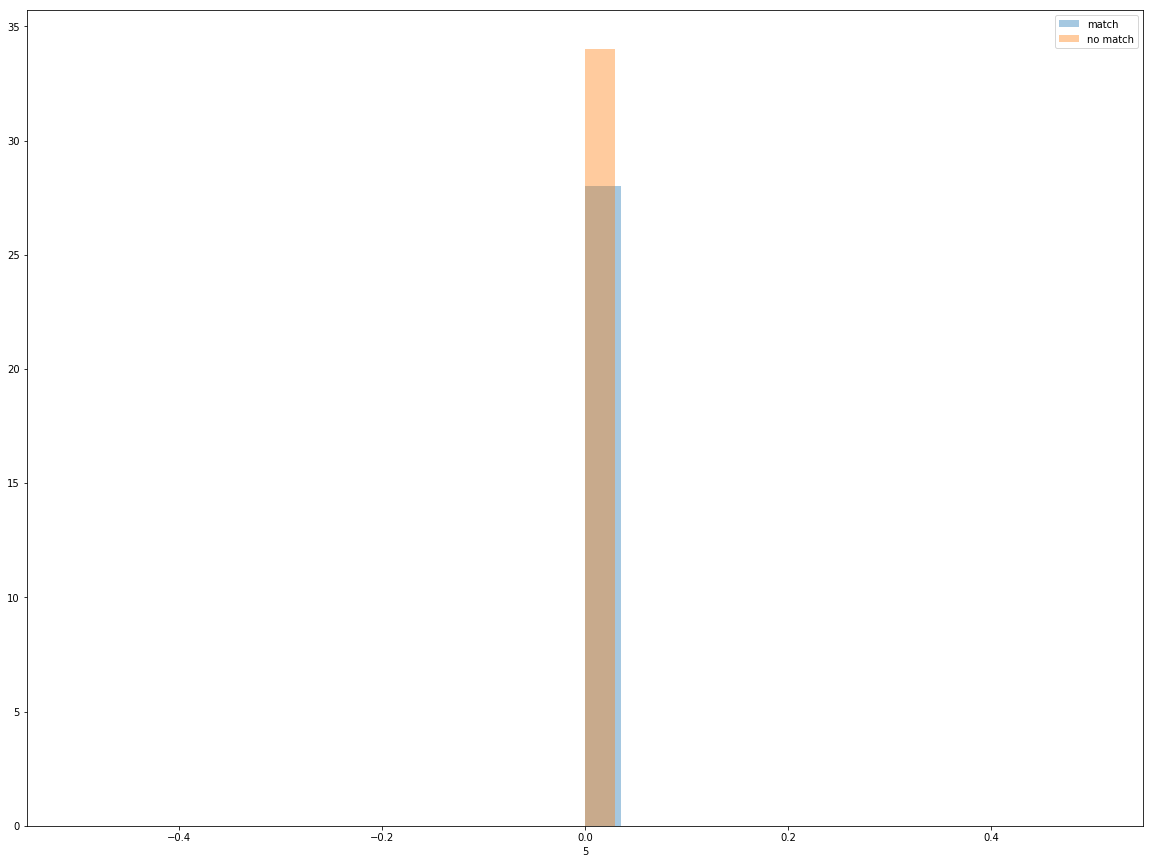




6


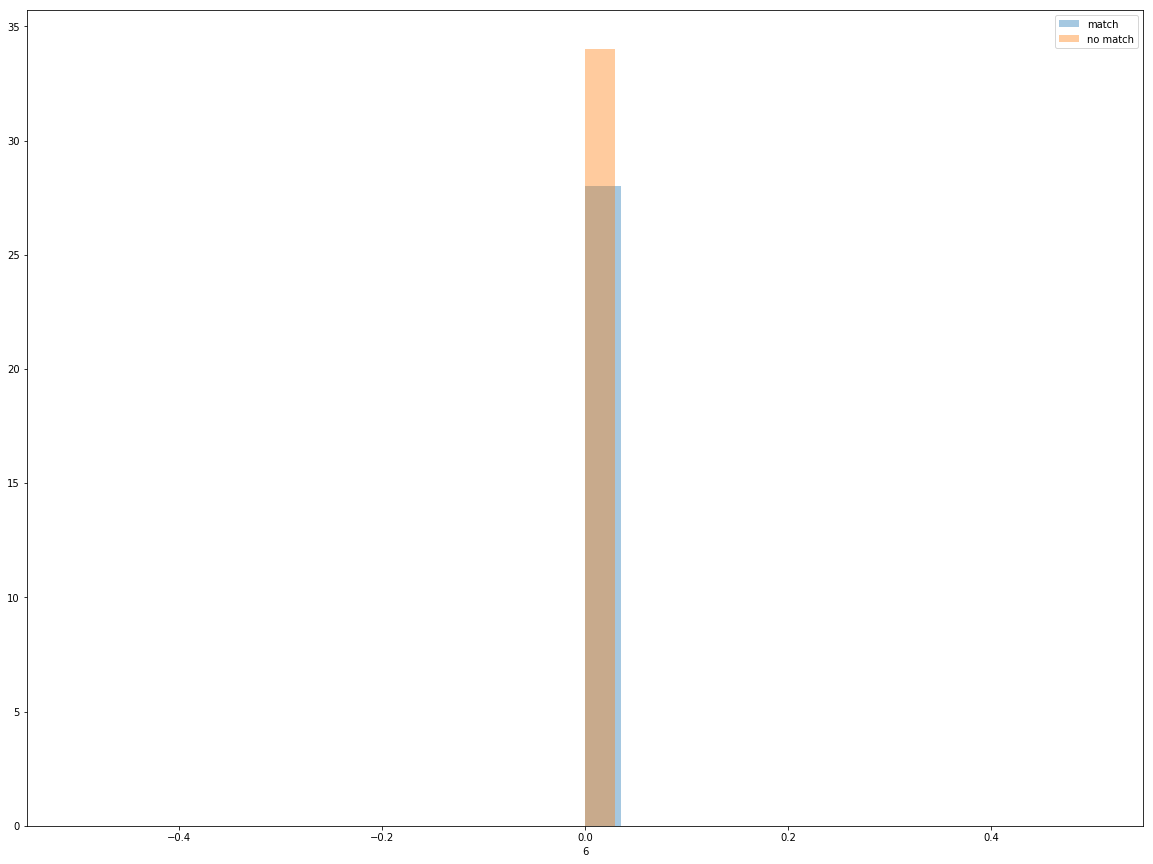




7


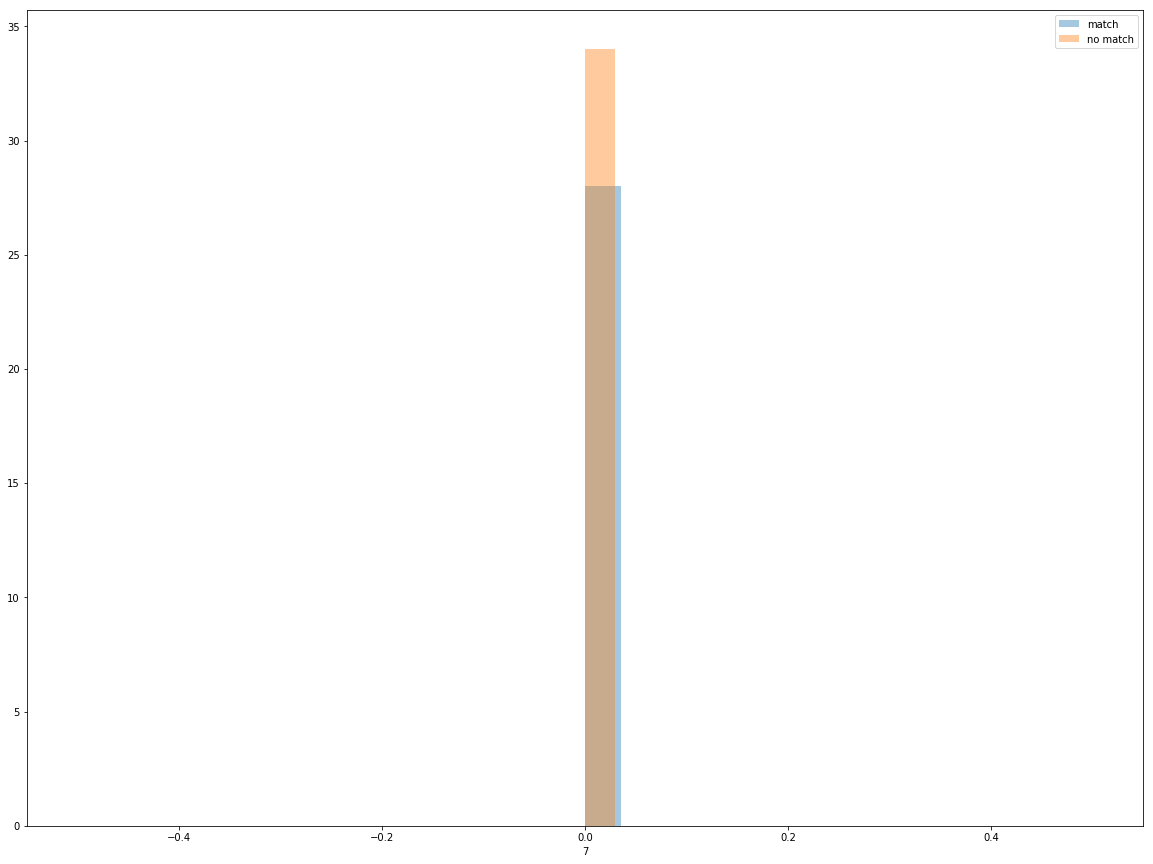




8


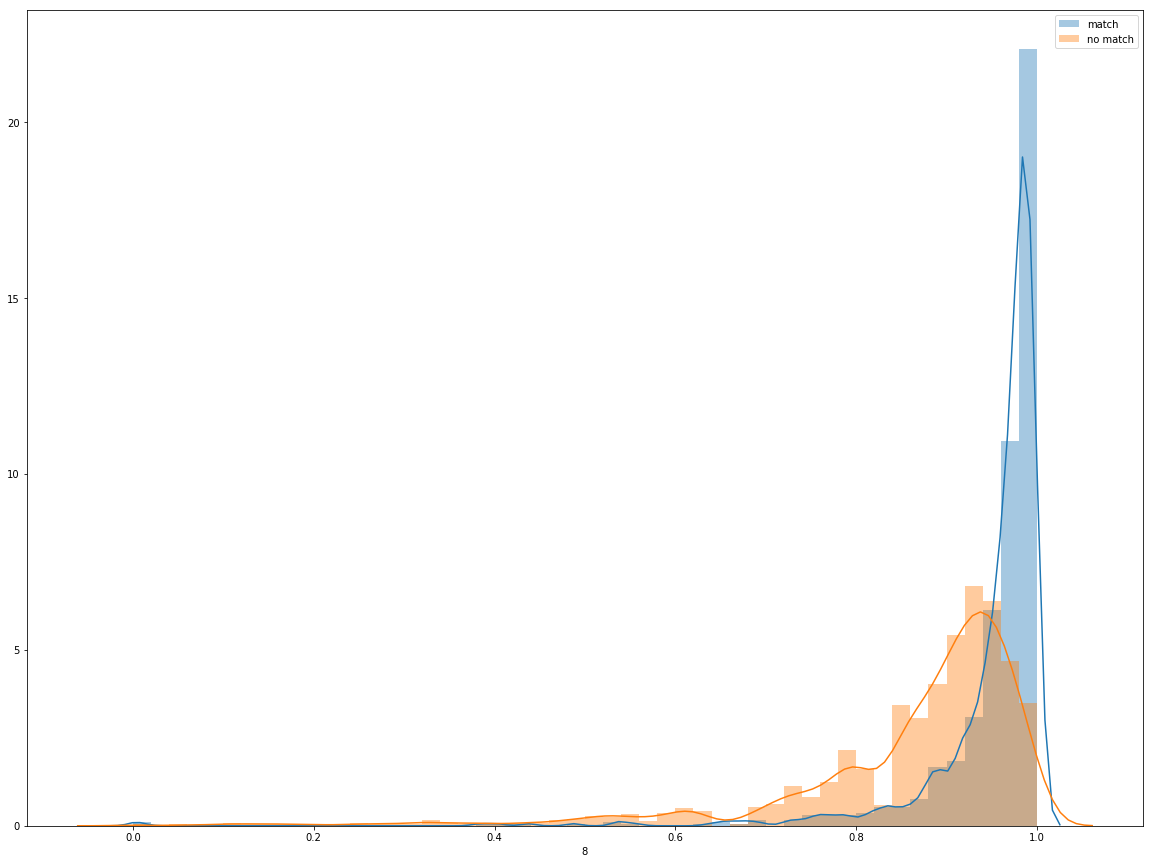




9


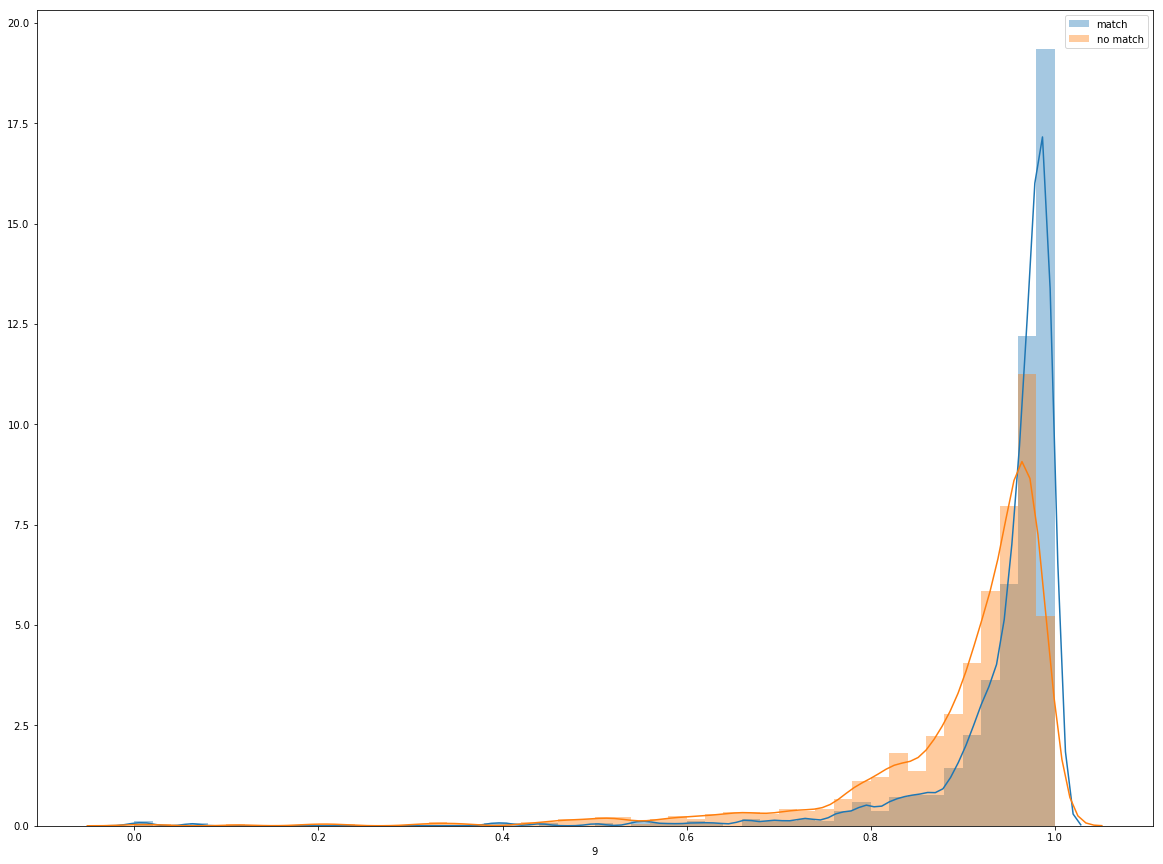




10


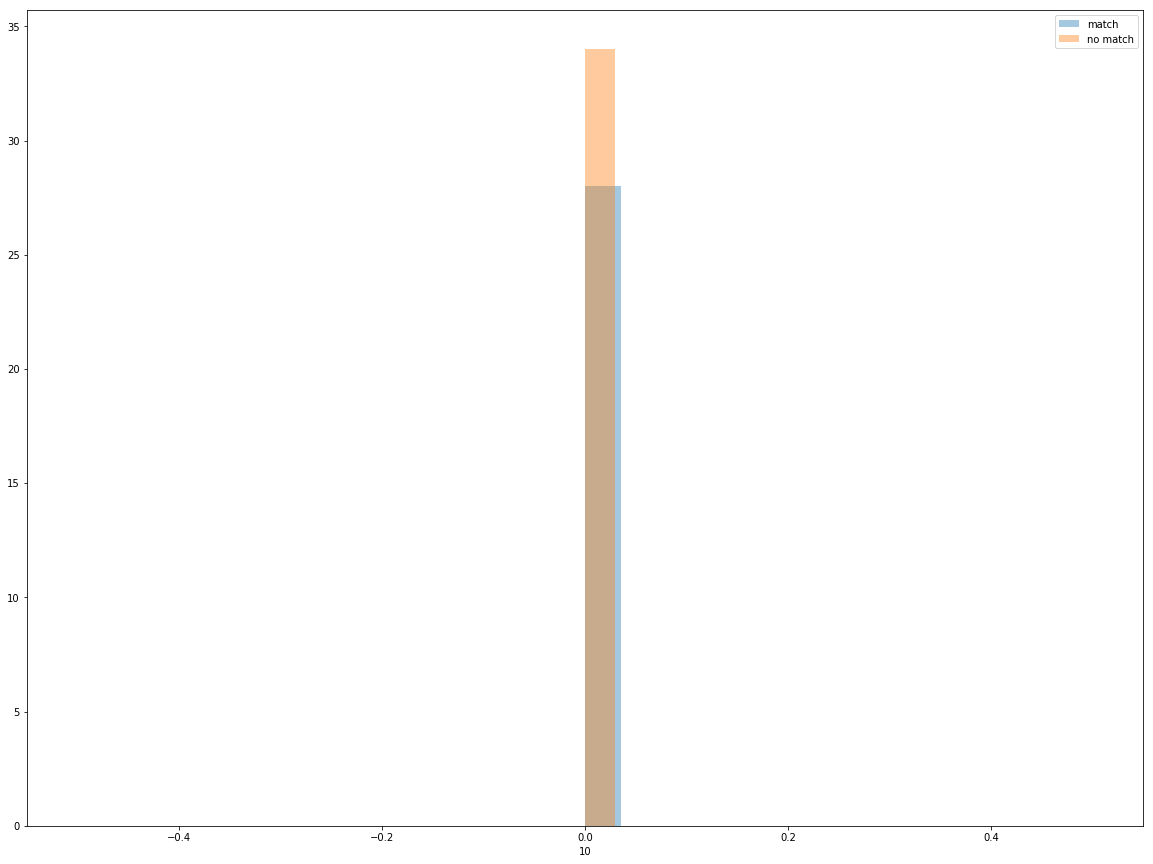




11


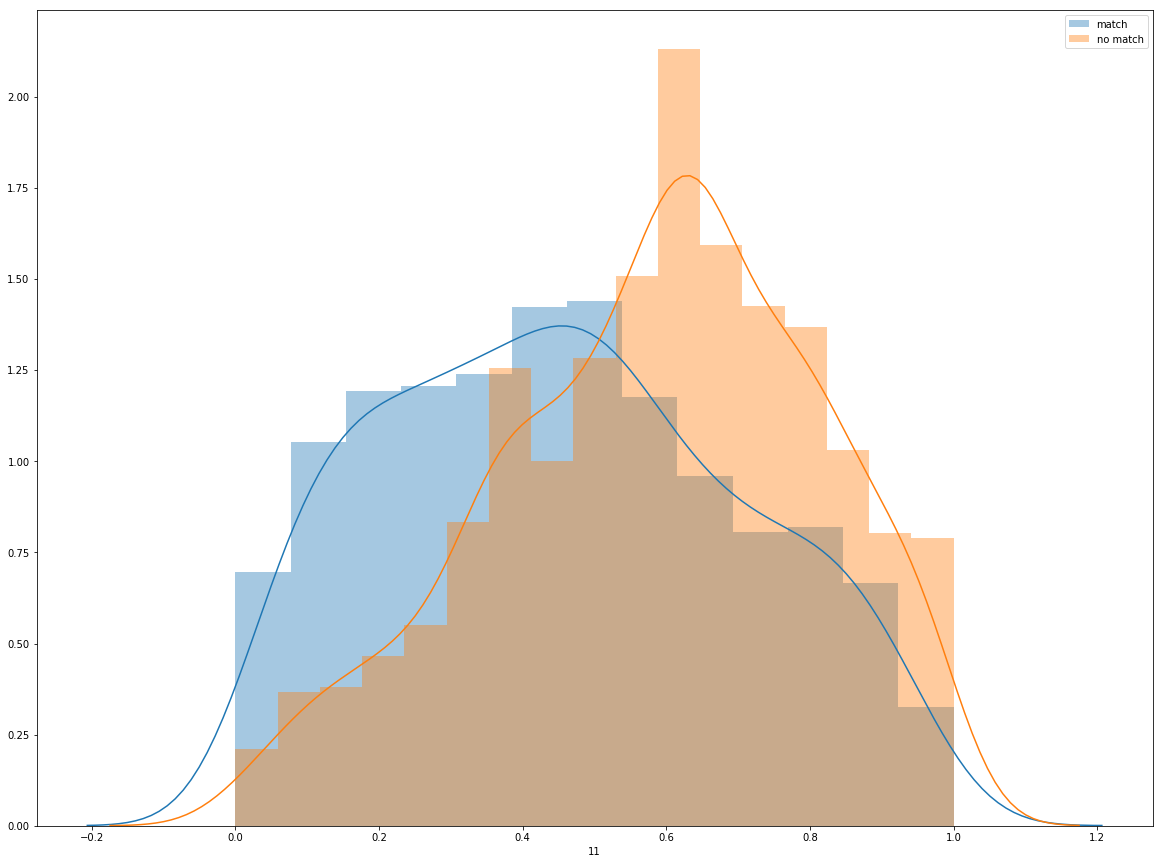




12


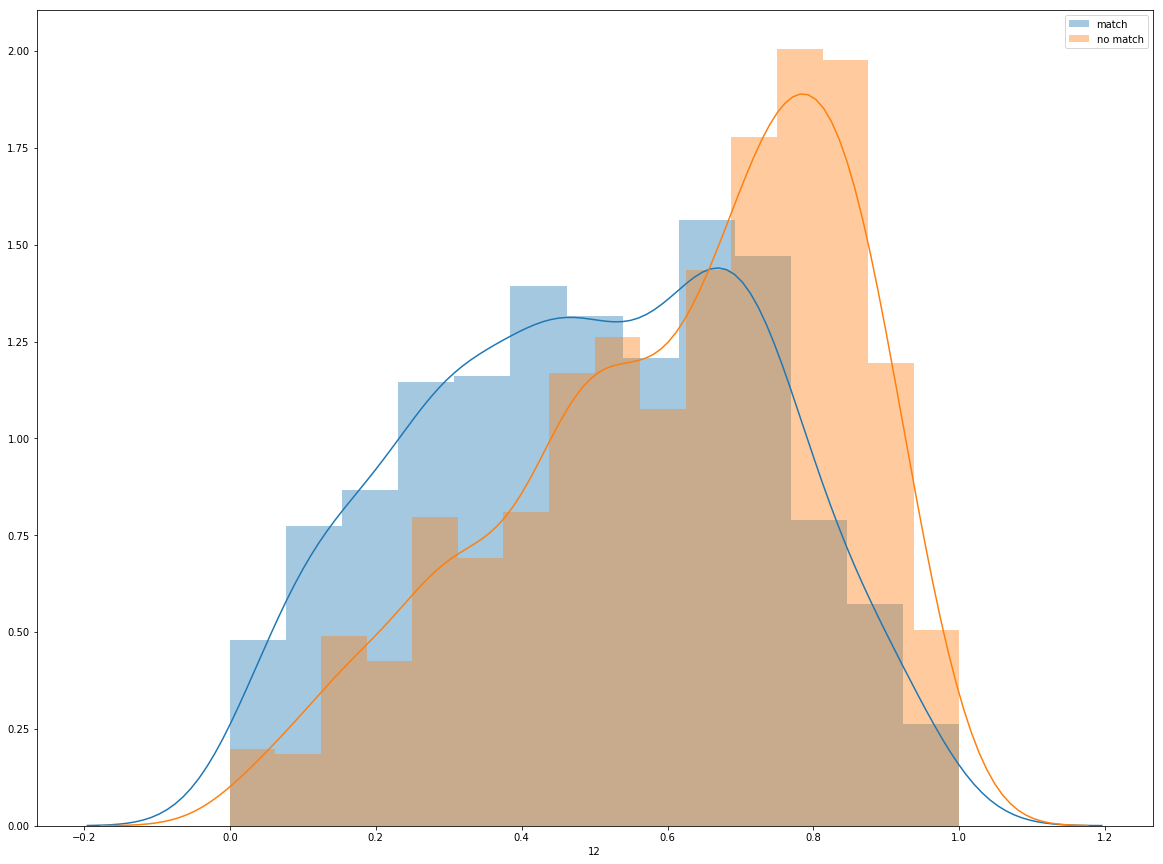




13


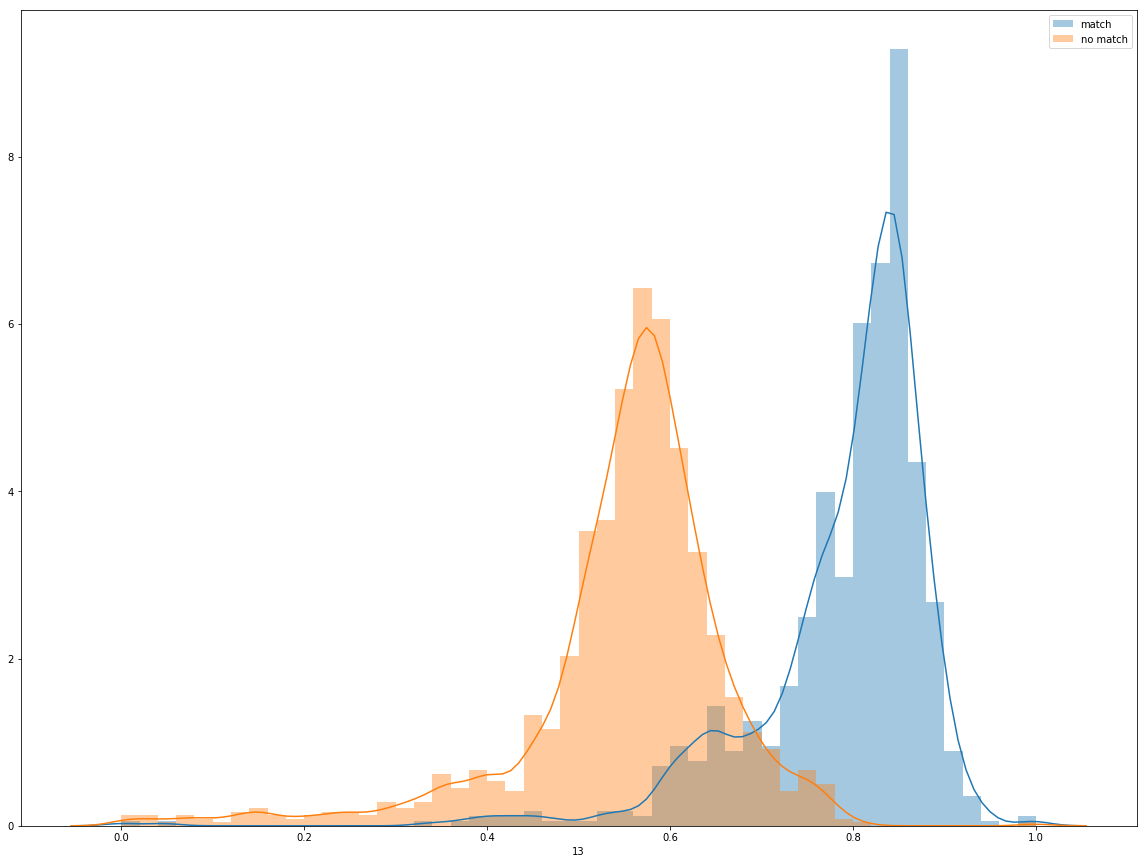




14


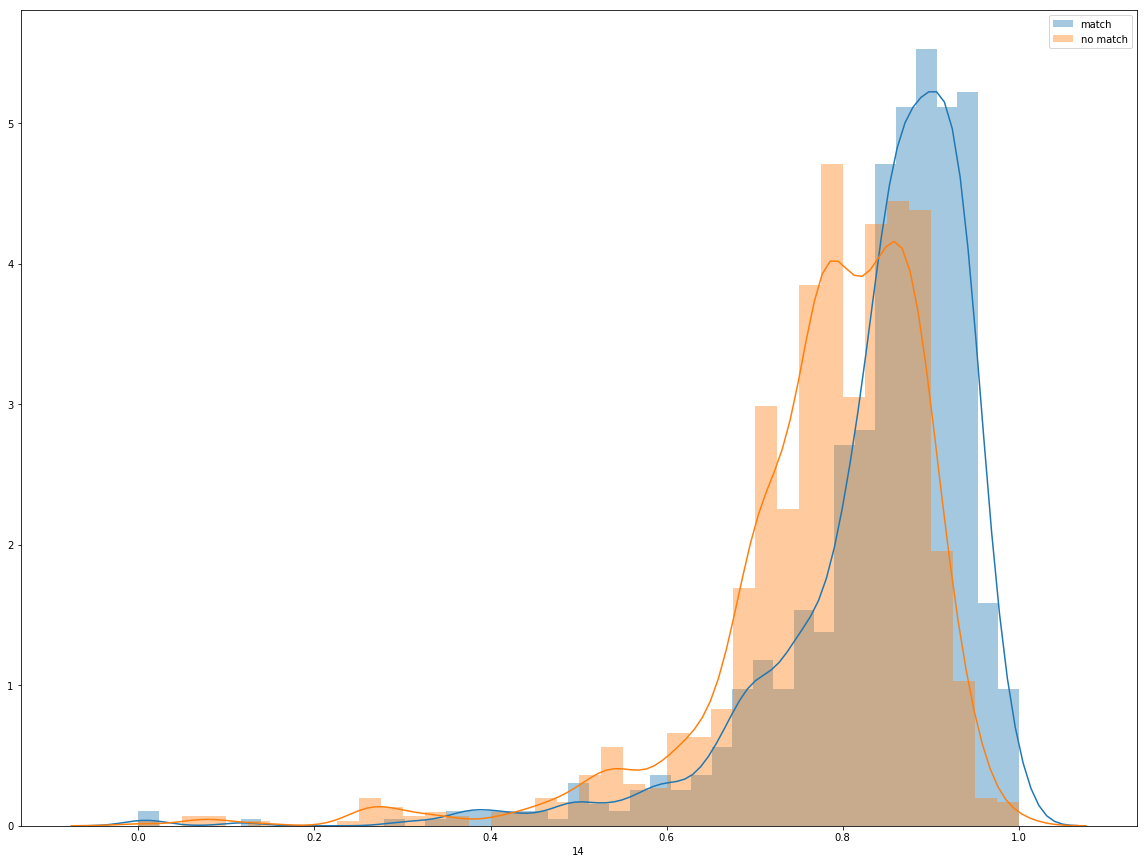




15


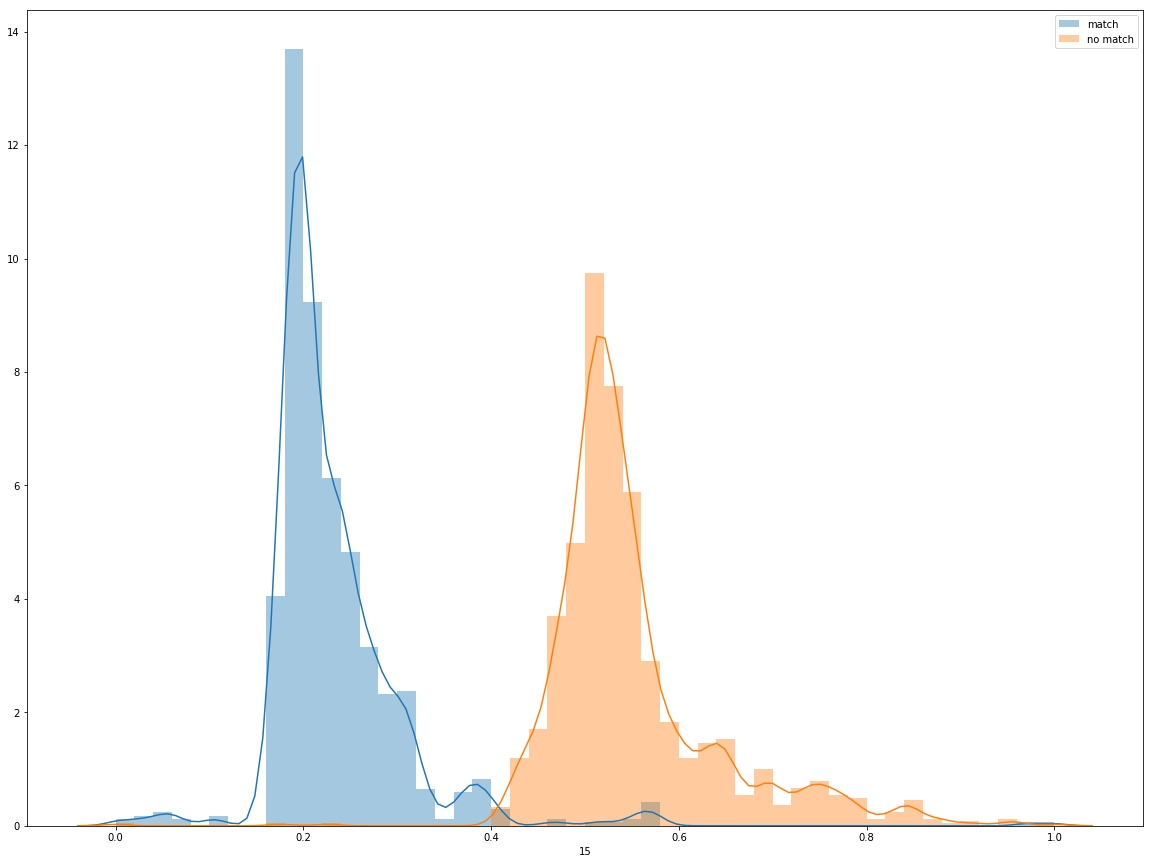




16


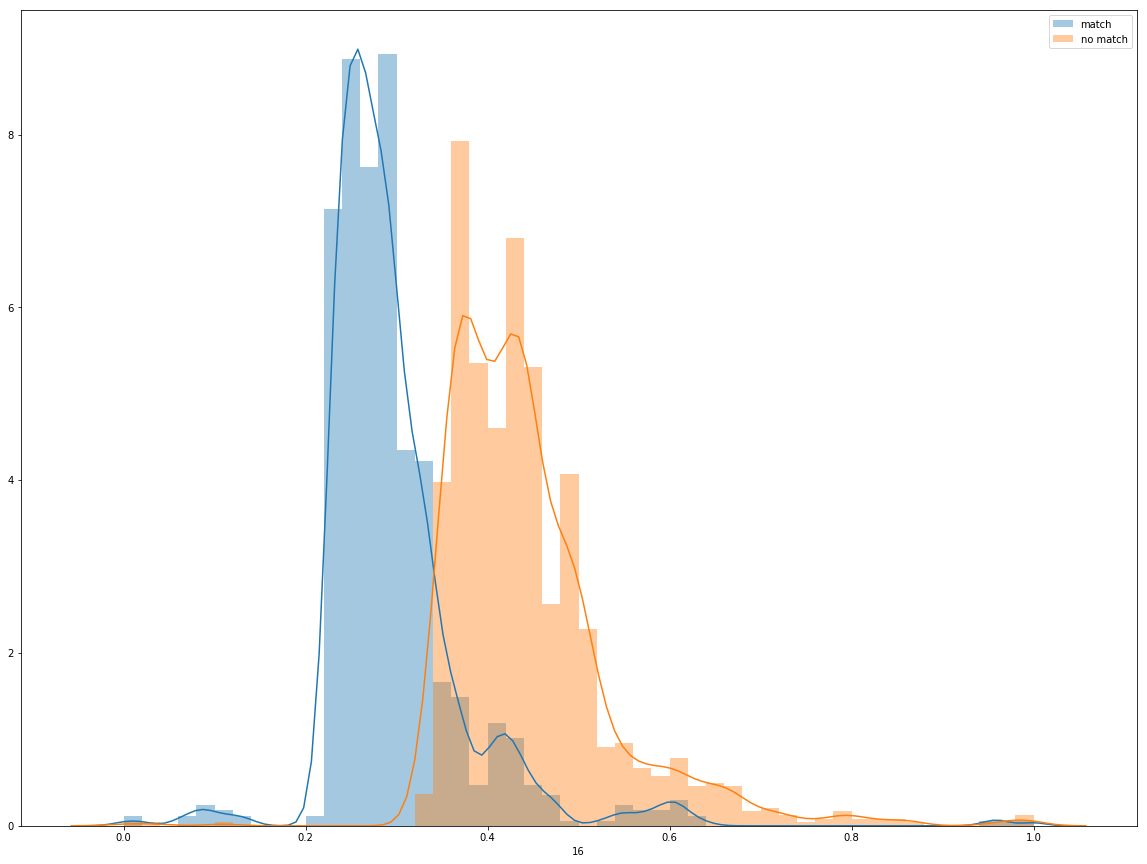




17


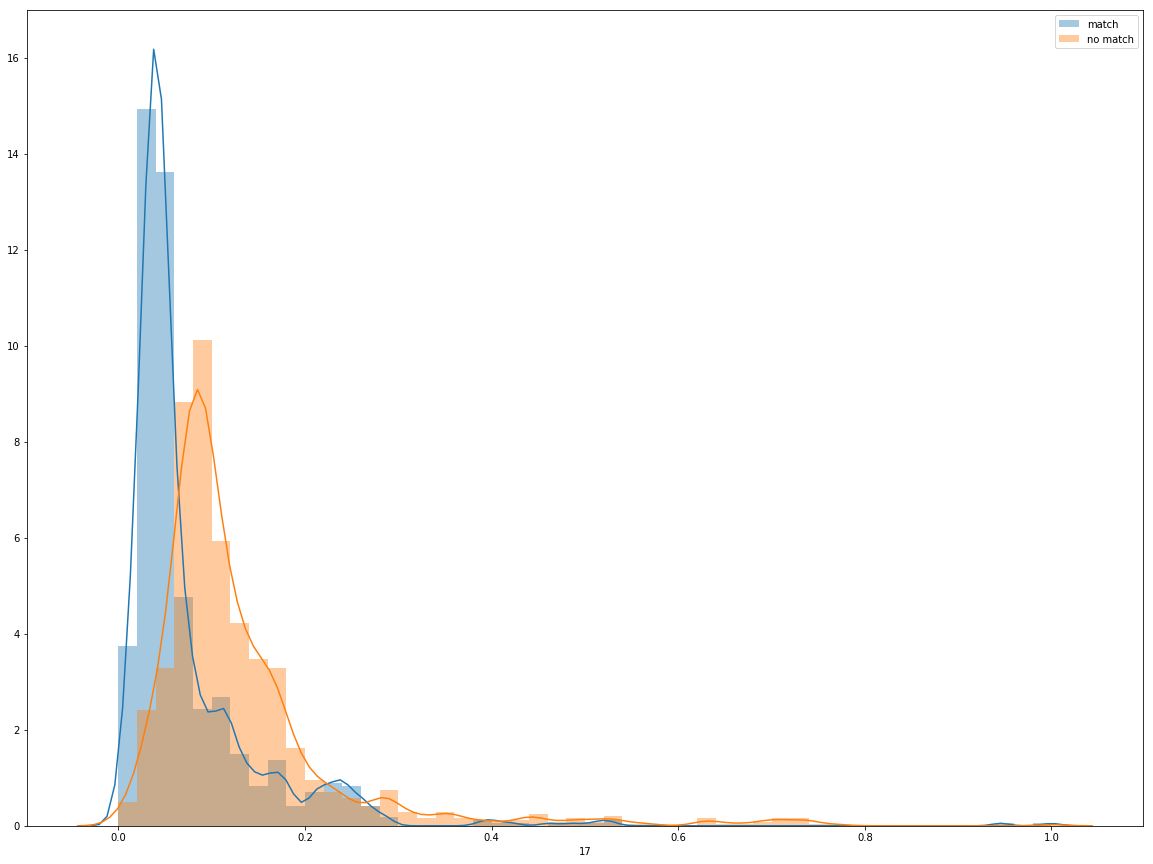




18


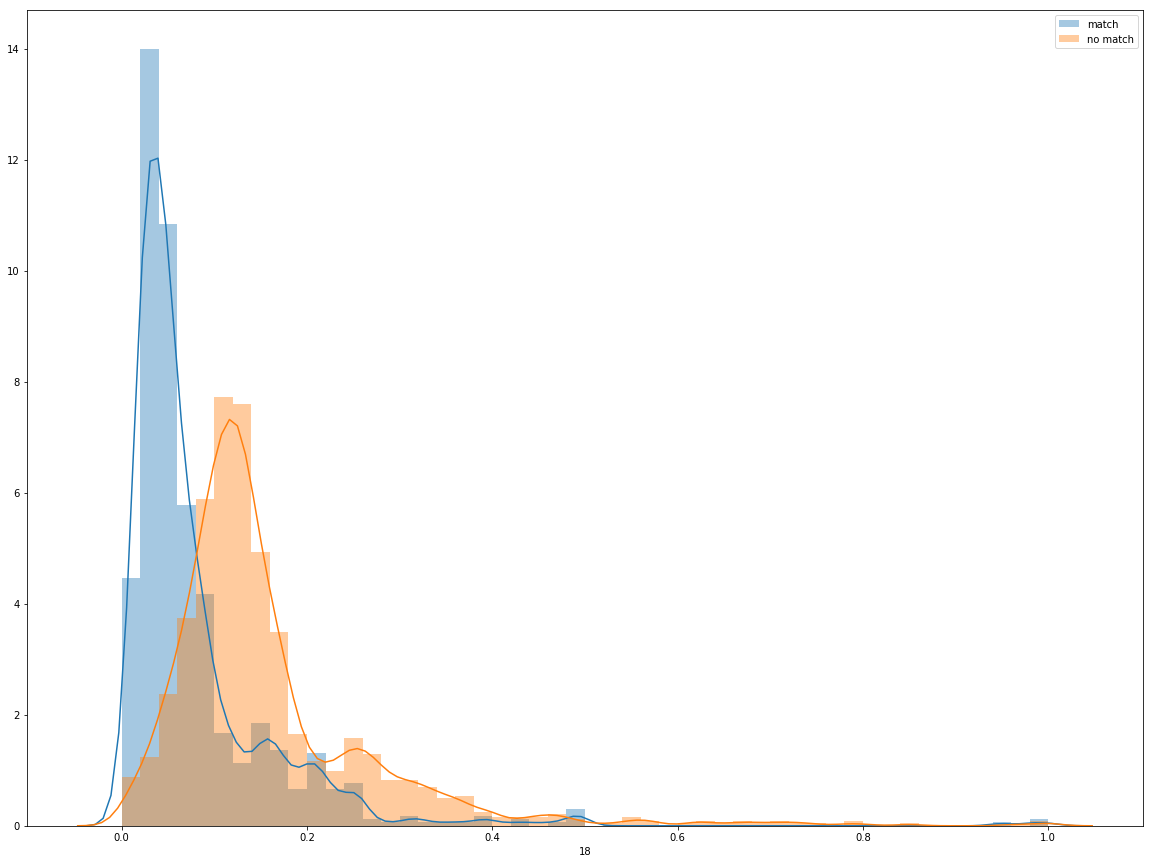




19


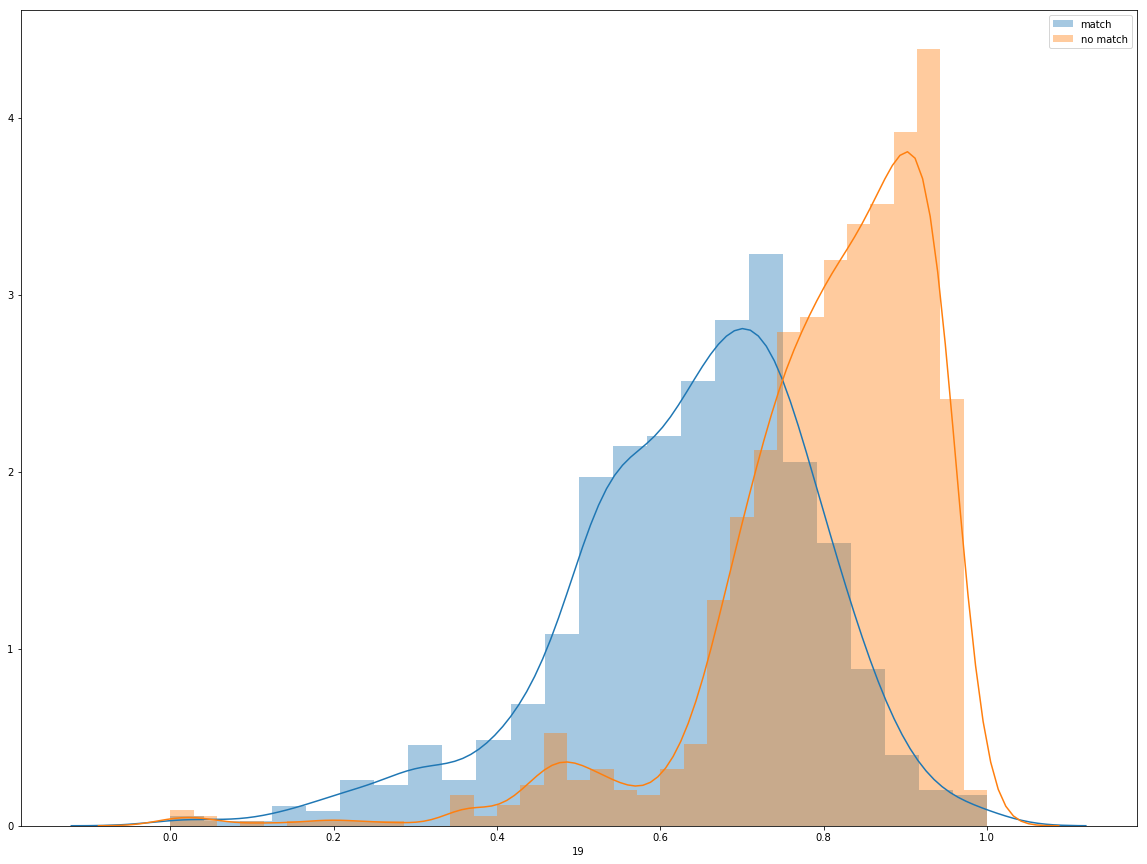




20


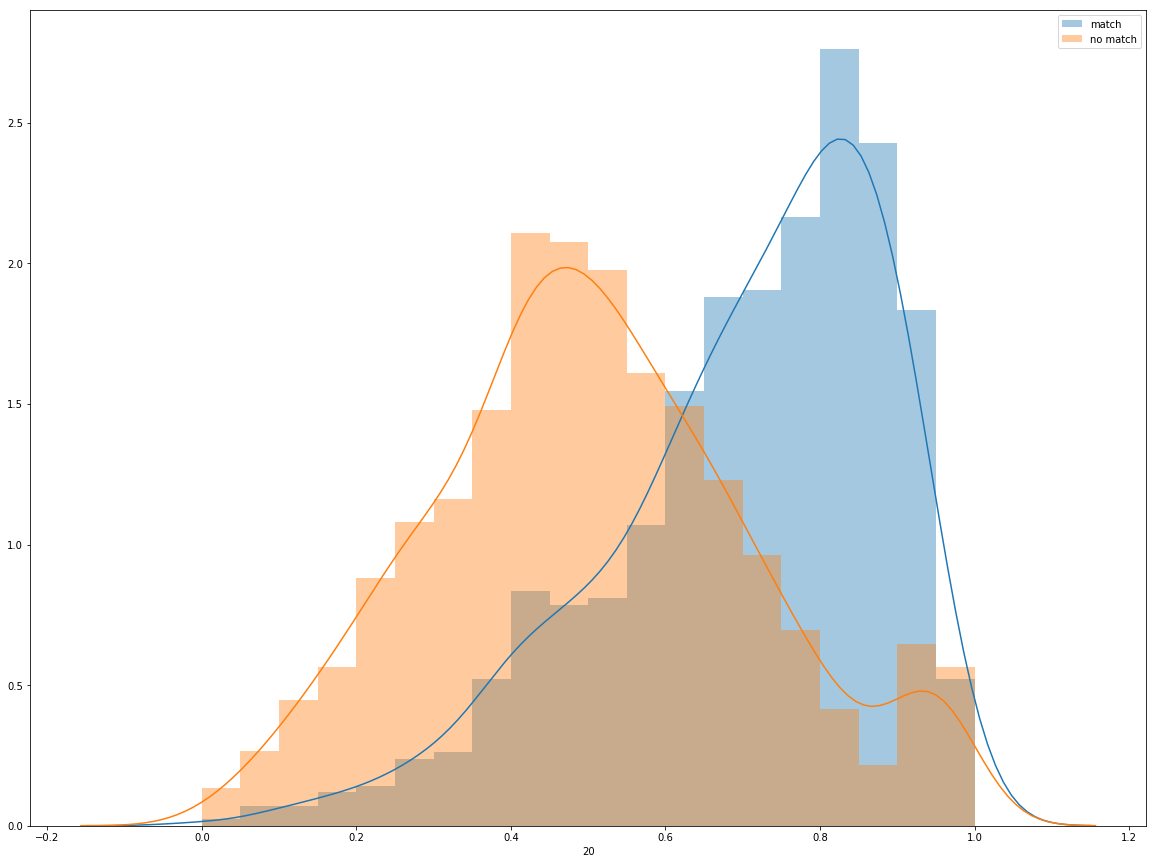




21


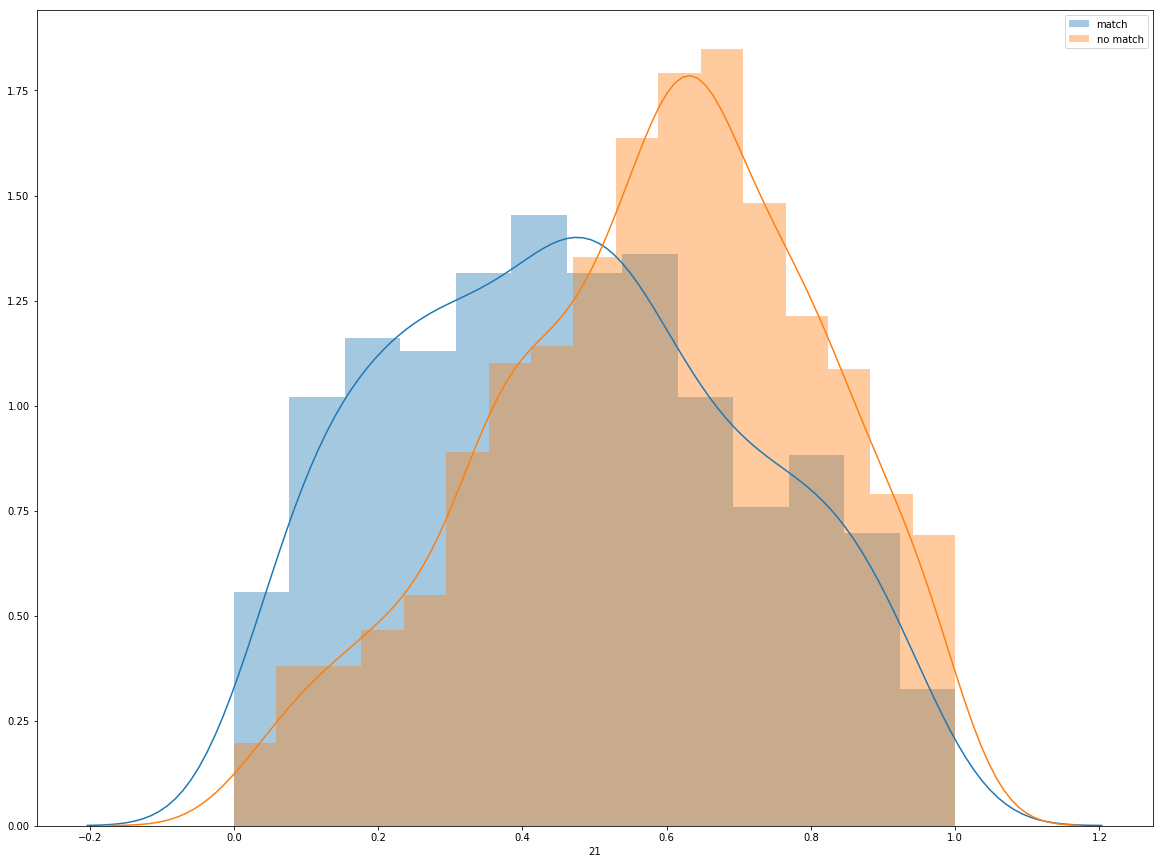




22


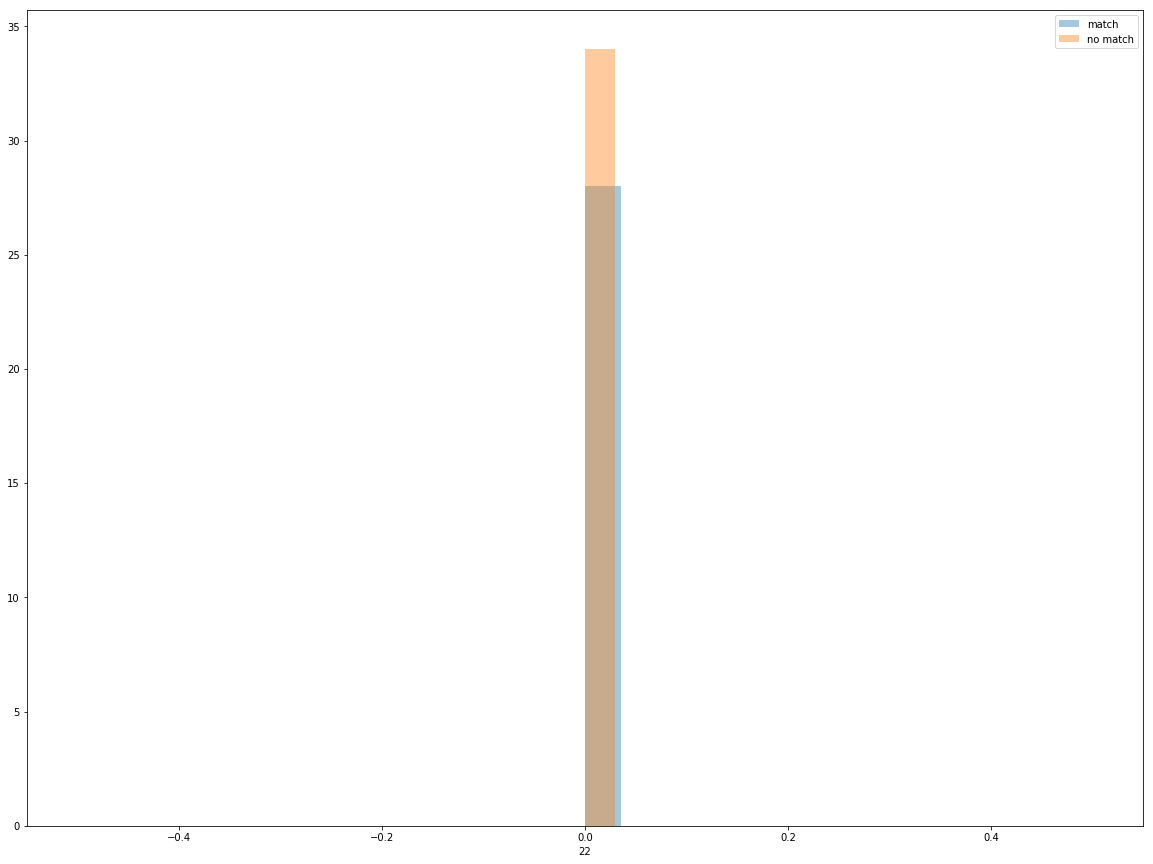




23


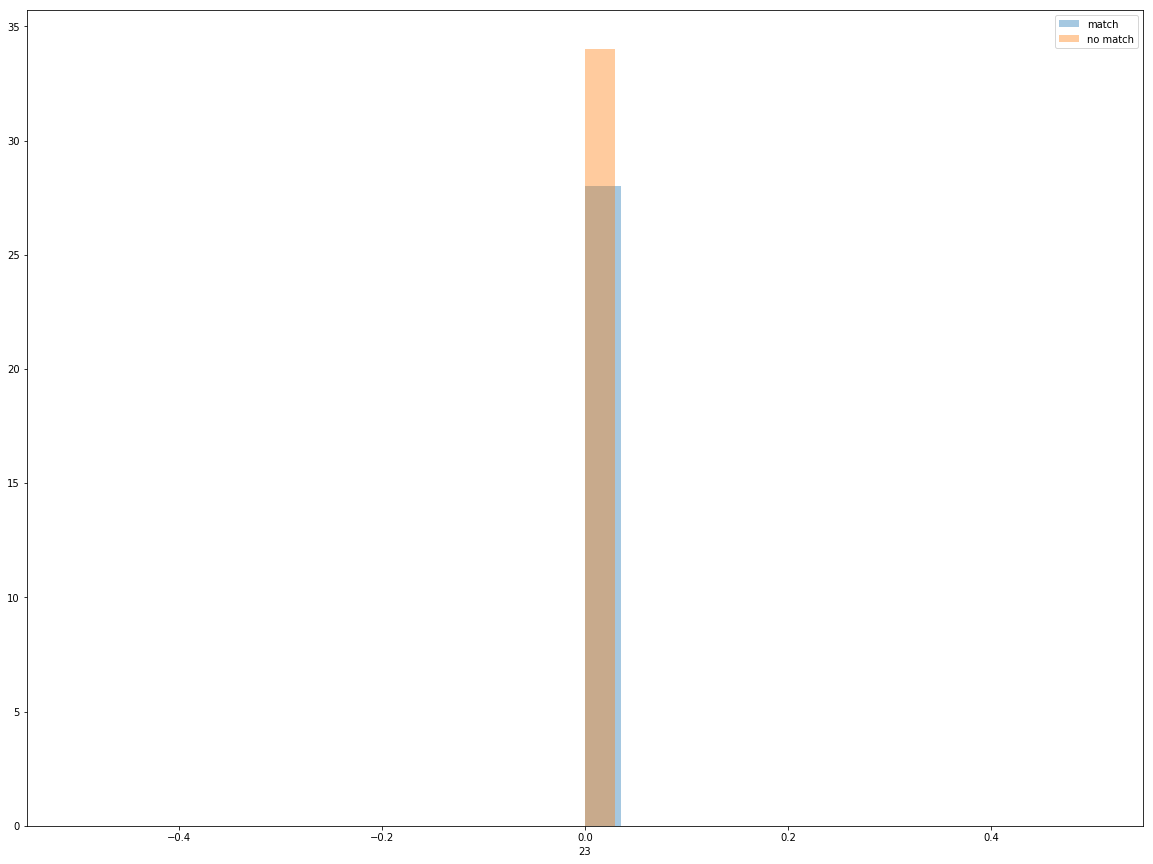




24


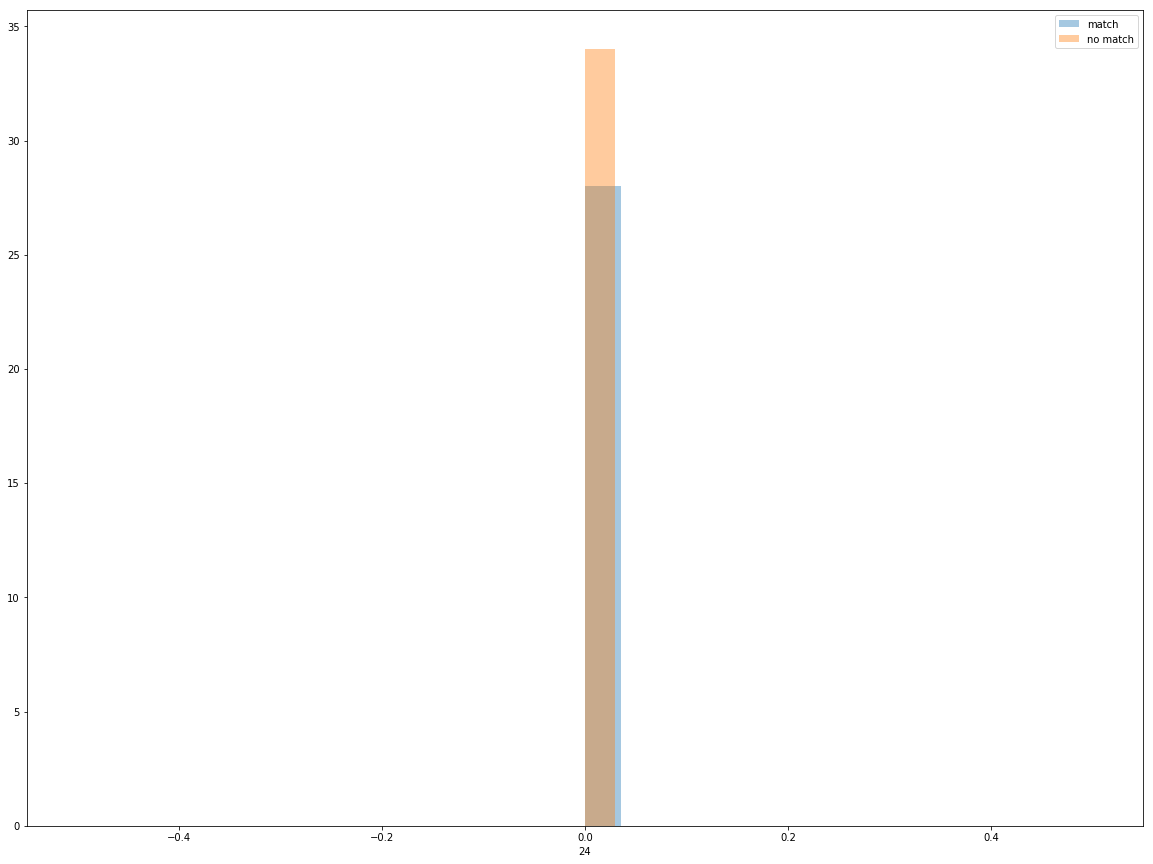




25


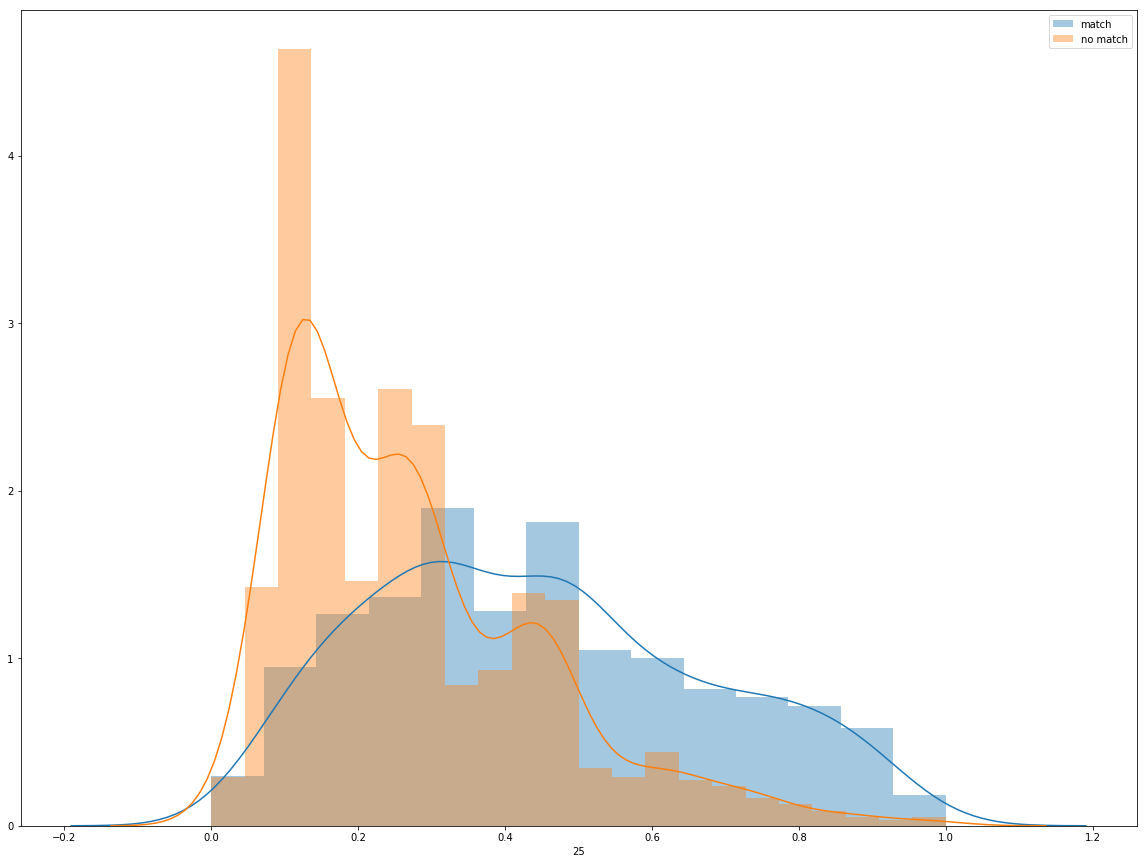




26


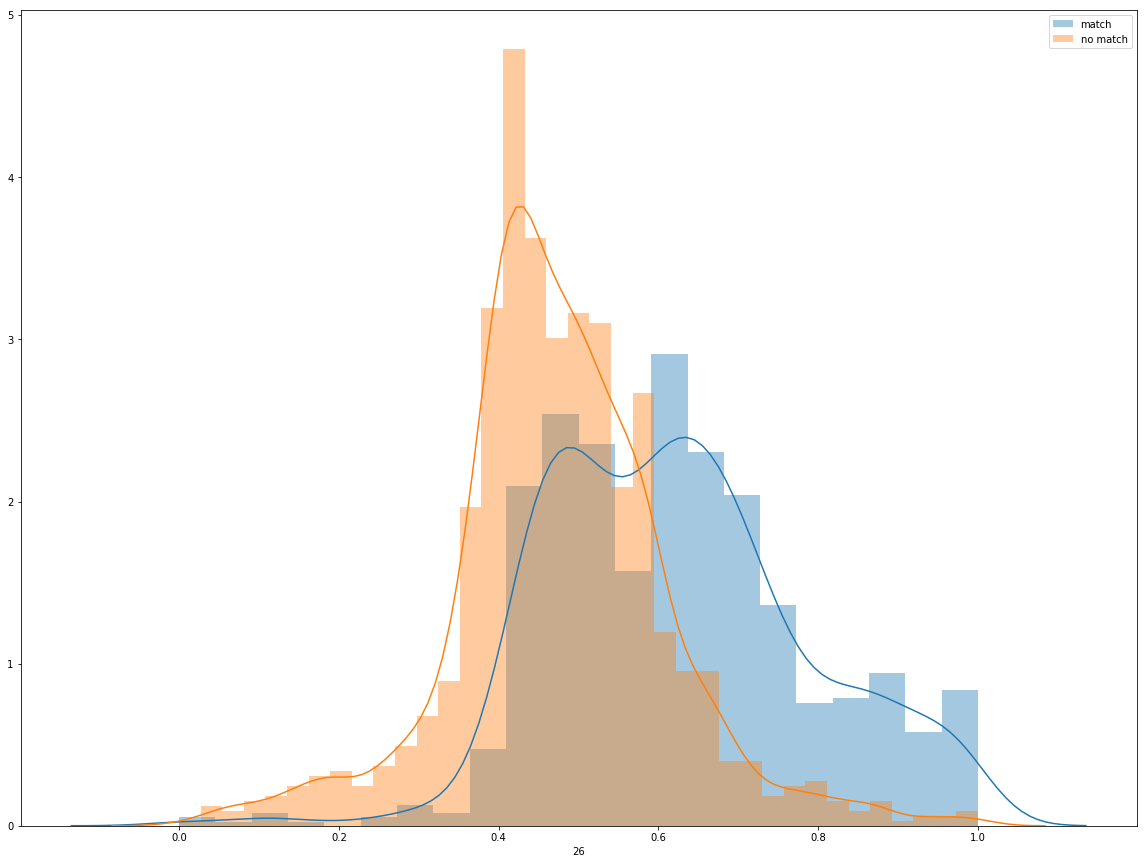




27


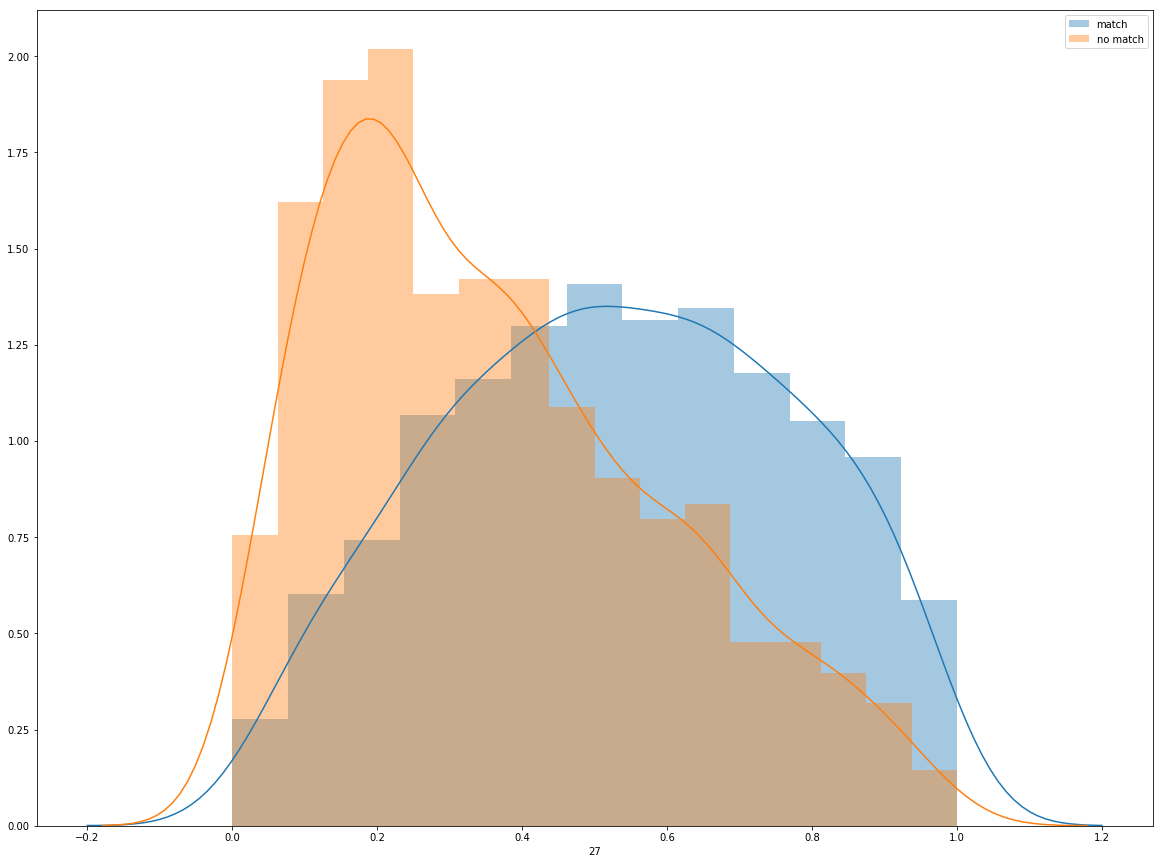




28


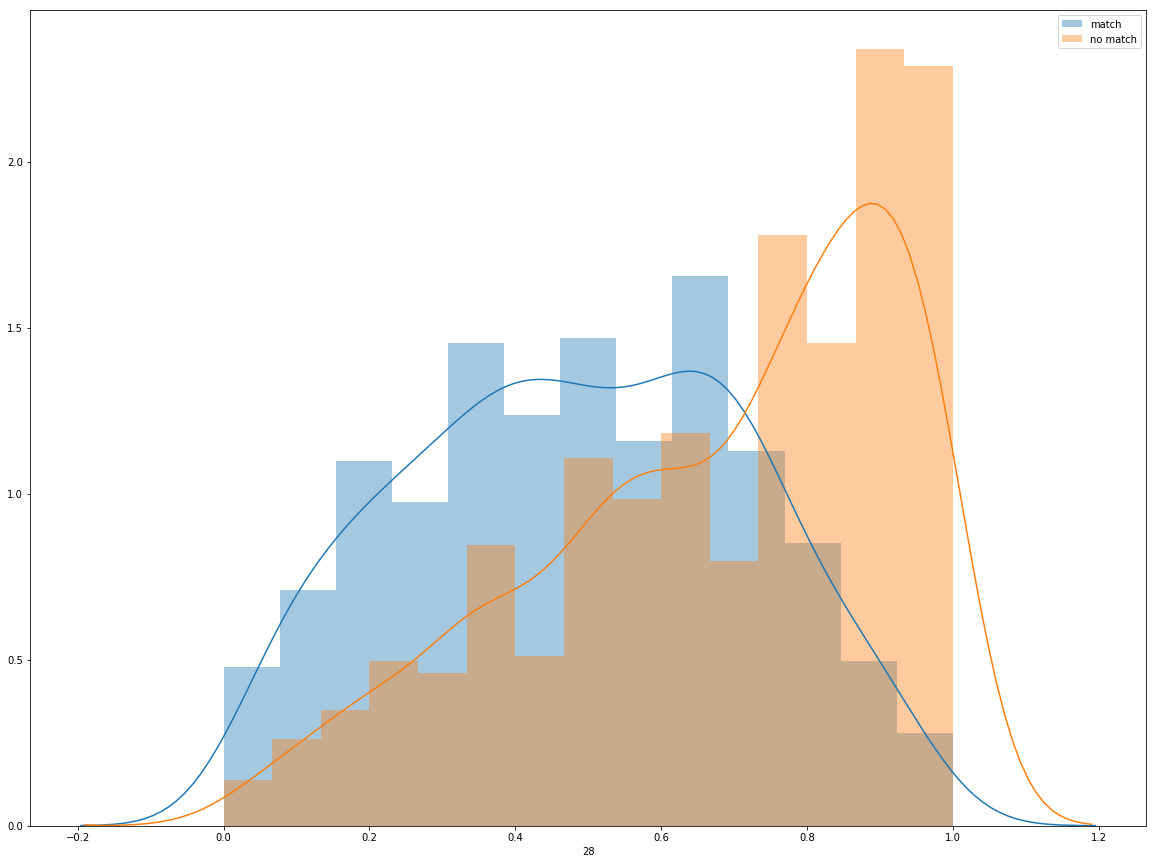




29


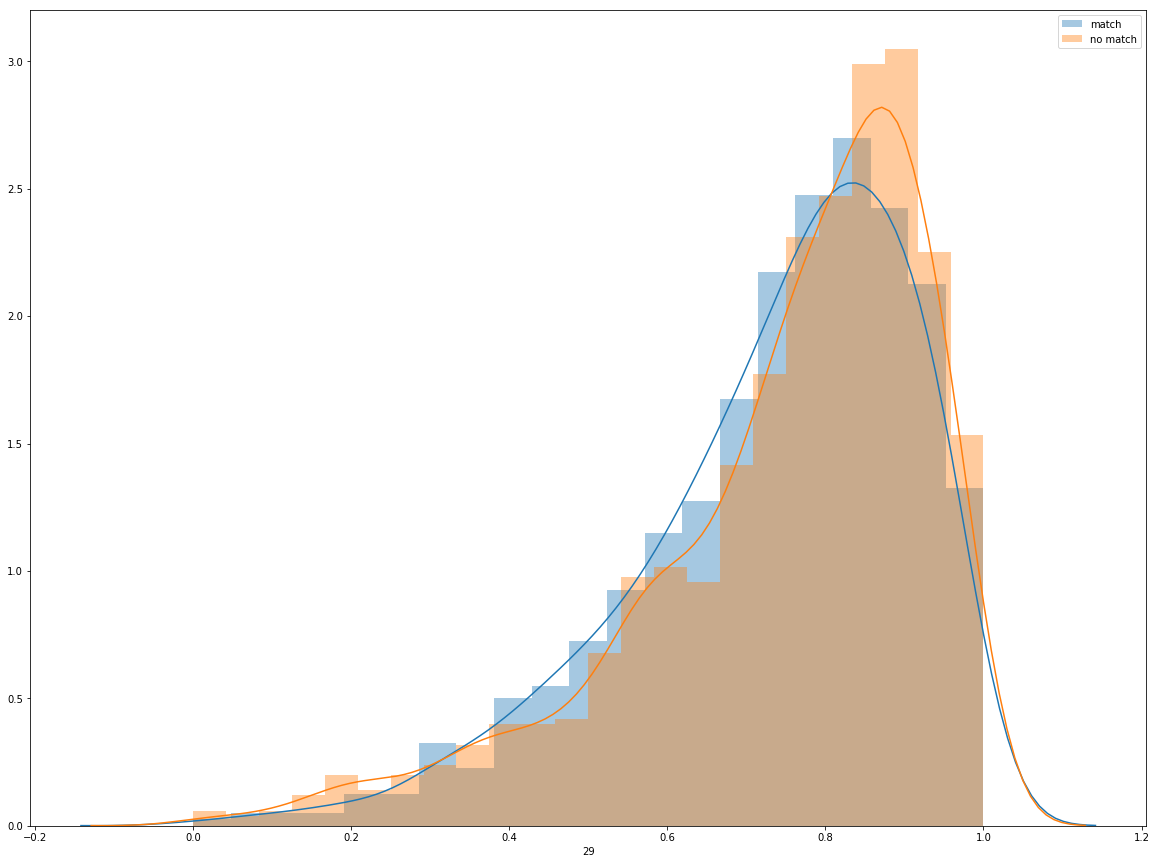




30


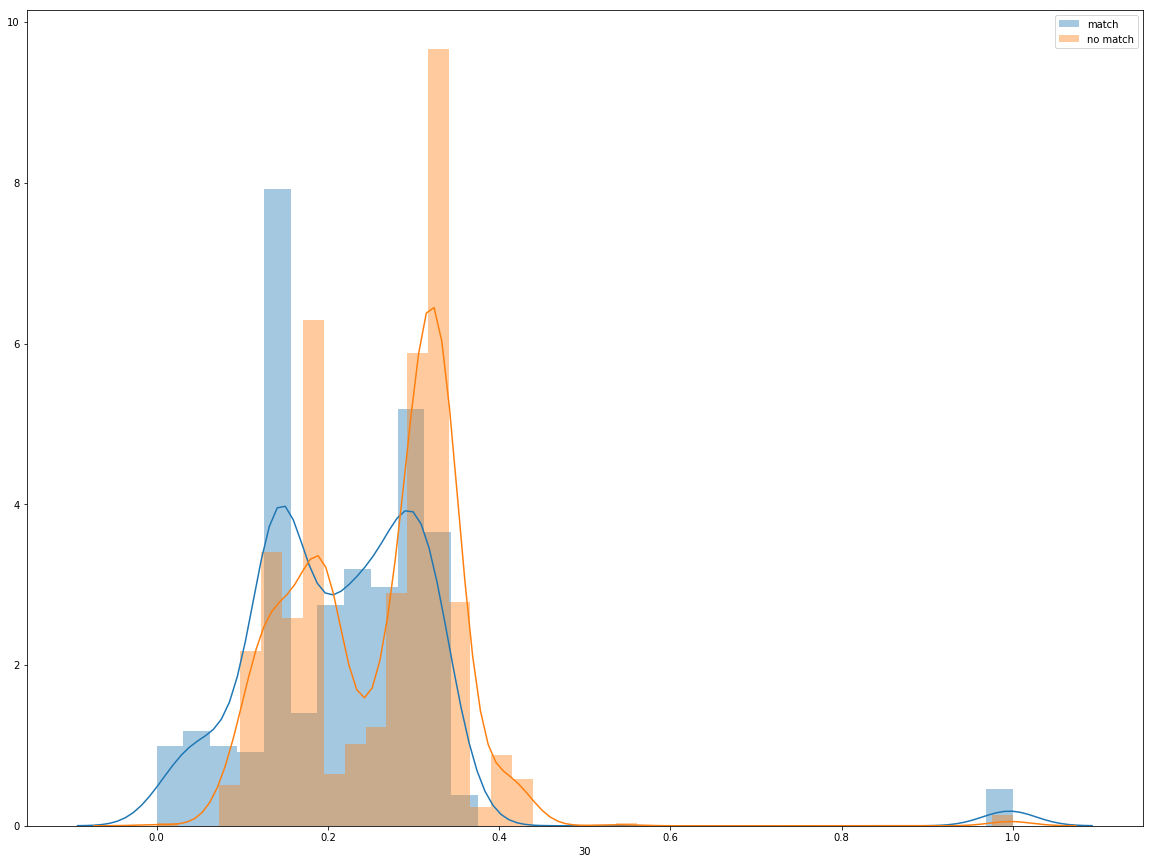




31


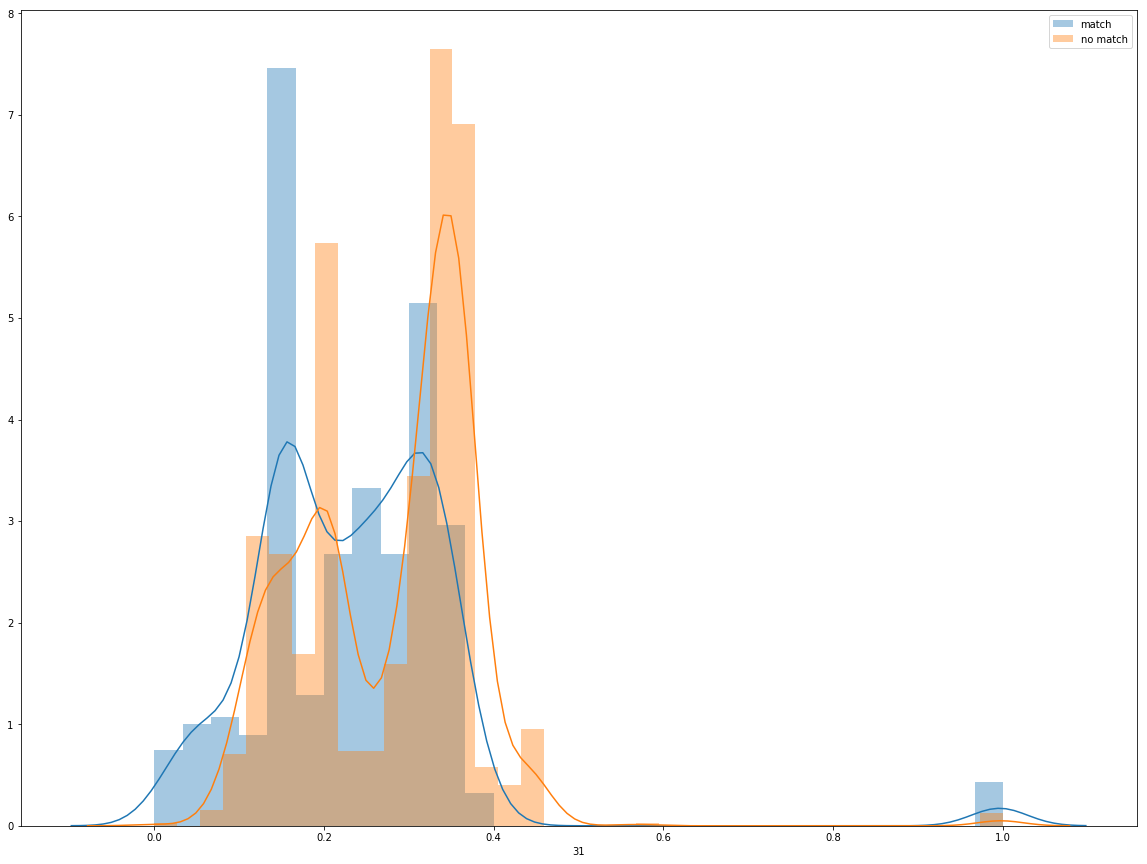




32


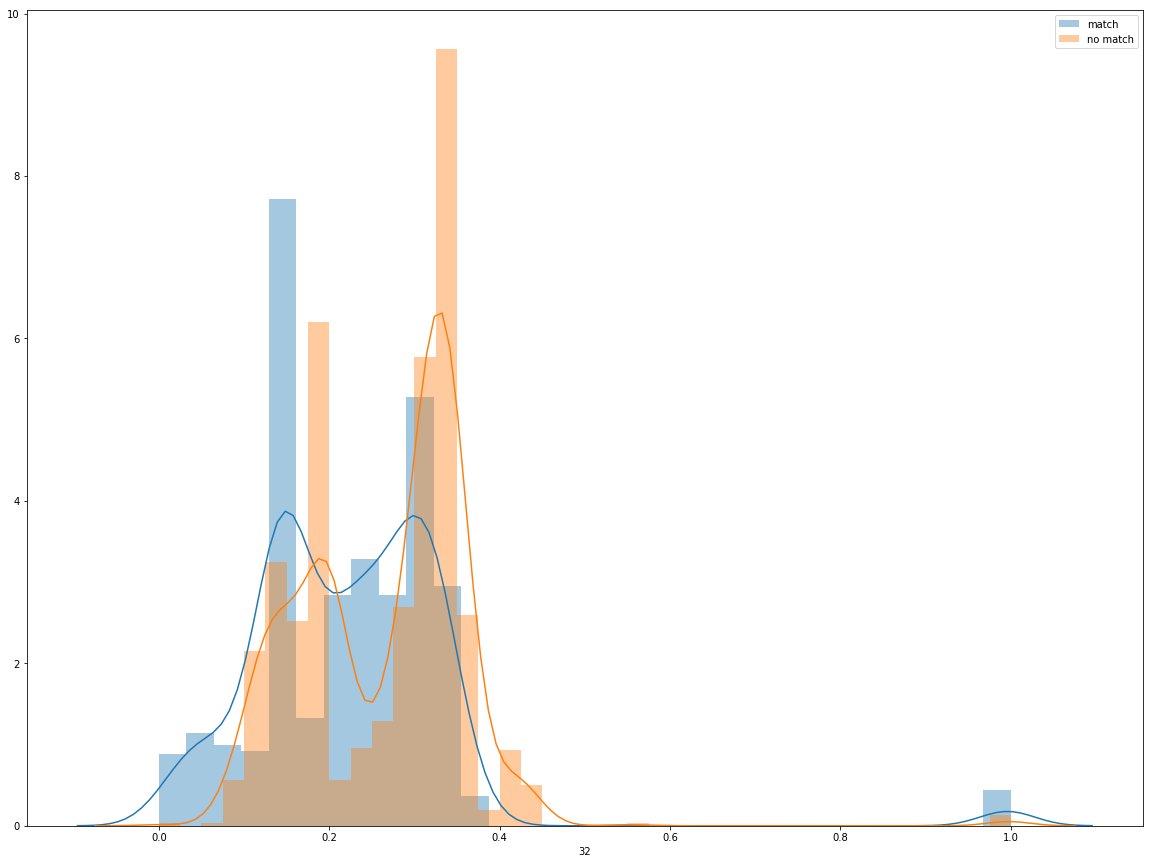




33


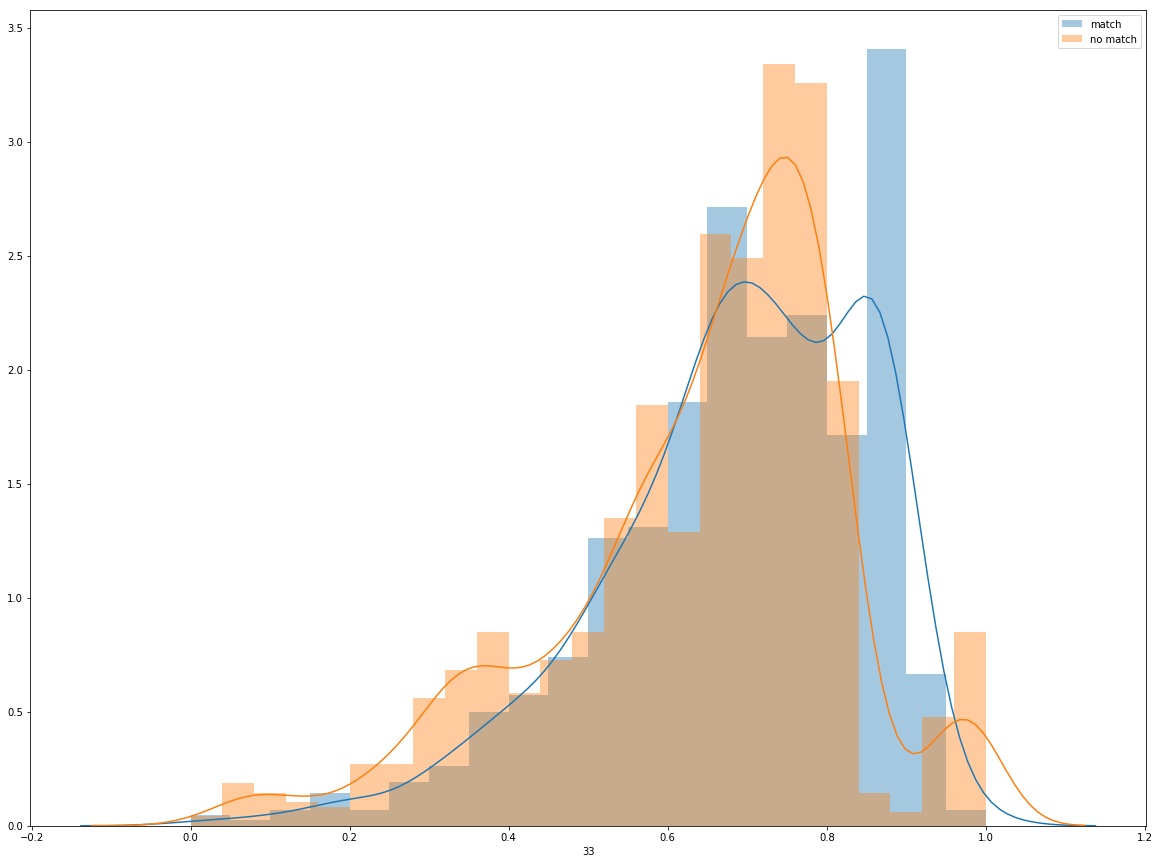




34


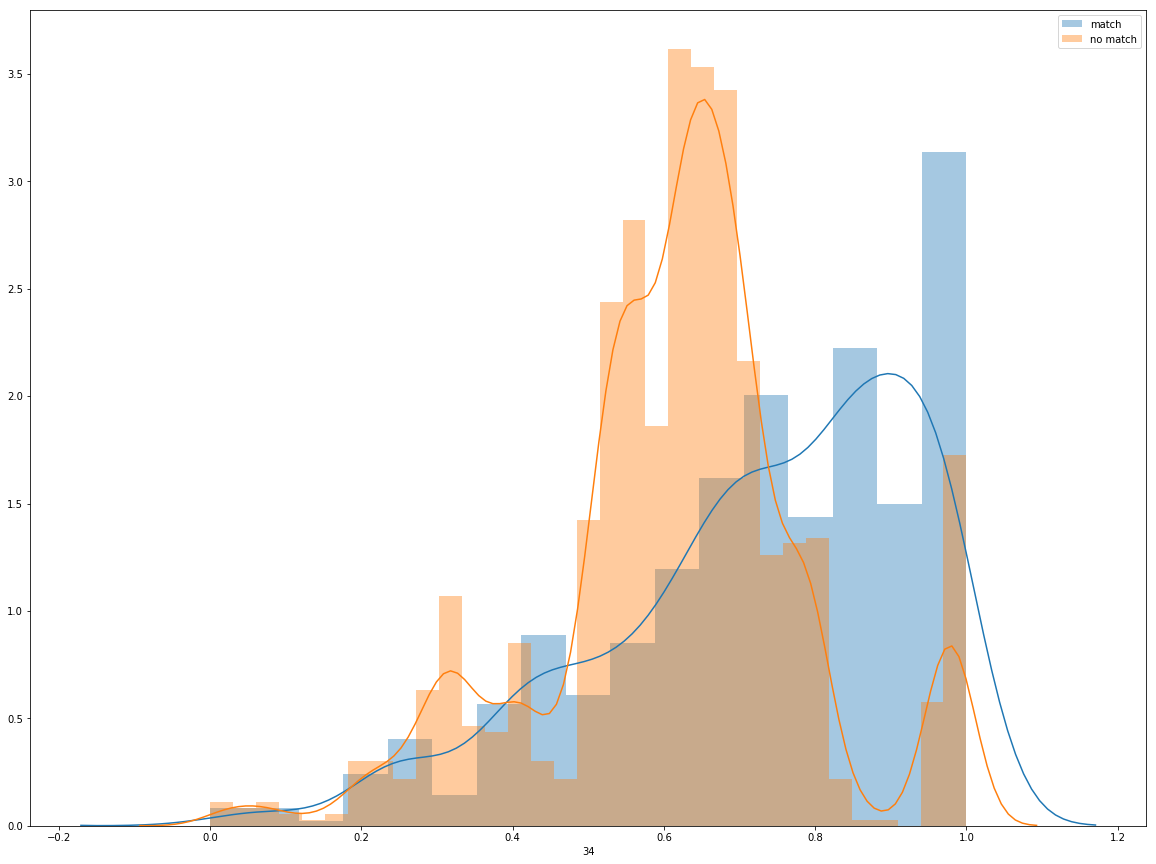




35


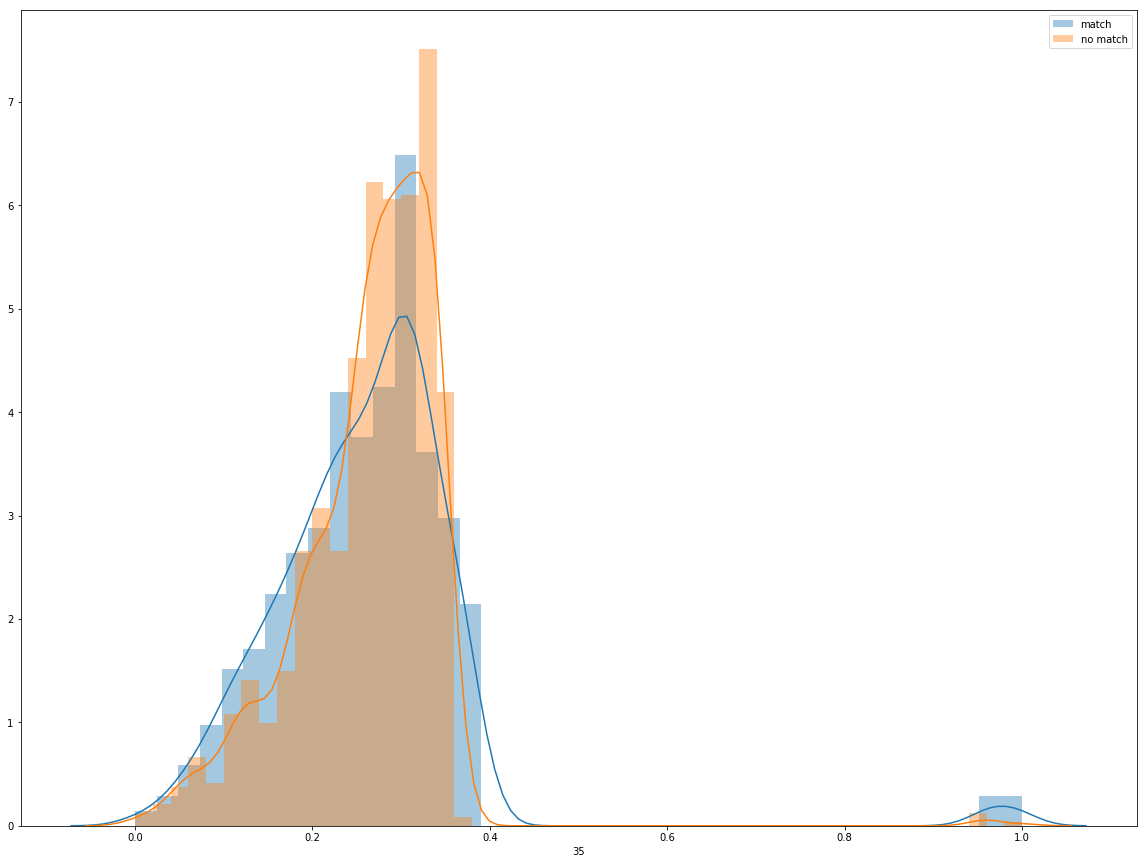




36


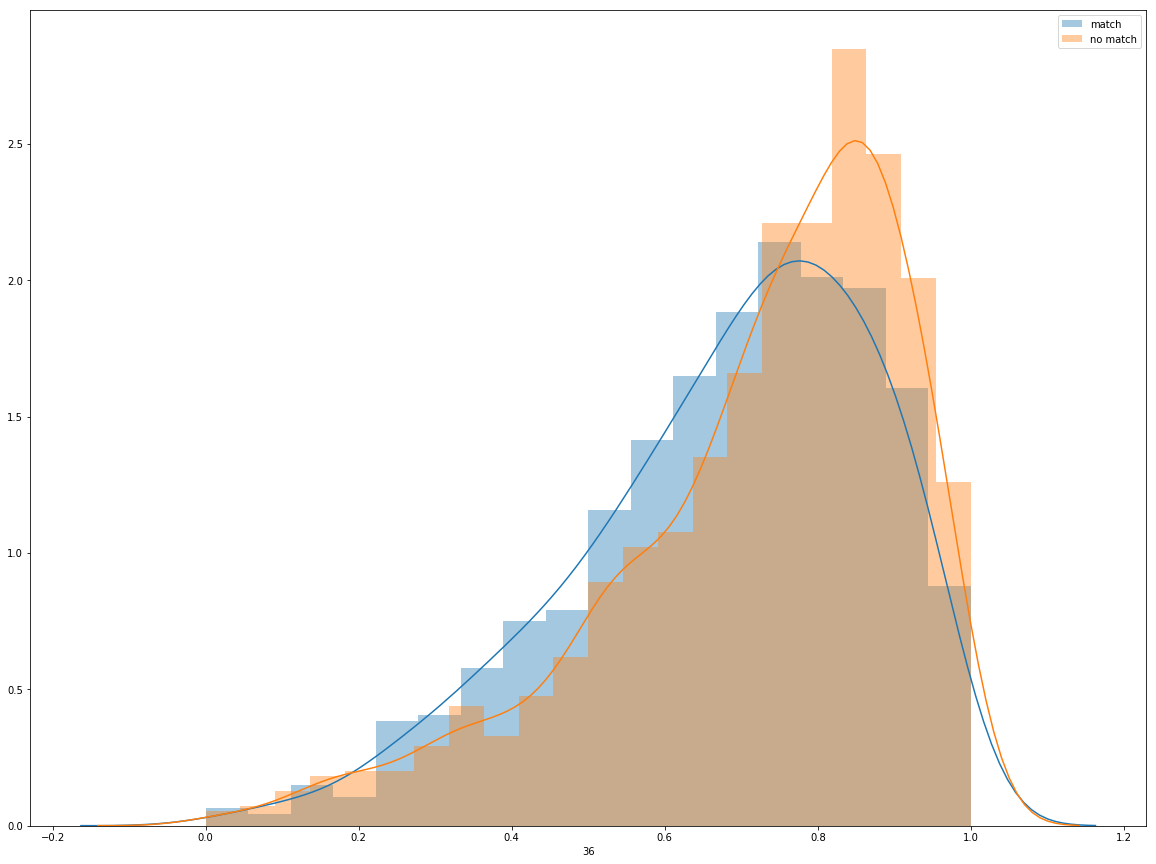




37


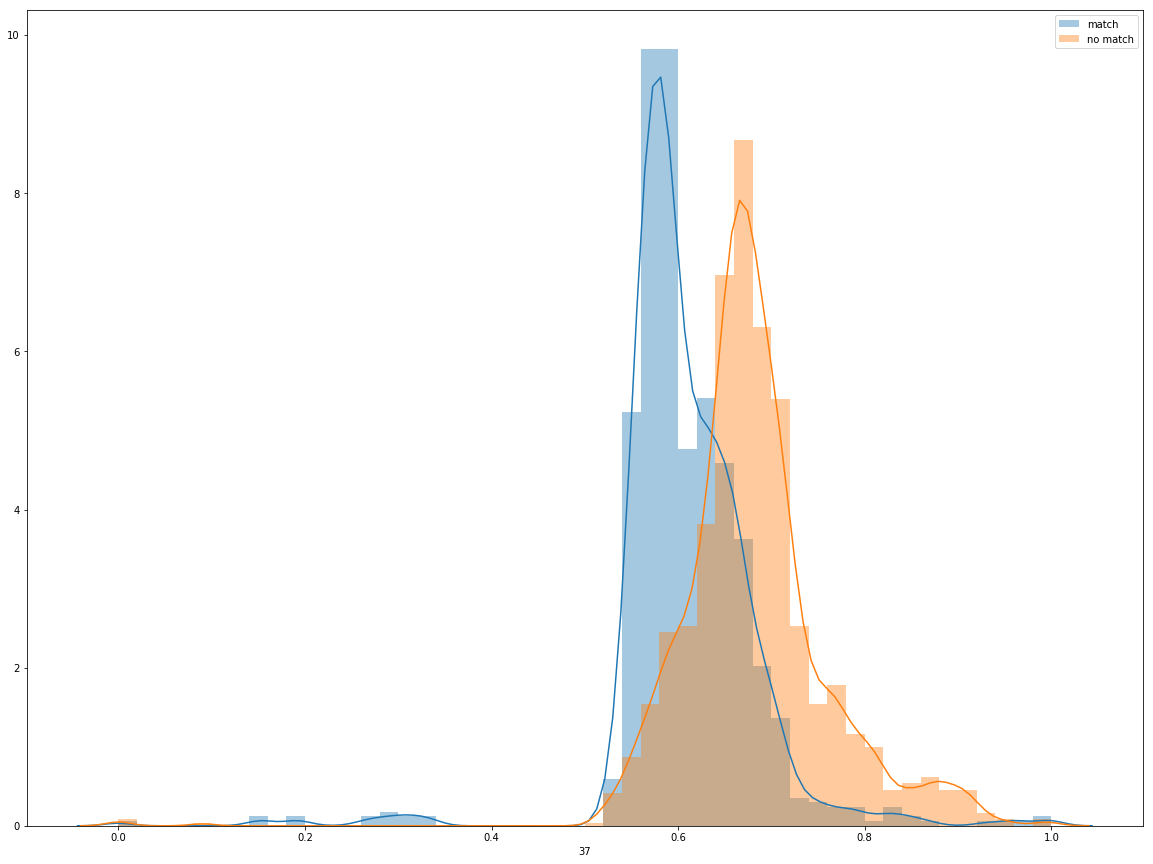




38


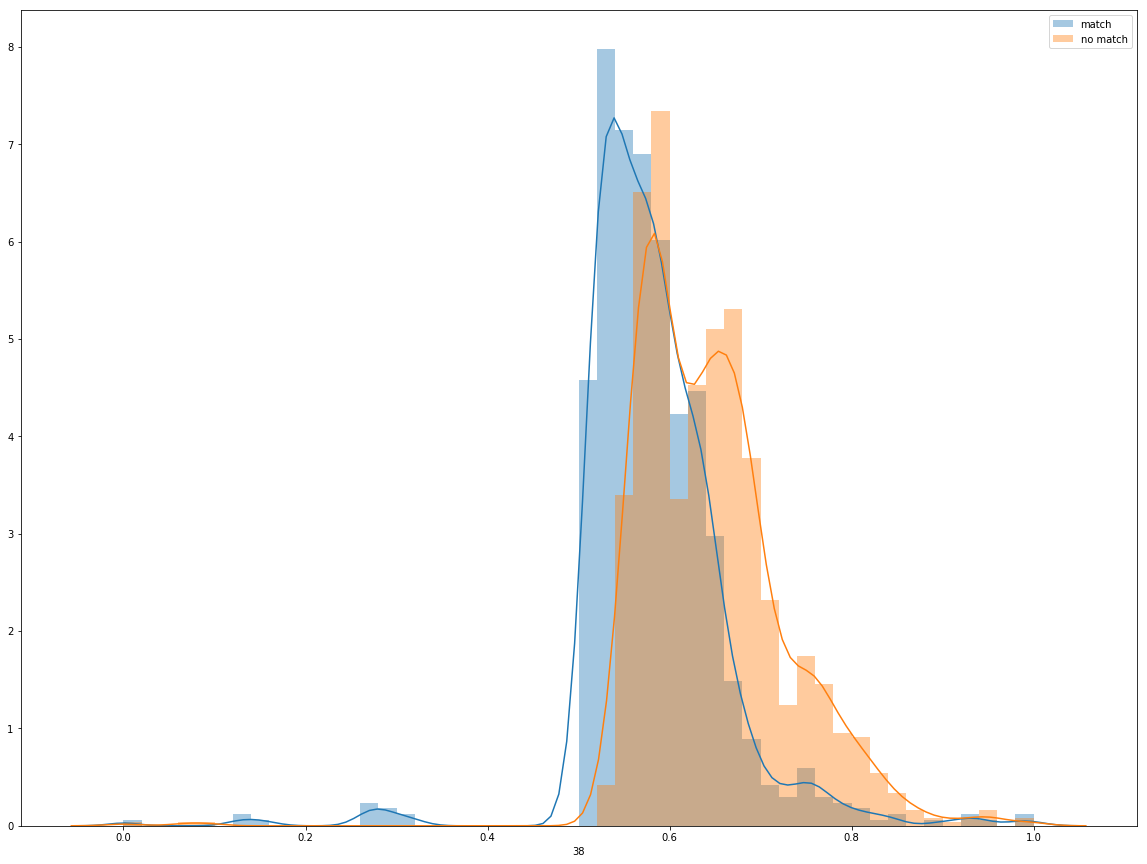




39


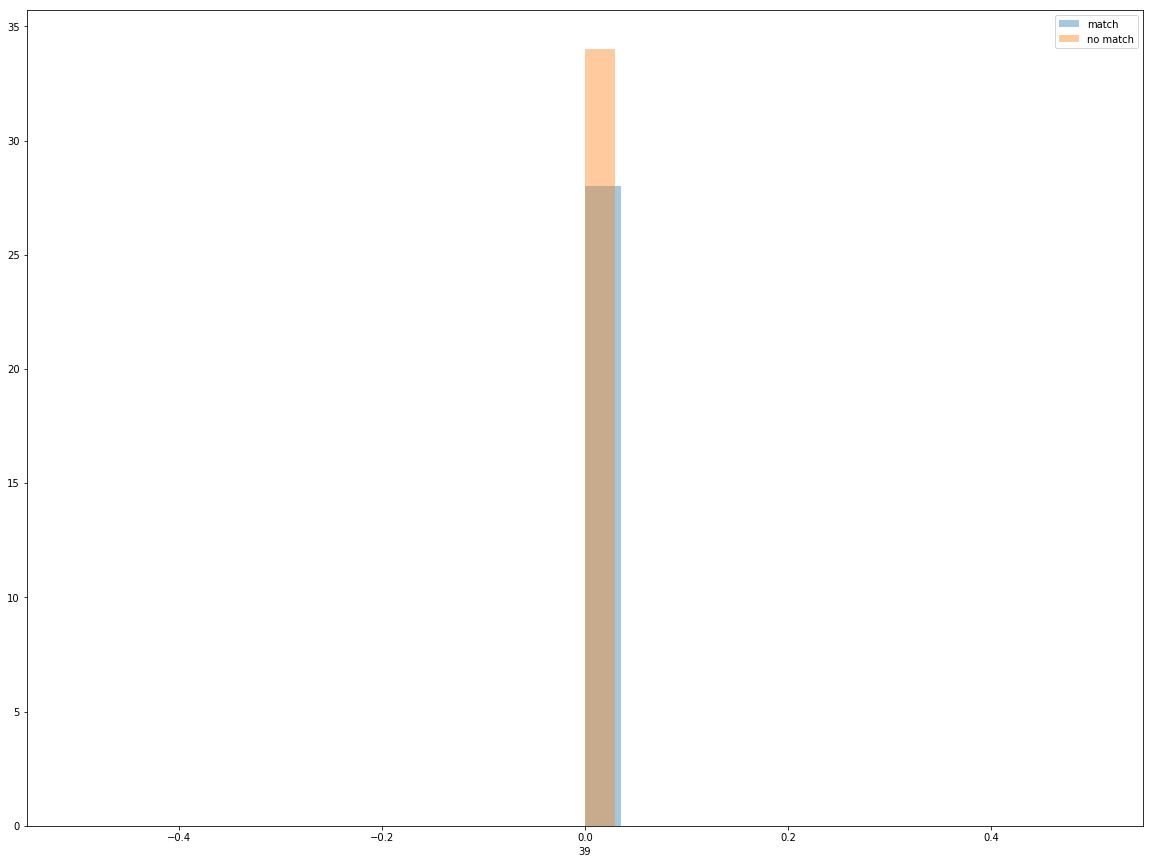




40


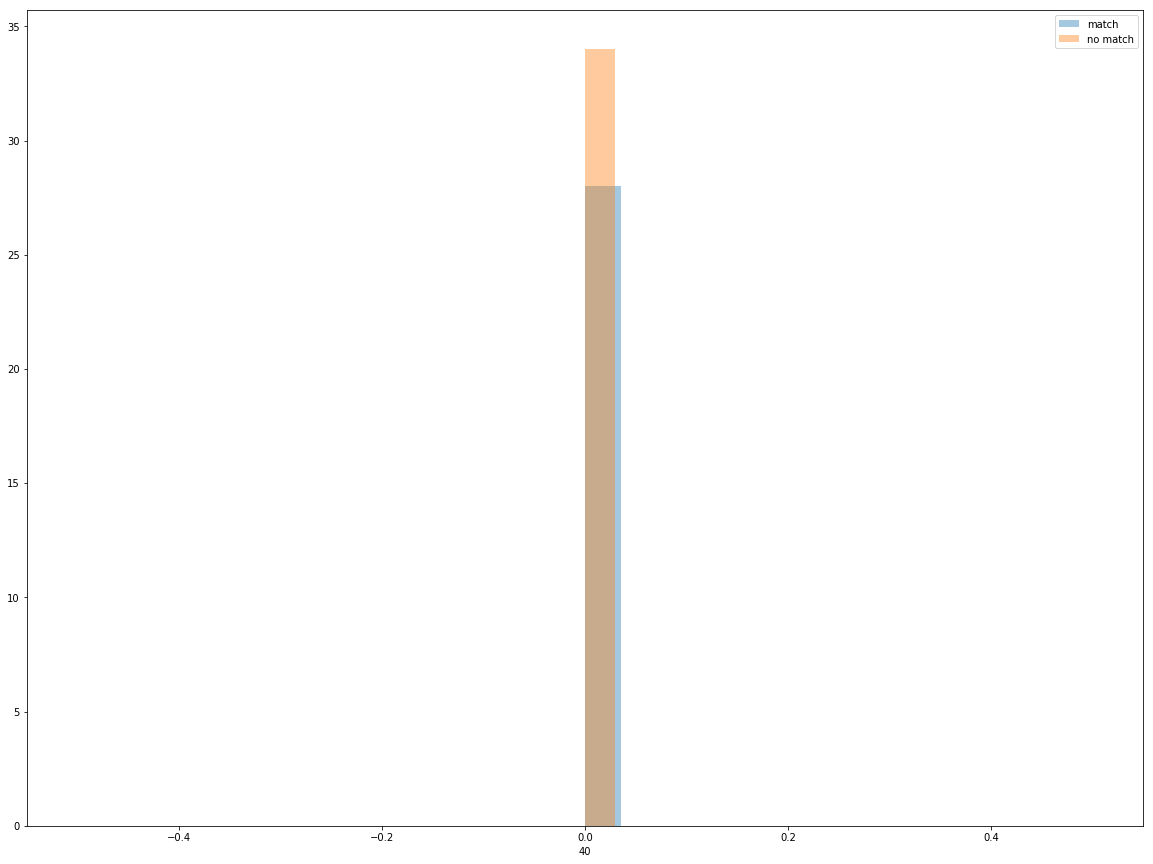




41


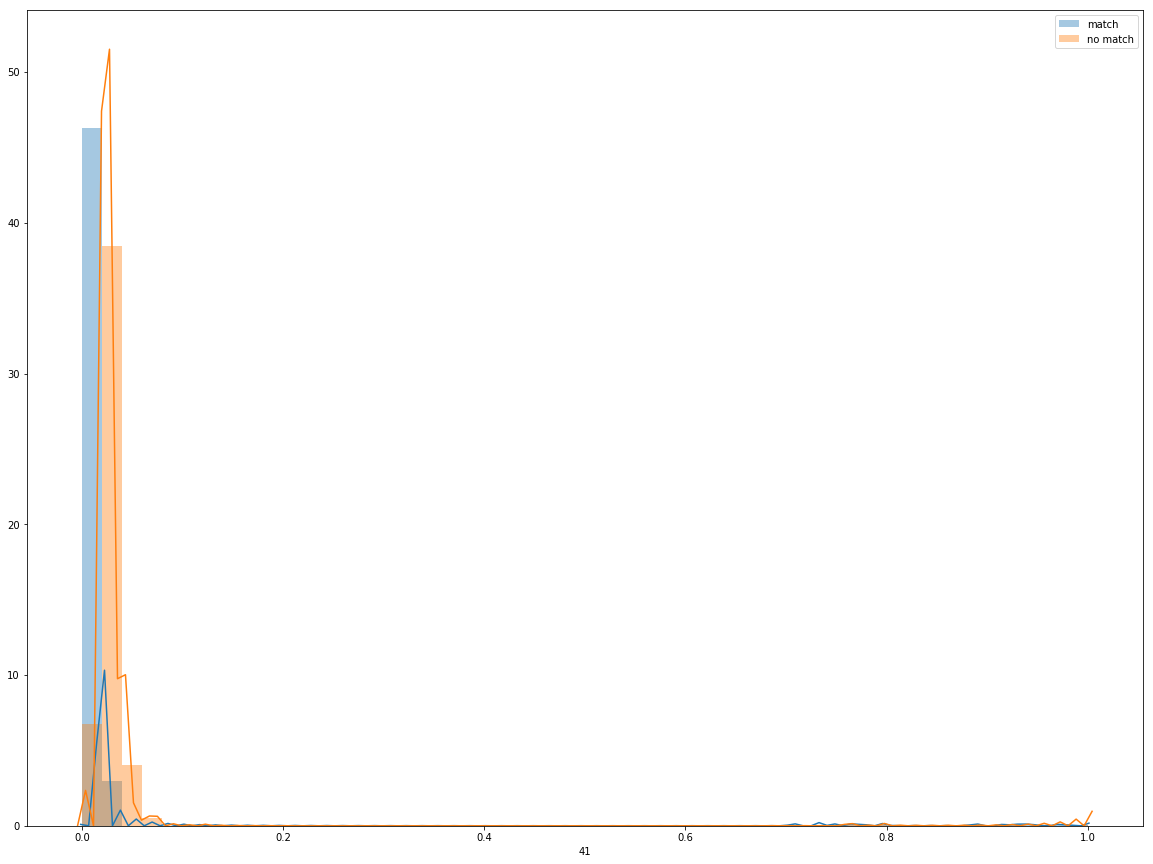




42


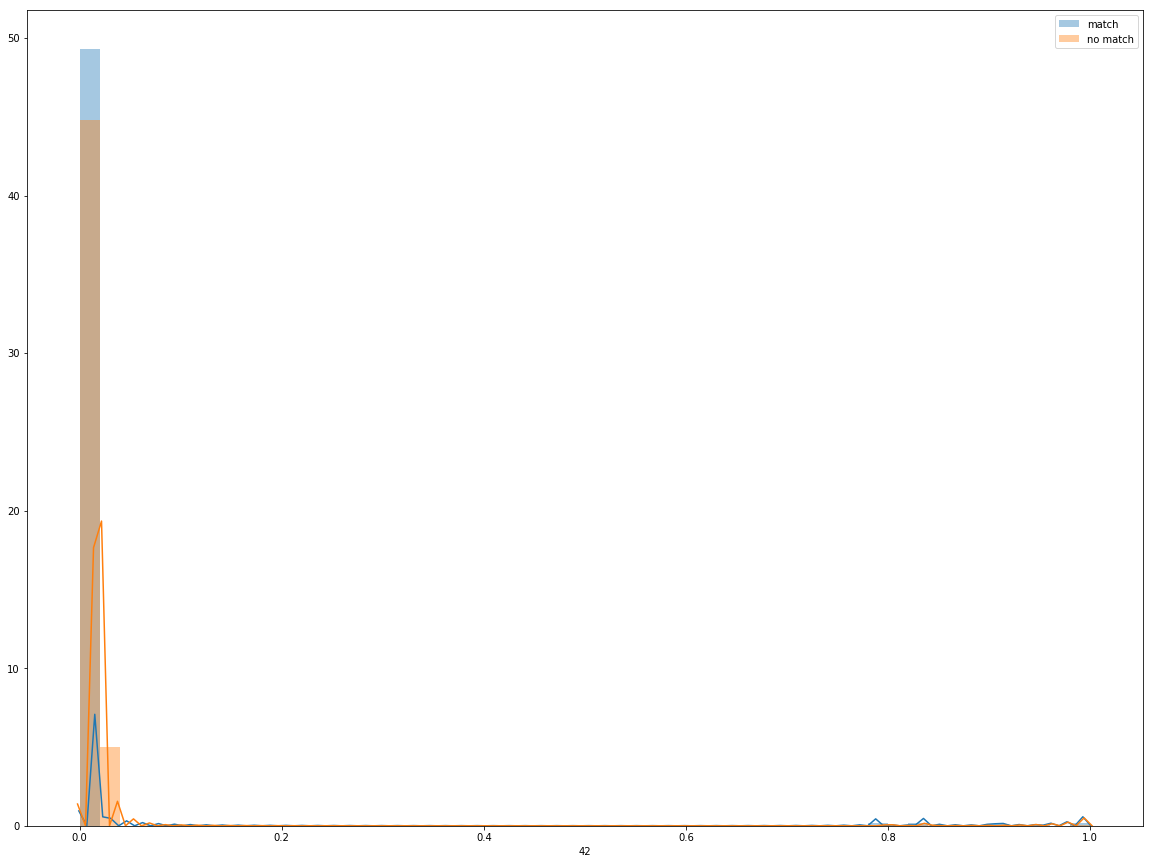




43


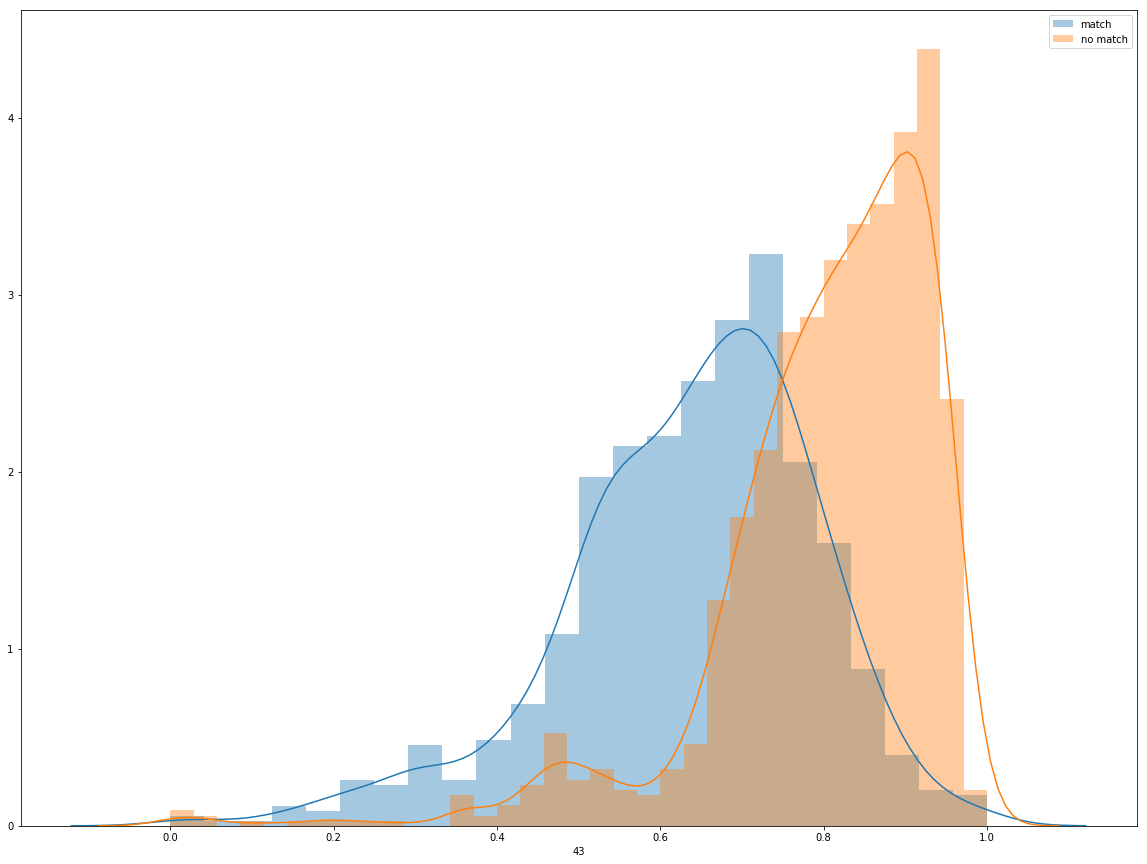




44


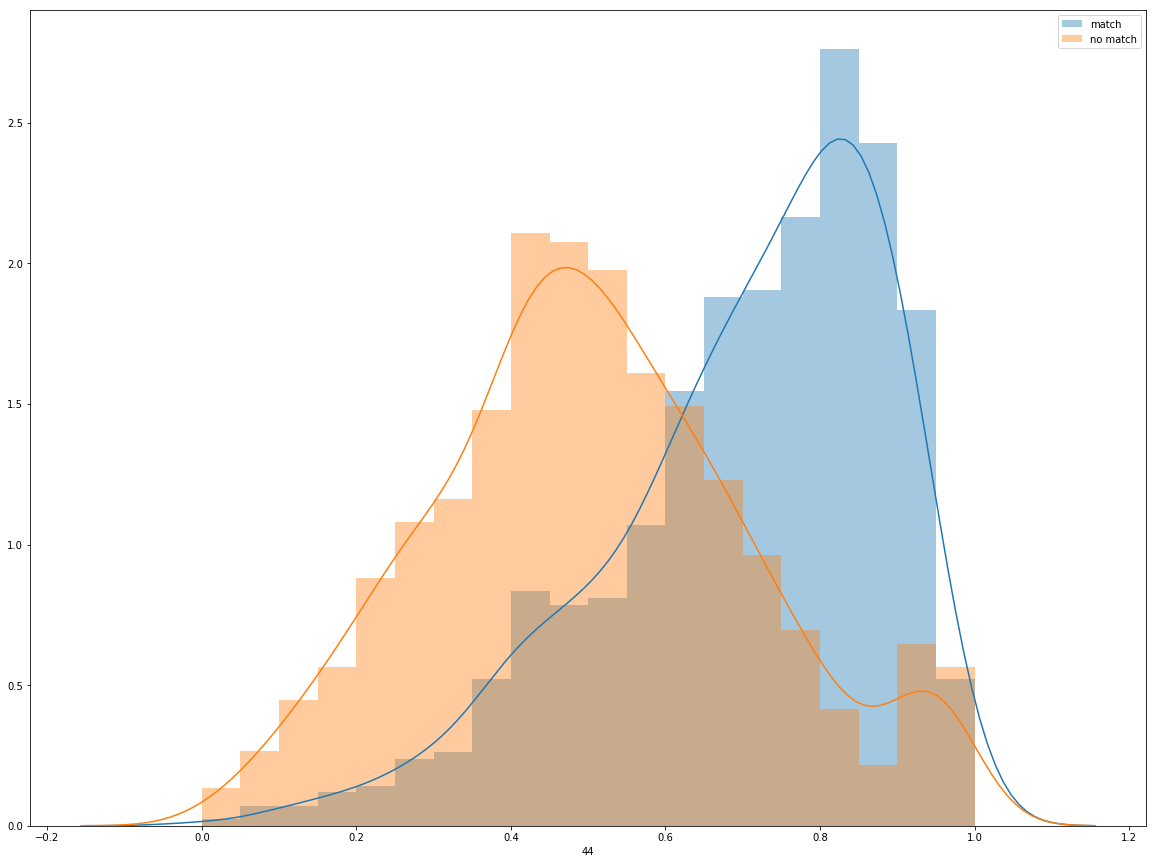




45


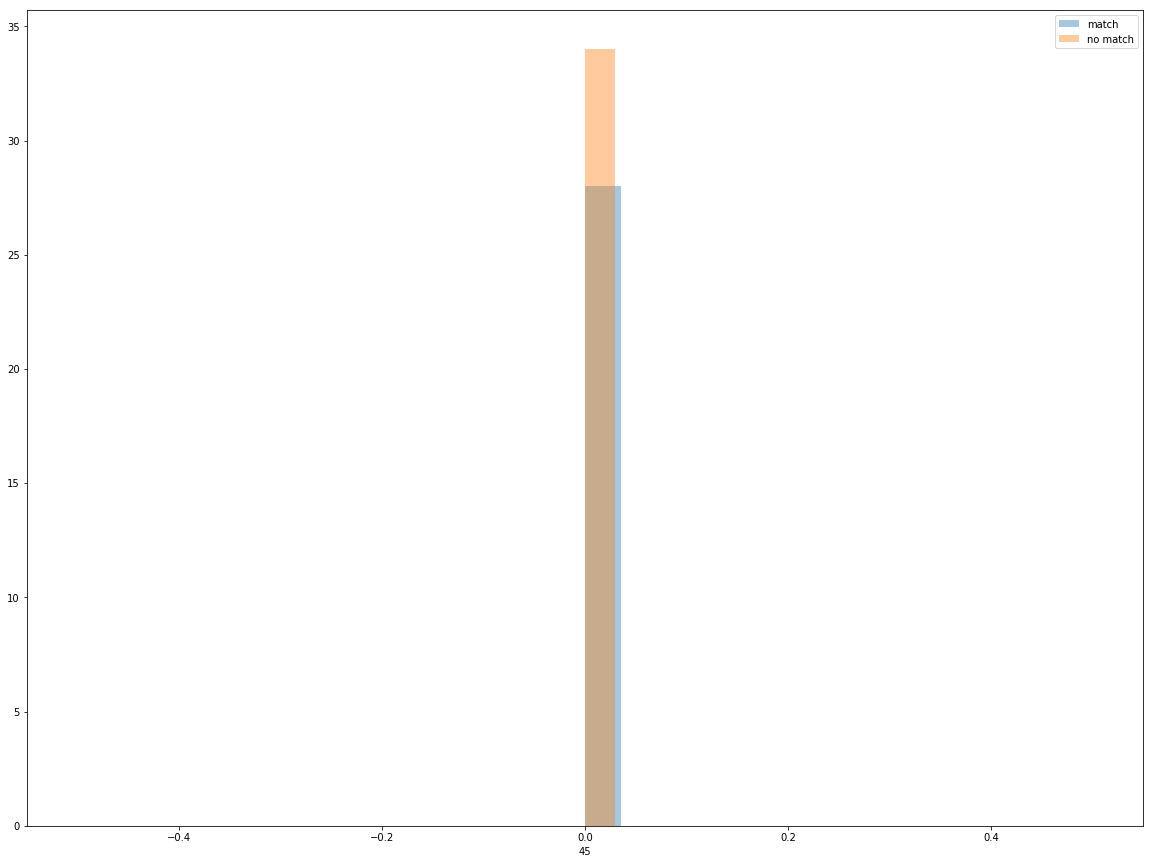




46


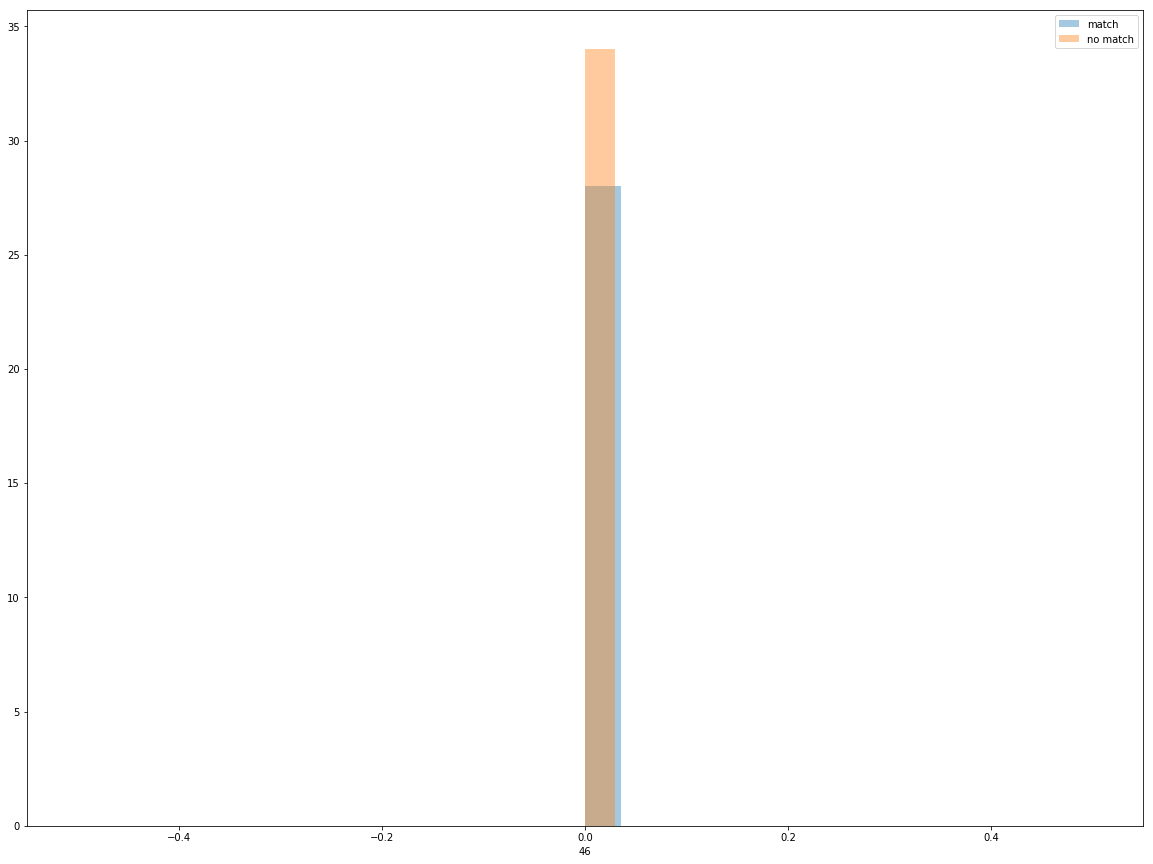




47


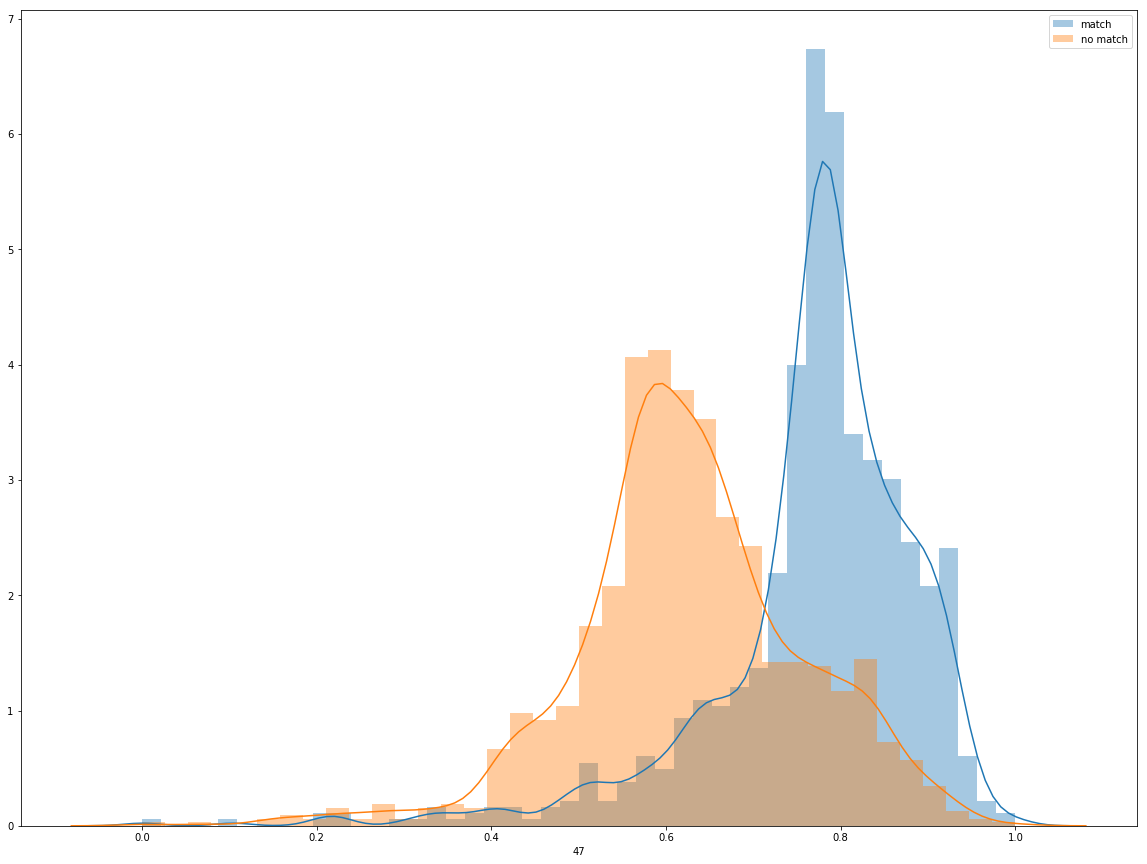




48


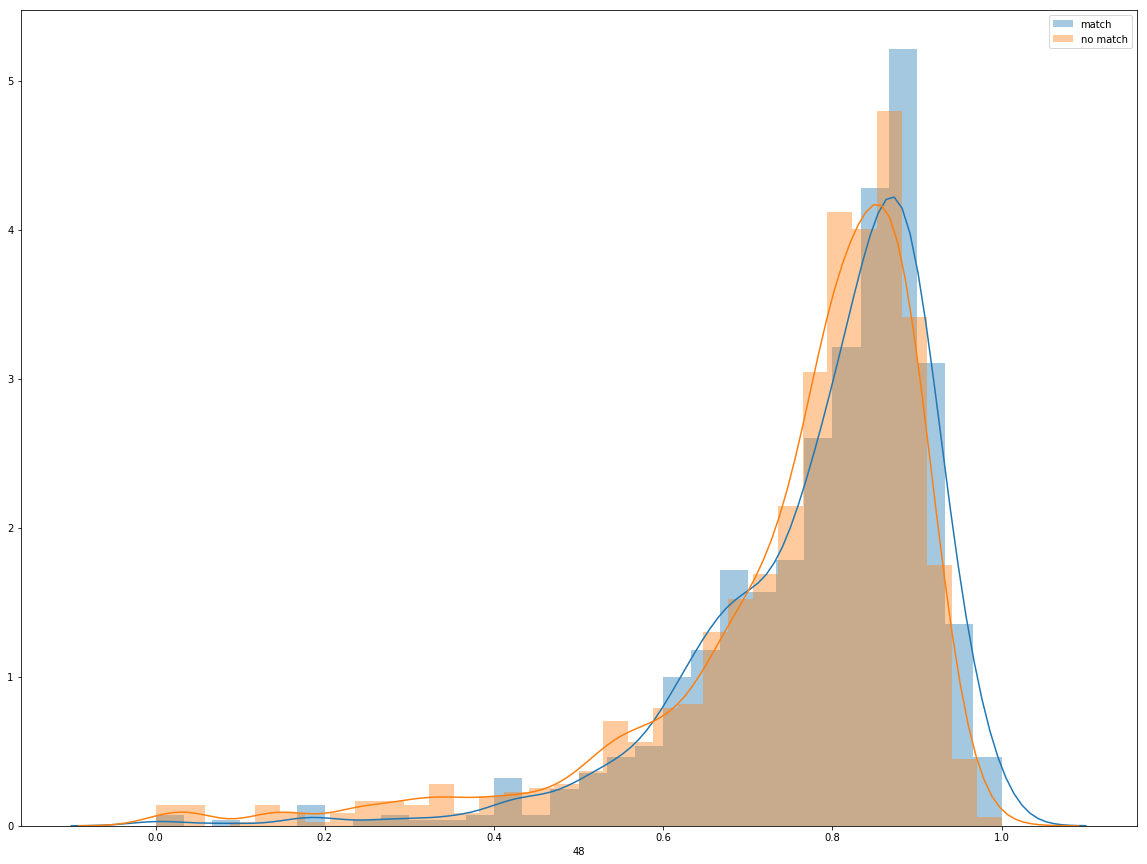




49


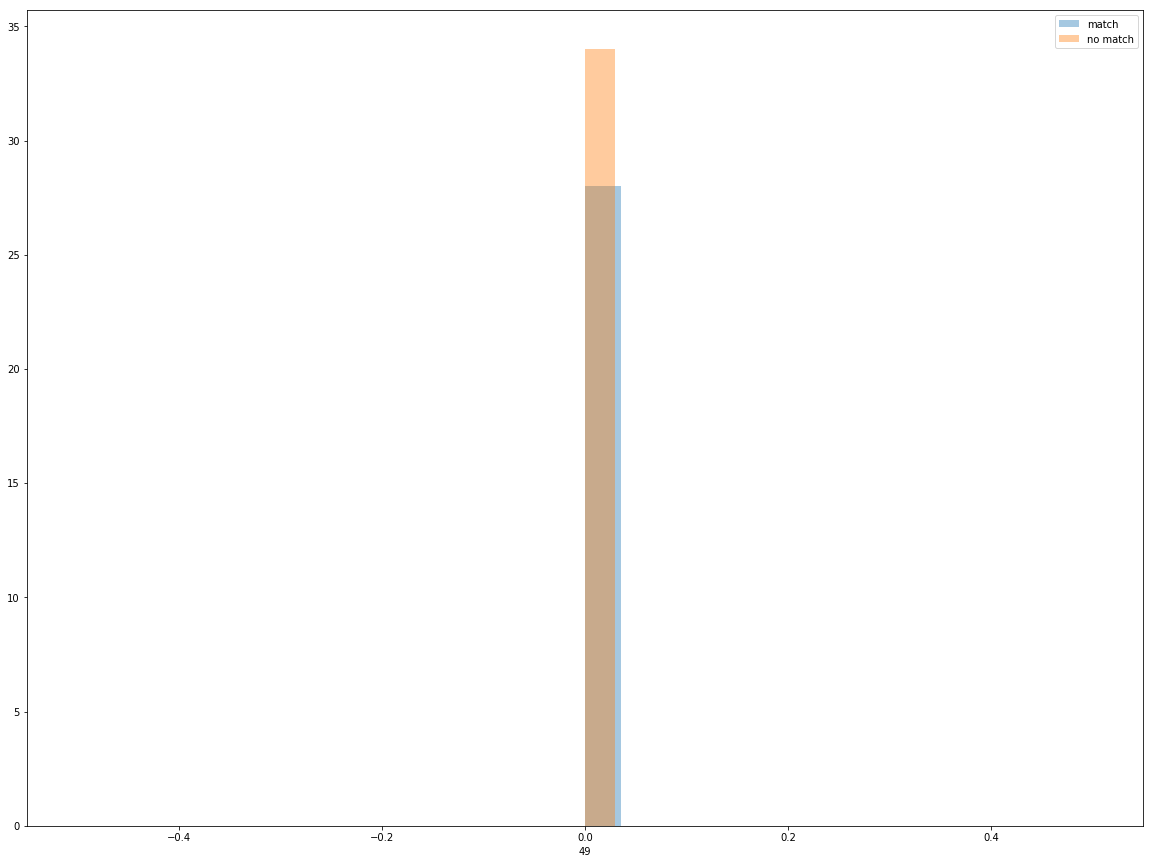




50


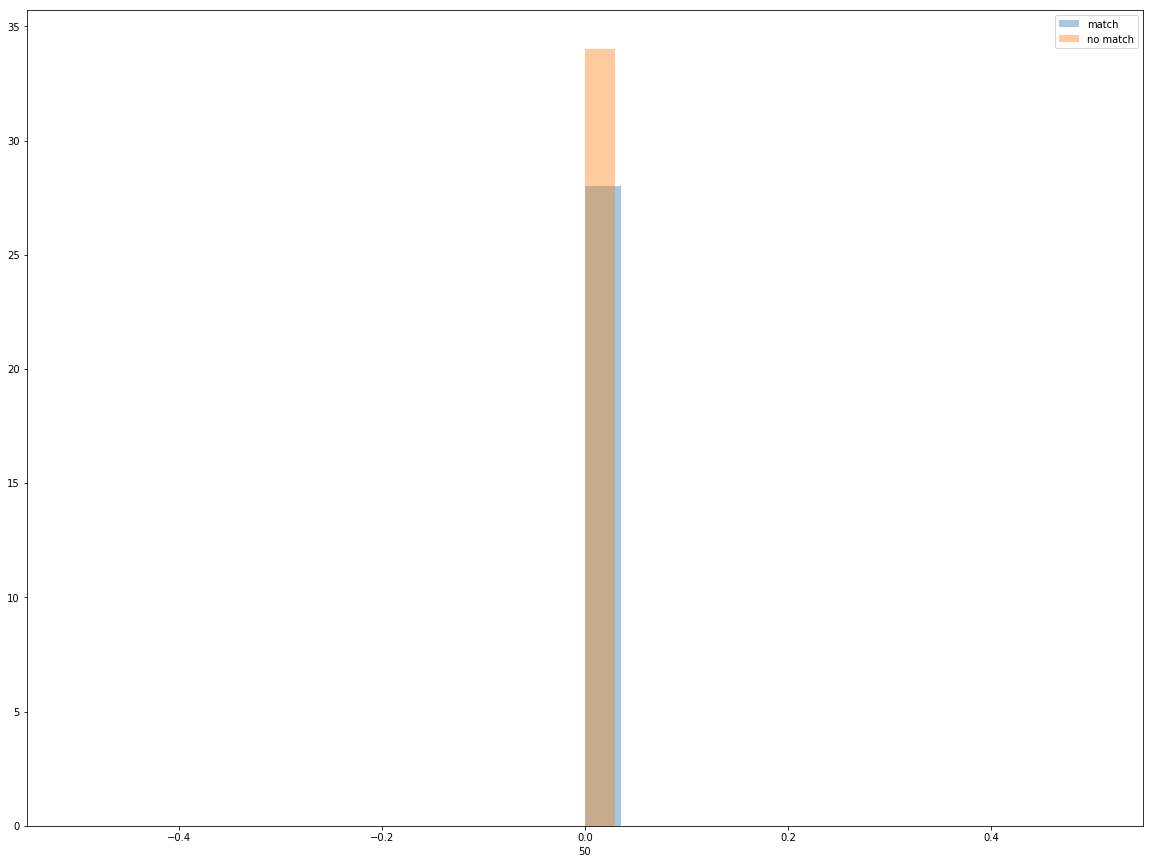




51


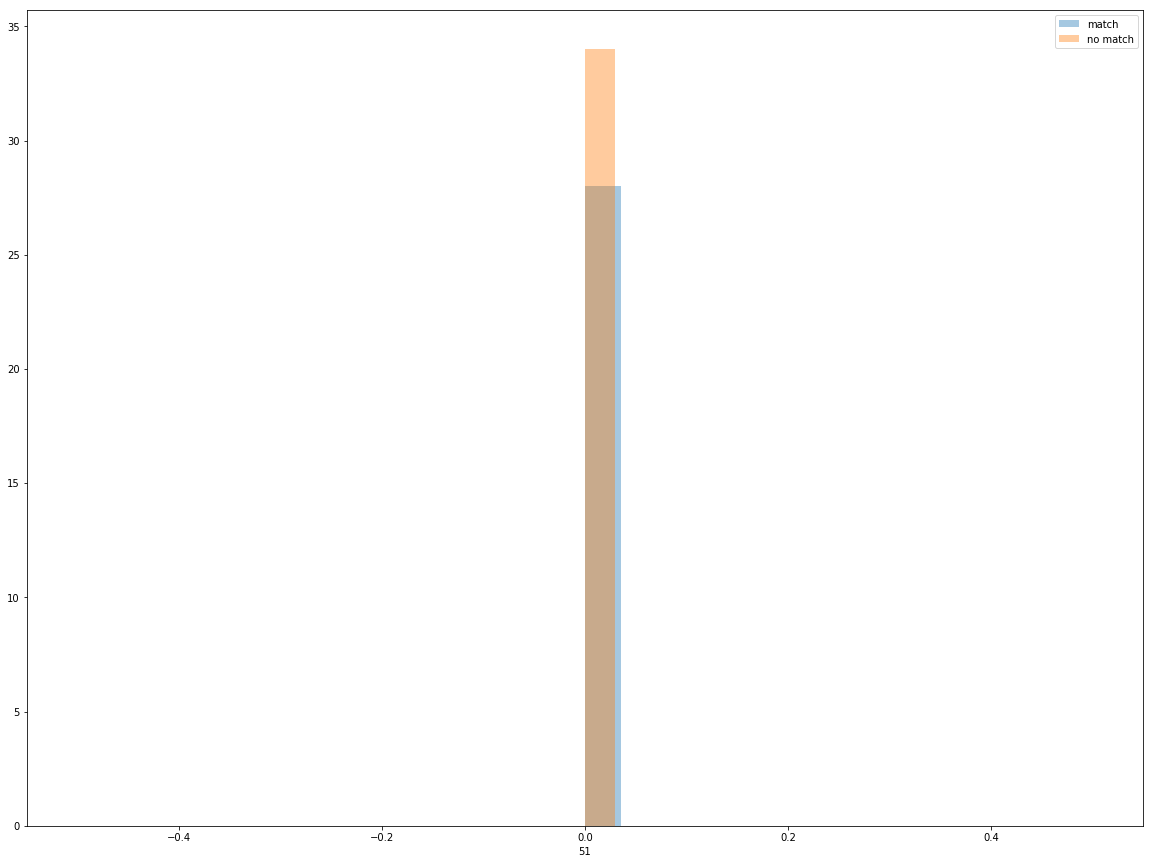




52


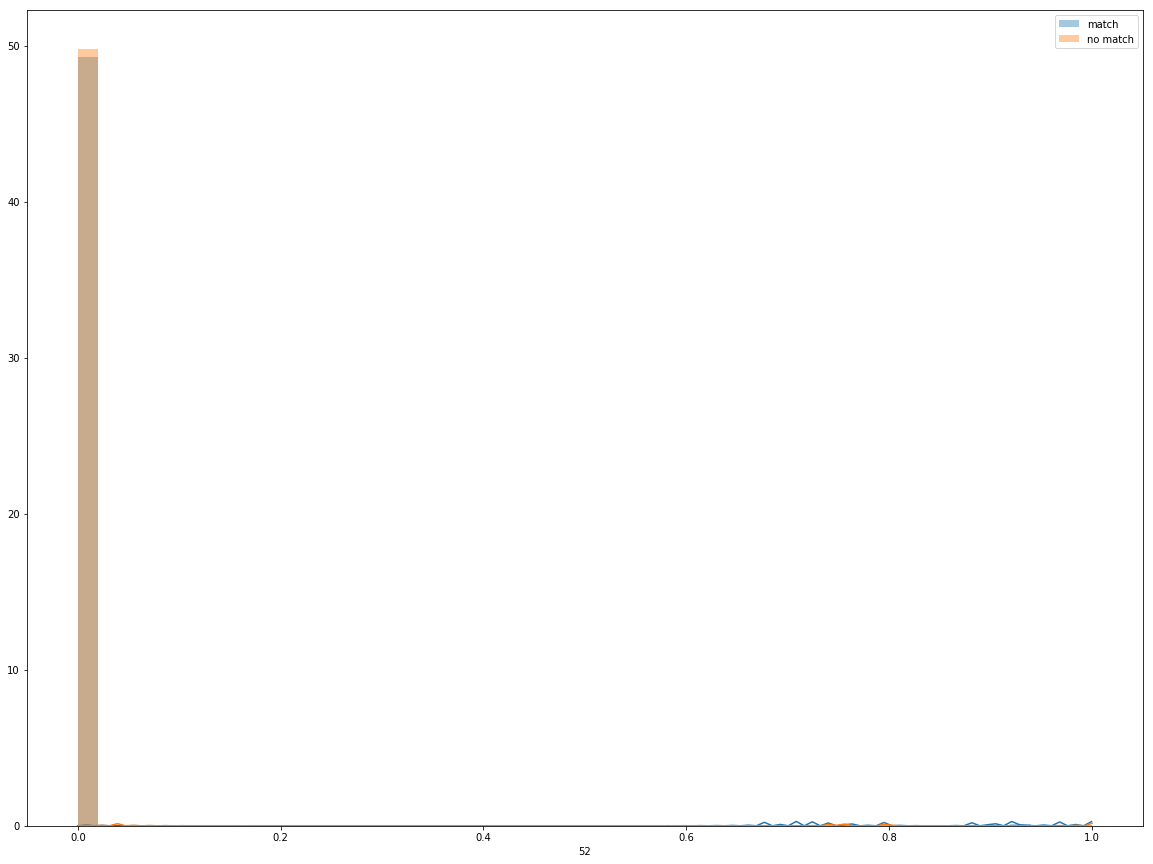




53


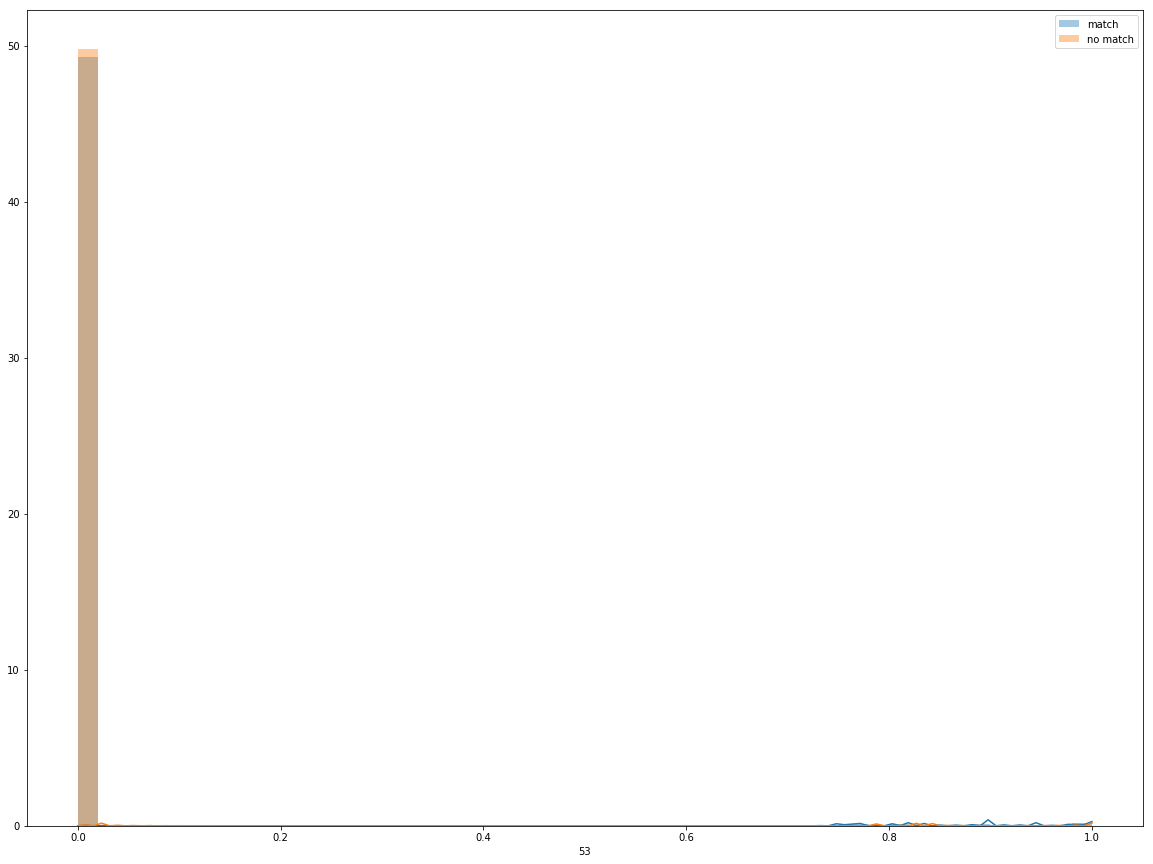




54


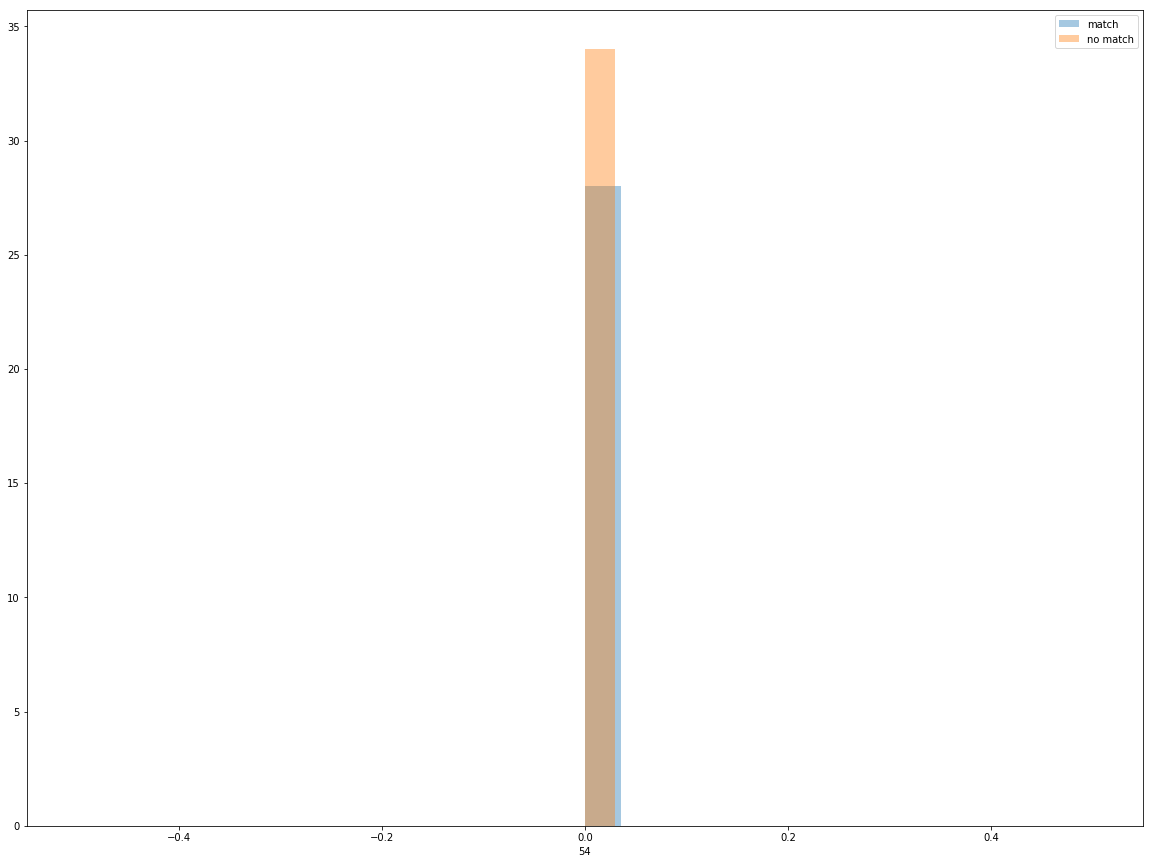




55


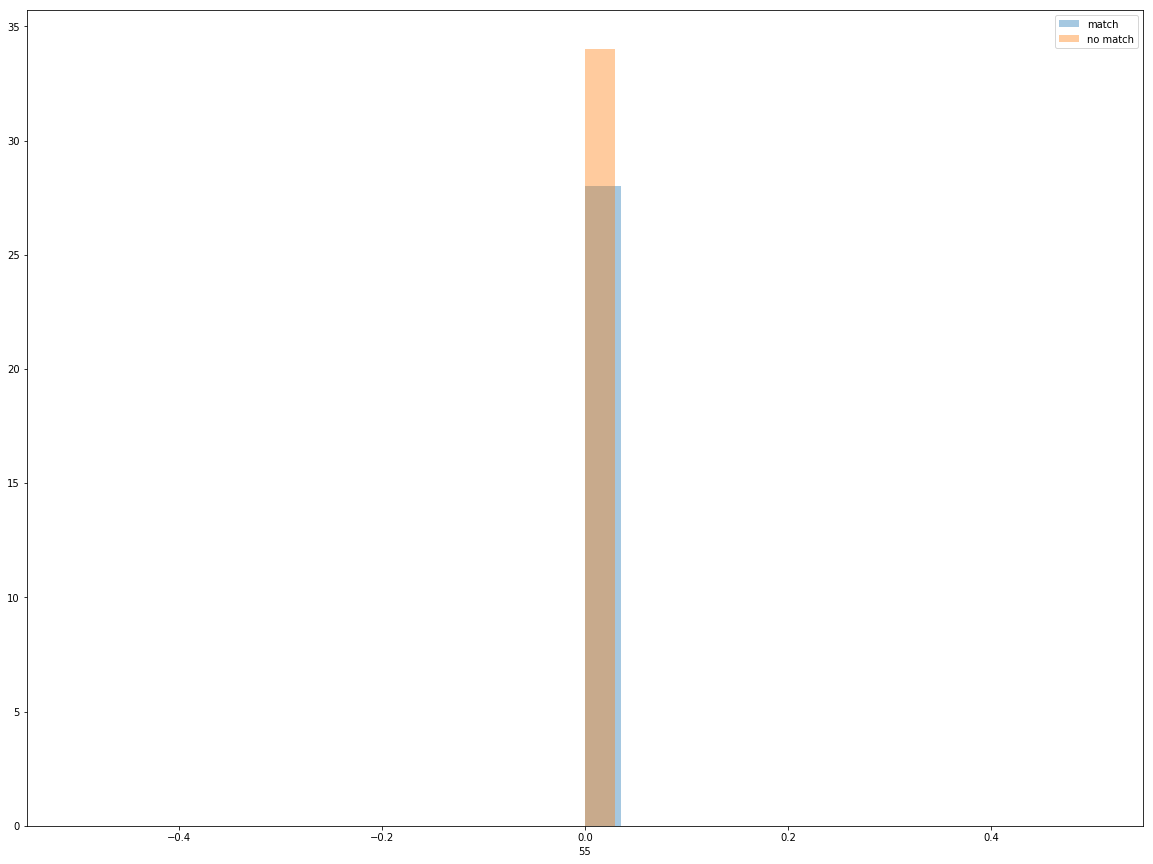




56


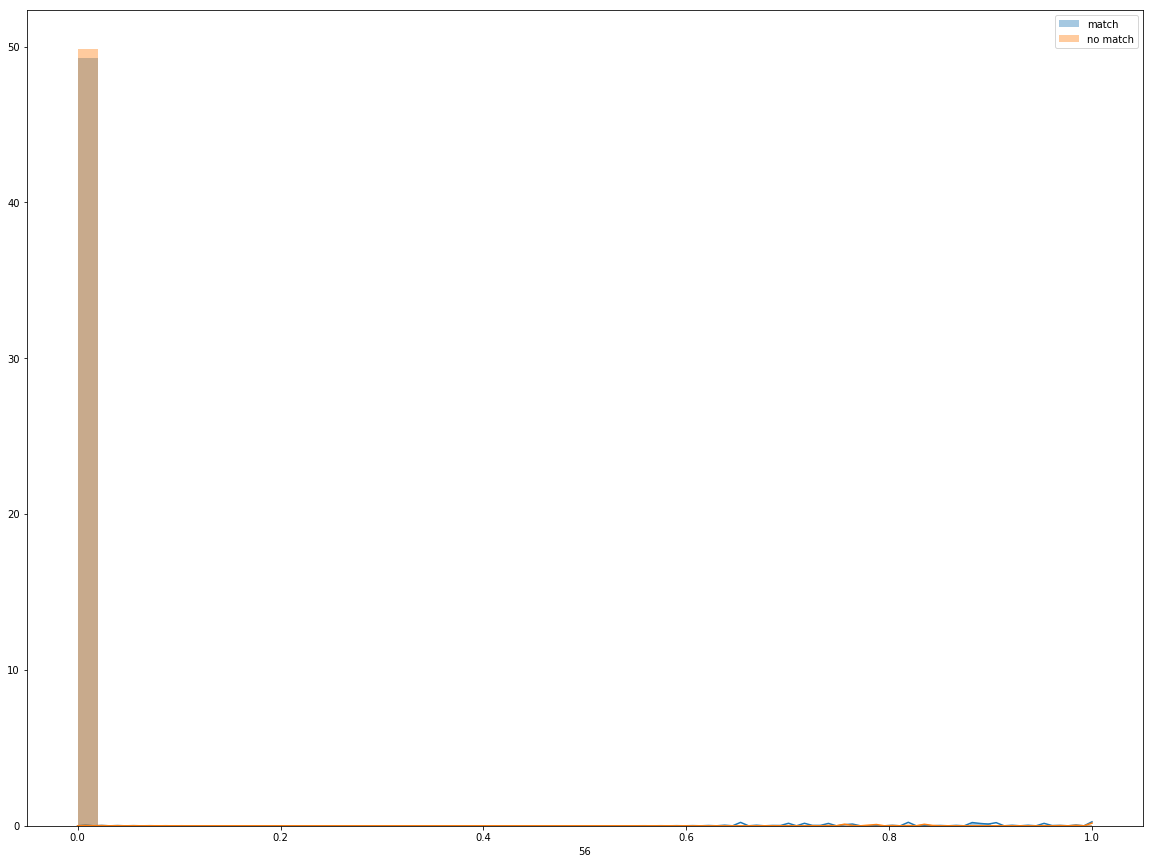




57


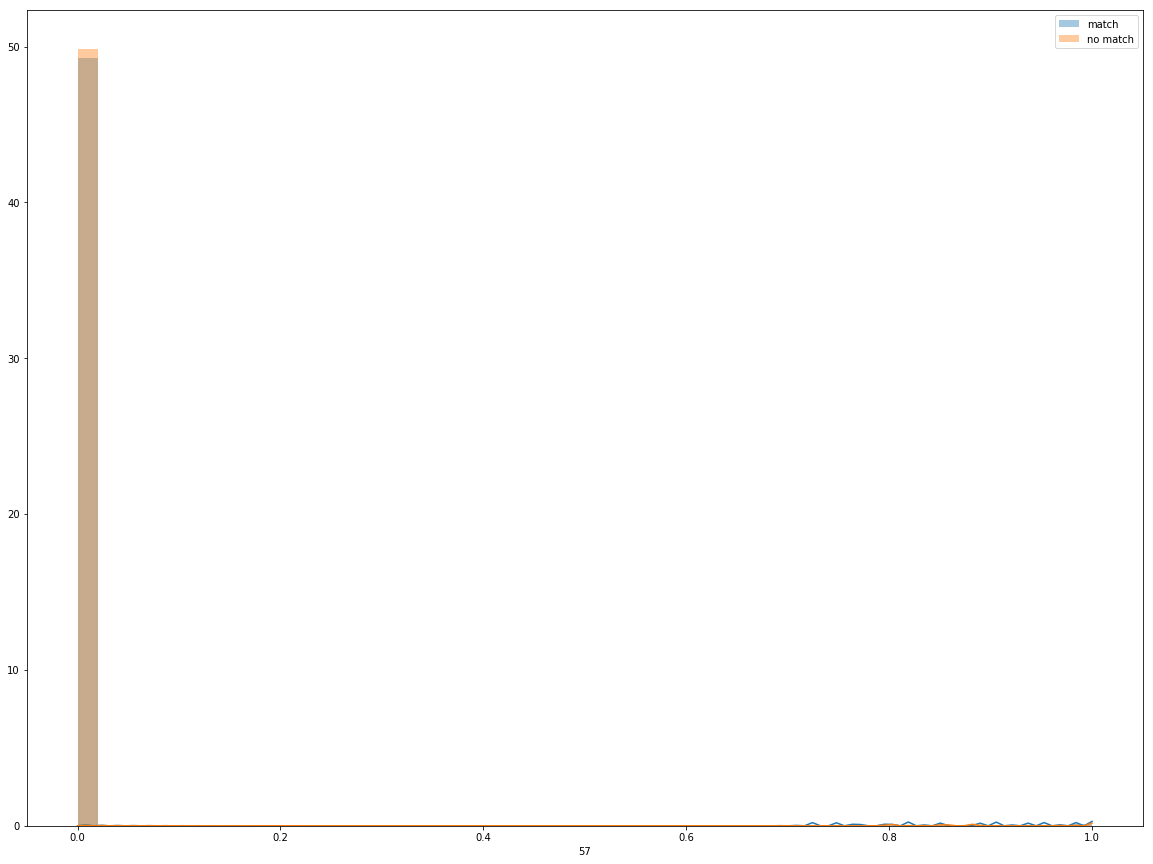




58


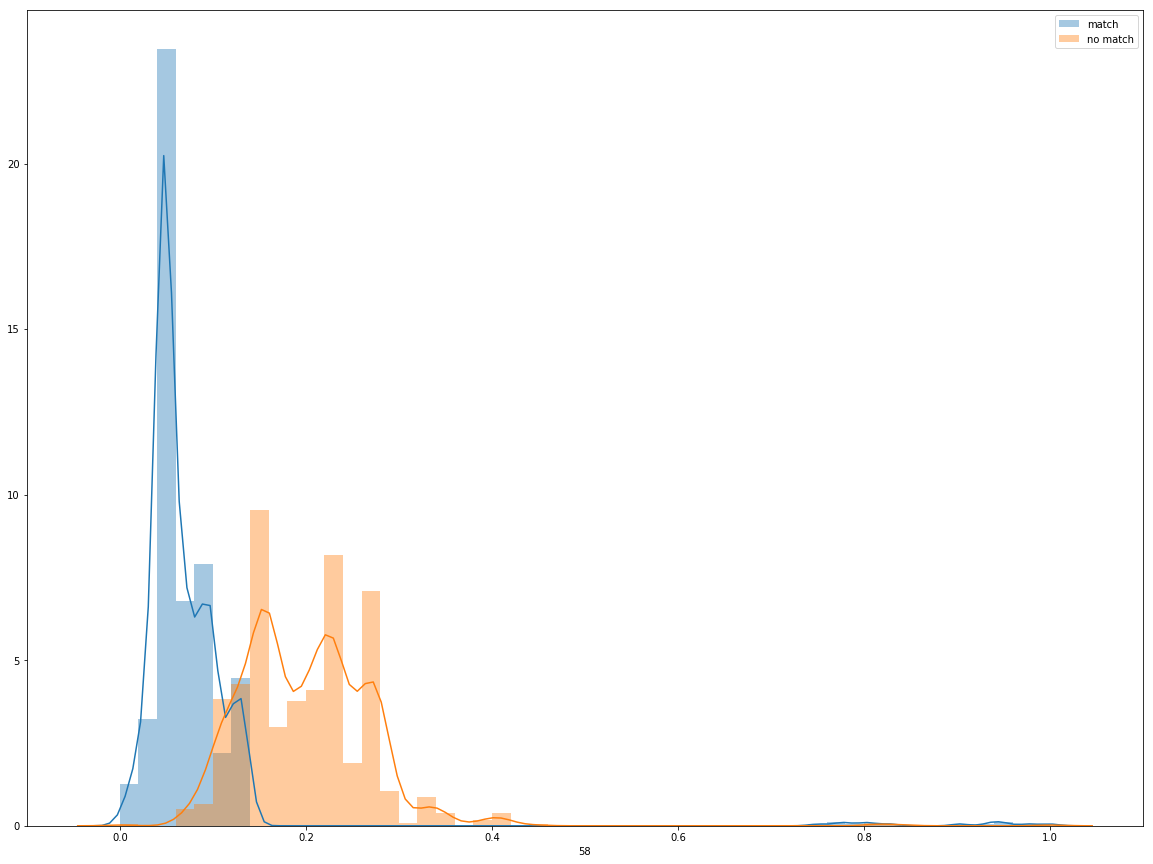




59


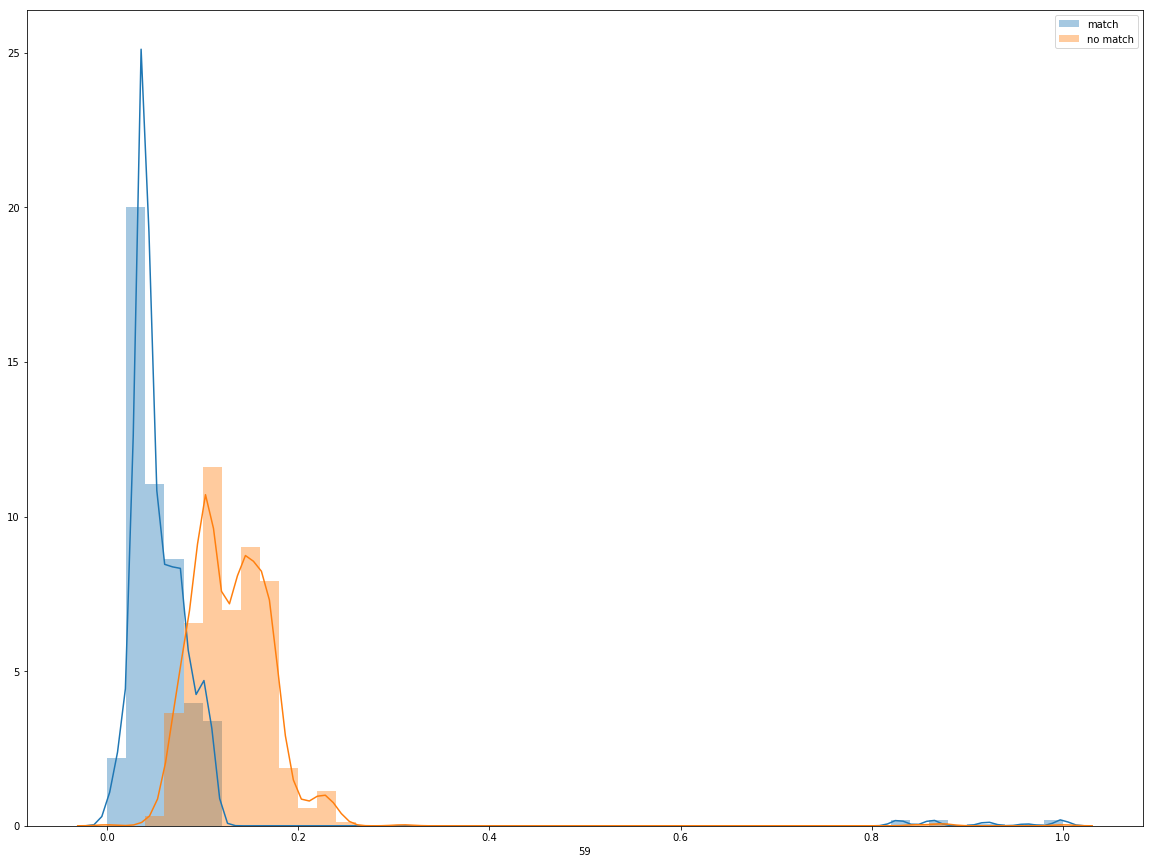




60


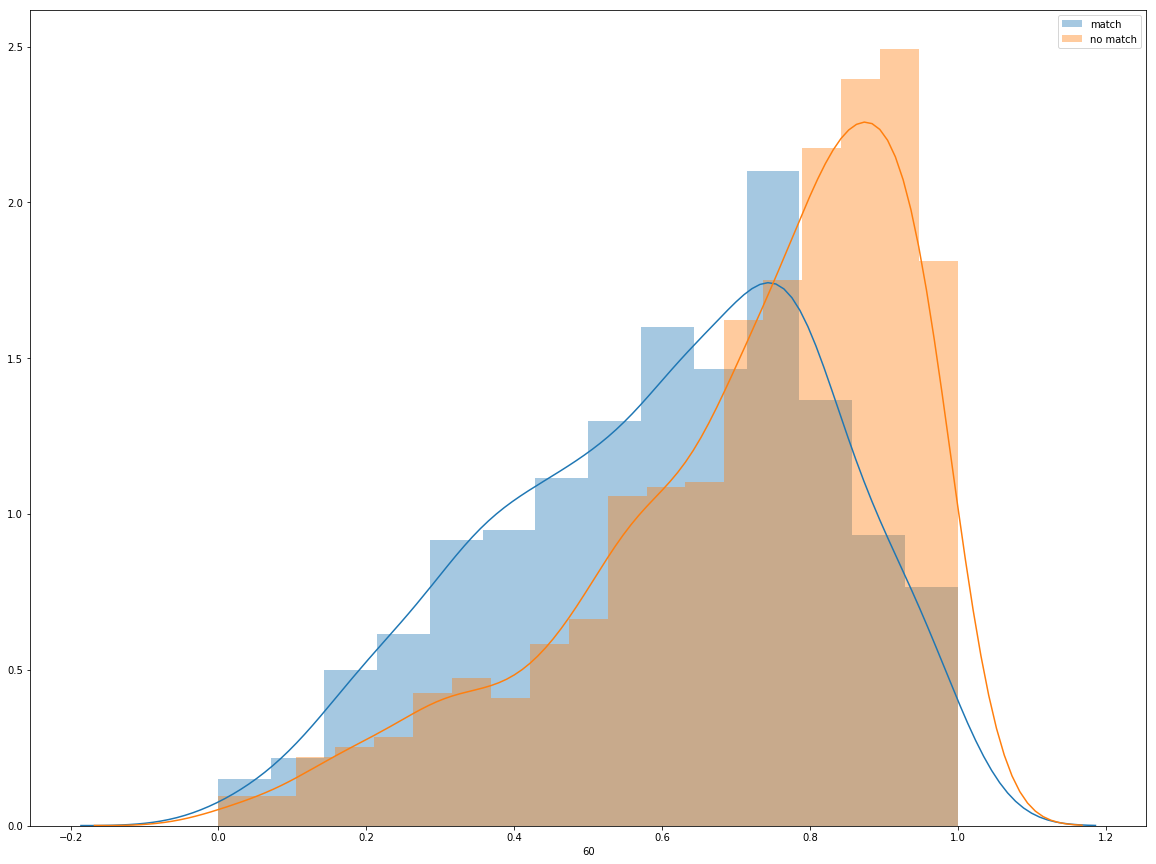




61


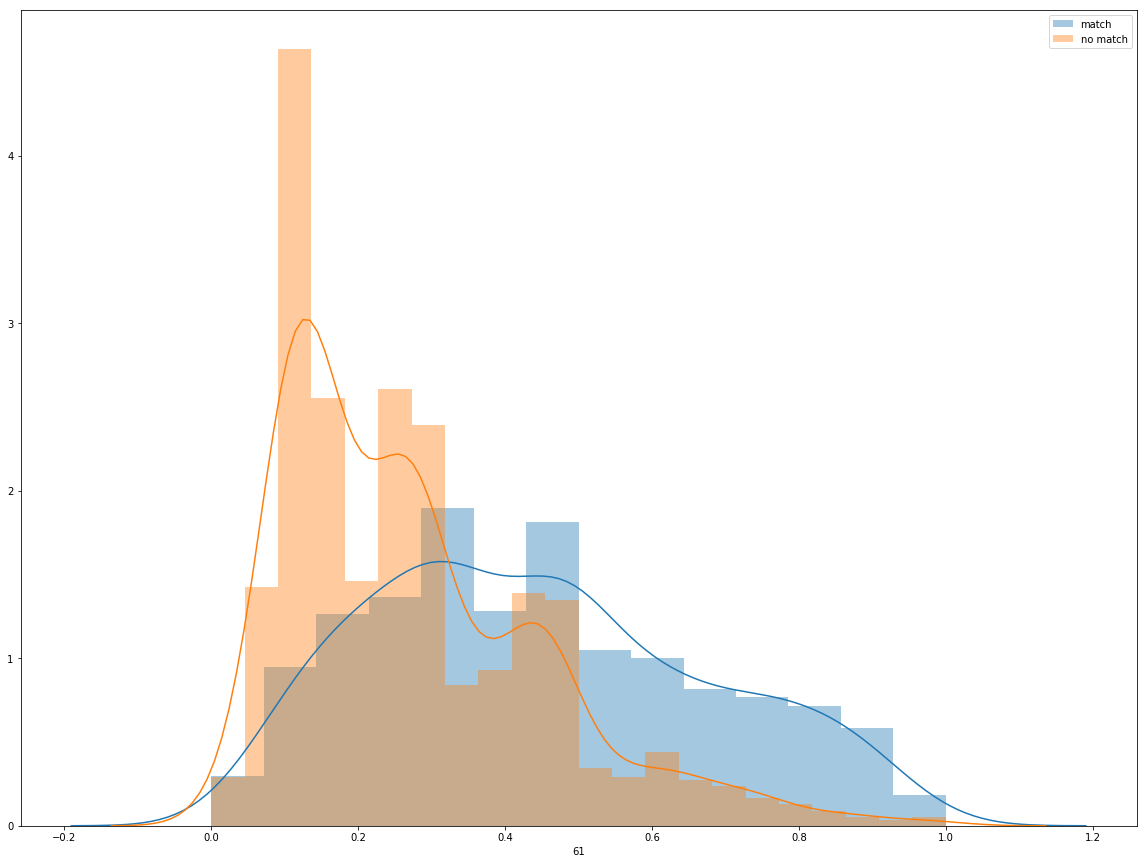




62


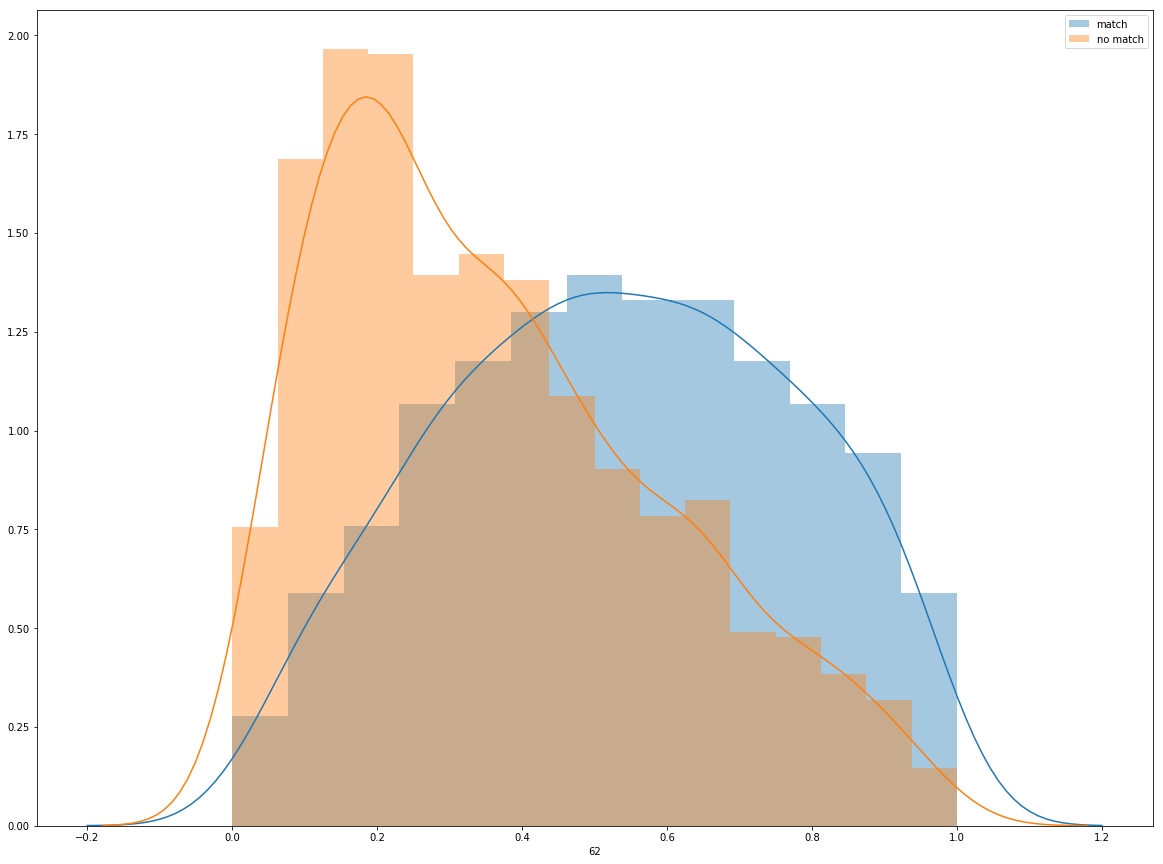




63


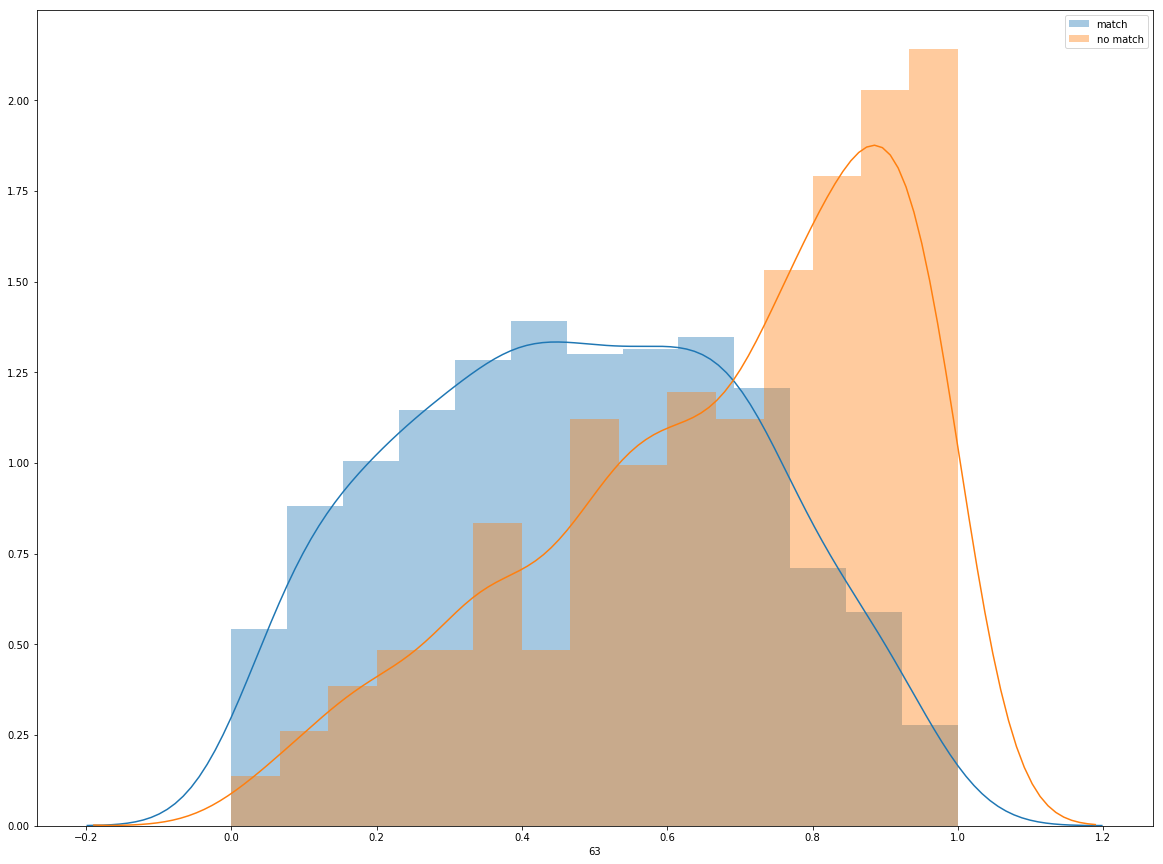




64


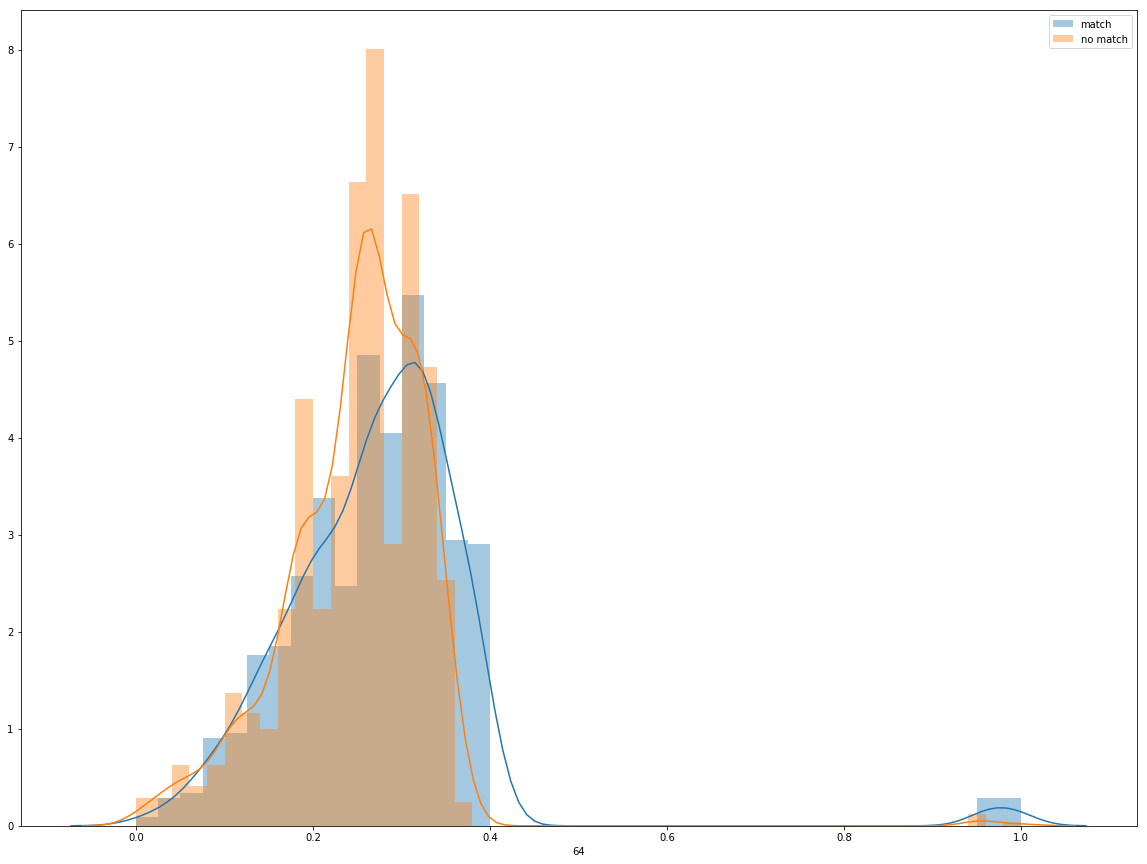




65


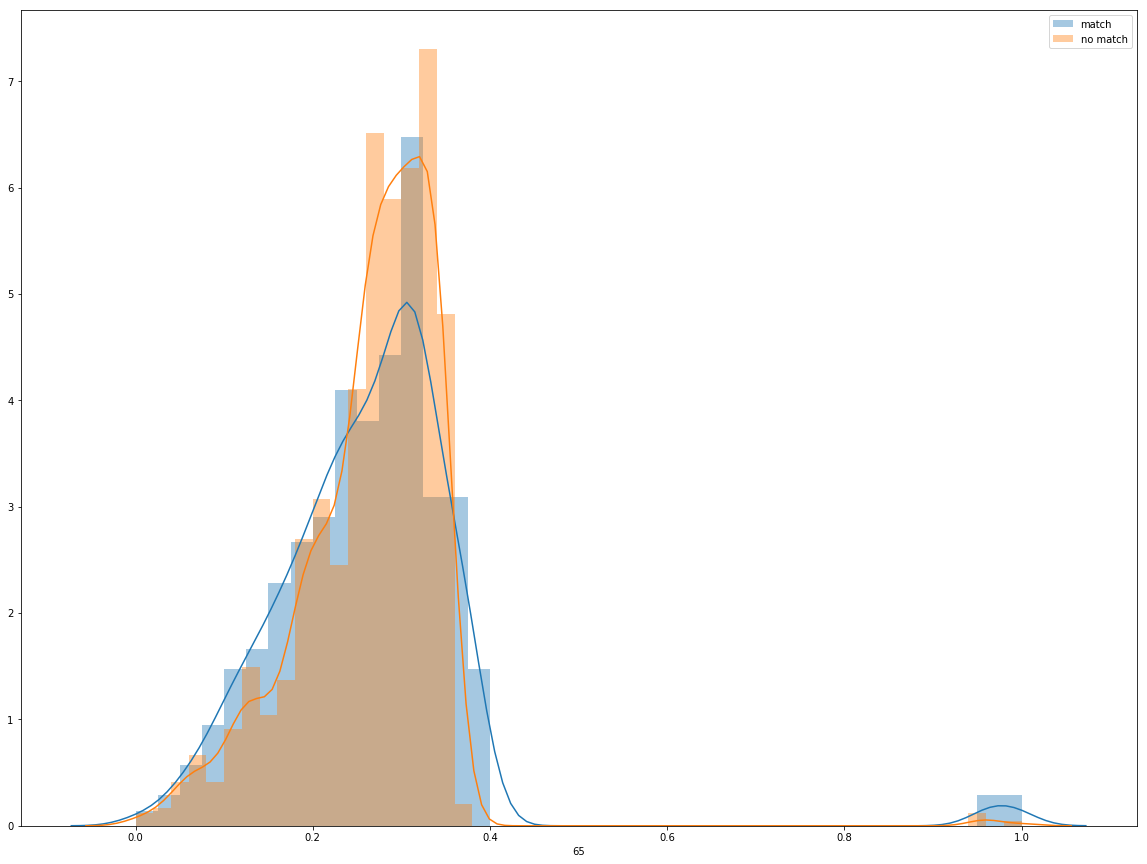




66


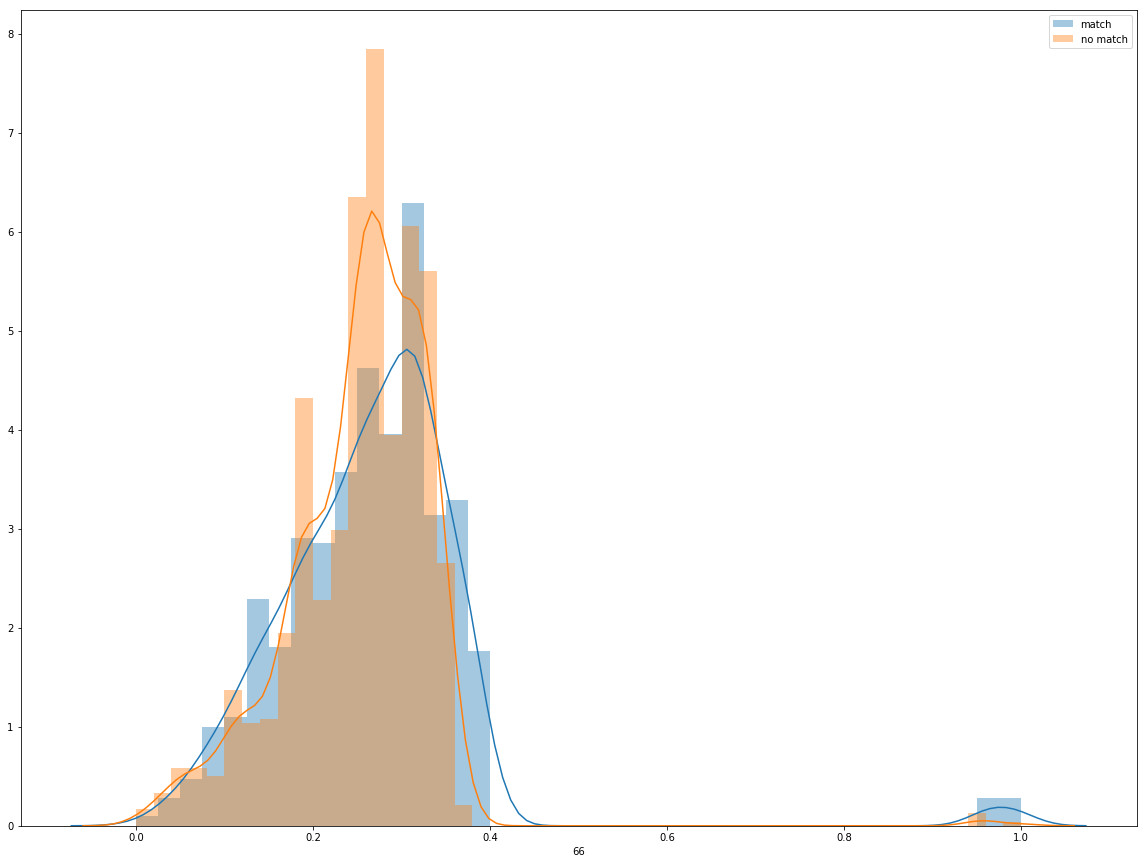




67


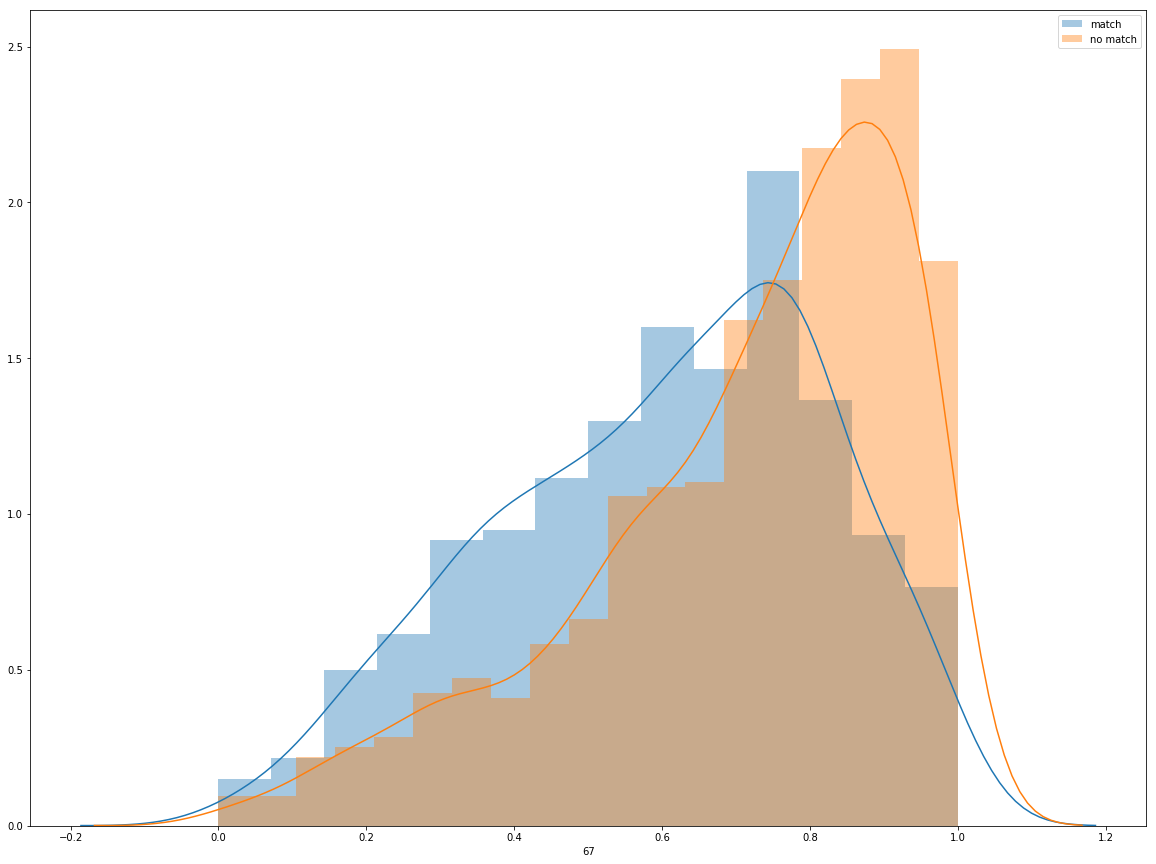

In [56]:
for j in df1_normalized.columns:
    print(j)
    #print(df[j].max())
    #print(match_df[j].max())
    #print(no_match_df[j].max())
#    j=match_df[j]/match_df[j].max()
#    k=no_match_df[j]/no_match_df[j].max()
    
    sns.distplot(df1_normalized[j], label="match")
    sns.distplot(df2_normalized[j], label="no match")
    
    #sns.distplot(no_match_df[j], label="no match")
    plt.legend()
    plt.show()
    
    print("\n\n")
    